# 1. Cleaning

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.utils import shuffle

In [2]:
# Sklearn imports
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


# DiCE imports
import dice_ml
from dice_ml.utils import helpers  # helper functions

import pickle
from sklearn.metrics import accuracy_score,  recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

In [3]:
# Load the dataframe from a csv file
df = pd.read_csv('CensusAdultIncome.csv')

### Exploring the Data Frames

In [4]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- workclass: A categorical feature representing the type of income, such as private, self-employment, and government employment. Some missing values present.
- fnlwgt: An integer feature with no description provided. No missing values.
- education: A categorical feature representing the level of education 
- education-num: An integer feature representing the numerical encoding of **education** level.
- occupation: A categorical feature representing the type of occupation, such as managerial, technical, and service-related occupations. Some missing values present.
- native-country: A categorical feature representing the country of origin, including various countries such as the United States, Canada, and India. Some missing values present.
- income: The target variable, a binary feature representing income level, with categories >50K and <=50K. No missing values.

####  Cleaning the target variable and making it binary.

In [6]:
#Target value has values with dots, therefore 4 catagories
df['income'] = df['income'].str.replace('.', '')

# Replace the values in the target column with string '0' and '1'.
df['income'] = df['income'].str.replace('<=50K', '0')  
df['income'] = df['income'].str.replace('>50K', '1')   

# Convert to integer
df['income'] = df['income'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.4+ MB


Print count and percentage of classes variable

In [8]:
# Calculate the counts of unique values in the 'class' column 
class_counts = df['income'].value_counts()

# Calculate the percentage of each unique value in the 'class' column by dividing 'class_counts' by its sum and then multiplying by 100.
class_percentages = class_counts / class_counts.sum() * 100

print('Class counts:\n' ,class_counts, '\n')
print('Percentage of each class: \n' ,class_percentages)
print('\nTotal number of rows: ', df.shape[0])

# Saving this for future use
a = df.shape[0]

Class counts:
 0    37155
1    11687
Name: income, dtype: int64 

Percentage of each class: 
 0    76.071823
1    23.928177
Name: income, dtype: float64

Total number of rows:  48842


#### Droping nan values

In [9]:
#Some values are like '?'. Replacing them as NaN 
df[df == '?'] = np.nan
# Dropping the rows with NaN values in  'workclass', 'occupation', 'native-country' for the test dataset
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)
df.dropna( inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  income          45222 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.3+ MB


Checking wheter Education and Education-number are similar.

In [11]:
print(df['education'].value_counts().head())
print()
print(df['education-num'].value_counts().head())

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
Name: education, dtype: int64

9     14783
10     9899
13     7570
14     2514
11     1959
Name: education-num, dtype: int64


From X set, education column is dropped as it is same with Education-num, which is already in numerical form.

In [12]:
df = df.drop(['education'], axis=1)

In [13]:
df.head()

age         workclass  fnlwgt  education-num      marital-status  \
0   39         State-gov   77516             13       Never-married   
1   50  Self-emp-not-inc   83311             13  Married-civ-spouse   
2   38           Private  215646              9            Divorced   
3   53           Private  234721              7  Married-civ-spouse   
4   28           Private  338409             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country  income  
0             0              40  United-States       0  
1             0              13  United-States       0  
2             0              40  United-States       0  
3             0              40  United-States       0  
4             0              40           Cuba       0

#### Count and percentage of Target classes values after droping NaN values 


In [14]:
# Calculate the counts of unique values in the 'class' column of 'df_class_feature' and store it in 'class_counts'.
class_counts = df['income'].value_counts()

# Calculate the percentage of each unique value in the 'class' column by dividing 'class_counts' by its sum and then multiplying by 100.
class_percentages = class_counts / class_counts.sum() * 100

print('Class counts:\n' ,class_counts, '\n')
print('Percentage of each class: \n' ,class_percentages)

b = df.shape[0]
print('\nNumber of rows after dropping NaN: ', b)
print('number of rows dropped: ', a-b)

Class counts:
 0    34014
1    11208
Name: income, dtype: int64 

Percentage of each class: 
 0    75.215603
1    24.784397
Name: income, dtype: float64

Number of rows after dropping NaN:  45222
number of rows dropped:  3620


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

# Assuming df is your DataFrame

# 1. Identify numeric and non-numeric columns
numeric_columns = df.select_dtypes(include='number').columns
non_numeric_columns = df.select_dtypes(exclude='number').columns

# 2. Visual Inspection for numeric columns
def plot_distributions(df):
    for column in df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

# 3. Summary Statistics for numeric columns
def summary_statistics(df):
    summary = df.describe().T
    summary['skewness'] = df.skew()
    summary['kurtosis'] = df.kurtosis()
    return summary

# 4. Distribution Test (e.g., KS test against normal distribution) for numeric columns
def ks_test_normal(df):
    results = {}
    for column in df.columns:
        stat, p_value = kstest(df[column], 'norm', args=(df[column].mean(), df[column].std()))
        results[column] = p_value
    return results

# Example usage:
numeric_df = df[numeric_columns]
#plot_distributions(numeric_df)
summary_stats = summary_statistics(numeric_df)
summary_stats.to_excel("summary_stats.xlsx", engine='openpyxl')
ks_results = ks_test_normal(numeric_df)

# Display the KS test results and summary statistics
ks_results_df = pd.DataFrame(ks_results.items(), columns=['Feature', 'P-Value'])
print("KS Test Results:")
print(ks_results_df)

print("\nSummary Statistics:")
print(summary_stats)

# 5. Display non-numeric columns information
non_numeric_info = df[non_numeric_columns].describe(include='all')
print("\nNon-Numeric Columns Information:")
non_numeric_info.head(11)



KS Test Results:
          Feature        P-Value
0             age  3.252902e-146
1          fnlwgt  2.293428e-309
2   education-num   0.000000e+00
3    capital-gain   0.000000e+00
4    capital-loss   0.000000e+00
5  hours-per-week   0.000000e+00
6          income   0.000000e+00

Summary Statistics:
                  count           mean            std      min        25%  \
age             45222.0      38.547941      13.217870     17.0      28.00   
fnlwgt          45222.0  189734.734311  105639.195134  13492.0  117388.25   
education-num   45222.0      10.118460       2.552881      1.0       9.00   
capital-gain    45222.0    1101.430344    7506.430084      0.0       0.00   
capital-loss    45222.0      88.595418     404.956092      0.0       0.00   
hours-per-week  45222.0      40.938017      12.007508      1.0      40.00   
income          45222.0       0.247844       0.431766      0.0       0.00   

                     50%       75%        max   skewness    kurtosis  
age       

workclass      marital-status    occupation relationship   race    sex  \
count      45222               45222         45222        45222  45222  45222   
unique         7                   7            14            6      5      2   
top      Private  Married-civ-spouse  Craft-repair      Husband  White   Male   
freq       33307               21055          6020        18666  38903  30527   

       native-country  
count           45222  
unique             41  
top     United-States  
freq            41292

# 2. Split data into separate fitting and test set

### Creating X and y sets

In [16]:
# Creating X and y sets.income is the target variable and native country dropped because it has 41 unique values and occupation is very similar too workclass.
X = df.drop(['income', 'native-country', 'occupation'], axis=1)
y = df['income']

Split the dataset into fitting data (60%) and test set (40%), the reason I chose 60 to 40 split is to have a bigger test set. I did some experiments with other ratios such as 70 to 30 and 80 to 20 and the model performance metrics were almost the same.

In [17]:
X_fit, X_test, y_fit, y_test = train_test_split(X, y, test_size=0.3, random_state=1600)

#### The percentage of each class in the target variable for each set

In [18]:
# Defined a function to calculate  and print the percentage of each class in the target variable
def calculate_class_percentage(y):
    class_percentage = {}
    total_samples = len(y)
    unique_classes = set(y)
    
    for cls in unique_classes:
        class_count = sum(y == cls)
        percentage = (class_count / total_samples) * 100
        class_percentage[cls] = percentage
    
    return class_percentage

In [19]:
# Calculate class percentages for each dataset
fit_class_percentage = calculate_class_percentage(y_fit)
test_class_percentage = calculate_class_percentage(y_test)

# Print class percentages for each dataset
print("Fit set class percentages:")
print(fit_class_percentage )
print("\nTest set class percentages:")
print(test_class_percentage)
print('\n Number of rows of X fit', X_fit.shape[0], '\n Number of rows of X test', X_test.shape[0],'\n Number of rows of Y fit', y_fit.shape[0],'\n Number of rows of y test', y_test.shape[0],)


Fit set class percentages:
{0: 75.54572737324278, 1: 24.454272626757227}

Test set class percentages:
{0: 74.44534532321073, 1: 25.55465467678927}

 Number of rows of X fit 31655 
 Number of rows of X test 13567 
 Number of rows of Y fit 31655 
 Number of rows of y test 13567


# 3. Random Forest, 

### Defining Random Forest model


In [20]:
def run_RF (X_fit, y_fit, X_test, y_test, model_name, i, j , k, estimator, depth):
    """
    Trains a Random Forest model and evaluates its performance on the test dataset.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    model_name (str): A name for the model to distinguish it in the performance metrics.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.

    Returns:
    model_RF (Pipeline): The trained Random Forest model pipeline.
    model_perf_metrics_rf (pandas.DataFrame): The performance metrics of the Random Forest model.
    roc_rf (float): The ROC AUC score of the Random Forest model.
    f1_rf (float): The F1 score of the Random Forest model.
    """    
    # Preprocessing for cataegorical data - OneHotEncoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
        # Preprocessing for numerical data - StandardScaler
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    
    # Bundle preprocessing for data
    transformations = ColumnTransformer(
        transformers=[            
            ('num', numerical_transformer, numerical),  
            ('cat', categorical_transformer, categorical)],
        remainder='passthrough')
    
    # Define the Random Forest model
    clf_RF = Pipeline(steps=[('preprocessor', transformations), 
                             ('classifier', RandomForestClassifier(n_estimators=estimator, max_depth=depth))])
    
    # Run the random forest model
    model_RF = clf_RF.fit(X_fit, y_fit)
    # Predict on the test dataset
    y_pred_rf = model_RF.predict(X_test)
    # Calculate the needed model performance metrics
    f1_rf = f1_score(y_test, y_pred_rf)
    roc_rf = roc_auc_score(y_test, y_pred_rf)
    a = len(X_fit)
    if depth == None:
        # Saving the model performance metrics
        models_rf = [('RF_{}'.format(model_name), k, j, i, a, f1_rf, roc_rf, 0, 0)]
    else:
        # Saving the model performance metrics
        models_rf = [('RF_simp_{}'.format(model_name), k, j, i, a, f1_rf, roc_rf, 0, 0)]
    # Saving the model performance metrics in a dataframe
    model_perf_metrics_rf = pd.DataFrame(models_rf, columns = ['Model', 'Iteration', 'Sample Size', 'CF Num', 'X_fit Size',  'F1 (%)', 'AUC (%)', 'F1 (%)_std', 'AUC (%)_std'])
        
    return model_RF, model_perf_metrics_rf, roc_rf, f1_rf

### Defining Logistic Regression model


In [21]:
def run_LR(X_fit, y_fit, X_test, y_test, model_name, i, j , k):
    """
    Trains a Logistic Regression model and evaluates its performance on the test dataset.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    model_name (str): A name for the model to distinguish it in the performance metrics.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.

    Returns:
    model_perf_metric_lr (pandas.DataFrame): The performance metrics of the Logistic Regression model.
    roc_lr (float): The ROC AUC score of the Logistic Regression model.
    f1_lr (float): The F1 score of the Logistic Regression model.
    """    
    # Preprocessing for categorical data - OneHotEncoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Preprocessing for numerical data - StandardScaler
   # numerical_transformer = Pipeline(steps=[
       # ('scaler', StandardScaler())])

    # Bundle preprocessing for numerical and categorical data
    transformations = ColumnTransformer(
        transformers=[
           # ('num', numerical_transformer, numerical),  
            ('cat', categorical_transformer, categorical)], 
        remainder='passthrough')

    # Define the Logistic Regression model
    clf_LR = Pipeline(steps=[('preprocessor', transformations), ('classifier', LogisticRegression(max_iter=1000))])
    # Run the Logistic Regression model
    model_LR = clf_LR.fit(X_fit, y_fit)
    # Predict on the test dataset
    y_pred_lr = model_LR.predict(X_test)
    # Calculate the needed model performance metrics
    f1_lr = f1_score(y_test, y_pred_lr)
    roc_lr = roc_auc_score(y_test, y_pred_lr)
    a = len(X_fit)

    # Saving the model performance metrics
    models_lr = [('LR_{}'.format(model_name), k, j, i, a, f1_lr, roc_lr, 0, 0)]
    # Saving the model performance metrics in a dataframe
    model_perf_metric_lr = pd.DataFrame(models_lr, columns = ['Model', 'Iteration', 'Sample Size', 'CF Num','X_fit Size', 'F1 (%)', 'AUC (%)', 'F1 (%)_std', 'AUC (%)_std'])

    return  model_perf_metric_lr, roc_lr, f1_lr

### Running the default models one time and saving the performance metrics

In [22]:
def run_models_and_merge_metrics(X_fit, y_fit, X_test, y_test):
    """
    Trains Random Forest and Logistic Regression models on the given training data,evaluates their performance on the test data, and merges their performance metrics into two dataframes.

    Parameters:
    X_fit (DataFrame): Features for training the models.
    y_fit (Series): Target variable for training the models.
    X_test (DataFrame): Features for testing the models.
    y_test (Series): Target variable for testing the models.

    Returns:
    tuple: 
        - model_RF (RandomForestClassifier): The trained Random Forest model.
        - model_perf_metrics_merged (DataFrame): Dataframe containing merged performance metrics of the Random Forest and Logistic Regression models.
        - model_perf_metrics_merged_only_with_cfs (DataFrame): Another dataframe containing merged performance metrics, identical to the first but intended for use with a counterfactuals dataset.
    """
   
    # Running default Random Forest Once
    model_RF, model_perf_metric_rf, _, _ = run_RF(X_fit, y_fit, X_test, y_test, 'default', 0, 0, 0, 100, None)
    # Running Simple Random Forest Once No:1
    _, model_perf_metric_rf_simp, _, _ = run_RF(X_fit, y_fit, X_test, y_test, 'def_1', 0, 0, 0, estimator, depth)
    # Running default Logistic Regression Once No:2
    _, model_perf_metric_rf_simp_2, _, _ = run_RF(X_fit, y_fit, X_test, y_test, 'def_2', 0, 0, 0, estimator_2, depth_2)
    
    # Merging the default model performance metrics in a dataframe to accommodate new models, and doing it twice to use the second one on only CFs dataset.
    model_perf_metrics_merged = model_perf_metric_rf.merge(model_perf_metric_rf_simp_2, how='outer').merge(model_perf_metric_rf_simp, how='outer')
    model_perf_metrics_merged_only_with_cfs = model_perf_metric_rf.merge(model_perf_metric_rf_simp_2, how='outer').merge(model_perf_metric_rf_simp, how='outer')
    
    return model_RF, model_perf_metrics_merged, model_perf_metrics_merged_only_with_cfs


### Running the models on original set multiple times and saving the performance metrics

In [23]:
def mean_of_default_models (k):
    """
    Computes the mean and standard deviation of model performance metrics for default Random Forest and Logistic Regression models over multiple iterations.

    Parameters:
    k (int): The number of iterations to run the models for calculating the mean and standard deviation.

    Returns:
    model_perf_metrics_mean_of_iterations_only_with_cfs (pandas.DataFrame): DataFrame containing the mean and standard deviation of performance metrics for Random Forest and Logistic Regression models trained only on CFs.
    model_perf_metrics_mean_of_iterations (pandas.DataFrame): DataFrame containing the mean and standard deviation of performance metrics for Random Forest and Logistic Regression models trained on original data.
    """
    total_auc_rf = []
    total_f1_rf = []    

    total_auc_rf_sim = []
    total_f1_rf_sim = []    
    
    total_auc_rf_sim_2 = []
    total_f1_rf_sim_2 = []

    for k in range(0, k):    
        #Running default RF and LR
        _, _ ,auc_def_rf,f1_def_rf = run_RF(X_fit, y_fit, X_test, y_test, 'default', 0 , 0 , 0, 100, None)
        _, _ ,auc_def_rf_sim,f1_def_rf_sim = run_RF(X_fit, y_fit, X_test, y_test, '1', 0, 0, 0, estimator, depth)
        _, _ ,auc_def_rf_sim_2,f1_def_rf_sim_2 = run_RF(X_fit, y_fit, X_test, y_test, '2', 0, 0, 0, estimator_2, depth_2)

        # Creating a list appending the auc and f1 scores of each iteration to calculate mean in at the end of the iterations.
        total_auc_rf.append(auc_def_rf)
        total_auc_rf_sim.append(auc_def_rf_sim)
        total_auc_rf_sim_2.append(auc_def_rf_sim_2)

        total_f1_rf.append(f1_def_rf)
        total_f1_rf_sim.append(f1_def_rf_sim)
        total_f1_rf_sim_2.append(f1_def_rf_sim_2)

    else:
        # Means            
        total_auc_rf_mean = np.mean(total_auc_rf)
        total_f1_rf_mean = np.mean(total_f1_rf)
        
        total_auc_rf_sim_mean = np.mean(total_auc_rf_sim)
        total_f1_rf_sim_mean = np.mean(total_f1_rf_sim)        

        total_auc_rf_sim_mean_2 = np.mean(total_auc_rf_sim_2)
        total_f1_rf_sim_mean_2 = np.mean(total_f1_rf_sim_2)

        # Standart  deviations
        total_auc_rf_std = round(np.std(total_auc_rf),8)
        total_f1_rf_std = round(np.std(total_f1_rf),8)
        
        total_auc_rf_sim_std = round(np.std(total_auc_rf_sim),8)
        total_f1_rf_sim_std = round(np.std(total_f1_rf_sim),8)

        total_auc_rf_sim_std_2 = round(np.std(total_auc_rf_sim_2),8)
        total_f1_rf_sim_std_2 = round(np.std(total_f1_rf_sim_2),8)

        c = len(X_fit)
        
        model_perf_metrics_mean_of_iterations_only_with_cfs = pd.DataFrame()
        model_perf_metrics_mean_of_iterations = pd.DataFrame()

        default_RF_means_row = {'Model': 'RF_default_mean_of_iterations', 'Iteration': k+1, 'Sample Size': 0, 'CF Num': 0, 'X_fit Size':c ,
        'F1 (%)': total_f1_rf_mean, 'F1 (%)_std':total_f1_rf_std, 'AUC (%)' :total_auc_rf_mean, 'AUC (%)_std': total_auc_rf_std}
        
        model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(default_RF_means_row, ignore_index=True)
        model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(default_RF_means_row, ignore_index=True)   

        simple_RF_means_row = {'Model': 'RF_simp_def_1_mean_of_iterations', 'Iteration': k+1, 'Sample Size': 0, 'CF Num': 0, 
                               'X_fit Size':c ,'F1 (%)': total_f1_rf_sim_mean, 'F1 (%)_std':total_f1_rf_sim_std, 'AUC (%)' :total_auc_rf_sim_mean, 
                               'AUC (%)_std': total_auc_rf_sim_std}
        
        model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(simple_RF_means_row, ignore_index=True)
        model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(simple_RF_means_row, ignore_index=True)   

        simple_RF_means_row_2 = {'Model': 'RF_simp_def_2_mean_of_iterations', 'Iteration': k+1, 'Sample Size': 0, 'CF Num': 0,
                                 'X_fit Size':c ,'F1 (%)': total_f1_rf_sim_mean_2, 'F1 (%)_std':total_f1_rf_sim_std_2, 'AUC (%)' :total_auc_rf_sim_mean_2, 
                                 'AUC (%)_std': total_auc_rf_sim_std_2}
        
        model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(simple_RF_means_row_2, ignore_index=True)
        model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(simple_RF_means_row_2, ignore_index=True)   

    
        return model_perf_metrics_mean_of_iterations_only_with_cfs, model_perf_metrics_mean_of_iterations

### Calculating the means and standart deviations of multiple iterations

In [24]:
def calculate_means_and_stds(total_auc_cf, total_f1_cf, total_auc, total_f1, i, j, k, a, b, number):
    """
    Calculates the mean and standard deviation of model performance metrics for each iterations and constructs summary rows for inclusion in a DataFrame.

    Parameters:
    total_auc_cf (list): AUC scores for models trained only on counterfactuals across iterations.
    total_f1_cf (list): F1 scores for models trained only on counterfactuals across iterations.
    total_auc (list): AUC scores for models trained on original data plus counterfactuals across iterations.
    total_f1 (list): F1 scores for models trained on original data plus counterfactuals across iterations.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.
    a (int): The size of the training dataset including original data plus counterfactuals.
    b (int): The size of the training dataset with only counterfactuals.

    Returns:
    new_row (dict): A dictionary containing the mean and standard deviation of performance metrics for models trained on original data plus counterfactuals.
    new_row_cf (dict): A dictionary containing the mean and standard deviation of performance metrics for models trained only on counterfactuals.
    """
        
    total_auc_only_cf_mean = np.mean(total_auc_cf)
    total_f1_only_cf_mean = np.mean(total_f1_cf)

    total_auc_mean = np.mean(total_auc)
    total_f1_mean = np.mean(total_f1)

    #Standart  deviations
    total_auc_only_cf_std = round(np.std(total_auc_cf),8)
    total_f1_only_cf_std = round(np.std(total_f1_cf),8)

    total_auc_std = round(np.std(total_auc),8)
    total_f1_std = round(np.std(total_f1),8)
    
    new_row   = {'Model': 'RF_simp_{}_sample:{}_cf:{}_mean_of_{}_iterations'.format(number, j, i, k), 'Iteration': k, 'Sample Size': j, 'CF Num': i, 'X_fit Size':a ,
                             'F1 (%)': total_f1_mean, 'F1 (%)_std':total_f1_std, 'AUC (%)' :total_auc_mean, 'AUC (%)_std': total_auc_std}
 
                # Creating new rows to save the model performance metrics of each sample size and CF number combination's all iterations
    new_row_cf= {'Model': 'RF_simp_{}_sample:{}_cf:{}_mean_of_{}_iterations_only_cf'.format(number, j, i, k) , 'Iteration': k, 'Sample Size': j, 'CF Num': i, 'X_fit Size':b , 
                             'F1 (%)': total_f1_only_cf_mean, 'F1 (%)_std': total_f1_only_cf_std, 'AUC (%)' :total_auc_only_cf_mean, 'AUC (%)_std': total_auc_only_cf_std}
    return new_row, new_row_cf

# 4. Plots

In [25]:
def distrubution_plot(df, name, true_false_1, true_false_2):
    """
    This function plots the distribution of scores for a given model.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the model performance data.
    name (str): The list of the Scores that will be plotted.
    1st True False is a flag to determine if the data is mean of iterations or not.
    2nd True False is a flag to determine if the data is only CFs or CFs + original data.    
    """
    # Get the default values of the models
    rf_line = df[df['Model'].str.startswith('RF_default')][name].iloc[0]
    sim_rf_line = df[df['Model'].str.startswith('RF_simp_def_1')][name].iloc[0]
    sim_rf_line_2 = df[df['Model'].str.startswith('RF_simp_def_2')][name].iloc[0]

    df = df[(df['Model'] != 'RF_default') & (df['Model'] != 'RF_simp_def_1')& (df['Model'] != 'RF_simp_def_2')]
    df = df[(df['Model'] != 'RF_default_mean_of_iterations') & (df['Model'] != 'RF_simp_def_1_mean_of_iterations') & (df['Model'] != 'RF_simp_def_2_mean_of_iterations')]

    # Get the sample size, CF Num and Iteration values    
    x = df['Sample Size'].unique()
    x_2 = df['CF Num'].unique()
    x_3 = df['Iteration'].unique()
    
    # Split the DataFrame based on the 'Model' column
    df_rf_simp_1 = df[df['Model'].str.startswith('RF_simp_1')]
    df_rf_simp_2 = df[df['Model'].str.startswith('RF_simp_2')]
    
    # Get the first y values
    y_1 = df_rf_simp_1[name]
    y_err_1 = df_rf_simp_1[name+'_std']
    # Get the second y values
    y_2 = df_rf_simp_2[name]
    y_err_2 = df_rf_simp_2[name+'_std']

    # combine x and x_2 for x-axis labels
    combined_x = [f"{i}_{j}_{k}" for i in x for j in x_2 for k in x_3]

    # plot lines
    plt.figure(figsize=(17,9))

    
    # 1st True False is a flag to determine if the data is mean of iterations or not. True = mean of iterations
    # 2nd True False is a flag to determine if the data is only CFs or CFs + original data. True = only CFs
    if true_false_1 is True:
        plt.errorbar(combined_x, y_1, yerr=y_err_1, fmt='o', color="blue",  capsize=6, label="{} Values of RF_1".format(name))
        plt.errorbar(combined_x, y_2, yerr=y_err_2, fmt='o', color="r",  capsize=6, label="{} Valuesof RF_2".format(name))

        plt.axhline(y=rf_line, color='k', linestyle='--', label="Default_RF_Line_Mean_of_{}".format(x_3))  # Plot RF_line as a horizontal line
        plt.axhline(y=sim_rf_line, color='b', linestyle='--', label="Simple_RF_Line_1_Mean_of_{}".format(x_3))  # Plot RF_line as a horizontal line
        plt.axhline(y=sim_rf_line_2, color='r', linestyle='--', label="Simple_RF_Line_2_Mean_of_{}".format(x_3))  # Plot LR_line as a horizontal line

        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size- CF Num- Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # rotate x-axis labels for better visibility        
        
        if true_false_2 is True:
            plt.title('Distribution of {} Scores of Models\n Trained on CFs\nSample: {} - CF: {}\n Mean of {} iterations'.format(name,x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')    
        else:
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}\n Mean of {} iterations'.format(name,x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')    
    else:
        plt.plot(combined_x, y_1, 'o-', color="blue", label="{} Values of RF_1".format(name))
        plt.plot(combined_x, y_2, 'o-', color="r", label="{} Values of RF_2".format(name))
        
        plt.axhline(y=rf_line, color='k', linestyle='--', label="Default_RF_Line")  # Plot RF_line as a horizontal line
        plt.axhline(y=sim_rf_line, color='b', linestyle='--', label="Simple_RF_Line_1")  # Plot RF_line as a horizontal line
        plt.axhline(y=sim_rf_line_2, color='r', linestyle='--', label="Simple_RF_Line_2")  # Plot LR_line as a horizontal line

        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size- CF Num- Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # rotate x-axis labels for better visibility    

        if true_false_2 is True:
            plt.title('Distribution of {} Scores of Models \nTrained on CFs\nSample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}.svg", format='svg')
        else:    
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}.svg", format='svg')
            
    #plt.show()

# 5. Counterfactuals

### Defining the DICE model. Possible adjustments that can be made are, 
- which model to use for CF generation, 
- continuous features, 
- size of the sample that will be used to create the CFs, 
- how many CFs to generate per one sample,
- which features can vary in the CF generation process.

In [26]:
# Defining DICE model
def generate_counterfactuals(X_fit, y_fit, model, sample_size, total_CFs, fea_to_vary, continuous_features, k ):
    """
    Generates counterfactual examples using the DICE (Diverse Counterfactual Explanations) method.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    model (object): The machine learning model for which counterfactuals are to be generated.
    sample_size (int): The number of samples for which to generate counterfactuals.
    total_CFs (int): The total number of counterfactuals to generate per sample.
    fea_to_vary (list): The list of features to be varied in the counterfactual generation process.
    outcome_name (str): The name of the outcome variable.

    Returns:
    X_fit_cf (pandas.DataFrame): The feature set of the generated counterfactuals.
    y_fit_cf (pandas.Series): The target variable of the generated counterfactuals.
    cf_df (pandas.DataFrame): A dataframe containing all the generated counterfactuals.
    """
    all_columns = X_fit.columns
    # Calculate the original class distribution
    class_0_count = np.sum(y_fit == 0)
    class_1_count = np.sum(y_fit == 1)

    # Calculate the opposite class distribution proportions
    total_count = class_0_count + class_1_count
    prop_class_0 = class_1_count / total_count
    prop_class_1 = class_0_count / total_count

    # Determine the number of samples for each class in the opposite distribution
    total_samples = sample_size
    num_class_0_samples = int(total_samples * prop_class_0)
    num_class_1_samples = total_samples - num_class_0_samples  # Ensuring total is 1000

    # Sample from each class to get the opposite distribution
    X_class_0 = X_fit[y_fit == 0]
    X_class_1 = X_fit[y_fit == 1]

    y_class_0 = y_fit[y_fit == 0]
    y_class_1 = y_fit[y_fit == 1]

    # Sample the required number of samples from each class
    X_class_0_sampled, _, y_class_0_sampled, _ = train_test_split(X_class_0, y_class_0, train_size=num_class_0_samples, random_state=42)
    X_class_1_sampled, _, y_class_1_sampled, _ = train_test_split(X_class_1, y_class_1, train_size=num_class_1_samples, random_state=42)
    # Convert the sampled numpy arrays back to DataFrames
    X_class_0_sampled_df = pd.DataFrame(X_class_0_sampled, columns=all_columns)
    X_class_1_sampled_df = pd.DataFrame(X_class_1_sampled, columns=all_columns)

    # Concatenate DataFrames
    X_fit = pd.concat([X_class_0_sampled_df, X_class_1_sampled_df], ignore_index=True)
    # Assuming y_class_0_sampled, y_class_1_sampled are numpy arrays with single column
    y_fit = pd.DataFrame(np.concatenate([y_class_0_sampled, y_class_1_sampled]), columns=[outcome_name])
    
    # Optionally, shuffle the dataset to mix the classes
    X_fit, y_fit = shuffle(X_fit, y_fit, random_state=42)

    # Create a Dice-ML data object
    d = dice_ml.Data(dataframe=X_fit.assign(income=y_fit), continuous_features=continuous_features, outcome_name=outcome_name)
    # Creating a Model object
    m = dice_ml.Model(model=model, backend="sklearn")
    # Creating the DICE model with data and model object 
    exp = dice_ml.Dice(d, m, method="random")

    # Execution of the DICE model to generate counterfactuals
    e1 = exp.generate_counterfactuals(X_fit, total_CFs=total_CFs, desired_class="opposite",  features_to_vary= fea_to_vary)
    
    # Comment out the below line as CFs needed to be visualized in the notebook
    #e1.visualize_as_dataframe(show_only_changes=True)

    # Creating a new empty dataframe to store the generated CFs
    cf_df = pd.DataFrame()
    # For loop to append the counterfactuals of each sample, to a dataframe
    for i in range(0, sample_size):
        # Saving CFs
        xd = e1.cf_examples_list[i].final_cfs_df
        # Adding the generated CFs to the empty dataframe
        cf_df = pd.concat([cf_df, xd])
# If the sample size is reached and the CFs are generated for all the samples, followiing code resets the index of the dataframe and saves the generated CFs as a csv file.
    else:
        # Resetting the index of the dataframe to not have duplicate index number
        cf_df.reset_index(drop=True, inplace=True)
        new_start_index = len(X_fit) + i + len(cf_df)
        cf_df.index += new_start_index 
        # Saving the generated CFs as a csv file
        cf_df.to_csv('Generated_CFs/cf_df_{}_{}_{}.csv'.format(sample_size, total_CFs, k))
        
        # Following code creates X and y fit sets for the generated CFs and returns them for further use.
        X_fit_cf = cf_df.drop([outcome_name], axis=1)
        y_fit_cf = cf_df[outcome_name]

    return X_fit_cf, y_fit_cf, cf_df

### Defining a experiment  fuction that runs the RF and LR, DICE model that generates counterfactuals, and then using those CFs for more model traning. 
#### Then the function saves these CF explanations into a dataframe and trains the LR again with the generated CFs. At the same time, model appends the original fit-set to CF dataset and trains the LR again with the combined version of the datasets. For each model training, LR model function appends the new model performance metrics into a dataframe. Possible adjustments that can be made are, 
- continuous features, 
- size of the sample that will be used to create the CFs, 
- how many CFs to generate per one sample,
- how many iterations will be made for each sample_size and CF_number pair,
- which features can vary in the CF generation process.

In [37]:
# Experiment running function
def running_exp (X_fit, y_fit, X_test, y_test,  sample_size_list, total_CFs_list, iteration_num, fea_to_vary, name_of_the_exp, list_of_models):
    """
    This function is for running the experiments with different sample sizes, CF numbers and iterations.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    continuous_features (list): The list of continuous features in the dataset.
    sample_size_list (list): The list of sample sizes to be used in the experiments.
    total_CFs_list (list): The list of total CF numbers to be generated for each sample size.
    iteration_num (int): The number of iterations to be run for each sample size and CF number combination.
    fea_to_vary (list): The list of features to be varied in the CF generation process. Other features will be kept constant.
    num (int): The number to be added to the file names to distinguish the results of different experiments.
    list_of_models (list): The names of the Scores to be plotted. For example, AUC or F1.

    Returns:
    model_perf_metrics_merged_with_for_cfs (pandas.DataFrame): The model performance metrics of the experiments trained with only CFs.
    model_perf_metrics_merged (pandas.DataFrame): The model performance metrics of the experiments trained with CFs and original data.
    new_cf_df (pandas.DataFrame): All generated CFs in every CF number, sample size and iterations.
    """
    new_cf_df = pd.DataFrame()

    # Running the default Random Forest and Logistic Regression models once and merging their performance metrics in a dataframe.
    model_RF, model_perf_metrics_merged, model_perf_metrics_merged_only_with_cfs = run_models_and_merge_metrics(X_fit, y_fit, X_test, y_test)
    
    # Running the default RF and LR models for multiple iterations to calculate the mean and standard deviation of the performance metrics.
    model_perf_metrics_mean_of_iterations_only_with_cfs, model_perf_metrics_mean_of_iterations = mean_of_default_models (iteration_num)
    
    # Saving these new rows to the model performance metrics dataframes    
    # Loop through different sample sizes
    for j in sample_size_list:
        # Loop through different total CF numbers
        for i in total_CFs_list:
            # Initializing empty lists for saving auc and f1 scores for each iteration
            total_f1_cf = []
            total_f1 = []
            total_auc_cf = []
            total_auc = []

            total_f1_cf_2 = []
            total_f1_2 = []
            total_auc_cf_2 = []
            total_auc_2 = []

                    
            # Loop through iteration numbers, doing a new experiment for each sample_size and CF_number combination
            for k in range(1,iteration_num+1):    
                # Generating counterfactuals using the 'generate_counterfactuals' function
                X_fit_cf, y_fit_cf, cf_df = generate_counterfactuals(X_fit, y_fit, model_RF, j, i, fea_to_vary, continuous_features, k)

                # Concatenating the original dataset with the generated CFs dataset 
                new_cf_df = new_cf_df.append(cf_df)
                new_X_fit = pd.concat([X_fit, X_fit_cf])
                new_y_fit = pd.concat([y_fit, y_fit_cf])

                # Running the Simple RF 1 model on the CFs dataset and the dataset with original X_fit plus CFs.
                _,model_perf_metric_rf_1_only_cf, auc_rf_1_only_cf, f1_rf_1_only_cf = run_RF(X_fit_cf, y_fit_cf, X_test, y_test, '1_sample:{}_cf:{}_iteration:{}'.format(j, i, k), i , j , k, estimator,depth)
                _, model_perf_metric_rf_1_cf_org, auc_rf_1, f1_rf_1 = run_RF(new_X_fit, new_y_fit, X_test, y_test, '1_sample:{}_cf:{}_iteration:{}'.format(j, i, k), i , j , k, estimator,depth)                
                # Creating a list appending the auc and f1 scores of each iteration to calculate mean in at the end of the iterations.
                total_f1_cf.append(f1_rf_1_only_cf)
                total_f1.append(f1_rf_1)
                total_auc_cf.append(auc_rf_1_only_cf)
                total_auc.append(auc_rf_1)
                # Saving the model performance metrics of each iteration
                model_perf_metrics_merged_only_with_cfs = model_perf_metrics_merged_only_with_cfs.append(model_perf_metric_rf_1_only_cf, ignore_index=True)
                model_perf_metrics_merged = model_perf_metrics_merged.append(model_perf_metric_rf_1_cf_org, ignore_index=True)

                # Running the SImpple RF 2 model on the CFs dataset and the dataset with original X_fit plus CFs.
                _,model_perf_metric_rf_1_only_cf, auc_rf_1_only_cf, f1_rf_1_only_cf = run_RF(X_fit_cf, y_fit_cf, X_test, y_test, '2_sample:{}_cf:{}_iteration:{}'.format(j, i, k), i , j , k, estimator_2,depth_2)
                _, model_perf_metric_rf_1_cf_org, auc_rf_1, f1_rf_1 = run_RF(new_X_fit, new_y_fit, X_test, y_test, '2_sample:{}_cf:{}_iteration:{}'.format(j, i, k), i , j , k, estimator_2,depth_2)                
                # Creating a list appending the auc and f1 scores of each iteration to calculate mean in at the end of the iterations.
                total_f1_cf_2.append(f1_rf_1_only_cf)
                total_f1_2.append(f1_rf_1)
                total_auc_cf_2.append(auc_rf_1_only_cf)
                total_auc_2.append(auc_rf_1)
                # Saving the model performance metrics of each iteration
                model_perf_metrics_merged_only_with_cfs = model_perf_metrics_merged_only_with_cfs.append(model_perf_metric_rf_1_only_cf, ignore_index=True)
                model_perf_metrics_merged = model_perf_metrics_merged.append(model_perf_metric_rf_1_cf_org, ignore_index=True)
                
            else:
            # Calculate means and standard deviations of auc and f1 scores of all the iterations for each sample size and CF number combination
                a = len(new_X_fit)
                b = len(X_fit_cf)

                new_row, new_row_cf = calculate_means_and_stds(total_auc_cf, total_f1_cf, total_auc, total_f1, i, j, k, a, b, 1)
                new_row_2, new_row_cf_2 = calculate_means_and_stds(total_auc_cf_2, total_f1_cf_2, total_auc_2, total_f1_2, i, j, k, a, b, 2)
            
                # Saving these new rows to the model performance metrics dataframes    
                model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(new_row_cf, ignore_index=True)
                model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(new_row, ignore_index=True)

                model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(new_row_cf_2, ignore_index=True)
                model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(new_row_2, ignore_index=True)
                
    # Saving the model performance metrics of each iteration as excel files after all the experiments are done.
    model_perf_metrics_merged_only_with_cfs.to_excel('Performance_metrics/model_perf_metrics_merged_only_with_cfs_{}.xlsx'.format(name_of_the_exp))
    model_perf_metrics_merged.to_excel('Performance_metrics/model_perf_metrics_merged_{}.xlsx'.format(name_of_the_exp))
    # Saving the MEAN model performance metrics of each iteration as excel files after all the experiments are done.
    model_perf_metrics_mean_of_iterations_only_with_cfs.to_excel('Performance_metrics/model_perf_metrics_mean_of_iterations_only_with_cfs_{}.xlsx'.format(name_of_the_exp))
    model_perf_metrics_mean_of_iterations.to_excel('Performance_metrics/model_perf_metrics_mean_of_iterations_{}.xlsx'.format(name_of_the_exp))
    
    for k in list_of_models:
        # k is the list of the Scores to be plotted
        # 1st True False is a flag to determine if the data is mean of iterations or not. True = mean of iterations
        # 2nd True False is a flag to determine if the data is only CFs or CFs + original data. True = only CFs'''
        distrubution_plot(model_perf_metrics_merged, k, False, False )
        distrubution_plot(model_perf_metrics_merged_only_with_cfs, k, False, True )

        distrubution_plot(model_perf_metrics_mean_of_iterations, k, True , False)
        distrubution_plot(model_perf_metrics_mean_of_iterations_only_with_cfs, k, True, True )
        
    return  model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, new_cf_df

# Experiment

In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13567 entries, 14159 to 23285
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             13567 non-null  int64 
 1   workclass       13567 non-null  object
 2   fnlwgt          13567 non-null  int64 
 3   education-num   13567 non-null  int64 
 4   marital-status  13567 non-null  object
 5   relationship    13567 non-null  object
 6   race            13567 non-null  object
 7   sex             13567 non-null  object
 8   capital-gain    13567 non-null  int64 
 9   capital-loss    13567 non-null  int64 
 10  hours-per-week  13567 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.2+ MB


In [35]:
# Defining the columns' categories
numerical = ['age' ,'fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
categorical = ['workclass','marital-status',  'relationship', 'race', 'sex']
continuous_features = ['capital-gain', 'capital-loss']
outcome_name = 'income'

  0%|          | 4/10000 [00:00<21:37,  7.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 6/10000 [00:00<21:11,  7.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 8/10000 [00:01<22:37,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 13/10000 [00:01<23:20,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 18/10000 [00:02<20:55,  7.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 20/10000 [00:02<21:57,  7.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 22/10000 [00:02<20:23,  8.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 28/10000 [00:03<23:56,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 33/10000 [00:04<23:04,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 40/10000 [00:05<22:03,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 45/10000 [00:06<23:13,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 51/10000 [00:07<21:12,  7.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 59/10000 [00:08<23:44,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 64/10000 [00:09<22:01,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 68/10000 [00:09<23:09,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 72/10000 [00:10<21:58,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 74/10000 [00:10<22:37,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 89/10000 [00:12<23:54,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 95/10000 [00:13<24:15,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 98/10000 [00:14<22:59,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 102/10000 [00:14<27:01,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 107/10000 [00:15<25:04,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 111/10000 [00:16<23:46,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 113/10000 [00:16<23:05,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 115/10000 [00:16<23:29,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 117/10000 [00:16<23:34,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 119/10000 [00:17<23:10,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 121/10000 [00:17<22:41,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 125/10000 [00:18<22:26,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 129/10000 [00:18<22:31,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 132/10000 [00:19<22:46,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 134/10000 [00:19<21:33,  7.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 140/10000 [00:20<23:05,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 149/10000 [00:21<21:51,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 156/10000 [00:22<23:07,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 159/10000 [00:22<23:08,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 162/10000 [00:23<23:28,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 167/10000 [00:24<24:08,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 170/10000 [00:24<23:24,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 172/10000 [00:24<22:59,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 174/10000 [00:25<23:23,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 177/10000 [00:25<21:31,  7.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 184/10000 [00:26<23:08,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 190/10000 [00:27<23:17,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 192/10000 [00:27<23:31,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 196/10000 [00:28<24:00,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 198/10000 [00:28<23:26,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 200/10000 [00:28<21:44,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 202/10000 [00:29<22:26,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 204/10000 [00:29<20:47,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 207/10000 [00:29<20:21,  8.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 211/10000 [00:30<22:39,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 219/10000 [00:31<23:27,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 230/10000 [00:33<22:56,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 232/10000 [00:33<21:19,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 238/10000 [00:34<23:02,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 242/10000 [00:34<23:07,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 246/10000 [00:35<23:33,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 249/10000 [00:35<23:33,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 253/10000 [00:36<23:08,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 255/10000 [00:36<22:24,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 265/10000 [00:38<21:39,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 267/10000 [00:38<22:10,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 271/10000 [00:39<23:14,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 276/10000 [00:39<23:28,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 284/10000 [00:40<23:19,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 287/10000 [00:41<23:15,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 295/10000 [00:42<23:27,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 298/10000 [00:43<23:13,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 301/10000 [00:43<25:01,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 303/10000 [00:43<23:26,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 306/10000 [00:44<23:44,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 310/10000 [00:44<21:09,  7.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 314/10000 [00:45<22:13,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 316/10000 [00:45<22:55,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 318/10000 [00:45<21:11,  7.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 324/10000 [00:46<21:06,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 332/10000 [00:48<23:58,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 334/10000 [00:48<21:04,  7.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 346/10000 [00:50<22:53,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 356/10000 [00:51<23:18,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 361/10000 [00:52<23:31,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 371/10000 [00:53<22:32,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 381/10000 [00:55<23:11,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 390/10000 [00:56<23:13,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 394/10000 [00:57<23:03,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 396/10000 [00:57<22:21,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 398/10000 [00:57<22:50,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 401/10000 [00:58<22:28,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 407/10000 [00:59<23:36,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 410/10000 [00:59<21:31,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 419/10000 [01:00<22:54,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 423/10000 [01:01<21:12,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 427/10000 [01:01<22:04,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 429/10000 [01:02<21:00,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 432/10000 [01:02<20:10,  7.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 440/10000 [01:03<22:47,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 445/10000 [01:04<22:52,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 450/10000 [01:05<22:44,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 452/10000 [01:05<23:23,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 456/10000 [01:06<22:49,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 459/10000 [01:06<22:19,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 461/10000 [01:06<22:53,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 464/10000 [01:07<22:25,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 469/10000 [01:08<22:55,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 477/10000 [01:09<20:43,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 484/10000 [01:10<22:42,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 489/10000 [01:11<21:44,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 491/10000 [01:11<20:28,  7.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 496/10000 [01:12<22:26,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 498/10000 [01:12<21:55,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 500/10000 [01:12<22:55,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 504/10000 [01:13<22:39,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 506/10000 [01:13<21:48,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 509/10000 [01:13<20:29,  7.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 518/10000 [01:15<23:12,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 523/10000 [01:15<22:42,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 527/10000 [01:16<22:30,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 532/10000 [01:17<21:45,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 534/10000 [01:17<22:18,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 539/10000 [01:18<21:29,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 541/10000 [01:18<22:21,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 544/10000 [01:18<22:13,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 550/10000 [01:19<22:11,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 559/10000 [01:21<22:59,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 567/10000 [01:22<22:31,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 572/10000 [01:23<22:48,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 574/10000 [01:23<23:40,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 577/10000 [01:23<22:55,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 579/10000 [01:24<22:07,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 584/10000 [01:24<22:42,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 586/10000 [01:25<22:35,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 588/10000 [01:25<20:06,  7.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 590/10000 [01:25<19:07,  8.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 592/10000 [01:25<20:58,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 600/10000 [01:27<20:40,  7.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 602/10000 [01:27<21:43,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 606/10000 [01:27<22:37,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 609/10000 [01:28<22:11,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 613/10000 [01:28<20:44,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 617/10000 [01:29<21:13,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 619/10000 [01:29<23:06,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 632/10000 [01:31<20:46,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 641/10000 [01:33<22:46,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 643/10000 [01:33<21:39,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 646/10000 [01:33<20:14,  7.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 652/10000 [01:34<20:22,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 654/10000 [01:34<20:59,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 656/10000 [01:35<22:00,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 662/10000 [01:35<21:49,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 664/10000 [01:36<20:43,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 667/10000 [01:36<22:26,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 670/10000 [01:37<22:45,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 685/10000 [01:39<22:02,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 688/10000 [01:39<20:29,  7.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 695/10000 [01:40<22:03,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 701/10000 [01:41<23:44,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 708/10000 [01:42<21:56,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 710/10000 [01:43<22:02,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 713/10000 [01:43<22:09,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 725/10000 [01:45<22:31,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 728/10000 [01:45<22:21,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 730/10000 [01:46<21:42,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 734/10000 [01:46<21:50,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 737/10000 [01:47<23:29,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 743/10000 [01:47<20:45,  7.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 746/10000 [01:48<19:49,  7.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 750/10000 [01:48<21:01,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 753/10000 [01:49<22:42,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 758/10000 [01:50<22:10,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 766/10000 [01:51<21:48,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 775/10000 [01:52<22:04,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 779/10000 [01:53<22:11,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 786/10000 [01:54<21:49,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 788/10000 [01:54<22:06,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 790/10000 [01:54<20:14,  7.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 794/10000 [01:55<21:20,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 796/10000 [01:55<20:19,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 800/10000 [01:56<21:38,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 805/10000 [01:57<22:29,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 807/10000 [01:57<22:04,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 811/10000 [01:57<20:30,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 816/10000 [01:58<20:25,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 820/10000 [01:59<21:09,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 826/10000 [02:00<21:50,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 830/10000 [02:00<20:28,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 833/10000 [02:01<21:48,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 841/10000 [02:02<20:03,  7.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 850/10000 [02:03<21:54,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 854/10000 [02:04<20:07,  7.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 857/10000 [02:04<19:57,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 860/10000 [02:04<20:52,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 862/10000 [02:05<21:46,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 867/10000 [02:05<20:41,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 870/10000 [02:06<21:32,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 878/10000 [02:07<21:56,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 884/10000 [02:08<21:53,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 890/10000 [02:09<22:17,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 894/10000 [02:10<20:21,  7.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 897/10000 [02:10<21:34,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 900/10000 [02:10<19:47,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 905/10000 [02:11<22:10,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 910/10000 [02:12<22:18,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 916/10000 [02:13<21:46,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 918/10000 [02:13<22:19,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 920/10000 [02:13<20:02,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 922/10000 [02:14<21:37,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 924/10000 [02:14<20:47,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 927/10000 [02:14<21:01,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 929/10000 [02:15<21:26,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 935/10000 [02:15<20:33,  7.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 940/10000 [02:16<21:43,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 942/10000 [02:16<21:44,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 946/10000 [02:17<20:48,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 948/10000 [02:17<22:56,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 953/10000 [02:18<21:05,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 956/10000 [02:18<21:26,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 958/10000 [02:19<21:34,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 963/10000 [02:20<21:07,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 967/10000 [02:20<20:51,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 970/10000 [02:20<21:10,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 974/10000 [02:21<20:31,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 977/10000 [02:22<21:40,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 979/10000 [02:22<21:29,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 981/10000 [02:22<20:55,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 986/10000 [02:23<19:55,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 990/10000 [02:23<21:26,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 992/10000 [02:24<21:42,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 994/10000 [02:24<22:02,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 999/10000 [02:25<22:20,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1004/10000 [02:25<20:37,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1010/10000 [02:26<21:21,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1021/10000 [02:28<21:34,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1025/10000 [02:29<21:14,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1035/10000 [02:30<21:35,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1039/10000 [02:31<22:29,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1041/10000 [02:31<22:14,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1046/10000 [02:32<21:21,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1050/10000 [02:32<21:16,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1052/10000 [02:33<20:54,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1055/10000 [02:33<19:28,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1057/10000 [02:33<20:57,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1059/10000 [02:34<21:50,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1068/10000 [02:35<19:57,  7.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1071/10000 [02:35<20:07,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1076/10000 [02:36<21:18,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1078/10000 [02:36<21:32,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1082/10000 [02:37<20:38,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1085/10000 [02:37<20:46,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1092/10000 [02:38<19:46,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1094/10000 [02:39<22:04,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1096/10000 [02:39<21:21,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1098/10000 [02:39<20:36,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1101/10000 [02:40<19:11,  7.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1114/10000 [02:41<20:20,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1116/10000 [02:42<20:04,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1120/10000 [02:42<20:34,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1131/10000 [02:44<21:08,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1134/10000 [02:44<18:50,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1138/10000 [02:45<19:12,  7.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1142/10000 [02:45<19:17,  7.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1145/10000 [02:46<19:56,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1148/10000 [02:46<21:38,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1152/10000 [02:47<20:53,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1154/10000 [02:47<18:49,  7.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1157/10000 [02:47<19:56,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1162/10000 [02:48<19:09,  7.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1167/10000 [02:49<20:03,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1171/10000 [02:49<20:17,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1175/10000 [02:50<20:00,  7.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1177/10000 [02:50<20:01,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1186/10000 [02:51<20:31,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1192/10000 [02:52<20:46,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1197/10000 [02:53<20:34,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1203/10000 [02:54<20:25,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1220/10000 [02:56<20:07,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1223/10000 [02:57<18:10,  8.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1227/10000 [02:57<19:38,  7.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1232/10000 [02:58<20:45,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1234/10000 [02:58<20:19,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1239/10000 [02:59<20:32,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1241/10000 [02:59<19:37,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1247/10000 [03:00<19:59,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1251/10000 [03:01<20:00,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1258/10000 [03:02<21:03,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1262/10000 [03:02<18:50,  7.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1266/10000 [03:03<19:04,  7.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1272/10000 [03:04<18:57,  7.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1277/10000 [03:04<19:37,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1280/10000 [03:05<19:52,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1283/10000 [03:05<19:14,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1286/10000 [03:06<19:55,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1288/10000 [03:06<19:51,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1290/10000 [03:06<20:14,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1294/10000 [03:07<18:41,  7.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1298/10000 [03:07<19:30,  7.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1300/10000 [03:07<19:18,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1307/10000 [03:08<20:04,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1314/10000 [03:09<20:02,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1316/10000 [03:10<18:25,  7.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1322/10000 [03:11<20:07,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1324/10000 [03:11<21:33,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1325/10000 [03:11<20:10,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1330/10000 [03:12<20:02,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1339/10000 [03:13<20:25,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1344/10000 [03:14<19:04,  7.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1348/10000 [03:14<16:42,  8.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1350/10000 [03:14<18:05,  7.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1354/10000 [03:15<19:08,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1360/10000 [03:16<20:21,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1362/10000 [03:16<17:57,  8.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1365/10000 [03:16<18:47,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1368/10000 [03:17<19:28,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1373/10000 [03:18<20:35,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1377/10000 [03:18<19:38,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1380/10000 [03:18<20:10,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1384/10000 [03:19<19:43,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1389/10000 [03:20<18:16,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1394/10000 [03:20<20:07,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1396/10000 [03:21<19:40,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1398/10000 [03:21<20:03,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1401/10000 [03:21<19:13,  7.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1404/10000 [03:22<20:03,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1406/10000 [03:22<19:45,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1410/10000 [03:23<17:43,  8.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1413/10000 [03:23<19:46,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1415/10000 [03:23<19:36,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1419/10000 [03:24<19:17,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1426/10000 [03:25<18:35,  7.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1428/10000 [03:25<18:49,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1433/10000 [03:26<19:34,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1435/10000 [03:26<18:10,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1445/10000 [03:28<20:29,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1450/10000 [03:28<19:50,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1453/10000 [03:29<18:05,  7.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1457/10000 [03:29<19:37,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1460/10000 [03:30<18:25,  7.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1462/10000 [03:30<17:05,  8.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1466/10000 [03:30<19:27,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1469/10000 [03:31<17:58,  7.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1475/10000 [03:32<19:11,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1481/10000 [03:32<19:17,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1488/10000 [03:33<19:49,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1491/10000 [03:34<19:30,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1494/10000 [03:34<17:55,  7.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1497/10000 [03:35<18:11,  7.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1512/10000 [03:37<20:19,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1515/10000 [03:37<19:00,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1518/10000 [03:38<17:05,  8.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1522/10000 [03:38<17:37,  8.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1526/10000 [03:39<17:15,  8.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1532/10000 [03:40<19:19,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1536/10000 [03:40<17:34,  8.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1540/10000 [03:41<18:27,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1542/10000 [03:41<17:26,  8.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1545/10000 [03:41<19:51,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1548/10000 [03:42<20:06,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1553/10000 [03:42<19:02,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1564/10000 [03:44<19:20,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1568/10000 [03:44<18:49,  7.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1573/10000 [03:45<18:11,  7.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1577/10000 [03:46<18:40,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1580/10000 [03:46<18:53,  7.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1582/10000 [03:46<18:59,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1589/10000 [03:47<19:16,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1593/10000 [03:48<19:59,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1595/10000 [03:48<19:32,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1597/10000 [03:48<17:58,  7.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1600/10000 [03:49<18:57,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1603/10000 [03:49<17:17,  8.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1605/10000 [03:50<18:11,  7.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1608/10000 [03:50<18:59,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1616/10000 [03:51<17:52,  7.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1627/10000 [03:53<18:27,  7.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1633/10000 [03:53<18:56,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1635/10000 [03:54<18:55,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1642/10000 [03:55<19:29,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1647/10000 [03:55<19:37,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1654/10000 [03:56<19:14,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1667/10000 [03:58<19:04,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1669/10000 [03:59<17:47,  7.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1673/10000 [03:59<19:43,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1682/10000 [04:00<18:26,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1685/10000 [04:01<18:53,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1687/10000 [04:01<19:37,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1689/10000 [04:01<17:40,  7.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1692/10000 [04:02<18:02,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1706/10000 [04:04<19:11,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1708/10000 [04:04<18:49,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1713/10000 [04:05<18:50,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1719/10000 [04:06<19:53,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1722/10000 [04:06<17:53,  7.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1733/10000 [04:08<17:22,  7.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1735/10000 [04:08<18:02,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1739/10000 [04:08<16:59,  8.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1742/10000 [04:09<18:38,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1751/10000 [04:10<16:57,  8.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1753/10000 [04:10<16:43,  8.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1756/10000 [04:11<17:49,  7.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1758/10000 [04:11<17:45,  7.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1760/10000 [04:11<18:44,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1765/10000 [04:12<19:01,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1771/10000 [04:13<19:33,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1781/10000 [04:14<19:20,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1787/10000 [04:15<18:51,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1795/10000 [04:16<19:37,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1798/10000 [04:17<19:18,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1810/10000 [04:19<19:23,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1812/10000 [04:19<22:51,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1814/10000 [04:19<19:55,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1829/10000 [04:21<19:10,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1839/10000 [04:23<19:12,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1848/10000 [04:24<19:09,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1851/10000 [04:25<18:59,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1855/10000 [04:25<17:16,  7.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1857/10000 [04:25<16:48,  8.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1862/10000 [04:26<18:54,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1864/10000 [04:26<18:51,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1868/10000 [04:27<18:29,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1870/10000 [04:27<18:33,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1875/10000 [04:28<18:46,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1879/10000 [04:28<18:26,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1881/10000 [04:29<18:34,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1883/10000 [04:29<18:29,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1887/10000 [04:30<18:23,  7.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1889/10000 [04:30<17:17,  7.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1891/10000 [04:30<17:33,  7.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1895/10000 [04:31<19:02,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1899/10000 [04:31<18:41,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1906/10000 [04:32<17:08,  7.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1909/10000 [04:32<16:04,  8.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1912/10000 [04:33<17:33,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1921/10000 [04:34<18:16,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1923/10000 [04:34<18:25,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1925/10000 [04:35<18:16,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1927/10000 [04:35<18:17,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1938/10000 [04:37<19:00,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1946/10000 [04:38<19:06,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1956/10000 [04:39<17:45,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1967/10000 [04:41<17:07,  7.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1972/10000 [04:41<17:15,  7.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1976/10000 [04:42<16:35,  8.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1978/10000 [04:42<17:08,  7.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1982/10000 [04:43<17:36,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1985/10000 [04:43<16:37,  8.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1992/10000 [04:44<18:05,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1994/10000 [04:44<18:56,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1999/10000 [04:45<18:12,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2003/10000 [04:46<17:30,  7.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2005/10000 [04:46<17:46,  7.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2007/10000 [04:46<17:56,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2009/10000 [04:46<18:00,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2011/10000 [04:47<18:42,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2013/10000 [04:47<18:24,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2022/10000 [04:48<18:09,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2029/10000 [04:49<18:45,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2033/10000 [04:50<18:12,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2037/10000 [04:51<18:26,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2042/10000 [04:51<18:33,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2048/10000 [04:52<17:56,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2058/10000 [04:54<17:11,  7.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2062/10000 [04:54<18:07,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2068/10000 [04:55<16:43,  7.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2070/10000 [04:55<17:21,  7.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2072/10000 [04:55<16:48,  7.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2075/10000 [04:56<18:47,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2077/10000 [04:56<18:21,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2084/10000 [04:57<18:37,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2085/10000 [04:57<17:48,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2093/10000 [04:58<18:38,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2095/10000 [04:59<18:10,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2097/10000 [04:59<18:12,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2100/10000 [04:59<18:17,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2109/10000 [05:01<18:48,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2111/10000 [05:01<19:01,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2116/10000 [05:02<18:37,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2130/10000 [05:04<17:20,  7.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2134/10000 [05:04<18:14,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2137/10000 [05:05<18:15,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2139/10000 [05:05<17:26,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2143/10000 [05:05<17:23,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2147/10000 [05:06<16:25,  7.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2153/10000 [05:07<17:38,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2155/10000 [05:07<16:24,  7.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2164/10000 [05:08<17:51,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2168/10000 [05:09<17:02,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2172/10000 [05:09<15:49,  8.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2175/10000 [05:10<15:44,  8.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2178/10000 [05:10<17:16,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2180/10000 [05:10<17:39,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2183/10000 [05:11<16:04,  8.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2189/10000 [05:12<18:06,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2191/10000 [05:12<18:09,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2195/10000 [05:13<18:15,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2201/10000 [05:13<18:17,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2208/10000 [05:14<18:02,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2214/10000 [05:15<18:12,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2216/10000 [05:16<17:54,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2219/10000 [05:16<17:59,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2221/10000 [05:16<17:42,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2237/10000 [05:19<17:11,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2248/10000 [05:20<17:52,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2260/10000 [05:22<16:33,  7.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2264/10000 [05:23<17:35,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2266/10000 [05:23<17:54,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2270/10000 [05:23<16:49,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2272/10000 [05:24<17:01,  7.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2282/10000 [05:25<18:06,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2285/10000 [05:25<17:54,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2287/10000 [05:26<17:42,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2293/10000 [05:27<16:45,  7.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2296/10000 [05:27<17:24,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2301/10000 [05:28<17:42,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2306/10000 [05:28<18:23,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2310/10000 [05:29<17:50,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2314/10000 [05:30<17:42,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2316/10000 [05:30<18:00,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2323/10000 [05:31<18:01,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2325/10000 [05:31<16:17,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2334/10000 [05:32<17:51,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2336/10000 [05:33<17:30,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2341/10000 [05:33<17:24,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2349/10000 [05:34<16:43,  7.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2358/10000 [05:36<18:44,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2360/10000 [05:36<18:15,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2363/10000 [05:36<18:50,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2369/10000 [05:37<17:16,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2372/10000 [05:38<15:46,  8.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2377/10000 [05:38<17:22,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2380/10000 [05:39<17:23,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2384/10000 [05:39<17:20,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2386/10000 [05:40<17:16,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2389/10000 [05:40<17:31,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2395/10000 [05:41<17:40,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2398/10000 [05:41<17:53,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2402/10000 [05:42<17:37,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2404/10000 [05:42<16:48,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2408/10000 [05:43<16:06,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2411/10000 [05:43<16:58,  7.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2413/10000 [05:43<16:59,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2415/10000 [05:44<18:22,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2417/10000 [05:44<17:47,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2421/10000 [05:45<17:36,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2426/10000 [05:45<16:08,  7.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2432/10000 [05:46<17:40,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2437/10000 [05:47<17:56,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2440/10000 [05:47<16:19,  7.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2448/10000 [05:48<19:12,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2454/10000 [05:49<19:00,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2465/10000 [05:51<18:10,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2467/10000 [05:52<18:03,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2471/10000 [05:52<17:40,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2474/10000 [05:52<17:11,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2479/10000 [05:53<15:58,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2485/10000 [05:54<17:09,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2494/10000 [05:55<18:58,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2500/10000 [05:56<17:42,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2506/10000 [05:57<17:21,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2511/10000 [05:58<17:06,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2520/10000 [05:59<17:50,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2522/10000 [05:59<17:28,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2525/10000 [06:00<17:08,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2530/10000 [06:01<16:12,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2534/10000 [06:01<15:46,  7.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2538/10000 [06:02<15:31,  8.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2548/10000 [06:03<16:28,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2550/10000 [06:03<16:13,  7.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2552/10000 [06:04<16:56,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2556/10000 [06:04<17:06,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2559/10000 [06:05<17:12,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2562/10000 [06:05<17:34,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2566/10000 [06:06<17:13,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2568/10000 [06:06<17:38,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2572/10000 [06:06<18:26,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2574/10000 [06:07<17:37,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2576/10000 [06:07<15:59,  7.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2580/10000 [06:08<16:46,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2586/10000 [06:08<15:39,  7.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2588/10000 [06:09<16:16,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2593/10000 [06:09<15:42,  7.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2601/10000 [06:10<15:48,  7.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2605/10000 [06:11<16:48,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2607/10000 [06:11<16:47,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2611/10000 [06:12<16:04,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2622/10000 [06:13<17:05,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2624/10000 [06:14<17:07,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2627/10000 [06:14<17:03,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2629/10000 [06:14<15:39,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2631/10000 [06:15<14:33,  8.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2634/10000 [06:15<16:20,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2636/10000 [06:15<16:35,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2642/10000 [06:16<17:32,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2644/10000 [06:16<17:09,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2647/10000 [06:17<15:17,  8.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2653/10000 [06:18<15:40,  7.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2657/10000 [06:18<15:25,  7.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2659/10000 [06:18<16:13,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2666/10000 [06:19<17:09,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2669/10000 [06:20<15:52,  7.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2672/10000 [06:20<15:18,  7.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2676/10000 [06:21<15:51,  7.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2679/10000 [06:21<16:37,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2685/10000 [06:22<16:44,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2688/10000 [06:22<16:51,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2694/10000 [06:23<17:10,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2697/10000 [06:24<15:12,  8.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2699/10000 [06:24<15:17,  7.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2702/10000 [06:24<16:10,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2712/10000 [06:26<16:06,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2714/10000 [06:26<15:20,  7.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2716/10000 [06:26<14:52,  8.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2719/10000 [06:27<15:40,  7.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2722/10000 [06:27<16:37,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2727/10000 [06:28<17:22,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2730/10000 [06:28<15:20,  7.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2732/10000 [06:28<15:47,  7.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2736/10000 [06:29<16:52,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2738/10000 [06:29<16:35,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2744/10000 [06:30<17:02,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2747/10000 [06:31<16:54,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2755/10000 [06:32<15:36,  7.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2757/10000 [06:32<15:52,  7.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2759/10000 [06:32<16:06,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2764/10000 [06:33<16:40,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2766/10000 [06:33<17:44,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2768/10000 [06:33<15:56,  7.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2771/10000 [06:34<17:01,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2773/10000 [06:34<16:26,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2779/10000 [06:35<16:52,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2785/10000 [06:36<16:59,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2788/10000 [06:36<16:26,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2801/10000 [06:38<15:09,  7.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2803/10000 [06:38<17:28,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2806/10000 [06:39<16:56,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2814/10000 [06:40<16:54,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2821/10000 [06:41<17:04,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2825/10000 [06:42<16:15,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2829/10000 [06:42<18:51,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2836/10000 [06:43<17:14,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2849/10000 [06:45<17:18,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2853/10000 [06:46<16:53,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2855/10000 [06:46<17:36,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2860/10000 [06:47<17:14,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2865/10000 [06:48<17:19,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2868/10000 [06:48<17:03,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2874/10000 [06:49<15:58,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2879/10000 [06:50<15:48,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2881/10000 [06:50<16:31,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2886/10000 [06:51<16:30,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2894/10000 [06:52<16:58,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2898/10000 [06:52<17:13,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2900/10000 [06:53<16:52,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2903/10000 [06:53<17:05,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2910/10000 [06:54<17:02,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2912/10000 [06:54<15:46,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2916/10000 [06:55<15:29,  7.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2920/10000 [06:56<17:09,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2925/10000 [06:56<17:06,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2930/10000 [06:57<18:12,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2932/10000 [06:57<16:55,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2938/10000 [06:58<17:57,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2942/10000 [06:59<17:00,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2946/10000 [07:00<16:45,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2948/10000 [07:00<17:26,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2951/10000 [07:00<16:30,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2956/10000 [07:01<17:11,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2961/10000 [07:02<18:16,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2964/10000 [07:02<17:38,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2966/10000 [07:03<16:09,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2976/10000 [07:04<16:25,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2979/10000 [07:05<17:07,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2981/10000 [07:05<17:28,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2985/10000 [07:05<17:06,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2987/10000 [07:06<16:22,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2991/10000 [07:06<16:55,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2993/10000 [07:07<18:09,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3003/10000 [07:08<17:04,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3009/10000 [07:09<16:37,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3013/10000 [07:10<16:37,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3017/10000 [07:10<16:58,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3020/10000 [07:11<17:15,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3022/10000 [07:11<16:42,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3032/10000 [07:12<15:02,  7.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3044/10000 [07:14<15:20,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3048/10000 [07:15<16:04,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3054/10000 [07:16<16:30,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3063/10000 [07:17<16:34,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3065/10000 [07:17<14:53,  7.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3067/10000 [07:17<15:57,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3074/10000 [07:19<15:25,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3077/10000 [07:19<14:27,  7.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3081/10000 [07:20<17:19,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3084/10000 [07:20<16:48,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3087/10000 [07:20<16:54,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3090/10000 [07:21<15:29,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3095/10000 [07:22<16:20,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3098/10000 [07:22<16:13,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3102/10000 [07:23<16:26,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3104/10000 [07:23<16:28,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3106/10000 [07:23<16:57,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3111/10000 [07:24<16:13,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3113/10000 [07:24<16:32,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3122/10000 [07:26<16:19,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3124/10000 [07:26<16:12,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3132/10000 [07:27<15:06,  7.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3134/10000 [07:27<15:15,  7.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3136/10000 [07:28<16:27,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3138/10000 [07:28<14:32,  7.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3142/10000 [07:28<17:31,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3144/10000 [07:29<15:47,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3147/10000 [07:29<16:02,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3151/10000 [07:30<16:16,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3161/10000 [07:31<16:18,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3168/10000 [07:32<16:17,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3172/10000 [07:33<15:56,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3174/10000 [07:33<16:41,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3178/10000 [07:34<18:00,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3181/10000 [07:34<17:41,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3184/10000 [07:35<16:40,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3186/10000 [07:35<16:47,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3193/10000 [07:36<16:09,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3196/10000 [07:36<16:45,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3200/10000 [07:37<15:47,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3202/10000 [07:37<15:32,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3206/10000 [07:38<17:02,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3208/10000 [07:38<16:46,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3210/10000 [07:38<16:38,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3214/10000 [07:39<16:12,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3219/10000 [07:40<16:39,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3224/10000 [07:41<16:38,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3227/10000 [07:41<15:00,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3230/10000 [07:41<15:49,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3241/10000 [07:43<16:36,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3243/10000 [07:43<14:39,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3248/10000 [07:44<15:28,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3251/10000 [07:44<15:30,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3253/10000 [07:45<16:04,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3261/10000 [07:46<15:54,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3264/10000 [07:46<15:59,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3268/10000 [07:47<14:54,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3277/10000 [07:48<16:01,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3285/10000 [07:49<15:26,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3288/10000 [07:50<15:38,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3292/10000 [07:50<14:30,  7.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3294/10000 [07:51<15:25,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3297/10000 [07:51<15:53,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3305/10000 [07:52<15:41,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3311/10000 [07:53<15:46,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3314/10000 [07:54<16:10,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3316/10000 [07:54<15:54,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3327/10000 [07:56<15:38,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3333/10000 [07:56<15:33,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3338/10000 [07:57<15:52,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3346/10000 [07:58<15:00,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3350/10000 [07:59<15:37,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3356/10000 [08:00<15:54,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3361/10000 [08:00<14:50,  7.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3367/10000 [08:01<15:30,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3370/10000 [08:02<15:36,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3372/10000 [08:02<16:15,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3375/10000 [08:03<16:25,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3378/10000 [08:03<14:58,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3380/10000 [08:03<15:29,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3391/10000 [08:05<14:42,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3396/10000 [08:06<14:27,  7.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3399/10000 [08:06<14:15,  7.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3401/10000 [08:06<15:10,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3407/10000 [08:07<16:35,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3412/10000 [08:08<16:33,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3414/10000 [08:08<14:37,  7.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3416/10000 [08:09<15:25,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3418/10000 [08:09<14:41,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3421/10000 [08:09<14:33,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3426/10000 [08:10<15:56,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3435/10000 [08:11<16:05,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3438/10000 [08:12<14:55,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3451/10000 [08:14<15:40,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3456/10000 [08:14<15:58,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3459/10000 [08:15<14:17,  7.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3462/10000 [08:15<15:17,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3467/10000 [08:16<16:52,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3472/10000 [08:17<14:45,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3475/10000 [08:17<14:12,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3477/10000 [08:17<13:03,  8.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3481/10000 [08:18<13:56,  7.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3488/10000 [08:19<15:10,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3494/10000 [08:20<15:28,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3496/10000 [08:20<15:03,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3504/10000 [08:21<14:23,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3506/10000 [08:22<13:36,  7.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3508/10000 [08:22<14:38,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3510/10000 [08:22<14:05,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3514/10000 [08:23<15:47,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3518/10000 [08:23<15:50,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3521/10000 [08:24<16:54,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3523/10000 [08:24<16:36,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3526/10000 [08:25<15:56,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3531/10000 [08:25<14:29,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3540/10000 [08:27<15:38,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3547/10000 [08:28<15:20,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3549/10000 [08:28<15:20,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3550/10000 [08:28<16:58,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3562/10000 [08:33<35:09,  3.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3568/10000 [08:35<29:51,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3577/10000 [08:37<20:52,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3579/10000 [08:37<19:57,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3583/10000 [08:38<23:15,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3589/10000 [08:39<23:36,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3595/10000 [08:41<23:08,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3601/10000 [08:42<26:36,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3603/10000 [08:43<24:59,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3604/10000 [08:43<23:44,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3605/10000 [08:43<23:16,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3606/10000 [08:43<22:52,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3610/10000 [08:44<23:03,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3612/10000 [08:45<22:34,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3620/10000 [08:46<21:30,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3622/10000 [08:47<19:10,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3624/10000 [08:47<20:48,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3626/10000 [08:48<22:30,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3629/10000 [08:48<22:20,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3630/10000 [08:49<22:00,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3633/10000 [08:49<23:42,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3636/10000 [08:50<23:51,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3638/10000 [08:51<25:06,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3653/10000 [08:55<23:47,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3655/10000 [08:55<20:28,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3656/10000 [08:55<20:05,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3663/10000 [08:57<20:18,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3665/10000 [08:57<22:27,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3667/10000 [08:58<23:34,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3668/10000 [08:58<22:58,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3674/10000 [08:59<20:28,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3675/10000 [08:59<19:40,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3677/10000 [09:00<22:24,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3679/10000 [09:00<25:24,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3681/10000 [09:01<23:02,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3682/10000 [09:01<22:17,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3688/10000 [09:02<22:37,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3691/10000 [09:03<21:01,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3695/10000 [09:04<21:18,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3697/10000 [09:04<21:09,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3700/10000 [09:05<19:32,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3705/10000 [09:06<21:37,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3710/10000 [09:07<20:23,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3714/10000 [09:08<19:22,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3719/10000 [09:09<19:48,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3729/10000 [09:11<18:43,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3731/10000 [09:11<18:10,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3735/10000 [09:12<18:10,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3737/10000 [09:12<16:39,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3746/10000 [09:13<16:41,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3755/10000 [09:15<16:02,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3758/10000 [09:15<15:57,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3760/10000 [09:16<14:38,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3762/10000 [09:16<15:44,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3763/10000 [09:16<16:09,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3770/10000 [09:17<17:18,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3774/10000 [09:18<17:46,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3777/10000 [09:19<16:49,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3779/10000 [09:19<15:57,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3784/10000 [09:20<15:37,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3787/10000 [09:20<15:47,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3789/10000 [09:21<17:34,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3796/10000 [09:22<15:28,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3798/10000 [09:22<15:49,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3800/10000 [09:22<14:47,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3802/10000 [09:23<15:25,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3805/10000 [09:23<15:32,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3807/10000 [09:23<16:32,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3809/10000 [09:24<16:59,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3814/10000 [09:25<15:37,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3816/10000 [09:25<17:46,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3818/10000 [09:25<17:05,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3830/10000 [09:27<17:50,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3834/10000 [09:28<17:59,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3845/10000 [09:30<18:42,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3852/10000 [09:31<19:00,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3853/10000 [09:32<18:01,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3863/10000 [09:33<17:53,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3866/10000 [09:34<18:48,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3870/10000 [09:35<19:53,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3876/10000 [09:36<18:15,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3877/10000 [09:36<17:21,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3883/10000 [09:37<18:41,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3885/10000 [09:38<16:58,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3892/10000 [09:40<26:02,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3907/10000 [09:44<40:48,  2.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3915/10000 [09:48<44:12,  2.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3917/10000 [09:49<40:10,  2.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3921/10000 [09:50<34:57,  2.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3923/10000 [09:51<30:28,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3926/10000 [09:52<24:19,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3929/10000 [09:52<22:08,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3937/10000 [09:54<22:38,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3939/10000 [09:54<21:55,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3941/10000 [09:55<24:17,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3946/10000 [09:56<19:46,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3948/10000 [09:56<17:33,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3951/10000 [09:57<16:13,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3956/10000 [09:58<17:03,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3958/10000 [09:58<23:26,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3960/10000 [09:59<26:44,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3961/10000 [09:59<26:32,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3962/10000 [09:59<26:48,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3964/10000 [10:00<28:29,  3.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3966/10000 [10:01<28:42,  3.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3971/10000 [10:02<22:30,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3982/10000 [10:05<23:49,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3984/10000 [10:05<23:50,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3990/10000 [10:06<22:09,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3993/10000 [10:07<24:00,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3997/10000 [10:08<25:39,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4003/10000 [10:10<22:08,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4006/10000 [10:11<26:57,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4009/10000 [10:11<28:37,  3.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4010/10000 [10:12<27:11,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4013/10000 [10:12<22:22,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4018/10000 [10:13<16:47,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4021/10000 [10:14<15:26,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4023/10000 [10:14<16:20,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4024/10000 [10:14<20:08,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4034/10000 [10:16<14:44,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4037/10000 [10:17<15:19,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4038/10000 [10:17<14:10,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4041/10000 [10:17<17:35,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4045/10000 [10:18<16:12,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4048/10000 [10:19<15:39,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4052/10000 [10:19<15:09,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4056/10000 [10:20<15:01,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4062/10000 [10:21<16:51,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4064/10000 [10:21<14:14,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4069/10000 [10:22<14:09,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4070/10000 [10:22<14:52,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4083/10000 [10:26<22:44,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4091/10000 [10:29<30:31,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4092/10000 [10:29<30:13,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4094/10000 [10:30<34:13,  2.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4097/10000 [10:31<31:51,  3.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4100/10000 [10:32<29:02,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4107/10000 [10:34<24:07,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4111/10000 [10:35<26:44,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4114/10000 [10:35<22:54,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4116/10000 [10:36<26:04,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4117/10000 [10:36<25:08,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4120/10000 [10:37<26:17,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4122/10000 [10:38<25:16,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4124/10000 [10:38<27:29,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4132/10000 [10:41<27:14,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4136/10000 [10:42<22:55,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4137/10000 [10:42<23:25,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4139/10000 [10:43<28:47,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4143/10000 [10:44<25:42,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4145/10000 [10:44<26:38,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4149/10000 [10:46<29:59,  3.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4151/10000 [10:46<25:04,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4153/10000 [10:46<20:15,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4163/10000 [10:50<31:23,  3.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4169/10000 [10:52<28:47,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4172/10000 [10:52<22:13,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4174/10000 [10:53<23:20,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4176/10000 [10:53<25:26,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4186/10000 [10:56<22:45,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4189/10000 [10:57<23:21,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4193/10000 [10:58<24:27,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4206/10000 [11:02<24:34,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4208/10000 [11:02<22:07,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4209/10000 [11:02<21:12,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4210/10000 [11:03<22:34,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4212/10000 [11:03<24:46,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4213/10000 [11:04<25:30,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4221/10000 [11:06<28:38,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4222/10000 [11:06<25:12,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4223/10000 [11:07<24:04,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4227/10000 [11:08<24:12,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4230/10000 [11:08<22:41,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4231/10000 [11:09<22:37,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4234/10000 [11:09<22:32,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4238/10000 [11:10<22:38,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4246/10000 [11:12<19:55,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4247/10000 [11:12<18:14,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▎     | 4250/10000 [11:13<18:16,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4254/10000 [11:14<31:24,  3.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4255/10000 [11:15<32:17,  2.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4256/10000 [11:15<34:53,  2.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4257/10000 [11:16<36:07,  2.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4258/10000 [11:16<35:48,  2.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4262/10000 [11:18<37:00,  2.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4267/10000 [11:19<22:40,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4270/10000 [11:19<20:24,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4273/10000 [11:20<20:24,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4275/10000 [11:20<20:50,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4276/10000 [11:21<21:47,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4277/10000 [11:21<21:14,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4279/10000 [11:21<21:09,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4284/10000 [11:22<19:06,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4287/10000 [11:23<19:08,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4291/10000 [11:24<18:54,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4292/10000 [11:24<19:48,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4295/10000 [11:25<17:37,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4299/10000 [11:26<19:40,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4302/10000 [11:26<17:58,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4308/10000 [11:27<16:42,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4310/10000 [11:28<17:34,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4313/10000 [11:28<16:56,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4314/10000 [11:28<16:01,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4317/10000 [11:29<17:47,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4325/10000 [11:31<16:26,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4326/10000 [11:31<16:45,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4332/10000 [11:32<17:34,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4341/10000 [11:34<16:43,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4346/10000 [11:35<17:00,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4348/10000 [11:35<17:21,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4351/10000 [11:36<17:05,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4355/10000 [11:37<19:59,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4356/10000 [11:37<18:55,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4361/10000 [11:38<16:55,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4364/10000 [11:38<17:49,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4369/10000 [11:40<18:31,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4379/10000 [11:42<17:08,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4380/10000 [11:42<17:08,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4383/10000 [11:43<21:40,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4390/10000 [11:44<18:40,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4391/10000 [11:44<17:55,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4395/10000 [11:45<20:14,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4398/10000 [11:46<18:44,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4399/10000 [11:46<17:58,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4400/10000 [11:46<18:23,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4404/10000 [11:47<19:40,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4409/10000 [11:48<19:40,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4412/10000 [11:49<17:06,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4419/10000 [11:50<17:15,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4422/10000 [11:51<17:48,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4423/10000 [11:51<18:02,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4437/10000 [11:54<16:18,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4440/10000 [11:54<16:35,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4441/10000 [11:55<16:10,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4443/10000 [11:55<17:15,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4458/10000 [11:58<17:19,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4464/10000 [11:59<16:10,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4466/10000 [11:59<16:00,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4469/10000 [12:00<16:45,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4471/10000 [12:00<17:24,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4479/10000 [12:02<14:38,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4482/10000 [12:02<14:17,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4484/10000 [12:03<14:33,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4486/10000 [12:03<13:32,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4490/10000 [12:04<14:12,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4498/10000 [12:05<14:51,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4500/10000 [12:05<16:19,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4502/10000 [12:06<14:00,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4505/10000 [12:06<15:04,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4512/10000 [12:07<15:17,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4515/10000 [12:08<14:30,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4517/10000 [12:08<12:52,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4519/10000 [12:08<13:51,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4522/10000 [12:09<17:07,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4527/10000 [12:10<15:17,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4532/10000 [12:11<15:38,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4534/10000 [12:11<15:31,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4538/10000 [12:12<15:24,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4541/10000 [12:13<17:53,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4543/10000 [12:13<18:27,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4545/10000 [12:13<18:23,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4547/10000 [12:14<19:26,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4552/10000 [12:15<17:58,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4553/10000 [12:15<18:06,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4557/10000 [12:16<17:58,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4560/10000 [12:17<18:06,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4567/10000 [12:18<15:14,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4575/10000 [12:19<16:14,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4580/10000 [12:20<16:05,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4582/10000 [12:20<14:29,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4591/10000 [12:22<15:56,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4592/10000 [12:22<15:37,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4599/10000 [12:24<15:29,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4604/10000 [12:25<20:40,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4607/10000 [12:25<17:18,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4610/10000 [12:26<15:10,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4613/10000 [12:26<16:03,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4620/10000 [12:29<27:56,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4623/10000 [12:30<27:53,  3.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4625/10000 [12:30<27:23,  3.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4628/10000 [12:31<31:22,  2.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4629/10000 [12:32<30:26,  2.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4630/10000 [12:32<29:48,  3.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4631/10000 [12:32<28:38,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4637/10000 [12:34<32:00,  2.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4642/10000 [12:36<22:19,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4647/10000 [12:37<17:39,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4649/10000 [12:37<16:02,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4652/10000 [12:38<15:22,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4654/10000 [12:38<15:20,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4657/10000 [12:38<15:20,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4659/10000 [12:39<14:46,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4662/10000 [12:39<16:07,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4664/10000 [12:40<15:35,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4667/10000 [12:40<16:07,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4669/10000 [12:41<15:54,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4676/10000 [12:42<15:20,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4680/10000 [12:43<14:38,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4683/10000 [12:43<15:22,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4684/10000 [12:43<16:25,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4688/10000 [12:44<16:29,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4689/10000 [12:44<15:25,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4698/10000 [12:46<16:00,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4701/10000 [12:47<16:29,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4706/10000 [12:47<16:46,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4709/10000 [12:48<16:39,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4710/10000 [12:48<16:56,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4714/10000 [12:49<16:11,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4721/10000 [12:50<15:44,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4722/10000 [12:51<15:23,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4727/10000 [12:51<14:49,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4732/10000 [12:52<14:44,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4740/10000 [12:54<15:11,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4746/10000 [12:55<14:01,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4748/10000 [12:55<14:38,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4749/10000 [12:55<15:20,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4766/10000 [12:59<14:52,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4768/10000 [12:59<14:30,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4770/10000 [12:59<14:21,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4773/10000 [13:00<15:00,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4780/10000 [13:01<14:11,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4785/10000 [13:02<14:21,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4792/10000 [13:03<15:08,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4798/10000 [13:04<14:18,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4801/10000 [13:05<14:20,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4804/10000 [13:05<14:31,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4809/10000 [13:06<16:15,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4822/10000 [13:09<14:09,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4827/10000 [13:10<15:17,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4833/10000 [13:11<13:55,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4836/10000 [13:11<13:47,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4838/10000 [13:11<13:50,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4844/10000 [13:13<15:29,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4850/10000 [13:14<14:50,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4852/10000 [13:14<14:43,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4858/10000 [13:15<15:21,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4866/10000 [13:17<13:50,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4870/10000 [13:17<16:56,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4873/10000 [13:18<15:46,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4874/10000 [13:18<15:11,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4888/10000 [13:21<15:08,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4895/10000 [13:22<17:48,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4899/10000 [13:23<18:22,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4906/10000 [13:25<17:44,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4907/10000 [13:25<18:43,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4910/10000 [13:26<17:11,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4912/10000 [13:26<15:58,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4916/10000 [13:27<17:28,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4920/10000 [13:28<18:18,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4926/10000 [13:29<15:54,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4929/10000 [13:30<17:17,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4933/10000 [13:31<16:46,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4938/10000 [13:32<15:43,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4939/10000 [13:32<14:22,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4944/10000 [13:33<14:58,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4948/10000 [13:33<13:33,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4951/10000 [13:34<16:40,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4953/10000 [13:35<17:36,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4957/10000 [13:35<15:23,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4965/10000 [13:37<14:33,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4966/10000 [13:37<13:30,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4970/10000 [13:38<15:41,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4973/10000 [13:38<15:20,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4974/10000 [13:38<14:48,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4976/10000 [13:39<16:54,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4979/10000 [13:39<15:48,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4983/10000 [13:40<15:25,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4987/10000 [13:41<15:11,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4990/10000 [13:41<14:37,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4993/10000 [13:42<12:51,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4995/10000 [13:42<13:30,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4996/10000 [13:42<13:12,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4999/10000 [13:43<14:09,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5001/10000 [13:43<14:11,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5003/10000 [13:44<14:34,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5010/10000 [13:45<12:36,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5023/10000 [13:47<13:34,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5025/10000 [13:48<14:16,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5035/10000 [13:49<13:45,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5038/10000 [13:50<13:46,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5042/10000 [13:51<13:19,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5044/10000 [13:51<12:57,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5053/10000 [13:52<13:49,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5059/10000 [13:54<13:37,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5062/10000 [13:54<14:17,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5066/10000 [13:55<15:09,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5071/10000 [13:56<12:56,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5076/10000 [13:57<14:07,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5078/10000 [13:57<13:43,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5081/10000 [13:57<13:13,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5095/10000 [14:00<13:22,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5097/10000 [14:00<14:00,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5101/10000 [14:01<14:29,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5103/10000 [14:01<13:45,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5109/10000 [14:02<13:56,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5111/10000 [14:03<12:45,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5116/10000 [14:04<13:42,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5119/10000 [14:04<13:56,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5122/10000 [14:05<14:30,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5124/10000 [14:05<13:55,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5131/10000 [14:06<14:03,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5138/10000 [14:08<14:05,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5143/10000 [14:09<14:01,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5148/10000 [14:10<14:53,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5156/10000 [14:11<12:02,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5159/10000 [14:11<13:04,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5161/10000 [14:12<13:37,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5163/10000 [14:12<13:59,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5167/10000 [14:13<13:28,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5172/10000 [14:14<14:52,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5174/10000 [14:14<13:54,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5177/10000 [14:15<14:01,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5179/10000 [14:15<14:18,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5181/10000 [14:15<12:58,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5186/10000 [14:16<14:27,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5188/10000 [14:17<15:00,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5196/10000 [14:18<14:19,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5201/10000 [14:19<13:15,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5206/10000 [14:20<14:06,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5211/10000 [14:21<13:02,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5228/10000 [14:24<13:58,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5231/10000 [14:24<13:06,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5234/10000 [14:25<13:03,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5244/10000 [14:27<13:01,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5247/10000 [14:27<11:57,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▎    | 5250/10000 [14:28<12:49,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5252/10000 [14:28<12:00,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5256/10000 [14:29<12:44,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5259/10000 [14:29<13:31,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5264/10000 [14:30<11:44,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5272/10000 [14:31<12:53,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5276/10000 [14:32<11:32,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5279/10000 [14:32<10:51,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5284/10000 [14:33<12:47,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5289/10000 [14:34<13:02,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5299/10000 [14:36<12:16,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5305/10000 [14:37<12:44,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5307/10000 [14:37<12:46,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5311/10000 [14:38<13:03,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5325/10000 [14:41<13:54,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5332/10000 [14:42<14:33,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5333/10000 [14:42<13:46,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5338/10000 [14:43<15:16,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5344/10000 [14:44<14:07,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5346/10000 [14:45<12:38,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5348/10000 [14:45<12:30,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5349/10000 [14:45<13:30,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5355/10000 [14:46<12:23,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5362/10000 [14:48<14:05,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5367/10000 [14:48<12:35,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5369/10000 [14:49<12:02,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5370/10000 [14:49<11:37,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5373/10000 [14:49<14:25,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5376/10000 [14:50<14:03,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5386/10000 [14:52<13:06,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5391/10000 [14:53<13:08,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5398/10000 [14:54<12:44,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5401/10000 [14:54<12:01,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5402/10000 [14:55<11:51,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5406/10000 [14:55<13:26,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5408/10000 [14:56<12:10,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5412/10000 [14:56<13:46,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5413/10000 [14:57<13:09,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5421/10000 [14:58<13:53,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5425/10000 [14:59<13:08,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5432/10000 [15:00<13:48,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5436/10000 [15:01<14:35,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5440/10000 [15:02<13:58,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5441/10000 [15:02<13:33,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5452/10000 [15:04<13:18,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5462/10000 [15:06<12:31,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5467/10000 [15:07<13:23,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5471/10000 [15:07<13:23,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5483/10000 [15:10<13:47,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5486/10000 [15:10<13:25,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5490/10000 [15:11<14:11,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5495/10000 [15:12<13:10,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5506/10000 [15:14<13:55,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5509/10000 [15:14<12:27,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5514/10000 [15:15<13:33,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5516/10000 [15:16<12:52,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5520/10000 [15:16<12:03,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5522/10000 [15:17<11:37,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5524/10000 [15:17<13:21,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5530/10000 [15:18<13:22,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5535/10000 [15:19<12:00,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5540/10000 [15:20<13:04,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5548/10000 [15:22<13:54,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5550/10000 [15:22<13:19,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5553/10000 [15:22<13:17,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5558/10000 [15:23<13:12,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5564/10000 [15:25<13:05,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5566/10000 [15:25<12:11,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5570/10000 [15:26<13:03,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5575/10000 [15:26<12:15,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5576/10000 [15:27<12:09,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5585/10000 [15:28<13:20,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5587/10000 [15:29<11:59,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5592/10000 [15:30<12:39,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5596/10000 [15:30<12:53,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5599/10000 [15:31<13:09,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5602/10000 [15:31<12:26,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5608/10000 [15:33<13:21,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5612/10000 [15:33<13:34,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5614/10000 [15:34<13:09,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5620/10000 [15:35<13:07,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5622/10000 [15:35<13:11,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5625/10000 [15:36<14:03,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5627/10000 [15:36<13:52,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5634/10000 [15:38<13:12,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5640/10000 [15:39<13:13,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5642/10000 [15:39<13:01,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5645/10000 [15:40<13:06,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5650/10000 [15:41<13:37,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5656/10000 [15:42<13:10,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5663/10000 [15:43<12:13,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5665/10000 [15:43<12:32,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5667/10000 [15:44<12:44,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5672/10000 [15:45<13:40,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5676/10000 [15:45<13:23,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5679/10000 [15:46<13:16,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5685/10000 [15:47<11:32,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5691/10000 [15:48<12:58,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5694/10000 [15:49<14:02,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5698/10000 [15:50<12:49,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5699/10000 [15:50<12:09,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5703/10000 [15:50<12:12,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5705/10000 [15:51<12:11,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5706/10000 [15:51<12:06,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5709/10000 [15:52<13:03,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5712/10000 [15:52<12:49,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5714/10000 [15:52<12:18,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5720/10000 [15:54<12:50,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5721/10000 [15:54<12:12,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5725/10000 [15:54<11:47,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5727/10000 [15:55<10:48,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5730/10000 [15:55<10:55,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5734/10000 [15:56<10:36,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5738/10000 [15:57<12:28,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5747/10000 [15:58<12:10,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5753/10000 [15:59<12:52,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5757/10000 [16:00<12:50,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5769/10000 [16:03<12:56,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5770/10000 [16:03<12:25,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5774/10000 [16:04<13:51,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5777/10000 [16:04<13:52,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5786/10000 [16:06<12:39,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5790/10000 [16:07<12:27,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5792/10000 [16:07<11:47,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5795/10000 [16:08<13:38,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5802/10000 [16:09<13:56,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5810/10000 [16:11<13:50,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5818/10000 [16:12<12:52,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5821/10000 [16:13<13:17,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5828/10000 [16:14<13:43,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5830/10000 [16:15<14:00,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5836/10000 [16:16<12:03,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5839/10000 [16:16<12:01,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5852/10000 [16:19<12:40,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5855/10000 [16:20<13:05,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5858/10000 [16:20<13:46,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5868/10000 [16:22<12:43,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5873/10000 [16:23<13:42,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5876/10000 [16:24<13:20,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5888/10000 [16:26<12:31,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5894/10000 [16:27<11:35,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5900/10000 [16:29<12:24,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5906/10000 [16:30<11:22,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5915/10000 [16:31<12:33,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5921/10000 [16:33<13:30,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5924/10000 [16:33<12:43,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5928/10000 [16:34<12:57,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5933/10000 [16:35<12:54,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5937/10000 [16:36<11:55,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5939/10000 [16:36<11:19,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5943/10000 [16:37<12:25,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5954/10000 [16:39<12:02,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5957/10000 [16:40<12:20,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5965/10000 [16:41<12:07,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5977/10000 [16:43<11:14,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5980/10000 [16:44<12:29,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5983/10000 [16:45<12:29,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5984/10000 [16:45<11:55,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5995/10000 [16:47<11:14,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5999/10000 [16:48<12:26,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6002/10000 [16:48<12:06,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6004/10000 [16:49<11:00,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6005/10000 [16:49<10:33,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6012/10000 [16:50<12:04,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6018/10000 [16:51<12:29,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6022/10000 [16:52<12:23,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6025/10000 [16:52<11:25,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6047/10000 [16:57<11:57,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6056/10000 [16:58<11:53,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6060/10000 [16:59<12:27,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6066/10000 [17:00<11:39,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6068/10000 [17:01<11:22,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6071/10000 [17:01<12:10,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6072/10000 [17:01<11:47,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6079/10000 [17:03<12:00,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6085/10000 [17:04<12:29,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6089/10000 [17:05<11:47,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6093/10000 [17:06<11:52,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6096/10000 [17:06<11:45,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6100/10000 [17:07<11:58,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6103/10000 [17:07<11:02,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6108/10000 [17:08<10:39,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6113/10000 [17:09<09:59,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6117/10000 [17:10<11:50,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6119/10000 [17:10<10:40,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6124/10000 [17:11<11:10,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6126/10000 [17:11<11:24,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6129/10000 [17:12<11:43,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6130/10000 [17:12<11:22,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6133/10000 [17:13<12:05,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6135/10000 [17:13<11:46,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6146/10000 [17:15<11:44,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6150/10000 [17:16<11:01,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6158/10000 [17:17<11:24,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6167/10000 [17:19<10:59,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6168/10000 [17:19<11:10,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6171/10000 [17:20<11:32,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6173/10000 [17:20<12:18,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6175/10000 [17:21<12:55,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6183/10000 [17:22<12:01,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6185/10000 [17:23<11:56,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6195/10000 [17:25<11:13,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6201/10000 [17:26<11:00,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6210/10000 [17:27<11:31,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6219/10000 [17:29<09:55,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6221/10000 [17:29<11:15,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6229/10000 [17:31<11:04,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6236/10000 [17:32<11:14,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6241/10000 [17:33<11:21,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6242/10000 [17:33<10:59,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6249/10000 [17:35<11:05,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6251/10000 [17:35<10:25,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6254/10000 [17:36<10:57,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6256/10000 [17:36<11:25,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6261/10000 [17:37<10:20,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6262/10000 [17:37<09:43,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6271/10000 [17:39<11:44,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6276/10000 [17:40<11:16,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6279/10000 [17:40<11:55,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6287/10000 [17:42<10:12,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6293/10000 [17:43<09:51,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6300/10000 [17:44<11:05,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6302/10000 [17:45<10:45,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6304/10000 [17:45<11:05,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6319/10000 [17:48<10:56,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6324/10000 [17:49<11:27,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6327/10000 [17:49<10:18,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6332/10000 [17:50<11:32,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6337/10000 [17:51<11:06,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6342/10000 [17:52<10:09,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6344/10000 [17:52<09:31,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6347/10000 [17:53<10:43,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6351/10000 [17:54<09:57,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6352/10000 [17:54<09:49,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6356/10000 [17:55<09:40,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6358/10000 [17:55<10:33,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6361/10000 [17:56<10:43,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6369/10000 [17:57<10:55,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6372/10000 [17:58<11:29,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6375/10000 [17:58<11:11,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6383/10000 [18:00<10:57,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6386/10000 [18:00<10:36,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6394/10000 [18:02<10:38,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6399/10000 [18:03<10:01,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6408/10000 [18:04<10:33,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6410/10000 [18:05<09:41,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6411/10000 [18:05<10:17,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6418/10000 [18:06<10:53,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6419/10000 [18:06<10:35,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6426/10000 [18:08<09:39,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6427/10000 [18:08<09:40,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6440/10000 [18:10<10:51,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6442/10000 [18:11<11:02,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6449/10000 [18:12<10:53,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6453/10000 [18:13<11:12,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6464/10000 [18:15<11:34,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6467/10000 [18:16<10:25,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6469/10000 [18:16<10:41,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6471/10000 [18:16<10:06,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6472/10000 [18:16<09:57,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6493/10000 [18:21<11:04,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6499/10000 [18:22<12:01,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6501/10000 [18:23<11:20,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6505/10000 [18:23<10:32,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6509/10000 [18:24<10:25,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6514/10000 [18:25<10:18,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6517/10000 [18:26<10:24,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6520/10000 [18:26<10:40,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6527/10000 [18:27<10:20,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6533/10000 [18:29<10:26,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6540/10000 [18:30<09:45,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6545/10000 [18:31<09:32,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6547/10000 [18:31<09:58,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6548/10000 [18:31<09:47,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6555/10000 [18:33<10:17,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6557/10000 [18:33<10:38,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6560/10000 [18:34<10:08,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6569/10000 [18:35<10:21,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6573/10000 [18:36<10:13,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6577/10000 [18:37<10:42,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6581/10000 [18:38<09:56,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6584/10000 [18:38<09:52,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6588/10000 [18:39<10:10,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6589/10000 [18:39<09:40,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6592/10000 [18:40<09:59,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6595/10000 [18:40<10:20,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6598/10000 [18:41<09:26,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6599/10000 [18:41<09:08,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6612/10000 [18:43<10:07,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6615/10000 [18:44<10:07,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6618/10000 [18:44<09:09,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6621/10000 [18:45<10:07,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6624/10000 [18:46<10:04,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6634/10000 [18:47<10:19,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6641/10000 [18:49<10:23,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6646/10000 [18:50<08:56,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6651/10000 [18:51<10:15,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6653/10000 [18:51<10:01,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6654/10000 [18:51<09:34,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6659/10000 [18:52<09:41,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6663/10000 [18:53<09:09,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6664/10000 [18:53<08:46,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6667/10000 [18:54<10:42,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6674/10000 [18:55<10:06,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6680/10000 [18:56<10:25,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6684/10000 [18:57<08:47,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6685/10000 [18:57<08:45,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6690/10000 [18:58<09:20,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6693/10000 [18:58<09:41,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6700/10000 [18:59<09:28,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6703/10000 [19:00<09:20,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6708/10000 [19:01<08:42,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6712/10000 [19:02<08:44,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6718/10000 [19:03<09:25,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6719/10000 [19:03<08:36,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6723/10000 [19:04<09:57,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6726/10000 [19:04<09:40,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6728/10000 [19:04<09:36,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6732/10000 [19:05<09:00,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6738/10000 [19:06<09:10,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6741/10000 [19:07<10:00,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6743/10000 [19:07<09:25,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6750/10000 [19:08<09:23,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6752/10000 [19:09<09:42,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6753/10000 [19:09<08:57,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6755/10000 [19:09<09:52,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6761/10000 [19:10<08:57,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6774/10000 [19:13<08:38,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6787/10000 [19:15<09:22,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6792/10000 [19:16<08:55,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6794/10000 [19:16<08:26,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6806/10000 [19:19<09:08,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6812/10000 [19:20<09:16,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6815/10000 [19:20<09:13,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6817/10000 [19:21<08:31,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6820/10000 [19:21<09:57,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6823/10000 [19:22<08:47,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6825/10000 [19:22<09:24,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6835/10000 [19:24<09:03,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6839/10000 [19:25<08:44,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6849/10000 [19:27<09:19,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6853/10000 [19:27<09:09,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6854/10000 [19:27<08:52,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6857/10000 [19:28<09:03,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6860/10000 [19:28<08:52,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6862/10000 [19:29<09:04,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6863/10000 [19:29<09:50,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6866/10000 [19:30<09:25,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6868/10000 [19:30<09:37,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6869/10000 [19:30<10:06,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6873/10000 [19:31<09:18,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6878/10000 [19:32<09:22,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6882/10000 [19:33<09:53,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6884/10000 [19:33<09:01,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6885/10000 [19:33<08:55,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6888/10000 [19:34<09:46,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6889/10000 [19:34<09:14,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6891/10000 [19:34<09:55,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6899/10000 [19:36<09:01,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6904/10000 [19:37<08:28,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6910/10000 [19:38<08:48,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6915/10000 [19:39<09:13,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6917/10000 [19:39<09:00,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6922/10000 [19:40<09:02,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6923/10000 [19:40<08:50,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6927/10000 [19:41<08:40,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6932/10000 [19:42<09:34,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6934/10000 [19:42<09:03,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6941/10000 [19:44<08:19,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6957/10000 [19:47<08:42,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6960/10000 [19:47<09:03,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6962/10000 [19:47<08:49,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6968/10000 [19:49<09:08,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6973/10000 [19:50<09:15,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6974/10000 [19:50<08:58,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6980/10000 [19:51<08:56,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6985/10000 [19:52<09:03,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6986/10000 [19:52<08:36,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6993/10000 [19:53<08:27,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6994/10000 [19:54<08:13,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6996/10000 [19:54<08:56,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7000/10000 [19:55<09:11,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7003/10000 [19:55<09:25,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7006/10000 [19:56<09:11,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7010/10000 [19:56<08:04,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7016/10000 [19:58<09:53,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7018/10000 [19:58<10:06,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7023/10000 [19:59<08:48,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7028/10000 [20:00<09:27,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7029/10000 [20:00<08:51,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7033/10000 [20:01<09:21,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7045/10000 [20:04<09:05,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7048/10000 [20:04<08:38,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7053/10000 [20:05<08:40,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7059/10000 [20:06<08:53,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7062/10000 [20:07<08:40,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7064/10000 [20:07<08:08,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7067/10000 [20:08<09:16,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7071/10000 [20:08<09:03,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7081/10000 [20:10<08:55,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7084/10000 [20:11<08:50,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7091/10000 [20:12<09:15,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7094/10000 [20:13<08:06,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7100/10000 [20:14<07:58,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7108/10000 [20:15<07:33,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7110/10000 [20:16<06:47,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7115/10000 [20:16<07:30,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7117/10000 [20:17<07:54,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7118/10000 [20:17<07:45,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7119/10000 [20:17<08:42,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7126/10000 [20:18<08:02,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7131/10000 [20:19<07:33,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7140/10000 [20:21<09:44,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7143/10000 [20:22<08:33,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7144/10000 [20:22<08:04,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7149/10000 [20:23<08:29,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7151/10000 [20:23<07:57,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7154/10000 [20:23<06:52,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7159/10000 [20:24<07:48,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7161/10000 [20:25<07:51,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7163/10000 [20:25<07:41,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7166/10000 [20:26<08:06,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7174/10000 [20:27<06:43,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7175/10000 [20:27<06:38,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7180/10000 [20:28<07:37,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7183/10000 [20:28<06:45,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7190/10000 [20:29<07:27,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7194/10000 [20:30<07:31,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7201/10000 [20:31<06:40,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7203/10000 [20:32<07:06,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7211/10000 [20:33<06:57,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7218/10000 [20:34<06:21,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7222/10000 [20:35<07:38,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7231/10000 [20:36<06:51,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7238/10000 [20:37<07:01,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7241/10000 [20:38<07:42,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7246/10000 [20:39<08:16,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7249/10000 [20:39<08:05,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7254/10000 [20:40<08:59,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7257/10000 [20:41<08:51,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7259/10000 [20:41<08:36,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7261/10000 [20:41<08:10,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7268/10000 [20:43<07:45,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7272/10000 [20:44<07:56,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7278/10000 [20:45<07:46,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7282/10000 [20:45<07:47,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7285/10000 [20:46<06:56,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7296/10000 [20:48<07:03,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7298/10000 [20:48<07:47,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7301/10000 [20:49<07:13,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7303/10000 [20:49<07:20,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7309/10000 [20:50<06:56,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7312/10000 [20:50<07:07,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7316/10000 [20:51<07:16,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7320/10000 [20:52<07:42,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7331/10000 [20:54<07:04,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7335/10000 [20:54<07:07,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7343/10000 [20:56<06:43,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7348/10000 [20:56<06:57,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7354/10000 [20:57<07:00,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7355/10000 [20:58<06:37,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7358/10000 [20:58<06:55,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7359/10000 [20:58<06:31,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7366/10000 [21:00<07:46,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7368/10000 [21:00<07:42,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7369/10000 [21:00<06:57,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7371/10000 [21:00<07:11,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7377/10000 [21:02<07:31,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7381/10000 [21:02<06:17,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7386/10000 [21:03<06:50,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7391/10000 [21:04<07:08,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7393/10000 [21:04<06:36,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7400/10000 [21:05<06:50,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7404/10000 [21:06<06:37,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7423/10000 [21:09<06:22,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7425/10000 [21:10<06:44,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7430/10000 [21:10<06:56,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7436/10000 [21:11<07:17,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7438/10000 [21:12<07:23,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7445/10000 [21:13<06:37,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7446/10000 [21:13<06:26,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7449/10000 [21:14<06:47,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7458/10000 [21:15<06:43,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7461/10000 [21:16<06:58,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7465/10000 [21:17<07:02,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7467/10000 [21:17<06:50,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7474/10000 [21:18<06:21,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7476/10000 [21:18<06:15,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7478/10000 [21:19<06:46,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7480/10000 [21:19<06:25,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7482/10000 [21:19<06:56,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7489/10000 [21:21<06:24,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7492/10000 [21:21<07:08,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7496/10000 [21:22<07:11,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7499/10000 [21:22<07:24,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7503/10000 [21:23<07:21,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7513/10000 [21:25<06:00,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7517/10000 [21:25<06:45,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7521/10000 [21:26<06:52,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7525/10000 [21:27<06:13,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7527/10000 [21:27<05:55,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7531/10000 [21:28<06:50,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7537/10000 [21:29<06:29,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7538/10000 [21:29<06:25,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7545/10000 [21:30<06:42,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7549/10000 [21:31<06:05,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7551/10000 [21:31<06:39,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7553/10000 [21:32<06:56,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7555/10000 [21:32<07:06,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7559/10000 [21:33<06:37,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7561/10000 [21:33<06:11,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7562/10000 [21:33<05:56,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7564/10000 [21:33<07:19,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7567/10000 [21:34<06:58,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7570/10000 [21:34<07:00,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7575/10000 [21:35<07:34,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7580/10000 [21:36<06:48,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7588/10000 [21:38<06:07,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7593/10000 [21:39<06:41,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7596/10000 [21:39<06:22,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7597/10000 [21:39<06:15,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7601/10000 [21:40<07:04,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7603/10000 [21:40<06:54,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7607/10000 [21:41<06:33,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7617/10000 [21:43<06:46,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7625/10000 [21:44<05:52,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7628/10000 [21:45<06:23,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7630/10000 [21:45<06:14,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7633/10000 [21:45<06:44,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7635/10000 [21:46<06:30,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7637/10000 [21:46<06:46,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7638/10000 [21:46<06:30,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7644/10000 [21:47<07:01,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7654/10000 [21:49<06:28,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7657/10000 [21:50<06:18,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7660/10000 [21:50<06:49,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7662/10000 [21:50<07:04,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7668/10000 [21:52<06:44,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7673/10000 [21:52<06:24,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7676/10000 [21:53<05:41,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7677/10000 [21:53<05:29,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7681/10000 [21:54<06:38,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7683/10000 [21:54<06:47,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7687/10000 [21:55<06:45,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7690/10000 [21:55<06:34,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7692/10000 [21:56<06:26,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7698/10000 [21:57<05:54,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7701/10000 [21:57<06:15,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7704/10000 [21:58<06:09,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7707/10000 [21:58<06:09,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7711/10000 [21:59<06:38,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7715/10000 [22:00<05:59,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7732/10000 [22:03<06:08,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7734/10000 [22:03<06:19,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7737/10000 [22:03<06:09,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7748/10000 [22:05<06:18,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7754/10000 [22:06<06:11,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7760/10000 [22:08<06:25,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7767/10000 [22:09<06:30,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7769/10000 [22:09<06:15,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7775/10000 [22:10<06:05,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7777/10000 [22:10<05:58,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7779/10000 [22:11<06:09,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7782/10000 [22:11<06:20,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7784/10000 [22:12<06:07,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7790/10000 [22:13<05:59,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7792/10000 [22:13<06:01,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7797/10000 [22:14<05:47,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7800/10000 [22:14<06:26,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7805/10000 [22:15<06:17,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7806/10000 [22:15<05:58,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7814/10000 [22:17<05:47,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7818/10000 [22:17<05:48,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7824/10000 [22:18<05:48,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7826/10000 [22:19<05:56,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7836/10000 [22:21<06:16,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7837/10000 [22:21<06:12,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7840/10000 [22:21<06:44,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7844/10000 [22:22<06:14,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7847/10000 [22:23<05:41,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7854/10000 [22:24<05:43,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7856/10000 [22:24<05:59,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7860/10000 [22:25<06:15,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7874/10000 [22:27<05:08,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7877/10000 [22:28<05:24,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7881/10000 [22:29<05:46,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7888/10000 [22:30<05:40,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7890/10000 [22:30<05:10,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7894/10000 [22:31<05:55,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7897/10000 [22:31<05:48,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7900/10000 [22:32<06:17,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7902/10000 [22:32<05:27,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7905/10000 [22:33<05:37,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7909/10000 [22:33<05:59,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7910/10000 [22:34<05:48,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7916/10000 [22:35<05:36,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7922/10000 [22:36<05:56,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7930/10000 [22:37<05:33,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7932/10000 [22:37<05:01,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7933/10000 [22:37<04:43,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7935/10000 [22:38<05:44,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7937/10000 [22:38<06:32,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7949/10000 [22:40<05:13,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7954/10000 [22:41<05:18,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7956/10000 [22:42<05:42,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7959/10000 [22:42<06:05,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7967/10000 [22:44<06:20,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7968/10000 [22:44<05:57,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7970/10000 [22:44<06:10,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7976/10000 [22:45<05:58,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7980/10000 [22:46<05:50,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7984/10000 [22:47<05:33,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7986/10000 [22:47<05:48,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7991/10000 [22:48<05:03,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7996/10000 [22:49<05:32,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8000/10000 [22:50<05:27,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8002/10000 [22:50<05:27,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8007/10000 [22:51<05:45,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8009/10000 [22:51<05:34,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8013/10000 [22:52<05:20,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8016/10000 [22:52<05:50,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8020/10000 [22:53<05:41,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8025/10000 [22:54<05:26,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8028/10000 [22:54<05:30,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8036/10000 [22:56<04:49,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8045/10000 [22:57<05:09,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8057/10000 [22:59<05:38,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8064/10000 [23:01<05:20,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8067/10000 [23:01<05:31,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8072/10000 [23:02<05:34,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8074/10000 [23:03<05:48,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8079/10000 [23:03<05:20,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8081/10000 [23:04<05:22,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8092/10000 [23:06<05:15,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8100/10000 [23:07<04:32,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8113/10000 [23:09<04:40,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8121/10000 [23:11<05:04,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8126/10000 [23:11<05:16,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8132/10000 [23:13<05:17,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8134/10000 [23:13<04:56,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8136/10000 [23:13<05:03,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8140/10000 [23:14<05:56,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8143/10000 [23:14<05:01,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8145/10000 [23:15<04:48,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8152/10000 [23:16<05:12,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8154/10000 [23:16<05:16,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8159/10000 [23:17<04:52,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8168/10000 [23:19<04:57,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8177/10000 [23:20<04:47,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8181/10000 [23:21<04:34,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8182/10000 [23:21<04:36,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8187/10000 [23:22<05:09,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8194/10000 [23:23<05:08,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8196/10000 [23:24<04:58,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8207/10000 [23:26<04:31,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8212/10000 [23:27<05:09,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8215/10000 [23:27<04:21,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8220/10000 [23:28<04:33,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8223/10000 [23:28<05:12,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8226/10000 [23:29<04:48,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8230/10000 [23:29<04:50,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8231/10000 [23:30<04:35,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8235/10000 [23:30<04:41,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8237/10000 [23:31<04:17,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8241/10000 [23:31<04:43,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8243/10000 [23:32<04:22,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8248/10000 [23:33<05:15,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8258/10000 [23:34<04:43,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8266/10000 [23:36<04:34,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8267/10000 [23:36<04:22,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8275/10000 [23:37<04:30,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8277/10000 [23:37<04:24,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8278/10000 [23:38<04:39,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8281/10000 [23:38<04:35,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8283/10000 [23:38<04:48,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8287/10000 [23:39<04:57,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8292/10000 [23:40<05:01,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8295/10000 [23:41<05:05,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8297/10000 [23:41<04:33,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8299/10000 [23:41<04:35,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8302/10000 [23:42<04:56,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8308/10000 [23:43<04:41,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8311/10000 [23:43<04:24,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8318/10000 [23:45<04:40,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8319/10000 [23:45<04:29,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8328/10000 [23:46<04:15,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8333/10000 [23:47<04:20,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8336/10000 [23:48<04:21,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8338/10000 [23:48<04:26,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8344/10000 [23:49<04:04,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8346/10000 [23:49<04:01,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8348/10000 [23:50<04:26,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8350/10000 [23:50<03:57,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8354/10000 [23:50<04:04,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8360/10000 [23:51<03:57,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8370/10000 [23:53<03:53,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8372/10000 [23:53<03:36,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8375/10000 [23:54<04:17,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8378/10000 [23:54<04:17,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8381/10000 [23:55<03:40,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8385/10000 [23:55<04:15,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8388/10000 [23:56<03:54,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8392/10000 [23:56<04:07,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8396/10000 [23:57<03:56,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8398/10000 [23:57<03:53,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8401/10000 [23:58<04:08,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8403/10000 [23:58<03:43,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8405/10000 [23:58<03:51,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8408/10000 [23:59<04:22,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8415/10000 [24:00<03:49,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8421/10000 [24:01<03:37,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8432/10000 [24:02<03:41,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8438/10000 [24:03<03:40,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8440/10000 [24:03<03:57,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8443/10000 [24:04<03:59,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8448/10000 [24:05<03:32,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8453/10000 [24:05<03:41,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8455/10000 [24:06<03:39,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8460/10000 [24:06<03:44,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8461/10000 [24:07<03:33,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8470/10000 [24:08<03:37,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8474/10000 [24:09<03:37,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8478/10000 [24:09<03:45,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8480/10000 [24:09<03:36,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8486/10000 [24:10<03:43,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8492/10000 [24:11<03:33,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8494/10000 [24:12<03:44,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8497/10000 [24:12<04:02,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8501/10000 [24:13<03:41,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8512/10000 [24:14<03:18,  7.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8514/10000 [24:15<03:21,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8517/10000 [24:15<03:39,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8534/10000 [24:18<03:25,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8536/10000 [24:18<03:45,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8541/10000 [24:19<03:27,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8549/10000 [24:20<03:29,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8553/10000 [24:20<03:26,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8558/10000 [24:21<03:23,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8569/10000 [24:23<03:14,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8571/10000 [24:23<03:17,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8573/10000 [24:23<03:23,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8574/10000 [24:24<03:15,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8577/10000 [24:24<03:56,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8579/10000 [24:24<03:50,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8582/10000 [24:25<03:48,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8586/10000 [24:25<03:35,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8594/10000 [24:27<03:24,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8597/10000 [24:27<03:24,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8608/10000 [24:29<03:19,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8612/10000 [24:29<03:14,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8615/10000 [24:30<03:01,  7.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8620/10000 [24:31<03:15,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8624/10000 [24:31<03:17,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8626/10000 [24:31<03:11,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8627/10000 [24:32<03:08,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8630/10000 [24:32<03:33,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8633/10000 [24:32<03:14,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8635/10000 [24:33<02:59,  7.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8637/10000 [24:33<03:22,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8643/10000 [24:34<03:19,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8645/10000 [24:34<03:19,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8646/10000 [24:34<03:27,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8649/10000 [24:35<03:40,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8652/10000 [24:35<03:31,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8654/10000 [24:36<03:44,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8656/10000 [24:36<03:22,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8659/10000 [24:36<03:33,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8663/10000 [24:37<03:31,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8665/10000 [24:37<03:25,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8667/10000 [24:38<03:40,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8669/10000 [24:38<03:31,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8672/10000 [24:39<03:29,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8677/10000 [24:39<03:20,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8679/10000 [24:40<03:23,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8684/10000 [24:40<03:23,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8686/10000 [24:41<03:17,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8689/10000 [24:41<03:05,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8694/10000 [24:42<02:59,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8696/10000 [24:42<02:47,  7.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8698/10000 [24:42<02:45,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8707/10000 [24:44<02:49,  7.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8709/10000 [24:44<03:01,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8713/10000 [24:45<03:04,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8715/10000 [24:45<03:11,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8719/10000 [24:46<03:16,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8731/10000 [24:47<02:57,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8733/10000 [24:48<03:13,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8740/10000 [24:49<02:59,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8742/10000 [24:49<03:10,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8744/10000 [24:49<03:18,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8746/10000 [24:50<03:19,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8753/10000 [24:51<02:49,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8755/10000 [24:51<02:38,  7.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8762/10000 [24:52<03:01,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8763/10000 [24:52<02:49,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8770/10000 [24:53<02:53,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8772/10000 [24:54<03:00,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8775/10000 [24:54<03:14,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8779/10000 [24:55<02:45,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8784/10000 [24:56<03:01,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8788/10000 [24:56<02:51,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8800/10000 [24:58<02:41,  7.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8801/10000 [24:58<02:34,  7.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8805/10000 [24:59<02:55,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8807/10000 [24:59<02:53,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8809/10000 [24:59<03:04,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8818/10000 [25:01<02:43,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8820/10000 [25:01<02:41,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8824/10000 [25:02<03:07,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8826/10000 [25:02<02:47,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8830/10000 [25:02<02:35,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8832/10000 [25:03<02:30,  7.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8835/10000 [25:03<02:47,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8840/10000 [25:04<02:49,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8846/10000 [25:05<02:58,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8851/10000 [25:06<02:48,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8854/10000 [25:06<02:48,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8858/10000 [25:07<02:52,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8860/10000 [25:07<02:54,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8867/10000 [25:08<02:46,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8873/10000 [25:09<02:42,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8875/10000 [25:09<02:34,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8885/10000 [25:11<02:29,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8888/10000 [25:11<02:30,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8890/10000 [25:11<02:30,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8893/10000 [25:12<02:48,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8902/10000 [25:13<02:22,  7.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8909/10000 [25:14<02:32,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8911/10000 [25:15<02:20,  7.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8921/10000 [25:16<02:23,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8925/10000 [25:17<02:37,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8927/10000 [25:17<02:35,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8937/10000 [25:19<02:34,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8940/10000 [25:19<02:29,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8946/10000 [25:20<02:32,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8949/10000 [25:20<02:37,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8952/10000 [25:21<02:48,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8953/10000 [25:21<02:34,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8964/10000 [25:23<02:16,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8966/10000 [25:23<02:10,  7.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8968/10000 [25:23<02:27,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8972/10000 [25:24<02:16,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8975/10000 [25:24<02:35,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8977/10000 [25:24<02:25,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8979/10000 [25:25<02:22,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8981/10000 [25:25<02:39,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8984/10000 [25:26<02:26,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8986/10000 [25:26<02:37,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8994/10000 [25:27<02:25,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8997/10000 [25:28<02:18,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9002/10000 [25:28<02:21,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9009/10000 [25:29<02:11,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9013/10000 [25:30<02:27,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9018/10000 [25:31<02:19,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9020/10000 [25:31<02:19,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9023/10000 [25:31<02:37,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9031/10000 [25:33<02:18,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9041/10000 [25:34<02:07,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9045/10000 [25:35<02:14,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9047/10000 [25:35<02:16,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9048/10000 [25:35<02:32,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9051/10000 [25:36<02:33,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9055/10000 [25:36<02:13,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9057/10000 [25:37<02:13,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9059/10000 [25:37<02:31,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9072/10000 [25:39<02:10,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9074/10000 [25:39<02:07,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9077/10000 [25:40<02:07,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9079/10000 [25:40<02:14,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9081/10000 [25:40<02:17,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9086/10000 [25:41<02:07,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9092/10000 [25:42<02:11,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9095/10000 [25:42<02:10,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9097/10000 [25:43<02:01,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9100/10000 [25:43<02:13,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9103/10000 [25:44<02:31,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9108/10000 [25:44<02:12,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9117/10000 [25:46<01:56,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9121/10000 [25:46<01:55,  7.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9129/10000 [25:48<01:59,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9131/10000 [25:48<01:57,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9134/10000 [25:48<02:06,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9138/10000 [25:49<02:04,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9140/10000 [25:49<02:07,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9142/10000 [25:50<02:08,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9146/10000 [25:50<02:06,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9151/10000 [25:51<02:11,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9153/10000 [25:51<02:00,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9162/10000 [25:53<01:58,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9165/10000 [25:53<01:58,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9167/10000 [25:53<02:07,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9171/10000 [25:54<02:07,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9177/10000 [25:55<02:08,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9181/10000 [25:56<02:01,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9184/10000 [25:56<01:58,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9188/10000 [25:57<02:01,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9190/10000 [25:57<01:51,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9193/10000 [25:57<02:09,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9196/10000 [25:58<02:02,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9201/10000 [25:59<02:04,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9203/10000 [25:59<02:09,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9209/10000 [26:00<01:55,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9216/10000 [26:01<01:51,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9218/10000 [26:01<01:54,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9223/10000 [26:02<01:52,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9226/10000 [26:02<01:44,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9229/10000 [26:03<01:54,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9232/10000 [26:03<01:51,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9234/10000 [26:04<01:41,  7.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9237/10000 [26:04<01:49,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9238/10000 [26:04<01:43,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9243/10000 [26:05<01:57,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9246/10000 [26:05<01:53,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9251/10000 [26:06<02:01,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9255/10000 [26:07<01:46,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9269/10000 [26:09<01:45,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9278/10000 [26:10<01:33,  7.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9280/10000 [26:11<01:43,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9286/10000 [26:12<01:39,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9294/10000 [26:13<01:33,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9297/10000 [26:13<01:40,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9302/10000 [26:14<01:46,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9304/10000 [26:14<01:46,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9307/10000 [26:15<01:33,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9312/10000 [26:15<01:46,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9316/10000 [26:16<01:41,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9321/10000 [26:17<01:46,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9323/10000 [26:17<01:45,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9325/10000 [26:17<01:34,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9330/10000 [26:18<01:40,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9334/10000 [26:19<01:27,  7.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9337/10000 [26:19<01:41,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9341/10000 [26:20<01:40,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9343/10000 [26:20<01:45,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9345/10000 [26:21<01:48,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9348/10000 [26:21<01:43,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9355/10000 [26:22<01:35,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9357/10000 [26:22<01:31,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9360/10000 [26:23<01:44,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9362/10000 [26:23<01:49,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9367/10000 [26:24<01:36,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9369/10000 [26:24<01:36,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9371/10000 [26:25<01:34,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9374/10000 [26:25<01:33,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9376/10000 [26:26<01:38,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9377/10000 [26:26<01:33,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9380/10000 [26:26<01:44,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9386/10000 [26:27<01:32,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9390/10000 [26:28<01:28,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9394/10000 [26:28<01:34,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9397/10000 [26:29<01:24,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9405/10000 [26:30<01:27,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9409/10000 [26:31<01:23,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9411/10000 [26:31<01:24,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9413/10000 [26:31<01:27,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9417/10000 [26:32<01:23,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9419/10000 [26:32<01:20,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9421/10000 [26:32<01:24,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9423/10000 [26:33<01:25,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9424/10000 [26:33<01:22,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9430/10000 [26:34<01:26,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9434/10000 [26:35<01:30,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9442/10000 [26:36<01:21,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9450/10000 [26:37<01:22,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9455/10000 [26:38<01:19,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9458/10000 [26:38<01:24,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9460/10000 [26:39<01:22,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9462/10000 [26:39<01:22,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9466/10000 [26:40<01:27,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9469/10000 [26:40<01:24,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9472/10000 [26:41<01:29,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9475/10000 [26:41<01:27,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9478/10000 [26:42<01:22,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9482/10000 [26:42<01:12,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9485/10000 [26:43<01:22,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9496/10000 [26:44<01:04,  7.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9502/10000 [26:45<01:11,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9505/10000 [26:46<01:12,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9509/10000 [26:46<01:20,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9512/10000 [26:47<01:13,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9515/10000 [26:47<01:16,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9519/10000 [26:48<01:07,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9521/10000 [26:48<01:10,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9524/10000 [26:49<01:09,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9526/10000 [26:49<01:09,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9531/10000 [26:50<01:11,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9533/10000 [26:50<01:10,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9538/10000 [26:51<01:12,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9543/10000 [26:52<01:03,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9546/10000 [26:52<01:11,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9550/10000 [26:53<01:07,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9553/10000 [26:53<01:11,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9561/10000 [26:54<01:03,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9567/10000 [26:55<01:03,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9573/10000 [26:56<01:01,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9580/10000 [26:57<00:54,  7.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9587/10000 [26:58<00:59,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9592/10000 [26:59<01:02,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9596/10000 [27:00<00:59,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9598/10000 [27:00<00:54,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9601/10000 [27:00<00:57,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9603/10000 [27:01<00:54,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9606/10000 [27:01<00:57,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9613/10000 [27:02<00:55,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9617/10000 [27:03<00:52,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9626/10000 [27:04<00:53,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9628/10000 [27:05<00:53,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9635/10000 [27:06<00:52,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9637/10000 [27:06<00:54,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9640/10000 [27:06<00:51,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9648/10000 [27:08<00:49,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9652/10000 [27:08<00:51,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9660/10000 [27:09<00:50,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9668/10000 [27:11<00:46,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9670/10000 [27:11<00:48,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9672/10000 [27:11<00:50,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9675/10000 [27:12<00:52,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9679/10000 [27:12<00:43,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9685/10000 [27:13<00:46,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9687/10000 [27:13<00:42,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9694/10000 [27:15<00:45,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9697/10000 [27:15<00:40,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9698/10000 [27:15<00:38,  7.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9702/10000 [27:16<00:47,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9703/10000 [27:16<00:46,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9711/10000 [27:17<00:41,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9718/10000 [27:18<00:40,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9723/10000 [27:19<00:37,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9725/10000 [27:19<00:36,  7.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9727/10000 [27:20<00:41,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9732/10000 [27:20<00:42,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9736/10000 [27:21<00:41,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9739/10000 [27:22<00:40,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9742/10000 [27:22<00:41,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9745/10000 [27:23<00:40,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9747/10000 [27:23<00:39,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9751/10000 [27:23<00:37,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9755/10000 [27:24<00:35,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9758/10000 [27:25<00:37,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9759/10000 [27:25<00:36,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9767/10000 [27:26<00:31,  7.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9769/10000 [27:26<00:31,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9770/10000 [27:26<00:31,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9777/10000 [27:27<00:32,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9778/10000 [27:28<00:31,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9784/10000 [27:28<00:29,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9785/10000 [27:29<00:28,  7.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9790/10000 [27:29<00:31,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9794/10000 [27:30<00:30,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9800/10000 [27:31<00:29,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9809/10000 [27:32<00:26,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9815/10000 [27:33<00:26,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9819/10000 [27:34<00:23,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9822/10000 [27:34<00:26,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9826/10000 [27:35<00:23,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9832/10000 [27:36<00:25,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9836/10000 [27:36<00:24,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9838/10000 [27:37<00:26,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9848/10000 [27:38<00:21,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9853/10000 [27:39<00:22,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9862/10000 [27:40<00:17,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9870/10000 [27:42<00:18,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9875/10000 [27:42<00:17,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9877/10000 [27:43<00:17,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9880/10000 [27:43<00:18,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9882/10000 [27:43<00:18,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9887/10000 [27:44<00:17,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9892/10000 [27:45<00:15,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9895/10000 [27:45<00:16,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9899/10000 [27:46<00:15,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9901/10000 [27:46<00:15,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9906/10000 [27:47<00:14,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9912/10000 [27:48<00:13,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9916/10000 [27:49<00:12,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9926/10000 [27:50<00:10,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9934/10000 [27:52<00:09,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9940/10000 [27:52<00:07,  7.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9948/10000 [27:54<00:07,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9954/10000 [27:54<00:06,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9959/10000 [27:55<00:05,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9966/10000 [27:56<00:05,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9969/10000 [27:57<00:04,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9973/10000 [27:57<00:03,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9980/10000 [27:58<00:02,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9984/10000 [27:59<00:02,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9987/10000 [28:00<00:02,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9990/10000 [28:00<00:01,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9995/10000 [28:01<00:00,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9996/10000 [28:01<00:00,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|██████████| 10000/10000 [28:02<00:00,  5.94it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 4/10000 [00:00<24:16,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 6/10000 [00:00<26:28,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 8/10000 [00:01<27:23,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 13/10000 [00:02<24:45,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 17/10000 [00:02<24:45,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 20/10000 [00:03<23:01,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 22/10000 [00:03<22:01,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 28/10000 [00:04<24:00,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 33/10000 [00:04<24:07,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 40/10000 [00:05<21:44,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 45/10000 [00:06<24:01,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 51/10000 [00:07<21:48,  7.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 59/10000 [00:08<24:28,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 64/10000 [00:09<21:53,  7.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 68/10000 [00:10<26:05,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 72/10000 [00:10<22:52,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 73/10000 [00:10<22:21,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 89/10000 [00:13<23:49,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 95/10000 [00:14<23:54,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 99/10000 [00:14<24:13,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 102/10000 [00:15<25:01,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 107/10000 [00:16<25:11,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 111/10000 [00:16<24:55,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 112/10000 [00:17<23:44,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 115/10000 [00:17<25:36,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 116/10000 [00:17<24:05,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 119/10000 [00:18<27:51,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 120/10000 [00:18<27:42,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 125/10000 [00:19<26:47,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 129/10000 [00:19<24:30,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 132/10000 [00:20<24:56,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 134/10000 [00:20<24:38,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 140/10000 [00:21<24:17,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 149/10000 [00:22<21:59,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 156/10000 [00:23<23:56,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 159/10000 [00:24<25:14,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 162/10000 [00:24<24:05,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 167/10000 [00:25<25:41,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 170/10000 [00:26<25:41,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 171/10000 [00:26<24:46,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 174/10000 [00:26<27:14,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 177/10000 [00:27<24:22,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 184/10000 [00:28<24:12,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 190/10000 [00:29<27:03,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 191/10000 [00:29<26:17,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 196/10000 [00:30<26:14,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 198/10000 [00:30<25:39,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 200/10000 [00:31<24:50,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 202/10000 [00:31<26:10,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 204/10000 [00:31<27:40,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 207/10000 [00:32<25:12,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 211/10000 [00:32<25:42,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 219/10000 [00:34<23:45,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 230/10000 [00:35<23:10,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 232/10000 [00:36<21:37,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 238/10000 [00:36<22:41,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 242/10000 [00:37<23:00,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 246/10000 [00:38<24:47,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 249/10000 [00:38<24:43,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 253/10000 [00:39<26:36,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 255/10000 [00:39<27:11,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 265/10000 [00:41<22:11,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 267/10000 [00:41<22:07,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 271/10000 [00:42<23:07,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 276/10000 [00:42<24:12,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 284/10000 [00:44<23:15,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 287/10000 [00:44<23:01,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 295/10000 [00:45<22:56,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 298/10000 [00:46<24:55,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 301/10000 [00:46<25:27,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 303/10000 [00:46<25:34,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 306/10000 [00:47<26:59,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 310/10000 [00:48<23:24,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 314/10000 [00:48<24:45,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 316/10000 [00:49<25:20,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 318/10000 [00:49<24:39,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 324/10000 [00:50<22:25,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 332/10000 [00:51<23:12,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 334/10000 [00:51<22:36,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 346/10000 [00:53<23:16,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 356/10000 [00:55<22:42,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 361/10000 [00:55<24:39,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 371/10000 [00:57<22:41,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 381/10000 [00:58<22:28,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 390/10000 [01:00<22:50,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 394/10000 [01:00<24:01,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 396/10000 [01:01<24:12,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 398/10000 [01:01<22:19,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 401/10000 [01:01<23:41,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 407/10000 [01:02<23:56,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 410/10000 [01:03<22:10,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 419/10000 [01:04<22:48,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 423/10000 [01:05<21:01,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 427/10000 [01:05<23:58,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 429/10000 [01:06<21:57,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 432/10000 [01:06<21:19,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 440/10000 [01:07<22:57,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 445/10000 [01:08<22:14,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 450/10000 [01:09<23:19,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 452/10000 [01:09<23:59,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 456/10000 [01:10<27:31,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 459/10000 [01:10<24:47,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 460/10000 [01:10<23:53,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 464/10000 [01:11<25:29,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 469/10000 [01:12<24:27,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 477/10000 [01:13<20:34,  7.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 484/10000 [01:14<23:06,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 489/10000 [01:15<20:53,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 491/10000 [01:15<20:18,  7.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 496/10000 [01:16<24:41,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 498/10000 [01:16<23:53,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 499/10000 [01:16<22:33,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 504/10000 [01:17<23:52,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 506/10000 [01:18<21:51,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 509/10000 [01:18<22:56,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 518/10000 [01:19<22:36,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 523/10000 [01:20<23:18,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 527/10000 [01:21<22:58,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 532/10000 [01:21<23:44,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 534/10000 [01:22<23:56,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 539/10000 [01:23<22:46,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 541/10000 [01:23<24:38,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 544/10000 [01:23<25:28,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 550/10000 [01:24<23:49,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 559/10000 [01:26<22:18,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 567/10000 [01:27<22:05,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 572/10000 [01:28<23:04,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 574/10000 [01:28<22:52,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 577/10000 [01:28<24:49,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 579/10000 [01:29<25:50,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 584/10000 [01:30<25:00,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 586/10000 [01:30<24:18,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 588/10000 [01:30<25:15,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 590/10000 [01:31<24:34,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 591/10000 [01:31<23:57,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 600/10000 [01:32<21:32,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 602/10000 [01:32<20:23,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 606/10000 [01:33<24:02,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 609/10000 [01:33<23:31,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 613/10000 [01:34<21:09,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 615/10000 [01:34<23:13,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 616/10000 [01:34<22:18,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 619/10000 [01:35<26:34,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 632/10000 [01:37<20:08,  7.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 641/10000 [01:38<21:58,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 643/10000 [01:39<24:02,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 646/10000 [01:39<20:24,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 652/10000 [01:40<21:00,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 654/10000 [01:40<22:55,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 656/10000 [01:41<24:35,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 662/10000 [01:42<23:35,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 664/10000 [01:42<23:51,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 667/10000 [01:42<23:44,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 670/10000 [01:43<25:47,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 685/10000 [01:45<22:11,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 688/10000 [01:46<22:06,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 695/10000 [01:47<21:38,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 701/10000 [01:48<23:07,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 708/10000 [01:49<22:26,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 710/10000 [01:49<23:52,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 713/10000 [01:49<23:54,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 725/10000 [01:51<22:19,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 728/10000 [01:52<21:59,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 729/10000 [01:52<21:06,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 734/10000 [01:53<23:44,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 737/10000 [01:53<22:56,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 743/10000 [01:54<21:24,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 746/10000 [01:55<21:16,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 750/10000 [01:55<24:04,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 753/10000 [01:56<24:43,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 758/10000 [01:57<23:29,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 766/10000 [01:58<21:37,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 775/10000 [01:59<21:41,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 779/10000 [02:00<21:45,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 786/10000 [02:01<23:02,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 788/10000 [02:01<23:09,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 790/10000 [02:01<20:59,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 794/10000 [02:02<23:44,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 796/10000 [02:02<25:16,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 800/10000 [02:03<24:12,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 805/10000 [02:04<22:08,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 807/10000 [02:04<23:47,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 811/10000 [02:05<23:20,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 816/10000 [02:05<20:51,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 820/10000 [02:06<25:00,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 826/10000 [02:07<21:29,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 830/10000 [02:08<22:12,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 833/10000 [02:08<22:19,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 841/10000 [02:09<20:39,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 850/10000 [02:11<21:57,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 854/10000 [02:11<20:13,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 857/10000 [02:12<20:31,  7.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 860/10000 [02:12<24:22,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 863/10000 [02:13<21:33,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 864/10000 [02:13<20:22,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 867/10000 [02:13<24:52,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 870/10000 [02:14<25:53,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 878/10000 [02:15<22:29,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 884/10000 [02:16<22:38,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 890/10000 [02:17<21:57,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 894/10000 [02:17<20:54,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 897/10000 [02:18<21:59,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 900/10000 [02:18<21:19,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 905/10000 [02:19<23:26,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 910/10000 [02:20<21:39,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 916/10000 [02:21<22:35,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 918/10000 [02:21<22:16,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 920/10000 [02:22<23:46,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 922/10000 [02:22<23:16,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 923/10000 [02:22<23:02,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 927/10000 [02:23<24:01,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 929/10000 [02:23<23:56,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 935/10000 [02:24<21:38,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 940/10000 [02:25<21:50,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 943/10000 [02:25<21:07,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 946/10000 [02:26<22:58,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 947/10000 [02:26<22:20,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 953/10000 [02:27<21:10,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 956/10000 [02:27<23:27,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 958/10000 [02:27<23:54,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 964/10000 [02:28<21:33,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 967/10000 [02:29<21:53,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 970/10000 [02:29<23:49,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 974/10000 [02:30<21:14,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 977/10000 [02:30<24:42,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 979/10000 [02:31<24:27,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 980/10000 [02:31<23:22,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 986/10000 [02:32<21:37,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 990/10000 [02:33<22:16,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 991/10000 [02:33<20:59,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 994/10000 [02:33<23:56,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 999/10000 [02:34<23:27,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1004/10000 [02:35<20:39,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1010/10000 [02:36<21:50,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1021/10000 [02:37<20:53,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1025/10000 [02:38<22:24,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1035/10000 [02:39<20:38,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1039/10000 [02:40<21:44,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1041/10000 [02:40<22:05,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1046/10000 [02:41<23:19,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1050/10000 [02:42<22:29,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1051/10000 [02:42<20:53,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1055/10000 [02:43<21:30,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1056/10000 [02:43<20:13,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1059/10000 [02:43<25:18,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1068/10000 [02:45<19:34,  7.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1071/10000 [02:45<22:00,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1076/10000 [02:46<21:06,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1077/10000 [02:46<20:26,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1082/10000 [02:47<24:14,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1085/10000 [02:47<22:29,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1092/10000 [02:48<20:25,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1094/10000 [02:49<21:08,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1096/10000 [02:49<21:29,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1097/10000 [02:49<20:45,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1101/10000 [02:50<23:49,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1114/10000 [02:52<21:10,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1116/10000 [02:52<20:50,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1120/10000 [02:53<22:05,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1131/10000 [02:54<20:50,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1134/10000 [02:55<20:40,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1136/10000 [02:55<22:03,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1139/10000 [02:55<20:22,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1142/10000 [02:56<23:30,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1145/10000 [02:56<22:58,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1148/10000 [02:57<23:58,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1152/10000 [02:58<22:46,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1154/10000 [02:58<22:36,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1157/10000 [02:58<23:02,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1162/10000 [02:59<21:14,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1167/10000 [03:00<20:23,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1171/10000 [03:01<23:22,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1175/10000 [03:01<21:58,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1177/10000 [03:01<22:04,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1186/10000 [03:03<21:29,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1192/10000 [03:04<21:21,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1197/10000 [03:05<22:04,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1203/10000 [03:06<20:10,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1220/10000 [03:08<19:56,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1223/10000 [03:09<19:03,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1227/10000 [03:09<21:21,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1232/10000 [03:10<20:36,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1234/10000 [03:10<20:25,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1239/10000 [03:11<21:47,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1241/10000 [03:11<21:34,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1247/10000 [03:12<21:55,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1251/10000 [03:13<21:12,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1258/10000 [03:14<21:55,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1262/10000 [03:15<19:30,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1264/10000 [03:15<21:08,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1266/10000 [03:15<23:36,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1272/10000 [03:16<19:38,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1277/10000 [03:17<22:19,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1280/10000 [03:17<21:50,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1283/10000 [03:18<21:28,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1286/10000 [03:18<21:42,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1287/10000 [03:18<20:59,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1290/10000 [03:19<26:16,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1294/10000 [03:20<23:09,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1298/10000 [03:20<20:50,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1299/10000 [03:20<19:39,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1307/10000 [03:22<21:18,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1314/10000 [03:23<21:10,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1316/10000 [03:23<20:50,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1322/10000 [03:24<21:14,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1323/10000 [03:24<20:11,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1326/10000 [03:25<22:09,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1330/10000 [03:25<24:26,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1339/10000 [03:27<22:09,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1345/10000 [03:28<20:00,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1347/10000 [03:28<18:33,  7.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1349/10000 [03:28<18:38,  7.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1354/10000 [03:29<22:23,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1360/10000 [03:30<21:04,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1362/10000 [03:30<19:37,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1365/10000 [03:31<23:11,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1368/10000 [03:31<22:03,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1373/10000 [03:32<23:25,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1377/10000 [03:33<20:44,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1380/10000 [03:33<22:50,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1384/10000 [03:34<21:49,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1389/10000 [03:35<20:36,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1394/10000 [03:36<20:48,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1395/10000 [03:36<21:22,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1398/10000 [03:36<23:58,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1401/10000 [03:37<24:05,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1404/10000 [03:37<23:09,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1406/10000 [03:38<21:52,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1410/10000 [03:38<21:07,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1413/10000 [03:39<20:32,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1414/10000 [03:39<22:13,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1419/10000 [03:40<22:46,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1426/10000 [03:41<19:23,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1427/10000 [03:41<18:33,  7.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1433/10000 [03:42<20:36,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1435/10000 [03:42<21:20,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1445/10000 [03:44<20:28,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1450/10000 [03:44<20:48,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1453/10000 [03:45<19:31,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1457/10000 [03:45<22:00,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1460/10000 [03:46<20:43,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1462/10000 [03:46<22:08,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1466/10000 [03:47<22:18,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1469/10000 [03:47<21:50,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1475/10000 [03:48<20:20,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1481/10000 [03:49<20:31,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1488/10000 [03:50<19:59,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1492/10000 [03:51<20:12,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1494/10000 [03:51<19:15,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1496/10000 [03:51<18:51,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1512/10000 [03:54<19:44,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1515/10000 [03:54<19:05,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1518/10000 [03:55<19:31,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1522/10000 [03:55<18:30,  7.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1526/10000 [03:56<21:03,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1532/10000 [03:57<20:36,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1536/10000 [03:57<20:21,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1538/10000 [03:58<22:04,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1540/10000 [03:58<21:57,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1542/10000 [03:58<23:15,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1545/10000 [03:59<22:40,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1548/10000 [03:59<24:08,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1553/10000 [04:00<20:53,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1564/10000 [04:02<19:28,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1568/10000 [04:02<19:35,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1573/10000 [04:03<19:30,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1577/10000 [04:04<19:35,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1580/10000 [04:04<22:07,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1582/10000 [04:05<22:01,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1589/10000 [04:06<20:46,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1593/10000 [04:06<20:34,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1595/10000 [04:07<21:41,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1597/10000 [04:07<21:47,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1600/10000 [04:07<21:54,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1603/10000 [04:08<21:06,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1605/10000 [04:08<22:06,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1608/10000 [04:09<25:02,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1616/10000 [04:10<18:57,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1627/10000 [04:12<18:45,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1633/10000 [04:12<19:21,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1635/10000 [04:13<20:31,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1642/10000 [04:14<20:10,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1647/10000 [04:15<20:08,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1654/10000 [04:16<20:09,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1667/10000 [04:18<19:52,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1669/10000 [04:18<19:28,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1673/10000 [04:19<20:27,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1682/10000 [04:20<17:39,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1685/10000 [04:20<20:48,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1687/10000 [04:21<21:00,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1689/10000 [04:21<19:44,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1692/10000 [04:21<20:17,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1706/10000 [04:24<19:46,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1707/10000 [04:24<19:03,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1713/10000 [04:25<19:49,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1719/10000 [04:26<20:10,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1722/10000 [04:26<20:21,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1733/10000 [04:28<17:30,  7.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1735/10000 [04:28<20:12,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1739/10000 [04:28<19:33,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1742/10000 [04:29<20:40,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1750/10000 [04:30<18:39,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1752/10000 [04:30<18:12,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1754/10000 [04:31<22:09,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1756/10000 [04:31<22:12,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1757/10000 [04:31<21:52,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1760/10000 [04:32<23:45,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1765/10000 [04:33<21:31,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1771/10000 [04:34<21:04,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1781/10000 [04:35<19:34,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1787/10000 [04:36<18:56,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1795/10000 [04:37<19:28,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1798/10000 [04:38<19:55,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1811/10000 [04:40<18:01,  7.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1814/10000 [04:40<19:03,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1829/10000 [04:42<18:49,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1839/10000 [04:44<18:51,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1848/10000 [04:45<19:35,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1851/10000 [04:46<19:30,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1854/10000 [04:46<20:48,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1858/10000 [04:47<18:35,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1862/10000 [04:47<18:33,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1863/10000 [04:47<17:58,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1868/10000 [04:48<20:39,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1869/10000 [04:48<19:42,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1876/10000 [04:50<18:37,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1878/10000 [04:50<19:30,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1881/10000 [04:50<20:48,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1883/10000 [04:51<21:25,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1887/10000 [04:51<21:48,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1889/10000 [04:52<21:58,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1891/10000 [04:52<21:57,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1895/10000 [04:53<22:45,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1900/10000 [04:53<18:54,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1906/10000 [04:54<18:34,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1908/10000 [04:55<17:24,  7.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1910/10000 [04:55<19:44,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1913/10000 [04:55<20:40,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1915/10000 [04:56<21:26,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1921/10000 [04:57<20:49,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1923/10000 [04:57<20:42,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1924/10000 [04:57<19:39,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1927/10000 [04:58<22:58,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1938/10000 [04:59<18:59,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1946/10000 [05:01<19:18,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1955/10000 [05:02<18:57,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1967/10000 [05:04<17:15,  7.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1972/10000 [05:05<17:59,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1975/10000 [05:05<19:11,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1977/10000 [05:05<17:02,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1982/10000 [05:06<21:45,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1985/10000 [05:07<19:45,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1992/10000 [05:08<19:55,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1994/10000 [05:08<18:55,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1999/10000 [05:09<19:56,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2003/10000 [05:09<19:35,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2004/10000 [05:10<18:38,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2007/10000 [05:10<23:03,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2008/10000 [05:10<22:07,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2010/10000 [05:11<23:34,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2012/10000 [05:11<24:32,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2022/10000 [05:13<17:28,  7.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2029/10000 [05:14<19:01,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2033/10000 [05:14<19:40,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2037/10000 [05:15<19:39,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2042/10000 [05:16<20:34,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2048/10000 [05:17<19:12,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2058/10000 [05:18<17:17,  7.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2062/10000 [05:19<18:45,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2068/10000 [05:20<18:39,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2070/10000 [05:20<20:42,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2072/10000 [05:20<18:57,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2075/10000 [05:21<23:03,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2077/10000 [05:21<22:38,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2084/10000 [05:22<19:43,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2086/10000 [05:23<19:16,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2093/10000 [05:24<19:36,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2095/10000 [05:24<20:15,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2096/10000 [05:24<19:21,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2099/10000 [05:25<26:03,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2109/10000 [05:27<20:17,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2111/10000 [05:27<20:11,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2116/10000 [05:28<21:15,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2130/10000 [05:30<17:07,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2134/10000 [05:31<19:11,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2137/10000 [05:31<19:39,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2139/10000 [05:32<20:36,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2143/10000 [05:32<21:06,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2147/10000 [05:33<18:47,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2153/10000 [05:34<19:26,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2155/10000 [05:34<18:03,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2164/10000 [05:36<18:29,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2168/10000 [05:36<18:44,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2171/10000 [05:37<19:31,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2175/10000 [05:37<18:45,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2178/10000 [05:38<20:17,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2179/10000 [05:38<19:45,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2183/10000 [05:39<19:24,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2189/10000 [05:40<20:21,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2191/10000 [05:40<20:51,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2195/10000 [05:41<21:28,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2201/10000 [05:41<19:13,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2208/10000 [05:43<19:12,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2214/10000 [05:44<19:04,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2215/10000 [05:44<17:51,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2219/10000 [05:44<20:49,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2220/10000 [05:44<20:19,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2237/10000 [05:47<17:01,  7.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2248/10000 [05:49<17:51,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2260/10000 [05:51<16:25,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2264/10000 [05:51<19:15,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2266/10000 [05:52<20:16,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2270/10000 [05:52<18:08,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2272/10000 [05:52<19:28,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2282/10000 [05:54<18:46,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2285/10000 [05:54<18:33,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2286/10000 [05:55<17:53,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2293/10000 [05:56<18:12,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2295/10000 [05:56<18:43,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2301/10000 [05:57<18:45,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2306/10000 [05:58<18:46,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2310/10000 [05:58<20:02,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2314/10000 [05:59<20:23,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2315/10000 [05:59<18:49,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2323/10000 [06:01<18:56,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2325/10000 [06:01<19:52,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2334/10000 [06:02<18:15,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2336/10000 [06:03<18:34,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2341/10000 [06:03<19:18,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2349/10000 [06:05<17:04,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2358/10000 [06:06<18:23,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2360/10000 [06:06<18:55,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2363/10000 [06:07<20:04,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2369/10000 [06:08<17:06,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2372/10000 [06:08<18:19,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2377/10000 [06:09<18:30,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2379/10000 [06:09<19:21,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2384/10000 [06:10<20:18,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2386/10000 [06:10<19:25,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2389/10000 [06:11<20:50,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2395/10000 [06:12<19:02,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2398/10000 [06:12<20:06,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2402/10000 [06:13<21:10,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2403/10000 [06:13<19:43,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2408/10000 [06:14<19:16,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2410/10000 [06:14<19:41,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2413/10000 [06:15<19:49,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2414/10000 [06:15<19:09,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2417/10000 [06:16<21:24,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2421/10000 [06:16<20:10,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2426/10000 [06:17<18:29,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2432/10000 [06:18<18:16,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2437/10000 [06:19<18:54,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2440/10000 [06:19<17:54,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2448/10000 [06:20<18:31,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2454/10000 [06:21<16:22,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2465/10000 [06:23<17:22,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2467/10000 [06:23<19:07,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2471/10000 [06:24<19:02,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2474/10000 [06:24<19:34,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2479/10000 [06:25<17:50,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2485/10000 [06:26<18:39,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2494/10000 [06:28<17:49,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2500/10000 [06:29<17:58,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2506/10000 [06:30<18:43,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2511/10000 [06:30<19:18,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2520/10000 [06:32<17:35,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2521/10000 [06:32<17:00,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2525/10000 [06:32<19:08,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2530/10000 [06:33<18:26,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2534/10000 [06:34<17:33,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2538/10000 [06:35<18:20,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2548/10000 [06:36<16:39,  7.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2549/10000 [06:36<16:03,  7.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2552/10000 [06:37<20:49,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2556/10000 [06:38<20:48,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2559/10000 [06:38<19:18,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2562/10000 [06:39<21:16,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2566/10000 [06:39<19:49,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2568/10000 [06:39<19:53,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2572/10000 [06:40<20:36,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2574/10000 [06:41<20:00,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2576/10000 [06:41<19:22,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2580/10000 [06:41<19:22,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2586/10000 [06:42<17:31,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2588/10000 [06:43<17:25,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2593/10000 [06:44<18:01,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2601/10000 [06:45<16:08,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2605/10000 [06:45<18:53,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2607/10000 [06:46<19:33,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2611/10000 [06:46<19:38,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2622/10000 [06:48<17:18,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2623/10000 [06:48<16:45,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2627/10000 [06:49<18:15,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2629/10000 [06:49<17:08,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2630/10000 [06:49<16:50,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2634/10000 [06:50<19:36,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2636/10000 [06:50<19:47,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2642/10000 [06:51<18:47,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2644/10000 [06:52<18:51,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2647/10000 [06:52<18:45,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2653/10000 [06:53<16:49,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2657/10000 [06:54<17:41,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2659/10000 [06:54<19:11,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2666/10000 [06:55<19:01,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2669/10000 [06:56<17:29,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2672/10000 [06:56<16:56,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2673/10000 [06:56<16:17,  7.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2676/10000 [06:57<19:19,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2679/10000 [06:57<20:53,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2685/10000 [06:58<18:17,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2688/10000 [06:59<18:42,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2694/10000 [07:00<18:37,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2697/10000 [07:00<17:34,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2699/10000 [07:00<18:15,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2702/10000 [07:01<19:55,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2712/10000 [07:02<16:27,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2714/10000 [07:03<16:08,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2716/10000 [07:03<17:24,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2719/10000 [07:04<18:41,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2722/10000 [07:04<19:54,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2727/10000 [07:05<18:37,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2730/10000 [07:05<19:04,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2732/10000 [07:06<19:40,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2736/10000 [07:06<19:38,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2738/10000 [07:07<20:12,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2744/10000 [07:08<18:30,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2747/10000 [07:08<18:56,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2756/10000 [07:09<15:22,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2759/10000 [07:10<16:37,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2764/10000 [07:11<18:39,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2766/10000 [07:11<19:06,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2768/10000 [07:11<18:44,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2771/10000 [07:12<19:35,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2772/10000 [07:12<18:39,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2779/10000 [07:13<18:29,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2785/10000 [07:14<18:17,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2788/10000 [07:15<18:21,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2801/10000 [07:17<16:00,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2803/10000 [07:17<17:38,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2806/10000 [07:18<19:20,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2814/10000 [07:19<17:57,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2822/10000 [07:20<16:20,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2825/10000 [07:21<18:39,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2829/10000 [07:21<18:22,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2837/10000 [07:22<16:17,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2849/10000 [07:24<17:13,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2853/10000 [07:25<17:42,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2855/10000 [07:25<18:04,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2860/10000 [07:26<18:42,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2865/10000 [07:27<17:05,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2868/10000 [07:27<19:58,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2874/10000 [07:28<16:24,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2879/10000 [07:29<17:09,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2880/10000 [07:29<16:27,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2886/10000 [07:30<18:57,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2894/10000 [07:31<16:41,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2898/10000 [07:32<19:04,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2900/10000 [07:32<17:38,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2903/10000 [07:33<18:23,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2910/10000 [07:34<17:37,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2912/10000 [07:34<16:51,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2916/10000 [07:35<17:31,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2920/10000 [07:36<18:05,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2925/10000 [07:36<18:13,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2930/10000 [07:37<19:15,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2933/10000 [07:38<18:15,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2938/10000 [07:39<18:48,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2942/10000 [07:39<17:53,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2946/10000 [07:40<19:00,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2948/10000 [07:40<19:27,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2951/10000 [07:41<19:58,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2956/10000 [07:42<19:35,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2961/10000 [07:42<17:50,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2964/10000 [07:43<19:32,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2966/10000 [07:43<18:26,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2976/10000 [07:45<16:46,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2979/10000 [07:45<18:03,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2981/10000 [07:46<18:37,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2985/10000 [07:46<19:22,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2987/10000 [07:47<18:33,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2991/10000 [07:47<19:56,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2993/10000 [07:48<19:33,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3003/10000 [07:49<17:18,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3009/10000 [07:50<17:00,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3013/10000 [07:51<17:18,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3017/10000 [07:51<17:43,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3020/10000 [07:52<19:49,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3022/10000 [07:52<19:10,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3032/10000 [07:54<15:54,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3044/10000 [07:56<15:54,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3048/10000 [07:56<17:16,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3054/10000 [07:57<16:43,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3063/10000 [07:59<17:03,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3065/10000 [07:59<16:01,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3066/10000 [07:59<15:20,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3074/10000 [08:00<15:48,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3077/10000 [08:01<16:40,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3081/10000 [08:02<17:28,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3084/10000 [08:02<18:48,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3087/10000 [08:02<18:33,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3090/10000 [08:03<18:14,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3095/10000 [08:04<17:22,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3098/10000 [08:04<18:40,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3102/10000 [08:05<17:49,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3103/10000 [08:05<16:36,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3106/10000 [08:06<20:01,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3111/10000 [08:06<17:39,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3113/10000 [08:07<17:44,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3122/10000 [08:08<16:51,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3124/10000 [08:09<17:48,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3132/10000 [08:10<15:49,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3133/10000 [08:10<14:54,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3136/10000 [08:11<20:12,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3138/10000 [08:11<17:48,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3142/10000 [08:11<18:56,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3144/10000 [08:12<17:40,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3147/10000 [08:12<19:01,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3151/10000 [08:13<18:11,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3161/10000 [08:15<16:09,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3168/10000 [08:16<16:28,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3172/10000 [08:16<17:25,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3174/10000 [08:17<18:02,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3178/10000 [08:17<18:55,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3181/10000 [08:18<18:01,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3184/10000 [08:18<18:43,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3187/10000 [08:19<16:48,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3193/10000 [08:20<17:22,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3196/10000 [08:20<17:02,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3200/10000 [08:21<16:52,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3202/10000 [08:21<16:14,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3206/10000 [08:22<19:10,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3208/10000 [08:22<19:40,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3210/10000 [08:23<20:42,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3214/10000 [08:23<17:40,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3219/10000 [08:24<18:28,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3224/10000 [08:25<16:51,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3227/10000 [08:25<20:02,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3229/10000 [08:26<19:43,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3241/10000 [08:28<18:58,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3243/10000 [08:28<16:40,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3244/10000 [08:29<16:19,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3248/10000 [08:29<18:45,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▎      | 3250/10000 [08:30<17:40,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3253/10000 [08:30<18:11,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3261/10000 [08:31<16:18,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3264/10000 [08:32<17:01,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3268/10000 [08:33<17:46,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3278/10000 [08:34<14:46,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3285/10000 [08:35<15:49,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3288/10000 [08:36<15:44,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3292/10000 [08:36<17:11,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3294/10000 [08:37<17:57,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3297/10000 [08:37<19:17,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3305/10000 [08:38<15:52,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3311/10000 [08:39<16:40,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3314/10000 [08:40<17:23,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3316/10000 [08:40<17:17,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3328/10000 [08:42<14:55,  7.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3333/10000 [08:43<16:15,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3338/10000 [08:43<15:37,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3346/10000 [08:45<14:42,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3350/10000 [08:45<15:41,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3356/10000 [08:46<16:31,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3361/10000 [08:47<15:09,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3367/10000 [08:48<16:46,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3370/10000 [08:48<16:53,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3371/10000 [08:49<15:55,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3375/10000 [08:49<17:07,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3378/10000 [08:50<16:41,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3379/10000 [08:50<16:31,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3390/10000 [08:52<15:36,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3396/10000 [08:52<14:25,  7.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3399/10000 [08:53<14:14,  7.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3400/10000 [08:53<14:35,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3407/10000 [08:54<17:38,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3412/10000 [08:55<16:41,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3414/10000 [08:55<16:21,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3416/10000 [08:56<17:33,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3417/10000 [08:56<16:45,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3418/10000 [08:56<18:14,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3420/10000 [08:56<19:32,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3426/10000 [08:57<16:27,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3435/10000 [08:59<15:49,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3438/10000 [08:59<15:05,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3451/10000 [09:01<15:40,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3456/10000 [09:02<15:51,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3459/10000 [09:02<15:36,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3462/10000 [09:03<16:29,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3467/10000 [09:04<16:54,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3472/10000 [09:05<15:39,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3475/10000 [09:05<16:31,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3477/10000 [09:05<16:07,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3481/10000 [09:06<16:28,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3488/10000 [09:07<15:46,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3494/10000 [09:08<15:44,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3496/10000 [09:08<15:39,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3504/10000 [09:10<14:30,  7.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3506/10000 [09:10<14:12,  7.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3507/10000 [09:10<15:20,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3510/10000 [09:10<16:34,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3514/10000 [09:11<17:18,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3518/10000 [09:12<17:37,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3521/10000 [09:12<17:37,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3523/10000 [09:13<17:46,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3526/10000 [09:13<18:16,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3531/10000 [09:14<16:03,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3540/10000 [09:15<15:32,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3547/10000 [09:16<15:45,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3548/10000 [09:17<15:31,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3550/10000 [09:17<16:21,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3563/10000 [09:19<15:23,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3568/10000 [09:20<14:57,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3577/10000 [09:21<15:31,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3579/10000 [09:21<15:57,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3584/10000 [09:22<16:23,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3590/10000 [09:23<16:46,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3595/10000 [09:24<14:25,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3602/10000 [09:25<14:07,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3604/10000 [09:25<13:20,  7.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3606/10000 [09:25<13:12,  8.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3611/10000 [09:26<15:30,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3613/10000 [09:27<16:09,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3620/10000 [09:28<14:48,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3622/10000 [09:28<14:31,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3625/10000 [09:29<17:29,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3627/10000 [09:29<18:06,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3629/10000 [09:29<17:07,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3630/10000 [09:29<16:53,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3634/10000 [09:30<18:34,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3637/10000 [09:31<18:17,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3638/10000 [09:31<17:02,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3653/10000 [09:33<14:49,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3655/10000 [09:33<14:10,  7.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3657/10000 [09:34<20:24,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3663/10000 [09:35<16:37,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3666/10000 [09:35<16:19,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3668/10000 [09:36<15:02,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3674/10000 [09:37<14:32,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3676/10000 [09:37<15:22,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3678/10000 [09:37<17:57,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3680/10000 [09:38<16:22,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3682/10000 [09:38<17:09,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3688/10000 [09:39<17:06,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3691/10000 [09:39<17:15,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3696/10000 [09:40<16:28,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3698/10000 [09:40<15:16,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3700/10000 [09:41<16:10,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3706/10000 [09:42<16:21,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3710/10000 [09:43<18:10,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3715/10000 [09:43<15:48,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3720/10000 [09:44<16:37,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3730/10000 [09:46<14:49,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3732/10000 [09:46<16:03,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3735/10000 [09:47<16:29,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3736/10000 [09:47<15:05,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3746/10000 [09:48<15:09,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3755/10000 [09:50<14:34,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3758/10000 [09:50<15:16,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3760/10000 [09:50<14:41,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3761/10000 [09:51<15:46,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3763/10000 [09:51<16:43,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3770/10000 [09:52<15:34,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3774/10000 [09:53<16:03,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3777/10000 [09:53<15:53,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3778/10000 [09:53<15:21,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3784/10000 [09:54<14:36,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3786/10000 [09:55<15:01,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3788/10000 [09:55<16:48,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3795/10000 [09:56<15:55,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3800/10000 [09:57<12:57,  7.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3802/10000 [09:57<14:30,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3805/10000 [09:58<15:23,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3807/10000 [09:58<16:10,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3808/10000 [09:58<15:30,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3814/10000 [09:59<15:28,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3815/10000 [09:59<14:30,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3818/10000 [10:00<16:51,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3830/10000 [10:02<14:22,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3834/10000 [10:02<14:47,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3845/10000 [10:04<14:36,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3852/10000 [10:05<15:19,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3854/10000 [10:05<15:36,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3864/10000 [10:07<14:20,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3866/10000 [10:07<15:33,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3870/10000 [10:08<16:28,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3876/10000 [10:09<15:04,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3877/10000 [10:09<14:21,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3883/10000 [10:10<16:27,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3885/10000 [10:10<15:07,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3892/10000 [10:12<15:33,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3908/10000 [10:14<14:07,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3916/10000 [10:15<14:19,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3918/10000 [10:16<14:38,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3922/10000 [10:16<15:50,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3924/10000 [10:17<16:05,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3926/10000 [10:17<16:57,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3930/10000 [10:18<16:33,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3938/10000 [10:19<15:00,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3939/10000 [10:19<14:45,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3942/10000 [10:20<16:44,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3946/10000 [10:20<17:03,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3948/10000 [10:21<16:49,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3951/10000 [10:21<17:13,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3956/10000 [10:22<15:55,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3959/10000 [10:22<17:10,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3961/10000 [10:23<16:11,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3962/10000 [10:23<15:29,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3965/10000 [10:24<18:35,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3967/10000 [10:24<19:49,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3971/10000 [10:25<15:29,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3983/10000 [10:26<14:43,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3984/10000 [10:27<14:20,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3990/10000 [10:28<14:08,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3994/10000 [10:28<16:04,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3998/10000 [10:29<15:50,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4004/10000 [10:30<15:21,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4007/10000 [10:30<15:53,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4010/10000 [10:31<16:20,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4013/10000 [10:31<15:02,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4018/10000 [10:32<14:49,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4021/10000 [10:33<15:07,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4024/10000 [10:33<14:22,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4034/10000 [10:35<13:04,  7.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4037/10000 [10:35<15:43,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4038/10000 [10:35<15:15,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4041/10000 [10:36<16:27,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4045/10000 [10:36<15:22,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4048/10000 [10:37<17:04,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4052/10000 [10:38<16:17,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4057/10000 [10:38<16:17,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4062/10000 [10:39<15:12,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4064/10000 [10:40<15:23,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4069/10000 [10:40<14:43,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4070/10000 [10:40<13:35,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4083/10000 [10:43<13:10,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4092/10000 [10:44<13:05,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4095/10000 [10:44<14:56,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4098/10000 [10:45<14:39,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4101/10000 [10:45<16:04,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4108/10000 [10:46<14:51,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4112/10000 [10:47<15:15,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4113/10000 [10:47<14:38,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4114/10000 [10:47<16:36,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4117/10000 [10:48<20:18,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4120/10000 [10:49<17:32,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4123/10000 [10:49<17:35,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4125/10000 [10:50<17:10,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4133/10000 [10:51<14:03,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4136/10000 [10:51<13:04,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4137/10000 [10:51<12:34,  7.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4140/10000 [10:52<16:50,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4144/10000 [10:53<16:45,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4145/10000 [10:53<15:38,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4150/10000 [10:54<14:08,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4153/10000 [10:54<15:24,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4164/10000 [10:56<13:46,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4170/10000 [10:57<14:27,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4173/10000 [10:57<15:24,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4175/10000 [10:58<15:30,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4176/10000 [10:58<16:31,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4187/10000 [11:00<14:35,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4189/10000 [11:00<16:34,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4194/10000 [11:01<17:51,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4207/10000 [11:03<14:33,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4208/10000 [11:03<14:38,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4211/10000 [11:04<16:58,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4213/10000 [11:04<17:21,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4221/10000 [11:06<15:40,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4223/10000 [11:06<14:21,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4228/10000 [11:07<17:34,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4230/10000 [11:07<15:59,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4231/10000 [11:08<16:39,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4234/10000 [11:08<18:00,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4239/10000 [11:09<17:38,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4246/10000 [11:11<16:39,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4247/10000 [11:11<15:59,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4251/10000 [11:12<18:46,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4255/10000 [11:12<17:11,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4257/10000 [11:13<15:51,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4258/10000 [11:13<15:35,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4263/10000 [11:14<18:32,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4267/10000 [11:15<17:12,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4270/10000 [11:15<17:08,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4274/10000 [11:16<19:06,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4276/10000 [11:16<16:26,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4277/10000 [11:16<15:42,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4280/10000 [11:17<18:51,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4284/10000 [11:18<16:50,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4288/10000 [11:19<17:46,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4290/10000 [11:19<17:21,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4293/10000 [11:20<16:52,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4295/10000 [11:20<17:37,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4299/10000 [11:21<16:20,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4302/10000 [11:21<16:56,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4308/10000 [11:22<14:28,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4309/10000 [11:22<14:14,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4313/10000 [11:23<16:48,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4315/10000 [11:24<16:56,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4316/10000 [11:24<17:00,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4317/10000 [11:24<18:45,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4325/10000 [11:26<16:23,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4327/10000 [11:26<16:25,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4332/10000 [11:27<16:06,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4342/10000 [11:29<15:02,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4347/10000 [11:30<16:53,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4349/10000 [11:30<16:46,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4351/10000 [11:30<17:09,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4355/10000 [11:31<16:32,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4356/10000 [11:31<18:18,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4361/10000 [11:32<17:15,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4364/10000 [11:33<17:42,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4369/10000 [11:34<17:11,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4379/10000 [11:36<15:20,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4380/10000 [11:36<15:24,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4384/10000 [11:37<18:09,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4390/10000 [11:38<15:39,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4391/10000 [11:38<15:44,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4396/10000 [11:39<18:37,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4398/10000 [11:40<17:08,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4400/10000 [11:40<17:42,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4404/10000 [11:41<16:23,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4410/10000 [11:42<16:48,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4412/10000 [11:42<15:32,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4419/10000 [11:44<14:40,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4422/10000 [11:44<15:12,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4423/10000 [11:44<15:44,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4437/10000 [11:47<14:13,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4440/10000 [11:48<16:22,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4442/10000 [11:48<17:26,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4443/10000 [11:48<17:24,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4458/10000 [11:51<15:04,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4464/10000 [11:52<14:31,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4466/10000 [11:52<14:06,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4469/10000 [11:53<18:30,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4470/10000 [11:53<17:58,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4471/10000 [11:53<19:07,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4479/10000 [11:55<15:14,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4482/10000 [11:56<15:54,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4483/10000 [11:56<15:43,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4486/10000 [11:56<15:51,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4490/10000 [11:57<16:23,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4498/10000 [11:59<15:11,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4500/10000 [11:59<16:06,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4501/10000 [11:59<16:02,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4502/10000 [11:59<17:11,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4504/10000 [12:00<19:02,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4512/10000 [12:01<15:49,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4515/10000 [12:02<16:55,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4516/10000 [12:02<16:42,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4518/10000 [12:03<18:18,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4523/10000 [12:04<17:50,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4527/10000 [12:04<16:12,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4532/10000 [12:05<16:11,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4533/10000 [12:05<15:41,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4539/10000 [12:07<16:03,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4542/10000 [12:07<17:48,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4544/10000 [12:08<17:18,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4545/10000 [12:08<16:20,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4548/10000 [12:08<16:40,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4552/10000 [12:09<14:45,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4553/10000 [12:09<13:30,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4557/10000 [12:10<14:29,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4560/10000 [12:10<14:17,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4567/10000 [12:11<13:51,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4575/10000 [12:13<13:35,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4580/10000 [12:14<14:10,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4582/10000 [12:14<13:22,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4591/10000 [12:15<12:50,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4592/10000 [12:15<12:49,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4599/10000 [12:16<12:51,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4605/10000 [12:17<13:29,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4607/10000 [12:18<13:59,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4610/10000 [12:18<15:51,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4613/10000 [12:19<14:51,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4621/10000 [12:20<13:31,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4624/10000 [12:21<14:42,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4626/10000 [12:21<14:34,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4629/10000 [12:21<14:29,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4631/10000 [12:22<14:08,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4638/10000 [12:23<13:38,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4642/10000 [12:24<13:45,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4647/10000 [12:25<15:17,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4648/10000 [12:25<14:18,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4652/10000 [12:25<14:15,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4653/10000 [12:25<13:31,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4657/10000 [12:26<14:27,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4659/10000 [12:27<15:23,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4662/10000 [12:27<15:46,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4664/10000 [12:27<15:47,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4667/10000 [12:28<15:42,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4670/10000 [12:29<15:32,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4676/10000 [12:30<13:34,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4680/10000 [12:30<13:31,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4683/10000 [12:31<14:58,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4685/10000 [12:31<15:08,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4688/10000 [12:32<15:34,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4689/10000 [12:32<14:06,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4698/10000 [12:33<12:09,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4701/10000 [12:34<14:00,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4706/10000 [12:35<13:24,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4709/10000 [12:35<14:56,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4711/10000 [12:35<14:25,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4714/10000 [12:36<15:41,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4721/10000 [12:37<13:24,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4723/10000 [12:37<13:31,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4727/10000 [12:38<13:24,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4732/10000 [12:39<13:31,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4740/10000 [12:40<12:11,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4746/10000 [12:41<11:30,  7.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4747/10000 [12:41<11:05,  7.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4750/10000 [12:42<15:00,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4766/10000 [12:44<12:52,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4768/10000 [12:45<13:27,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4770/10000 [12:45<14:25,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4773/10000 [12:45<14:11,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4780/10000 [12:46<12:03,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4785/10000 [12:47<13:18,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4792/10000 [12:48<12:44,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4799/10000 [12:49<12:44,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4802/10000 [12:50<13:06,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4805/10000 [12:50<15:16,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4809/10000 [12:51<14:14,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4822/10000 [12:53<12:00,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4827/10000 [12:54<12:42,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4833/10000 [12:55<11:32,  7.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4835/10000 [12:55<11:49,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4838/10000 [12:56<13:56,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4844/10000 [12:57<13:23,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4850/10000 [12:58<13:01,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4853/10000 [12:58<14:20,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4858/10000 [12:59<13:09,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4866/10000 [13:00<11:44,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4871/10000 [13:01<12:37,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4873/10000 [13:01<12:32,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4875/10000 [13:01<11:43,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4888/10000 [13:04<12:07,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4896/10000 [13:05<12:21,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4900/10000 [13:05<13:20,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4906/10000 [13:06<13:16,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4908/10000 [13:07<13:33,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4910/10000 [13:07<13:16,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4913/10000 [13:08<14:34,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4917/10000 [13:08<14:11,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4920/10000 [13:09<12:33,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4927/10000 [13:10<12:33,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4930/10000 [13:10<12:53,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4933/10000 [13:11<13:04,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4938/10000 [13:12<12:52,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4940/10000 [13:12<13:09,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4944/10000 [13:13<14:16,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4948/10000 [13:13<12:12,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4950/10000 [13:14<13:34,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4954/10000 [13:14<14:02,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4957/10000 [13:15<14:14,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4965/10000 [13:16<12:21,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4967/10000 [13:16<12:38,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4971/10000 [13:17<13:39,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4973/10000 [13:17<13:47,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4975/10000 [13:18<13:41,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4976/10000 [13:18<14:07,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4978/10000 [13:18<15:07,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4983/10000 [13:19<13:32,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4987/10000 [13:20<12:53,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4990/10000 [13:20<13:50,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4993/10000 [13:21<13:44,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4994/10000 [13:21<12:31,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4996/10000 [13:21<13:35,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4999/10000 [13:22<14:06,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5000/10000 [13:22<13:24,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5003/10000 [13:23<14:23,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5010/10000 [13:24<11:33,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5023/10000 [13:26<11:05,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5035/10000 [13:27<11:39,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5038/10000 [13:28<11:43,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5042/10000 [13:29<12:00,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5045/10000 [13:29<11:28,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5053/10000 [13:30<12:23,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5058/10000 [13:31<12:05,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5062/10000 [13:32<13:00,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5066/10000 [13:32<13:22,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5071/10000 [13:33<11:34,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5076/10000 [13:34<11:42,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5079/10000 [13:34<12:15,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5080/10000 [13:34<11:47,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5095/10000 [13:37<11:25,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5097/10000 [13:37<11:36,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5101/10000 [13:38<12:49,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5104/10000 [13:38<13:47,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5109/10000 [13:39<13:02,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5111/10000 [13:39<12:37,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5116/10000 [13:40<12:21,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5119/10000 [13:41<11:42,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5122/10000 [13:41<13:53,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5124/10000 [13:42<13:44,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5131/10000 [13:43<12:32,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5138/10000 [13:44<11:49,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5143/10000 [13:45<12:48,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5148/10000 [13:45<12:08,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5156/10000 [13:47<11:19,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5159/10000 [13:47<11:57,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5161/10000 [13:48<12:34,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5163/10000 [13:48<14:39,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5168/10000 [13:49<13:11,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5172/10000 [13:49<13:01,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5174/10000 [13:50<16:52,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5177/10000 [13:51<14:30,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5179/10000 [13:51<13:32,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5181/10000 [13:51<12:12,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5187/10000 [13:52<12:26,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5189/10000 [13:52<12:43,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5196/10000 [13:54<12:47,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5201/10000 [13:54<11:42,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5206/10000 [13:55<11:41,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5211/10000 [13:56<11:42,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5228/10000 [13:59<11:21,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5231/10000 [13:59<11:38,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5234/10000 [14:00<12:03,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5244/10000 [14:01<11:27,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5247/10000 [14:02<11:54,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5249/10000 [14:02<13:42,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5252/10000 [14:03<13:12,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5256/10000 [14:03<13:39,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5259/10000 [14:04<12:33,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5264/10000 [14:05<11:36,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5272/10000 [14:06<11:46,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5276/10000 [14:06<10:51,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5279/10000 [14:07<10:49,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5284/10000 [14:08<11:12,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5289/10000 [14:08<12:05,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5299/10000 [14:10<10:12,  7.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5305/10000 [14:11<11:39,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5307/10000 [14:11<11:44,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5311/10000 [14:12<13:06,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5325/10000 [14:14<10:08,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5332/10000 [14:15<11:12,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5334/10000 [14:15<12:04,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5339/10000 [14:16<12:08,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5344/10000 [14:17<11:11,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5346/10000 [14:17<11:59,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5348/10000 [14:18<11:45,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5349/10000 [14:18<11:29,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5355/10000 [14:19<10:47,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5362/10000 [14:20<11:35,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5367/10000 [14:21<10:57,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5369/10000 [14:21<11:01,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5370/10000 [14:21<10:59,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5374/10000 [14:22<13:12,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5375/10000 [14:22<12:23,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5386/10000 [14:24<10:13,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5391/10000 [14:25<11:45,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5398/10000 [14:26<10:19,  7.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5401/10000 [14:26<10:24,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5403/10000 [14:26<10:47,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5406/10000 [14:27<13:16,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5408/10000 [14:27<11:58,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5412/10000 [14:28<12:04,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5414/10000 [14:28<12:18,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5421/10000 [14:29<11:49,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5426/10000 [14:30<10:54,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5432/10000 [14:31<11:30,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5436/10000 [14:32<13:10,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5440/10000 [14:33<11:58,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5441/10000 [14:33<11:24,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5452/10000 [14:34<10:47,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5462/10000 [14:36<10:05,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5467/10000 [14:37<11:12,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5471/10000 [14:37<11:26,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5483/10000 [14:39<10:38,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5486/10000 [14:40<12:00,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5490/10000 [14:40<11:37,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5496/10000 [14:41<11:24,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5506/10000 [14:43<10:41,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5509/10000 [14:43<10:33,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5514/10000 [14:44<12:09,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5516/10000 [14:45<11:55,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5520/10000 [14:45<11:48,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5522/10000 [14:45<11:32,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5525/10000 [14:46<13:14,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5530/10000 [14:47<11:23,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5535/10000 [14:48<11:05,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5540/10000 [14:48<11:50,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5548/10000 [14:50<11:09,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5550/10000 [14:50<11:43,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5554/10000 [14:51<12:05,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5559/10000 [14:52<11:09,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5564/10000 [14:52<11:37,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5566/10000 [14:53<10:41,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5570/10000 [14:53<12:33,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5575/10000 [14:54<10:21,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5576/10000 [14:54<09:47,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5585/10000 [14:56<10:38,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5587/10000 [14:56<10:13,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5592/10000 [14:57<10:28,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5597/10000 [14:58<10:57,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5598/10000 [14:58<10:11,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5602/10000 [14:58<11:32,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5609/10000 [15:00<10:53,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5611/10000 [15:00<11:07,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5615/10000 [15:01<11:39,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5620/10000 [15:01<11:08,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5621/10000 [15:01<10:45,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5625/10000 [15:02<12:16,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5626/10000 [15:02<11:31,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5634/10000 [15:04<10:56,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5640/10000 [15:05<10:58,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5642/10000 [15:05<11:14,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5645/10000 [15:06<12:12,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5651/10000 [15:07<10:52,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5656/10000 [15:07<11:15,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5663/10000 [15:08<10:19,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5665/10000 [15:09<11:23,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5667/10000 [15:09<11:21,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5672/10000 [15:10<11:01,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5676/10000 [15:11<11:58,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5679/10000 [15:11<12:27,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5685/10000 [15:12<10:46,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5691/10000 [15:13<10:16,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5695/10000 [15:14<11:24,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5698/10000 [15:14<10:26,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5699/10000 [15:14<10:07,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5703/10000 [15:15<11:11,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5704/10000 [15:15<10:52,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5707/10000 [15:16<12:23,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5708/10000 [15:16<11:53,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5712/10000 [15:17<10:58,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5714/10000 [15:17<10:15,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5720/10000 [15:18<10:52,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5721/10000 [15:18<10:30,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5725/10000 [15:19<11:34,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5727/10000 [15:19<10:50,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5730/10000 [15:20<12:35,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5734/10000 [15:20<11:16,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5738/10000 [15:21<11:05,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5747/10000 [15:22<09:23,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5754/10000 [15:23<10:17,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5757/10000 [15:24<11:25,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5769/10000 [15:26<09:55,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5770/10000 [15:26<09:53,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5775/10000 [15:27<12:00,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5778/10000 [15:27<11:31,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5786/10000 [15:29<10:54,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5790/10000 [15:29<10:28,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5791/10000 [15:29<10:10,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5796/10000 [15:30<11:21,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5803/10000 [15:31<10:38,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5811/10000 [15:33<10:04,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5818/10000 [15:34<09:58,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5822/10000 [15:34<10:18,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5828/10000 [15:35<10:27,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5830/10000 [15:36<10:26,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5836/10000 [15:37<09:47,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5838/10000 [15:37<09:37,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5852/10000 [15:39<09:08,  7.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5855/10000 [15:39<08:55,  7.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5859/10000 [15:40<10:51,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5869/10000 [15:42<09:46,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5874/10000 [15:42<10:16,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5877/10000 [15:43<10:24,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5888/10000 [15:45<10:02,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5894/10000 [15:46<09:04,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5901/10000 [15:47<10:21,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5906/10000 [15:47<09:22,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5915/10000 [15:49<09:35,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5921/10000 [15:50<10:10,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5924/10000 [15:50<10:34,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5928/10000 [15:51<10:29,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5934/10000 [15:52<11:00,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5937/10000 [15:52<10:31,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5939/10000 [15:53<11:03,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5943/10000 [15:53<11:53,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5954/10000 [15:55<09:39,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5958/10000 [15:56<10:58,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5965/10000 [15:57<09:56,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5977/10000 [15:59<08:39,  7.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5980/10000 [15:59<09:37,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5983/10000 [16:00<11:03,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5985/10000 [16:00<11:40,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5995/10000 [16:02<09:01,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6000/10000 [16:02<10:25,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6002/10000 [16:03<09:38,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6004/10000 [16:03<09:56,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6005/10000 [16:03<10:07,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6013/10000 [16:05<10:22,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6018/10000 [16:05<09:45,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6022/10000 [16:06<10:26,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6025/10000 [16:07<09:31,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6047/10000 [16:10<09:16,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6056/10000 [16:11<09:17,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6060/10000 [16:12<09:07,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6066/10000 [16:13<09:41,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6069/10000 [16:13<09:43,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6071/10000 [16:14<10:16,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6072/10000 [16:14<10:32,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6079/10000 [16:15<09:50,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6085/10000 [16:16<10:12,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6089/10000 [16:17<10:25,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6094/10000 [16:18<10:26,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6096/10000 [16:18<10:29,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6099/10000 [16:18<10:05,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6103/10000 [16:19<10:54,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6108/10000 [16:20<10:46,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6113/10000 [16:21<09:53,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6117/10000 [16:21<10:06,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6119/10000 [16:22<09:33,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6124/10000 [16:23<09:28,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6125/10000 [16:23<08:52,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6129/10000 [16:23<09:59,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6130/10000 [16:23<09:31,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6133/10000 [16:24<10:56,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6135/10000 [16:24<10:48,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6146/10000 [16:26<09:21,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6150/10000 [16:27<10:07,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6158/10000 [16:28<09:25,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6167/10000 [16:30<09:15,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6169/10000 [16:30<09:38,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6170/10000 [16:30<09:36,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6174/10000 [16:31<10:53,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6175/10000 [16:31<10:03,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6183/10000 [16:32<09:25,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6186/10000 [16:33<09:51,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6195/10000 [16:34<09:34,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6201/10000 [16:35<09:32,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6210/10000 [16:37<08:50,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6219/10000 [16:38<08:24,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6222/10000 [16:38<09:01,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6229/10000 [16:39<09:19,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6236/10000 [16:41<09:07,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6241/10000 [16:41<10:16,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6243/10000 [16:42<10:16,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6249/10000 [16:43<10:12,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6251/10000 [16:43<09:34,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6254/10000 [16:44<10:02,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6257/10000 [16:44<10:41,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6261/10000 [16:45<10:05,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6262/10000 [16:45<09:15,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6271/10000 [16:46<09:13,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6276/10000 [16:47<09:14,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6279/10000 [16:48<09:21,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6287/10000 [16:49<08:55,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6293/10000 [16:50<08:35,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6300/10000 [16:51<08:45,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6301/10000 [16:51<08:11,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6305/10000 [16:52<10:22,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6319/10000 [16:54<08:25,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6324/10000 [16:55<08:58,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6327/10000 [16:55<08:40,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6333/10000 [16:56<09:26,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6337/10000 [16:57<09:32,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6342/10000 [16:58<09:24,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6344/10000 [16:58<08:49,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6347/10000 [16:59<09:32,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6351/10000 [16:59<09:39,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6353/10000 [17:00<10:01,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6356/10000 [17:00<10:11,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6358/10000 [17:00<10:04,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6361/10000 [17:01<10:12,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6369/10000 [17:02<08:59,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6372/10000 [17:03<09:09,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6375/10000 [17:03<10:51,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6383/10000 [17:05<08:44,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6386/10000 [17:05<10:10,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6394/10000 [17:06<09:05,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6399/10000 [17:07<08:50,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6408/10000 [17:09<08:45,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6410/10000 [17:09<08:53,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6412/10000 [17:09<09:20,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6418/10000 [17:10<09:38,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6420/10000 [17:11<09:46,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6426/10000 [17:12<08:27,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6428/10000 [17:12<09:00,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6440/10000 [17:14<08:00,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6443/10000 [17:14<09:36,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6449/10000 [17:15<08:53,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6453/10000 [17:16<09:33,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6464/10000 [17:18<08:31,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6466/10000 [17:18<08:47,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6469/10000 [17:19<09:05,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6471/10000 [17:19<09:49,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6472/10000 [17:19<09:18,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6494/10000 [17:23<08:12,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6499/10000 [17:23<08:20,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6501/10000 [17:24<08:00,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6505/10000 [17:24<08:25,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6509/10000 [17:25<09:32,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6514/10000 [17:26<09:09,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6516/10000 [17:26<09:05,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6521/10000 [17:27<09:20,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6527/10000 [17:28<08:49,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6533/10000 [17:29<08:45,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6540/10000 [17:30<08:32,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6545/10000 [17:31<08:24,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6547/10000 [17:31<09:05,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6549/10000 [17:32<10:14,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6555/10000 [17:33<08:45,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6556/10000 [17:33<08:05,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6560/10000 [17:33<09:41,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6569/10000 [17:35<08:38,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6573/10000 [17:36<09:08,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6577/10000 [17:36<08:54,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6581/10000 [17:37<08:45,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6584/10000 [17:37<08:22,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6588/10000 [17:38<09:31,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6590/10000 [17:38<09:40,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6592/10000 [17:39<09:56,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6595/10000 [17:39<10:00,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6598/10000 [17:40<09:33,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6600/10000 [17:40<09:45,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6612/10000 [17:42<08:07,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6615/10000 [17:43<08:57,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6618/10000 [17:43<08:00,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6621/10000 [17:44<09:27,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6625/10000 [17:44<08:57,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6634/10000 [17:46<08:16,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6641/10000 [17:47<08:25,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6646/10000 [17:48<07:57,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6651/10000 [17:48<08:46,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6653/10000 [17:49<08:55,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6654/10000 [17:49<09:03,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6659/10000 [17:50<09:56,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6663/10000 [17:51<08:04,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6664/10000 [17:51<07:41,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6667/10000 [17:51<10:01,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6674/10000 [17:52<08:36,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6680/10000 [17:53<08:07,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6684/10000 [17:54<08:01,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6686/10000 [17:54<07:49,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6690/10000 [17:55<08:52,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6692/10000 [17:55<08:36,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6700/10000 [17:57<08:18,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6703/10000 [17:57<08:36,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6708/10000 [17:58<07:56,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6712/10000 [17:59<08:18,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6718/10000 [18:00<08:23,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6719/10000 [18:00<07:51,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6723/10000 [18:01<09:41,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6726/10000 [18:01<09:49,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6729/10000 [18:02<10:02,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6732/10000 [18:02<09:45,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6738/10000 [18:03<08:14,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6740/10000 [18:04<08:34,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6743/10000 [18:04<07:58,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6750/10000 [18:05<08:22,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6752/10000 [18:06<08:47,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6753/10000 [18:06<08:08,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6756/10000 [18:06<10:01,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6761/10000 [18:07<08:42,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6774/10000 [18:09<06:57,  7.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6787/10000 [18:11<07:32,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6791/10000 [18:12<07:33,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6794/10000 [18:12<07:22,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6806/10000 [18:14<07:20,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6812/10000 [18:15<07:57,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6815/10000 [18:15<08:50,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6816/10000 [18:16<08:36,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6817/10000 [18:16<09:32,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6819/10000 [18:16<10:03,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6823/10000 [18:17<08:45,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6825/10000 [18:17<08:29,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6836/10000 [18:19<07:40,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6839/10000 [18:20<07:41,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6849/10000 [18:21<07:38,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6853/10000 [18:22<07:36,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6854/10000 [18:22<07:21,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6857/10000 [18:22<09:19,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6860/10000 [18:23<08:53,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6862/10000 [18:23<08:55,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6863/10000 [18:23<08:23,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6866/10000 [18:24<09:42,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6867/10000 [18:24<09:21,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6870/10000 [18:25<10:02,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6873/10000 [18:25<09:09,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6879/10000 [18:26<08:05,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6882/10000 [18:27<08:59,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6884/10000 [18:27<08:25,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6885/10000 [18:27<08:12,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6887/10000 [18:28<09:27,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6890/10000 [18:28<10:11,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6892/10000 [18:29<09:29,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6899/10000 [18:30<08:01,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6904/10000 [18:31<07:28,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6911/10000 [18:32<07:48,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6915/10000 [18:33<08:25,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6916/10000 [18:33<08:16,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6922/10000 [18:34<07:51,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6924/10000 [18:34<07:57,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6927/10000 [18:35<08:19,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6932/10000 [18:36<08:22,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6935/10000 [18:36<08:12,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6941/10000 [18:37<07:28,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6957/10000 [18:40<07:32,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6960/10000 [18:40<08:13,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6962/10000 [18:41<08:16,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6968/10000 [18:42<07:42,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6973/10000 [18:42<08:11,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6975/10000 [18:43<08:23,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6980/10000 [18:44<07:35,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6985/10000 [18:44<07:37,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6986/10000 [18:45<07:20,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6993/10000 [18:46<07:00,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6995/10000 [18:46<07:32,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6997/10000 [18:46<07:50,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7000/10000 [18:47<09:01,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7002/10000 [18:47<08:36,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7007/10000 [18:48<07:49,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7010/10000 [18:49<07:14,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7017/10000 [18:50<07:44,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7019/10000 [18:50<08:03,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7023/10000 [18:51<08:06,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7028/10000 [18:52<08:07,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7030/10000 [18:52<07:51,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7033/10000 [18:53<08:58,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7045/10000 [18:54<06:59,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7048/10000 [18:55<07:46,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7053/10000 [18:56<07:46,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7059/10000 [18:57<07:35,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7062/10000 [18:57<07:30,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7065/10000 [18:58<08:33,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7067/10000 [18:58<08:35,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7071/10000 [18:59<08:39,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7082/10000 [19:01<07:13,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7085/10000 [19:01<07:22,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7091/10000 [19:02<07:30,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7093/10000 [19:02<07:22,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7100/10000 [19:04<07:22,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7108/10000 [19:05<06:54,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7110/10000 [19:05<06:42,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7115/10000 [19:06<07:33,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7116/10000 [19:06<07:17,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7118/10000 [19:06<08:49,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7126/10000 [19:08<07:16,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7131/10000 [19:09<06:54,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7140/10000 [19:10<07:04,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7143/10000 [19:10<07:19,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7144/10000 [19:11<07:13,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7149/10000 [19:12<07:41,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7150/10000 [19:12<07:18,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7154/10000 [19:12<06:57,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7159/10000 [19:13<07:17,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7160/10000 [19:13<06:56,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7163/10000 [19:14<08:08,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7165/10000 [19:14<08:08,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7174/10000 [19:16<06:26,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7176/10000 [19:16<07:11,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7180/10000 [19:17<07:47,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7183/10000 [19:17<07:03,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7190/10000 [19:18<07:15,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7194/10000 [19:19<07:22,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7201/10000 [19:20<06:30,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7202/10000 [19:20<05:58,  7.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7211/10000 [19:22<06:51,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7218/10000 [19:23<06:07,  7.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7222/10000 [19:23<07:21,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7231/10000 [19:25<06:37,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7238/10000 [19:26<06:58,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7241/10000 [19:26<07:15,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7246/10000 [19:27<06:45,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7249/10000 [19:28<07:14,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7255/10000 [19:29<07:08,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7257/10000 [19:29<07:20,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7258/10000 [19:29<07:10,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7260/10000 [19:30<07:52,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7268/10000 [19:31<06:53,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7272/10000 [19:32<07:16,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7278/10000 [19:33<07:02,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7282/10000 [19:33<07:00,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7285/10000 [19:34<07:10,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7296/10000 [19:36<06:20,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7299/10000 [19:36<06:45,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7301/10000 [19:36<06:40,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7302/10000 [19:37<07:10,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7309/10000 [19:38<06:21,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7312/10000 [19:38<06:55,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7316/10000 [19:39<07:28,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7320/10000 [19:40<07:06,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7331/10000 [19:41<06:24,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7335/10000 [19:42<06:43,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7343/10000 [19:43<06:07,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7348/10000 [19:44<06:21,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7354/10000 [19:45<06:26,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7355/10000 [19:45<06:25,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7358/10000 [19:46<07:11,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7359/10000 [19:46<07:04,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7366/10000 [19:47<06:56,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7367/10000 [19:47<06:33,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7370/10000 [19:48<07:38,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7371/10000 [19:48<07:27,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7377/10000 [19:49<07:12,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7381/10000 [19:50<06:37,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7386/10000 [19:50<06:16,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7391/10000 [19:51<07:17,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7393/10000 [19:52<06:36,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7400/10000 [19:53<06:31,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7404/10000 [19:53<06:02,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7423/10000 [19:56<05:24,  7.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7425/10000 [19:57<05:50,  7.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7430/10000 [19:57<06:09,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7436/10000 [19:58<06:48,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7437/10000 [19:58<06:55,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7445/10000 [20:00<05:55,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7446/10000 [20:00<05:26,  7.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7449/10000 [20:00<06:16,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7458/10000 [20:02<06:02,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7461/10000 [20:02<05:58,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7465/10000 [20:03<06:52,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7467/10000 [20:03<06:20,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7474/10000 [20:04<06:09,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7476/10000 [20:05<06:11,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7477/10000 [20:05<06:18,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7480/10000 [20:05<06:56,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7482/10000 [20:06<06:18,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7489/10000 [20:07<06:01,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7492/10000 [20:07<06:26,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7496/10000 [20:08<06:51,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7500/10000 [20:09<06:36,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7503/10000 [20:09<06:50,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7513/10000 [20:11<05:34,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7517/10000 [20:11<06:29,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7521/10000 [20:12<06:21,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7525/10000 [20:13<06:14,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7527/10000 [20:13<05:58,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7531/10000 [20:14<07:10,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7537/10000 [20:15<06:20,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7539/10000 [20:15<06:52,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7545/10000 [20:16<06:32,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7549/10000 [20:17<06:30,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7551/10000 [20:17<06:18,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7552/10000 [20:17<06:07,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7555/10000 [20:18<07:28,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7559/10000 [20:19<06:46,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7561/10000 [20:19<06:29,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7562/10000 [20:19<06:24,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7565/10000 [20:20<07:58,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7567/10000 [20:20<07:10,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7570/10000 [20:21<07:31,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7575/10000 [20:21<06:24,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7580/10000 [20:22<06:42,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7588/10000 [20:24<05:17,  7.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7593/10000 [20:24<05:48,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7596/10000 [20:25<05:44,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7597/10000 [20:25<05:30,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7601/10000 [20:26<06:58,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7602/10000 [20:26<06:31,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7607/10000 [20:27<06:43,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7617/10000 [20:28<05:49,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7624/10000 [20:30<05:43,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7627/10000 [20:30<05:26,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7630/10000 [20:30<05:47,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7633/10000 [20:31<06:00,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7635/10000 [20:31<06:09,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7636/10000 [20:31<06:19,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7639/10000 [20:32<07:54,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7644/10000 [20:33<06:30,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7654/10000 [20:35<05:41,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7657/10000 [20:35<05:29,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7660/10000 [20:36<07:11,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7663/10000 [20:36<06:50,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7668/10000 [20:37<06:27,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7673/10000 [20:38<05:50,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7676/10000 [20:38<06:12,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7677/10000 [20:38<05:51,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7681/10000 [20:39<06:46,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7682/10000 [20:39<06:26,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7687/10000 [20:40<06:15,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7690/10000 [20:41<06:21,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7691/10000 [20:41<06:01,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7698/10000 [20:42<05:36,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7700/10000 [20:42<05:37,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7704/10000 [20:43<06:23,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7707/10000 [20:44<06:34,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7711/10000 [20:44<06:22,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7715/10000 [20:45<05:59,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7732/10000 [20:48<05:22,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7733/10000 [20:48<05:08,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7738/10000 [20:49<05:47,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7748/10000 [20:50<05:26,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7754/10000 [20:51<05:24,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7760/10000 [20:52<05:43,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7767/10000 [20:53<05:25,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7768/10000 [20:53<05:26,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7775/10000 [20:55<05:45,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7776/10000 [20:55<05:35,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7780/10000 [20:56<06:31,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7781/10000 [20:56<06:10,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7783/10000 [20:56<07:04,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7790/10000 [20:57<05:38,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7792/10000 [20:58<06:00,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7797/10000 [20:59<05:53,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7800/10000 [20:59<05:52,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7805/10000 [21:00<05:44,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7807/10000 [21:00<06:05,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7814/10000 [21:02<05:30,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7818/10000 [21:02<06:01,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7824/10000 [21:03<05:19,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7826/10000 [21:04<05:38,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7836/10000 [21:05<05:22,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7837/10000 [21:05<05:05,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7840/10000 [21:06<06:04,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7843/10000 [21:06<05:49,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7847/10000 [21:07<05:42,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7854/10000 [21:08<05:05,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7856/10000 [21:09<05:29,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7860/10000 [21:09<06:04,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7874/10000 [21:12<04:52,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7877/10000 [21:12<05:07,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7881/10000 [21:13<05:25,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7888/10000 [21:14<05:12,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7890/10000 [21:14<04:56,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7894/10000 [21:15<05:42,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7896/10000 [21:15<05:47,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7900/10000 [21:16<06:11,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7902/10000 [21:16<05:31,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7905/10000 [21:17<06:07,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7909/10000 [21:17<05:57,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7910/10000 [21:18<05:37,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7916/10000 [21:19<05:39,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7922/10000 [21:20<05:08,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7930/10000 [21:21<05:10,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7932/10000 [21:21<04:42,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7934/10000 [21:22<05:06,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7936/10000 [21:22<05:23,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7937/10000 [21:22<05:30,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7949/10000 [21:24<04:54,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7954/10000 [21:25<04:51,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7955/10000 [21:25<04:45,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7959/10000 [21:26<05:34,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7967/10000 [21:27<05:02,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7968/10000 [21:27<04:56,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7971/10000 [21:28<05:39,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7976/10000 [21:29<05:36,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7980/10000 [21:29<05:17,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7984/10000 [21:30<05:37,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7986/10000 [21:30<05:32,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7991/10000 [21:31<05:22,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7996/10000 [21:32<05:18,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8000/10000 [21:33<05:30,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8002/10000 [21:33<05:23,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8007/10000 [21:34<05:34,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8008/10000 [21:34<05:17,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8013/10000 [21:35<05:47,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8016/10000 [21:36<05:20,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8020/10000 [21:36<05:33,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8025/10000 [21:37<04:42,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8027/10000 [21:37<04:53,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8036/10000 [21:39<04:30,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8045/10000 [21:40<04:26,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8057/10000 [21:42<04:43,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8064/10000 [21:43<04:19,  7.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8067/10000 [21:44<05:02,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8072/10000 [21:44<04:53,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8074/10000 [21:45<04:56,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8079/10000 [21:46<05:08,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8080/10000 [21:46<04:49,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8092/10000 [21:48<04:42,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8100/10000 [21:49<04:04,  7.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8113/10000 [21:51<04:12,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8121/10000 [21:52<04:37,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8126/10000 [21:53<04:34,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8132/10000 [21:54<04:42,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8134/10000 [21:54<04:27,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8136/10000 [21:55<04:52,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8141/10000 [21:56<05:05,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8143/10000 [21:56<04:46,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8145/10000 [21:56<04:28,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8152/10000 [21:57<04:41,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8155/10000 [21:58<05:02,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8159/10000 [21:59<05:12,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8168/10000 [22:00<04:36,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8177/10000 [22:01<04:25,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8181/10000 [22:02<04:25,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8183/10000 [22:02<04:47,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8187/10000 [22:03<05:02,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8194/10000 [22:04<04:32,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8196/10000 [22:05<04:42,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8207/10000 [22:06<03:58,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8212/10000 [22:07<04:34,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8215/10000 [22:08<04:27,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8220/10000 [22:09<04:49,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8223/10000 [22:09<04:58,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8226/10000 [22:10<04:56,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8230/10000 [22:10<05:09,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8231/10000 [22:10<05:00,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8235/10000 [22:11<04:49,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8236/10000 [22:11<04:34,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8237/10000 [22:12<05:08,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8241/10000 [22:12<05:13,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8243/10000 [22:13<04:42,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8248/10000 [22:14<04:48,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8258/10000 [22:15<04:14,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8266/10000 [22:16<04:07,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8267/10000 [22:16<03:58,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8275/10000 [22:18<04:12,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8277/10000 [22:18<04:18,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8278/10000 [22:18<04:52,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8281/10000 [22:19<05:05,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8284/10000 [22:20<05:32,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8287/10000 [22:20<05:22,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8292/10000 [22:21<04:36,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8295/10000 [22:21<05:00,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8297/10000 [22:22<04:41,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8298/10000 [22:22<04:21,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8302/10000 [22:23<04:50,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8308/10000 [22:24<04:23,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8311/10000 [22:24<04:30,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8318/10000 [22:25<04:24,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8320/10000 [22:26<04:28,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8328/10000 [22:27<03:52,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8333/10000 [22:28<03:42,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8336/10000 [22:28<04:35,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8338/10000 [22:29<04:31,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8344/10000 [22:30<04:29,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8346/10000 [22:30<04:31,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8348/10000 [22:30<04:48,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8349/10000 [22:31<04:37,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8350/10000 [22:31<04:54,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8354/10000 [22:31<04:39,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8360/10000 [22:32<04:03,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8370/10000 [22:34<03:58,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8372/10000 [22:34<03:56,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8375/10000 [22:35<04:20,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8378/10000 [22:35<04:56,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8380/10000 [22:36<07:07,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8381/10000 [22:36<07:53,  3.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8385/10000 [22:37<06:25,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8389/10000 [22:38<04:51,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8392/10000 [22:39<05:01,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8396/10000 [22:39<04:58,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8397/10000 [22:40<04:35,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8401/10000 [22:40<04:43,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8403/10000 [22:41<04:42,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8404/10000 [22:41<04:40,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8408/10000 [22:42<05:38,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8414/10000 [22:43<04:33,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8422/10000 [22:44<04:28,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8432/10000 [22:46<04:01,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8438/10000 [22:47<03:49,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8439/10000 [22:47<03:34,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8443/10000 [22:48<05:06,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8447/10000 [22:49<04:21,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8453/10000 [22:50<04:01,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8455/10000 [22:50<03:40,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8460/10000 [22:51<04:12,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8462/10000 [22:51<04:17,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8470/10000 [22:53<03:38,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8474/10000 [22:53<03:53,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8478/10000 [22:54<04:15,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8480/10000 [22:54<04:02,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8486/10000 [22:55<04:04,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8492/10000 [22:56<03:21,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8494/10000 [22:56<03:42,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8496/10000 [22:57<04:10,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8501/10000 [22:58<04:05,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8511/10000 [22:59<03:27,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8514/10000 [23:00<03:28,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8517/10000 [23:00<03:49,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8534/10000 [23:03<03:30,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8536/10000 [23:03<03:46,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8541/10000 [23:04<03:32,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8549/10000 [23:05<03:29,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8553/10000 [23:06<03:36,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8558/10000 [23:07<03:27,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8569/10000 [23:08<03:15,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8570/10000 [23:08<03:06,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8573/10000 [23:09<03:36,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8574/10000 [23:09<03:29,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8577/10000 [23:10<04:18,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8579/10000 [23:10<03:50,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8582/10000 [23:11<04:22,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8586/10000 [23:11<04:05,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8594/10000 [23:13<03:26,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8597/10000 [23:13<03:31,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8608/10000 [23:15<03:21,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8612/10000 [23:16<03:37,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8615/10000 [23:16<03:17,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8620/10000 [23:17<03:27,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8624/10000 [23:17<03:44,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8626/10000 [23:18<03:28,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8627/10000 [23:18<03:28,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8629/10000 [23:18<04:04,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8633/10000 [23:19<03:51,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8635/10000 [23:19<03:30,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8637/10000 [23:20<03:36,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8643/10000 [23:21<03:24,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8644/10000 [23:21<03:14,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8646/10000 [23:21<03:47,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8648/10000 [23:22<03:51,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8652/10000 [23:22<03:36,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8653/10000 [23:22<03:32,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8656/10000 [23:23<03:55,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8659/10000 [23:23<03:30,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8663/10000 [23:24<03:51,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8664/10000 [23:24<03:34,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8667/10000 [23:25<03:35,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8668/10000 [23:25<03:25,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8672/10000 [23:26<04:05,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8677/10000 [23:27<03:33,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8679/10000 [23:27<03:32,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8684/10000 [23:28<03:36,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8686/10000 [23:28<03:35,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8689/10000 [23:29<03:19,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8694/10000 [23:29<03:17,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8696/10000 [23:30<03:11,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8698/10000 [23:30<03:12,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8707/10000 [23:32<02:52,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8708/10000 [23:32<02:46,  7.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8713/10000 [23:33<03:24,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8714/10000 [23:33<03:14,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8719/10000 [23:34<03:25,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8731/10000 [23:35<02:55,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8732/10000 [23:35<02:50,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8740/10000 [23:37<03:06,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8741/10000 [23:37<02:53,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8743/10000 [23:37<03:34,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8745/10000 [23:38<03:42,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8753/10000 [23:39<02:51,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8755/10000 [23:39<02:51,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8762/10000 [23:40<02:50,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8764/10000 [23:41<02:56,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8770/10000 [23:42<03:05,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8771/10000 [23:42<02:51,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8775/10000 [23:43<03:28,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8779/10000 [23:43<02:58,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8785/10000 [23:44<03:00,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8788/10000 [23:45<03:05,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8799/10000 [23:46<02:48,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8801/10000 [23:47<02:30,  7.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8805/10000 [23:47<02:54,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8806/10000 [23:47<02:53,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8809/10000 [23:48<03:14,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8818/10000 [23:49<02:46,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8820/10000 [23:50<02:45,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8824/10000 [23:50<03:06,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8826/10000 [23:51<02:57,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8830/10000 [23:51<03:04,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8832/10000 [23:52<02:58,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8835/10000 [23:52<03:16,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8840/10000 [23:53<03:14,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8846/10000 [23:54<02:54,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8851/10000 [23:55<02:55,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8854/10000 [23:55<02:56,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8858/10000 [23:56<03:09,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8860/10000 [23:56<03:11,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8867/10000 [23:57<02:50,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8873/10000 [23:58<02:48,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8875/10000 [23:59<02:32,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8884/10000 [24:00<02:37,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8887/10000 [24:01<02:34,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8890/10000 [24:01<02:40,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8893/10000 [24:02<02:56,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8902/10000 [24:03<02:23,  7.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8908/10000 [24:04<02:40,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8911/10000 [24:04<02:31,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8921/10000 [24:06<02:22,  7.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8925/10000 [24:07<02:41,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8927/10000 [24:07<02:39,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8937/10000 [24:08<02:29,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8940/10000 [24:09<02:46,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8946/10000 [24:10<02:37,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8949/10000 [24:10<02:44,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8952/10000 [24:11<03:02,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8953/10000 [24:11<02:52,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8964/10000 [24:13<02:16,  7.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8966/10000 [24:13<02:17,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8969/10000 [24:14<02:44,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8972/10000 [24:14<02:30,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8975/10000 [24:15<03:03,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8977/10000 [24:15<02:53,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8979/10000 [24:15<02:50,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8981/10000 [24:16<03:06,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8984/10000 [24:16<02:55,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8986/10000 [24:17<02:58,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8994/10000 [24:18<02:29,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8997/10000 [24:18<02:26,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9002/10000 [24:19<02:15,  7.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9009/10000 [24:20<02:15,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9013/10000 [24:21<02:50,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9018/10000 [24:22<02:32,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9019/10000 [24:22<02:19,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9023/10000 [24:23<02:49,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9031/10000 [24:24<02:18,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9041/10000 [24:25<02:07,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9045/10000 [24:26<02:11,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9046/10000 [24:26<02:10,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9048/10000 [24:26<02:36,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9051/10000 [24:27<02:37,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9055/10000 [24:28<02:32,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9057/10000 [24:28<02:35,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9058/10000 [24:28<02:28,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9072/10000 [24:30<02:12,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9074/10000 [24:31<02:25,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9077/10000 [24:31<02:21,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9078/10000 [24:31<02:15,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9081/10000 [24:32<02:47,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9086/10000 [24:33<02:13,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9092/10000 [24:34<02:20,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9095/10000 [24:34<02:11,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9097/10000 [24:34<02:17,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9100/10000 [24:35<02:39,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9103/10000 [24:36<02:35,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9108/10000 [24:37<02:52,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9116/10000 [24:38<02:07,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9121/10000 [24:39<02:05,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9129/10000 [24:40<01:58,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9131/10000 [24:40<01:55,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9134/10000 [24:41<02:10,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9138/10000 [24:41<02:30,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9140/10000 [24:42<02:27,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9142/10000 [24:42<02:14,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9146/10000 [24:43<02:23,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9151/10000 [24:44<02:13,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9153/10000 [24:44<02:08,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9162/10000 [24:45<02:03,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9165/10000 [24:46<02:01,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9166/10000 [24:46<02:00,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9171/10000 [24:47<02:20,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9177/10000 [24:48<02:07,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9181/10000 [24:49<02:22,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9184/10000 [24:49<02:09,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9188/10000 [24:50<02:09,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9190/10000 [24:50<02:13,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9193/10000 [24:51<02:19,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9196/10000 [24:51<02:12,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9201/10000 [24:52<02:07,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9202/10000 [24:52<01:56,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9209/10000 [24:53<01:54,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9216/10000 [24:54<01:50,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9218/10000 [24:55<01:56,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9223/10000 [24:56<02:07,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9226/10000 [24:56<01:52,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9228/10000 [24:56<02:11,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9232/10000 [24:57<02:05,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9234/10000 [24:57<01:51,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9237/10000 [24:58<02:06,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9238/10000 [24:58<01:56,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9243/10000 [24:59<02:10,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9245/10000 [24:59<02:03,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9252/10000 [25:01<01:43,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9255/10000 [25:01<02:00,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9269/10000 [25:03<01:50,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9278/10000 [25:05<01:32,  7.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9281/10000 [25:05<01:42,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9286/10000 [25:06<01:45,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9294/10000 [25:07<01:39,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9297/10000 [25:08<01:43,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9302/10000 [25:08<01:51,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9303/10000 [25:09<01:42,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9307/10000 [25:09<01:47,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9312/10000 [25:10<01:44,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9316/10000 [25:11<01:50,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9321/10000 [25:12<01:45,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9322/10000 [25:12<01:38,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9325/10000 [25:12<01:45,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9330/10000 [25:13<01:49,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9334/10000 [25:14<01:36,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9337/10000 [25:14<01:54,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9341/10000 [25:15<01:47,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9342/10000 [25:15<01:45,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9345/10000 [25:16<02:08,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9348/10000 [25:16<02:01,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9355/10000 [25:17<01:37,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9357/10000 [25:18<01:39,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9360/10000 [25:18<01:51,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9361/10000 [25:18<01:49,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9367/10000 [25:19<01:38,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9369/10000 [25:20<01:31,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9370/10000 [25:20<01:31,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9374/10000 [25:21<01:36,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9376/10000 [25:21<01:39,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9377/10000 [25:21<01:48,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9379/10000 [25:22<01:50,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9386/10000 [25:23<01:33,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9390/10000 [25:23<01:39,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9394/10000 [25:24<01:37,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9397/10000 [25:25<01:39,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9405/10000 [25:26<01:26,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9409/10000 [25:27<01:35,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9411/10000 [25:27<01:35,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9412/10000 [25:27<01:30,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9413/10000 [25:27<01:40,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9417/10000 [25:28<01:38,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9418/10000 [25:28<01:31,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9421/10000 [25:29<01:35,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9423/10000 [25:29<01:26,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9424/10000 [25:29<01:24,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9430/10000 [25:30<01:31,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9434/10000 [25:31<01:29,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9442/10000 [25:32<01:23,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9450/10000 [25:33<01:21,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9455/10000 [25:34<01:21,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9458/10000 [25:35<01:32,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9460/10000 [25:35<01:33,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9461/10000 [25:35<01:27,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9466/10000 [25:36<01:30,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9469/10000 [25:37<01:36,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9472/10000 [25:37<01:29,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9475/10000 [25:38<01:33,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9478/10000 [25:38<01:21,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9482/10000 [25:39<01:23,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9485/10000 [25:40<01:24,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9496/10000 [25:41<01:06,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9502/10000 [25:42<01:09,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9505/10000 [25:43<01:15,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9509/10000 [25:43<01:18,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9511/10000 [25:44<01:17,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9515/10000 [25:44<01:20,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9519/10000 [25:45<01:16,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9521/10000 [25:45<01:18,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9524/10000 [25:46<01:20,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9526/10000 [25:46<01:16,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9531/10000 [25:47<01:19,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9532/10000 [25:47<01:12,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9538/10000 [25:48<01:14,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9543/10000 [25:49<01:07,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9546/10000 [25:50<01:16,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9550/10000 [25:50<01:09,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9552/10000 [25:51<01:21,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9561/10000 [25:52<01:04,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9567/10000 [25:53<01:04,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9573/10000 [25:54<01:04,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9580/10000 [25:55<00:56,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9587/10000 [25:56<00:59,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9592/10000 [25:57<00:59,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9596/10000 [25:58<01:05,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9598/10000 [25:58<00:58,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9601/10000 [25:59<01:11,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9602/10000 [25:59<01:08,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9603/10000 [25:59<01:13,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9605/10000 [25:59<01:17,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9614/10000 [26:01<00:52,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9617/10000 [26:01<00:59,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9626/10000 [26:03<00:52,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9628/10000 [26:03<00:56,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9635/10000 [26:04<00:53,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9637/10000 [26:05<00:56,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9640/10000 [26:05<00:57,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9648/10000 [26:06<00:52,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9652/10000 [26:07<00:52,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9660/10000 [26:08<00:50,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9668/10000 [26:10<00:49,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9670/10000 [26:10<00:51,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9671/10000 [26:10<00:50,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9675/10000 [26:11<00:58,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9679/10000 [26:12<00:50,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9685/10000 [26:13<00:49,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9687/10000 [26:13<00:46,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9694/10000 [26:14<00:45,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9697/10000 [26:14<00:43,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9698/10000 [26:15<00:45,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9702/10000 [26:15<00:53,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9704/10000 [26:16<00:48,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9711/10000 [26:17<00:44,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9718/10000 [26:18<00:42,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9723/10000 [26:19<00:40,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9725/10000 [26:19<00:39,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9726/10000 [26:19<00:39,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9727/10000 [26:19<00:45,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9732/10000 [26:20<00:45,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9736/10000 [26:21<00:41,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9739/10000 [26:22<00:46,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9742/10000 [26:22<00:43,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9745/10000 [26:23<00:46,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9747/10000 [26:23<00:43,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9751/10000 [26:24<00:41,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9755/10000 [26:24<00:36,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9757/10000 [26:25<00:42,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9759/10000 [26:25<00:41,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9767/10000 [26:26<00:33,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9768/10000 [26:27<00:31,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9771/10000 [26:27<00:37,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9777/10000 [26:28<00:34,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9778/10000 [26:28<00:31,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9784/10000 [26:29<00:31,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9786/10000 [26:30<00:31,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9790/10000 [26:30<00:33,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9794/10000 [26:31<00:32,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9800/10000 [26:32<00:30,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9809/10000 [26:33<00:26,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9815/10000 [26:34<00:27,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9819/10000 [26:35<00:28,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9822/10000 [26:35<00:28,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9826/10000 [26:36<00:27,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9832/10000 [26:37<00:25,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9836/10000 [26:38<00:25,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9837/10000 [26:38<00:23,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9848/10000 [26:40<00:21,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9853/10000 [26:41<00:21,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9861/10000 [26:42<00:19,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9870/10000 [26:43<00:18,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9875/10000 [26:44<00:19,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9877/10000 [26:44<00:19,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9880/10000 [26:45<00:22,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9881/10000 [26:45<00:20,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9887/10000 [26:46<00:18,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9892/10000 [26:47<00:17,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9895/10000 [26:48<00:17,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9899/10000 [26:48<00:16,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9900/10000 [26:48<00:15,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9905/10000 [26:49<00:17,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9912/10000 [26:51<00:13,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9916/10000 [26:51<00:14,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9926/10000 [26:53<00:10,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9934/10000 [26:54<00:09,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9940/10000 [26:55<00:07,  7.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9948/10000 [26:56<00:07,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9954/10000 [26:57<00:07,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9959/10000 [26:58<00:06,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9966/10000 [26:59<00:05,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9969/10000 [27:00<00:04,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9973/10000 [27:01<00:04,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9980/10000 [27:02<00:02,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9984/10000 [27:02<00:02,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9987/10000 [27:03<00:02,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9990/10000 [27:03<00:01,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9995/10000 [27:04<00:00,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9996/10000 [27:04<00:00,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|██████████| 10000/10000 [27:05<00:00,  6.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 4/10000 [00:00<23:52,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 8/10000 [00:01<24:42,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 13/10000 [00:01<25:44,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 18/10000 [00:02<22:18,  7.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 19/10000 [00:02<21:00,  7.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 22/10000 [00:03<22:42,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 28/10000 [00:04<25:27,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 33/10000 [00:05<26:57,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 40/10000 [00:06<22:06,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 45/10000 [00:07<25:42,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 51/10000 [00:07<23:31,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 59/10000 [00:09<25:26,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 64/10000 [00:10<23:48,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 68/10000 [00:10<27:27,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 72/10000 [00:11<26:12,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 73/10000 [00:11<23:44,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 89/10000 [00:14<23:32,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 95/10000 [00:15<24:13,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 99/10000 [00:15<24:27,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 102/10000 [00:16<26:59,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 107/10000 [00:17<27:00,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 111/10000 [00:17<27:31,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 113/10000 [00:18<27:56,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 114/10000 [00:18<27:37,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 116/10000 [00:18<30:50,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 118/10000 [00:19<35:04,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 120/10000 [00:19<37:31,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 125/10000 [00:20<31:28,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 129/10000 [00:21<26:16,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 131/10000 [00:21<26:47,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 134/10000 [00:22<28:24,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 140/10000 [00:23<26:39,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 149/10000 [00:24<23:52,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 156/10000 [00:26<25:11,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 159/10000 [00:26<25:46,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 162/10000 [00:27<29:58,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 167/10000 [00:28<27:22,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 169/10000 [00:28<25:57,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 172/10000 [00:29<30:15,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 173/10000 [00:29<28:03,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 177/10000 [00:29<28:25,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 184/10000 [00:31<25:36,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 190/10000 [00:32<24:55,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 192/10000 [00:32<25:16,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 196/10000 [00:33<27:24,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 197/10000 [00:33<26:03,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 200/10000 [00:33<27:18,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 201/10000 [00:33<26:32,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 204/10000 [00:34<28:01,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 207/10000 [00:35<28:53,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 210/10000 [00:35<28:11,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 219/10000 [00:37<25:10,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 230/10000 [00:38<24:12,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 232/10000 [00:39<23:06,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 238/10000 [00:40<28:23,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 242/10000 [00:41<28:12,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 246/10000 [00:41<26:03,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 249/10000 [00:42<27:42,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 253/10000 [00:42<28:45,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 255/10000 [00:43<28:15,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 265/10000 [00:44<21:14,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 267/10000 [00:45<23:53,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 271/10000 [00:45<27:18,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 276/10000 [00:46<27:37,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 284/10000 [00:48<24:22,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 286/10000 [00:48<24:55,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 295/10000 [00:50<26:14,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 298/10000 [00:50<26:29,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 301/10000 [00:51<28:41,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 303/10000 [00:51<28:15,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 306/10000 [00:52<30:16,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 310/10000 [00:52<26:51,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 314/10000 [00:53<26:04,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 315/10000 [00:53<24:26,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 318/10000 [00:54<29:18,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 324/10000 [00:55<23:27,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 332/10000 [00:56<24:08,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 334/10000 [00:56<22:44,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 346/10000 [00:58<22:33,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 356/10000 [01:00<22:33,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 361/10000 [01:01<23:48,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 371/10000 [01:02<22:39,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 381/10000 [01:04<22:13,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 390/10000 [01:05<22:22,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 394/10000 [01:06<24:46,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 396/10000 [01:06<25:34,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 397/10000 [01:06<24:16,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 401/10000 [01:07<28:59,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 407/10000 [01:08<25:28,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 410/10000 [01:09<26:15,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 419/10000 [01:10<26:08,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 423/10000 [01:11<23:20,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 427/10000 [01:11<25:40,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 429/10000 [01:12<25:42,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 432/10000 [01:12<27:19,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 440/10000 [01:13<23:19,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 445/10000 [01:14<23:55,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 450/10000 [01:15<24:39,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 452/10000 [01:15<25:32,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 456/10000 [01:16<27:20,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 459/10000 [01:17<28:09,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 460/10000 [01:17<26:51,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 464/10000 [01:18<29:49,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 469/10000 [01:19<27:02,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 477/10000 [01:20<21:22,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 484/10000 [01:21<23:13,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 489/10000 [01:22<22:54,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 491/10000 [01:22<22:21,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 496/10000 [01:23<26:10,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 498/10000 [01:23<26:09,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 499/10000 [01:24<27:30,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 504/10000 [01:24<25:17,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 506/10000 [01:25<26:10,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 509/10000 [01:25<27:39,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 517/10000 [01:27<23:00,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 523/10000 [01:28<25:22,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 527/10000 [01:28<29:18,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 532/10000 [01:29<26:36,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 534/10000 [01:30<26:54,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 539/10000 [01:30<24:43,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 540/10000 [01:31<22:18,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 543/10000 [01:31<25:00,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 550/10000 [01:32<23:14,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 559/10000 [01:34<22:54,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 567/10000 [01:35<22:51,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 572/10000 [01:36<23:11,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 573/10000 [01:36<23:06,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 577/10000 [01:37<25:12,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 578/10000 [01:37<23:55,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 584/10000 [01:38<26:57,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 586/10000 [01:38<26:05,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 588/10000 [01:39<24:38,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 590/10000 [01:39<24:36,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 591/10000 [01:39<26:53,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 600/10000 [01:41<23:10,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 602/10000 [01:41<21:29,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 606/10000 [01:41<24:17,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 608/10000 [01:42<25:02,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 613/10000 [01:43<25:29,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 615/10000 [01:43<25:03,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 616/10000 [01:43<24:05,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 618/10000 [01:44<29:37,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 632/10000 [01:46<20:29,  7.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 641/10000 [01:47<23:09,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 643/10000 [01:48<23:38,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 646/10000 [01:48<24:58,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 652/10000 [01:49<22:26,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 653/10000 [01:49<21:09,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 655/10000 [01:50<26:20,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 662/10000 [01:51<23:43,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 664/10000 [01:51<22:47,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 666/10000 [01:52<28:22,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 670/10000 [01:52<27:12,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 685/10000 [01:55<21:38,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 688/10000 [01:55<23:44,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 695/10000 [01:56<23:29,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 701/10000 [01:57<25:08,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 708/10000 [01:59<23:30,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 710/10000 [01:59<24:31,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 713/10000 [01:59<27:53,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 725/10000 [02:01<21:59,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 727/10000 [02:02<22:19,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 730/10000 [02:02<23:53,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 734/10000 [02:03<25:25,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 737/10000 [02:03<25:46,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 743/10000 [02:04<22:01,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 746/10000 [02:05<25:19,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 750/10000 [02:06<25:32,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 753/10000 [02:06<27:48,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 758/10000 [02:07<24:45,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 766/10000 [02:08<23:11,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 775/10000 [02:10<22:24,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 779/10000 [02:11<24:10,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 786/10000 [02:12<23:36,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 788/10000 [02:12<23:42,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 790/10000 [02:12<26:01,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 794/10000 [02:13<27:11,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 796/10000 [02:13<25:01,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 800/10000 [02:14<28:07,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 805/10000 [02:15<25:36,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 806/10000 [02:15<23:33,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 811/10000 [02:16<23:40,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 816/10000 [02:17<22:17,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 820/10000 [02:18<25:54,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 826/10000 [02:19<22:50,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 830/10000 [02:19<23:24,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 833/10000 [02:20<24:56,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 841/10000 [02:21<20:24,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 850/10000 [02:22<21:27,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 854/10000 [02:23<20:34,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 857/10000 [02:23<23:58,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 860/10000 [02:24<28:36,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 863/10000 [02:25<25:56,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 864/10000 [02:25<23:31,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 867/10000 [02:25<27:53,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 870/10000 [02:26<25:50,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 878/10000 [02:27<22:48,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 884/10000 [02:28<22:04,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 890/10000 [02:29<22:40,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 894/10000 [02:30<22:48,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 897/10000 [02:30<24:05,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 900/10000 [02:31<24:08,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 905/10000 [02:32<25:06,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 910/10000 [02:33<26:19,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 916/10000 [02:33<22:58,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 918/10000 [02:34<25:27,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 920/10000 [02:34<26:00,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 922/10000 [02:34<25:11,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 923/10000 [02:35<27:43,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 927/10000 [02:36<27:56,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 929/10000 [02:36<27:19,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 934/10000 [02:37<24:26,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 940/10000 [02:38<23:14,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 943/10000 [02:38<21:29,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 946/10000 [02:39<26:27,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 947/10000 [02:39<26:03,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 953/10000 [02:40<24:18,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 956/10000 [02:41<27:38,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 958/10000 [02:41<26:21,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 964/10000 [02:42<21:34,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 967/10000 [02:42<23:20,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 970/10000 [02:43<25:37,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 974/10000 [02:44<24:08,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 977/10000 [02:44<24:31,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 978/10000 [02:44<23:02,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 980/10000 [02:45<28:06,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 986/10000 [02:46<21:52,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 990/10000 [02:46<23:01,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 991/10000 [02:46<21:50,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 993/10000 [02:47<25:55,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 999/10000 [02:48<25:01,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1004/10000 [02:49<22:28,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1010/10000 [02:50<22:54,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1021/10000 [02:51<21:32,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1025/10000 [02:52<21:32,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1035/10000 [02:54<21:24,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1039/10000 [02:54<24:35,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1041/10000 [02:55<24:30,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1046/10000 [02:56<24:19,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1050/10000 [02:56<26:19,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1052/10000 [02:57<25:58,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1055/10000 [02:57<26:11,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1056/10000 [02:57<24:37,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1059/10000 [02:58<30:15,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1067/10000 [02:59<21:59,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1070/10000 [03:00<21:29,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1076/10000 [03:01<22:01,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1078/10000 [03:01<23:59,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1082/10000 [03:02<25:58,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1084/10000 [03:02<24:05,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1092/10000 [03:03<20:27,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1096/10000 [03:04<20:57,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1098/10000 [03:04<22:42,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1101/10000 [03:05<23:10,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1114/10000 [03:07<21:50,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1115/10000 [03:07<19:59,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1120/10000 [03:08<23:23,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1131/10000 [03:10<20:46,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1134/10000 [03:10<20:35,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1136/10000 [03:10<23:44,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1139/10000 [03:11<25:20,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1141/10000 [03:11<24:43,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1145/10000 [03:12<27:20,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1148/10000 [03:13<28:08,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1152/10000 [03:13<24:15,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1154/10000 [03:14<22:21,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1157/10000 [03:14<25:20,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1162/10000 [03:15<22:56,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1167/10000 [03:16<23:51,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1171/10000 [03:17<23:23,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1175/10000 [03:17<24:15,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1176/10000 [03:17<22:36,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1186/10000 [03:19<21:45,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1192/10000 [03:20<22:24,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1197/10000 [03:21<23:25,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1203/10000 [03:22<21:40,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1220/10000 [03:25<20:00,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1223/10000 [03:25<19:48,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1227/10000 [03:26<23:10,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1232/10000 [03:27<24:16,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1233/10000 [03:27<22:21,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1239/10000 [03:28<23:03,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1241/10000 [03:28<23:24,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1247/10000 [03:29<22:48,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▎        | 1250/10000 [03:30<22:53,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1258/10000 [03:31<23:22,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1262/10000 [03:32<22:38,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1264/10000 [03:32<22:53,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1266/10000 [03:33<26:53,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1272/10000 [03:34<21:38,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1277/10000 [03:34<23:10,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1280/10000 [03:35<23:12,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1283/10000 [03:35<25:14,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1286/10000 [03:36<25:22,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1287/10000 [03:36<24:45,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1290/10000 [03:37<25:49,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1294/10000 [03:37<23:20,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1298/10000 [03:38<24:54,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1300/10000 [03:38<24:47,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1307/10000 [03:40<21:50,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1314/10000 [03:41<20:14,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1316/10000 [03:41<20:38,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1322/10000 [03:42<21:27,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1324/10000 [03:42<22:16,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1326/10000 [03:43<25:13,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1330/10000 [03:43<25:29,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1339/10000 [03:45<20:11,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1345/10000 [03:46<20:24,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1347/10000 [03:46<20:12,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1349/10000 [03:46<22:07,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1353/10000 [03:47<23:59,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1360/10000 [03:48<21:26,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1362/10000 [03:48<19:38,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1365/10000 [03:49<24:21,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1367/10000 [03:49<23:26,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1373/10000 [03:50<24:01,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1377/10000 [03:51<24:08,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1379/10000 [03:52<26:10,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1384/10000 [03:52<23:53,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1389/10000 [03:53<21:18,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1394/10000 [03:54<21:47,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1395/10000 [03:54<20:55,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1397/10000 [03:55<25:24,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1401/10000 [03:55<27:43,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1404/10000 [03:56<25:42,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1405/10000 [03:56<23:07,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1410/10000 [03:57<22:57,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1413/10000 [03:58<23:48,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1414/10000 [03:58<23:19,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1419/10000 [03:59<24:33,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1426/10000 [04:00<21:18,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1427/10000 [04:00<19:50,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1433/10000 [04:01<22:05,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1435/10000 [04:01<22:27,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1445/10000 [04:03<21:16,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1450/10000 [04:04<22:12,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1453/10000 [04:04<20:47,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1457/10000 [04:05<24:24,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1460/10000 [04:05<22:46,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1462/10000 [04:06<21:49,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1466/10000 [04:07<26:02,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1469/10000 [04:07<25:01,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1475/10000 [04:08<23:01,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1481/10000 [04:09<21:23,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1488/10000 [04:10<21:29,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1492/10000 [04:11<22:03,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1494/10000 [04:11<20:27,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1496/10000 [04:12<22:15,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1512/10000 [04:14<19:08,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1515/10000 [04:15<19:33,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1518/10000 [04:15<21:26,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1522/10000 [04:16<21:54,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1526/10000 [04:16<22:14,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1532/10000 [04:17<21:26,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1536/10000 [04:18<22:53,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1537/10000 [04:18<21:28,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1539/10000 [04:19<22:44,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1542/10000 [04:19<24:40,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1545/10000 [04:20<27:11,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1548/10000 [04:20<26:32,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1553/10000 [04:21<22:19,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1564/10000 [04:23<20:20,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1568/10000 [04:24<21:39,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1573/10000 [04:24<21:09,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1577/10000 [04:25<22:38,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1580/10000 [04:26<22:45,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1581/10000 [04:26<21:37,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1589/10000 [04:27<21:05,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1593/10000 [04:28<22:57,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1595/10000 [04:28<24:00,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1597/10000 [04:29<24:18,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1600/10000 [04:29<27:56,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1603/10000 [04:30<22:58,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1605/10000 [04:30<25:08,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1608/10000 [04:31<26:58,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1616/10000 [04:32<19:23,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1627/10000 [04:34<18:12,  7.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1633/10000 [04:35<20:05,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1635/10000 [04:35<19:16,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1642/10000 [04:36<20:47,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1647/10000 [04:37<21:34,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1654/10000 [04:38<20:27,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1667/10000 [04:40<19:26,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1669/10000 [04:40<19:38,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1673/10000 [04:41<22:26,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1682/10000 [04:43<18:15,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1685/10000 [04:43<20:48,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1687/10000 [04:43<23:38,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1689/10000 [04:44<22:13,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1692/10000 [04:44<23:23,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1706/10000 [04:47<19:30,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1707/10000 [04:47<18:42,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1713/10000 [04:48<20:14,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1719/10000 [04:49<21:13,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1722/10000 [04:49<19:36,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1733/10000 [04:51<17:38,  7.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1734/10000 [04:51<17:21,  7.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1739/10000 [04:52<20:03,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1741/10000 [04:52<24:31,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1750/10000 [04:54<18:00,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1752/10000 [04:54<17:53,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1753/10000 [04:54<18:42,  7.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1755/10000 [04:54<22:33,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1757/10000 [04:55<24:06,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1760/10000 [04:55<28:45,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1765/10000 [04:56<23:42,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1771/10000 [04:57<20:43,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1781/10000 [04:59<19:14,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1787/10000 [05:00<20:55,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1795/10000 [05:01<19:45,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1798/10000 [05:02<21:04,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1810/10000 [05:04<18:47,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1814/10000 [05:04<19:46,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1829/10000 [05:06<18:40,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1839/10000 [05:08<19:21,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1848/10000 [05:09<19:32,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1851/10000 [05:10<20:48,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1855/10000 [05:11<20:35,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1857/10000 [05:11<19:27,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1862/10000 [05:12<21:50,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1864/10000 [05:12<21:49,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1868/10000 [05:13<23:17,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1869/10000 [05:13<21:48,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1876/10000 [05:14<19:25,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1879/10000 [05:15<21:16,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1880/10000 [05:15<19:25,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1882/10000 [05:15<23:37,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1887/10000 [05:16<24:44,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1889/10000 [05:16<21:31,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1891/10000 [05:17<22:24,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1895/10000 [05:18<24:49,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1900/10000 [05:18<20:31,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1906/10000 [05:19<19:30,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1908/10000 [05:20<19:53,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1909/10000 [05:20<19:51,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1913/10000 [05:21<22:46,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1915/10000 [05:21<22:44,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1921/10000 [05:22<21:15,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1923/10000 [05:22<21:32,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1924/10000 [05:22<21:09,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1926/10000 [05:23<26:26,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1938/10000 [05:25<18:18,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1946/10000 [05:26<19:33,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1956/10000 [05:28<17:25,  7.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1967/10000 [05:29<17:48,  7.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1972/10000 [05:30<20:32,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1976/10000 [05:31<21:15,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1977/10000 [05:31<20:05,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1982/10000 [05:32<22:18,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1985/10000 [05:32<22:30,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1992/10000 [05:34<20:46,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1994/10000 [05:34<19:24,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1999/10000 [05:35<22:37,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2003/10000 [05:35<22:24,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2005/10000 [05:36<23:13,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2006/10000 [05:36<22:10,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2008/10000 [05:36<25:21,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2010/10000 [05:37<26:51,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2012/10000 [05:37<26:33,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2022/10000 [05:39<18:17,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2029/10000 [05:40<19:17,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2033/10000 [05:41<21:31,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2037/10000 [05:41<22:31,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2042/10000 [05:42<22:42,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2048/10000 [05:43<20:38,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2058/10000 [05:45<17:09,  7.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2062/10000 [05:46<20:47,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2068/10000 [05:47<19:21,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2070/10000 [05:47<19:49,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2071/10000 [05:47<19:07,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2075/10000 [05:48<22:56,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2077/10000 [05:48<22:50,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2084/10000 [05:49<20:03,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2086/10000 [05:50<19:41,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2093/10000 [05:51<21:02,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2095/10000 [05:51<21:23,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2096/10000 [05:51<24:55,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2100/10000 [05:52<25:59,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2109/10000 [05:54<20:29,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2111/10000 [05:54<21:10,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2116/10000 [05:55<20:34,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2130/10000 [05:57<17:08,  7.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2134/10000 [05:58<20:29,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2137/10000 [05:58<20:15,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2139/10000 [05:59<20:54,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2143/10000 [05:59<21:52,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2147/10000 [06:00<21:02,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2153/10000 [06:01<19:57,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2155/10000 [06:01<20:20,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2164/10000 [06:03<18:35,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2168/10000 [06:04<18:46,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2172/10000 [06:04<18:38,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2175/10000 [06:05<19:01,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2178/10000 [06:05<20:53,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2180/10000 [06:05<21:43,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2183/10000 [06:06<22:15,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2189/10000 [06:07<19:57,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2191/10000 [06:07<21:29,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2195/10000 [06:08<22:26,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2201/10000 [06:09<20:58,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2208/10000 [06:10<19:26,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2214/10000 [06:11<20:10,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2216/10000 [06:12<19:44,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2219/10000 [06:12<24:10,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2221/10000 [06:13<22:19,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2237/10000 [06:15<17:08,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2248/10000 [06:17<17:55,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2260/10000 [06:19<17:20,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2264/10000 [06:19<19:56,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2266/10000 [06:20<19:44,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2270/10000 [06:20<22:14,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2271/10000 [06:20<19:49,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2282/10000 [06:22<19:13,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2284/10000 [06:23<19:18,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2286/10000 [06:23<22:39,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2293/10000 [06:24<19:14,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2296/10000 [06:25<20:17,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2301/10000 [06:26<20:22,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2306/10000 [06:27<20:21,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2310/10000 [06:27<21:09,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2314/10000 [06:28<22:22,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2315/10000 [06:28<20:24,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2323/10000 [06:29<18:57,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2325/10000 [06:30<19:25,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2334/10000 [06:31<18:34,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2336/10000 [06:32<19:43,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2341/10000 [06:33<20:04,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2349/10000 [06:34<17:13,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2358/10000 [06:35<18:16,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2360/10000 [06:36<19:34,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2363/10000 [06:36<22:08,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2369/10000 [06:37<18:08,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2372/10000 [06:38<17:58,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2377/10000 [06:39<20:20,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2379/10000 [06:39<19:32,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2384/10000 [06:40<22:36,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2385/10000 [06:40<20:31,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2389/10000 [06:41<22:27,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2395/10000 [06:42<20:33,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2397/10000 [06:42<20:20,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2402/10000 [06:43<20:12,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2403/10000 [06:43<18:36,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2408/10000 [06:44<19:33,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2410/10000 [06:44<19:33,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2412/10000 [06:45<22:06,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2414/10000 [06:45<24:41,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2417/10000 [06:46<23:03,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2421/10000 [06:46<22:02,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2426/10000 [06:47<21:29,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2432/10000 [06:48<20:04,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2437/10000 [06:49<20:24,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2440/10000 [06:50<19:05,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2448/10000 [06:51<18:25,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2453/10000 [06:52<19:17,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2465/10000 [06:54<18:14,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2466/10000 [06:54<17:36,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2471/10000 [06:55<19:29,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2473/10000 [06:55<19:43,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2479/10000 [06:56<18:33,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2485/10000 [06:57<19:11,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2494/10000 [06:58<18:34,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2500/10000 [06:59<18:42,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2506/10000 [07:00<18:56,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2511/10000 [07:01<19:49,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2520/10000 [07:03<18:31,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2522/10000 [07:03<19:27,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2525/10000 [07:04<22:17,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2530/10000 [07:04<19:25,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2534/10000 [07:05<20:36,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2538/10000 [07:06<20:19,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2548/10000 [07:07<16:28,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2550/10000 [07:08<17:32,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2552/10000 [07:08<20:36,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2556/10000 [07:09<21:10,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2559/10000 [07:09<22:28,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2562/10000 [07:10<20:57,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2566/10000 [07:11<22:07,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2568/10000 [07:11<21:43,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2572/10000 [07:12<22:34,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2574/10000 [07:12<21:17,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2576/10000 [07:13<23:01,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2580/10000 [07:13<23:27,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2586/10000 [07:14<18:37,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2588/10000 [07:15<18:33,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2593/10000 [07:16<18:41,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2601/10000 [07:17<17:03,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2605/10000 [07:17<20:47,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2606/10000 [07:18<19:55,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2611/10000 [07:19<18:47,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2622/10000 [07:20<16:55,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2624/10000 [07:21<18:33,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2626/10000 [07:21<21:08,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2628/10000 [07:21<22:17,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2631/10000 [07:22<20:25,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2634/10000 [07:22<23:04,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2635/10000 [07:23<21:14,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2642/10000 [07:24<19:39,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2643/10000 [07:24<18:16,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2647/10000 [07:25<18:45,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2653/10000 [07:26<17:45,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2657/10000 [07:26<17:19,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2658/10000 [07:26<16:41,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2666/10000 [07:28<17:50,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2669/10000 [07:28<18:03,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2672/10000 [07:29<19:47,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2674/10000 [07:29<20:55,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2676/10000 [07:29<20:01,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2678/10000 [07:30<23:26,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2685/10000 [07:31<19:12,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2688/10000 [07:32<19:42,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2694/10000 [07:33<18:42,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2696/10000 [07:33<19:00,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2699/10000 [07:33<19:28,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2702/10000 [07:34<20:48,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2712/10000 [07:36<16:34,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2714/10000 [07:36<16:23,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2716/10000 [07:36<18:36,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2718/10000 [07:37<22:38,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2722/10000 [07:37<22:15,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2727/10000 [07:38<21:09,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2730/10000 [07:39<19:54,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2731/10000 [07:39<18:48,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2736/10000 [07:40<19:38,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2738/10000 [07:40<20:09,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2744/10000 [07:41<19:21,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2746/10000 [07:41<19:05,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2756/10000 [07:43<14:46,  8.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2759/10000 [07:43<18:10,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2764/10000 [07:44<19:37,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2766/10000 [07:45<19:43,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2768/10000 [07:45<20:29,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2771/10000 [07:46<23:28,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2772/10000 [07:46<22:03,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2779/10000 [07:47<19:00,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2785/10000 [07:48<19:10,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2787/10000 [07:48<18:53,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2801/10000 [07:51<15:44,  7.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2803/10000 [07:51<17:14,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2806/10000 [07:51<17:41,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2814/10000 [07:53<17:52,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2821/10000 [07:54<17:54,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2825/10000 [07:55<18:24,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2829/10000 [07:55<20:31,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2837/10000 [07:57<17:02,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2849/10000 [07:58<17:05,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2853/10000 [07:59<19:04,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2855/10000 [07:59<19:48,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2860/10000 [08:00<19:15,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2865/10000 [08:01<19:40,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2868/10000 [08:02<20:15,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2874/10000 [08:03<17:33,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2879/10000 [08:04<17:55,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2880/10000 [08:04<16:39,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2886/10000 [08:05<18:37,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2894/10000 [08:06<17:41,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2898/10000 [08:07<19:46,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2900/10000 [08:07<19:59,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2902/10000 [08:08<20:23,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2910/10000 [08:09<19:04,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2912/10000 [08:09<18:04,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2916/10000 [08:10<19:12,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2920/10000 [08:11<21:38,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2925/10000 [08:12<20:15,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2930/10000 [08:13<20:43,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2932/10000 [08:13<19:19,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2938/10000 [08:14<20:18,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2942/10000 [08:15<21:49,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2946/10000 [08:15<19:27,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2947/10000 [08:16<17:57,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2951/10000 [08:16<21:15,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2956/10000 [08:17<20:08,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2961/10000 [08:18<19:31,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2964/10000 [08:19<18:44,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2966/10000 [08:19<19:05,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2976/10000 [08:21<17:05,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2978/10000 [08:21<17:23,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2980/10000 [08:21<18:31,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2985/10000 [08:22<18:20,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2986/10000 [08:22<17:53,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2991/10000 [08:23<21:02,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2992/10000 [08:23<19:23,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3003/10000 [08:25<16:48,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3009/10000 [08:26<17:52,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3013/10000 [08:27<17:47,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3017/10000 [08:28<19:07,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3020/10000 [08:28<19:43,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3021/10000 [08:28<20:23,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3032/10000 [08:30<16:16,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3043/10000 [08:32<16:46,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3047/10000 [08:32<16:13,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3054/10000 [08:34<16:41,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3063/10000 [08:35<16:34,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3065/10000 [08:35<15:57,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3066/10000 [08:35<15:54,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3074/10000 [08:37<16:02,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3077/10000 [08:37<17:16,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3081/10000 [08:38<19:38,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3084/10000 [08:39<19:29,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3087/10000 [08:39<20:56,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3090/10000 [08:40<18:45,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3095/10000 [08:41<18:35,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3097/10000 [08:41<18:33,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3102/10000 [08:42<21:10,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3103/10000 [08:42<19:08,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3105/10000 [08:42<20:22,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3111/10000 [08:44<18:26,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3113/10000 [08:44<18:55,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3122/10000 [08:45<16:39,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3124/10000 [08:46<17:33,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3131/10000 [08:47<16:57,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3133/10000 [08:47<14:51,  7.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3135/10000 [08:47<17:40,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3137/10000 [08:48<20:10,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3138/10000 [08:48<21:47,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3142/10000 [08:49<22:01,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3143/10000 [08:49<20:39,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3147/10000 [08:50<20:12,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3151/10000 [08:51<19:54,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3161/10000 [08:52<16:16,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3168/10000 [08:53<17:49,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3172/10000 [08:54<17:52,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3173/10000 [08:54<17:13,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3177/10000 [08:55<18:56,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3181/10000 [08:55<18:09,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3184/10000 [08:56<20:20,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3187/10000 [08:57<21:34,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3193/10000 [08:58<17:17,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3195/10000 [08:58<17:27,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3200/10000 [08:59<16:57,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3202/10000 [08:59<16:03,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3206/10000 [09:00<19:25,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3208/10000 [09:00<19:45,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3209/10000 [09:00<18:58,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3214/10000 [09:01<18:41,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3218/10000 [09:02<18:08,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3224/10000 [09:03<16:51,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3227/10000 [09:03<18:02,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3229/10000 [09:04<19:03,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3241/10000 [09:06<16:31,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3243/10000 [09:06<16:09,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3244/10000 [09:06<16:30,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3248/10000 [09:07<19:03,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3251/10000 [09:07<19:58,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3252/10000 [09:08<19:44,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3261/10000 [09:09<16:22,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3264/10000 [09:10<16:59,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3268/10000 [09:10<17:10,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3278/10000 [09:12<14:36,  7.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3280/10000 [09:12<16:28,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3285/10000 [09:13<18:27,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3288/10000 [09:14<18:35,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3291/10000 [09:14<23:07,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3297/10000 [09:15<16:42,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3305/10000 [09:16<15:26,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3311/10000 [09:17<17:45,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3314/10000 [09:18<18:44,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3315/10000 [09:18<17:09,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3327/10000 [09:20<15:37,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3333/10000 [09:21<15:46,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3338/10000 [09:22<17:49,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3346/10000 [09:23<15:30,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3350/10000 [09:24<16:46,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3356/10000 [09:25<18:18,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3361/10000 [09:26<17:08,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3367/10000 [09:27<17:48,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3370/10000 [09:27<18:20,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3371/10000 [09:27<18:33,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3375/10000 [09:28<19:33,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3378/10000 [09:29<23:32,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3379/10000 [09:29<22:24,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3391/10000 [09:31<14:50,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3396/10000 [09:32<15:13,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3399/10000 [09:32<16:43,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3400/10000 [09:32<15:54,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3407/10000 [09:34<17:54,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3412/10000 [09:35<18:52,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3414/10000 [09:35<16:44,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3415/10000 [09:35<18:16,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3418/10000 [09:36<20:27,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3421/10000 [09:36<19:52,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3426/10000 [09:37<18:35,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3435/10000 [09:39<16:05,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3438/10000 [09:39<17:40,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3451/10000 [09:41<15:37,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3456/10000 [09:42<17:18,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3459/10000 [09:43<18:05,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3462/10000 [09:43<18:38,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3467/10000 [09:44<19:07,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3472/10000 [09:45<16:46,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3475/10000 [09:45<16:53,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3476/10000 [09:45<16:03,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3481/10000 [09:46<18:11,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3488/10000 [09:48<16:18,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3494/10000 [09:49<16:13,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3496/10000 [09:49<15:39,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3504/10000 [09:50<15:58,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3506/10000 [09:51<16:53,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3507/10000 [09:51<17:47,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3510/10000 [09:51<19:52,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3513/10000 [09:52<20:42,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3518/10000 [09:53<19:19,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3520/10000 [09:53<18:21,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3523/10000 [09:54<20:18,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3526/10000 [09:54<21:22,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3531/10000 [09:55<16:34,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3540/10000 [09:57<15:26,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3547/10000 [09:58<15:26,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3549/10000 [09:58<17:04,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3550/10000 [09:58<16:38,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3563/10000 [10:00<15:09,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3568/10000 [10:01<16:01,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3577/10000 [10:03<15:50,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3578/10000 [10:03<15:03,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3584/10000 [10:04<18:04,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3590/10000 [10:05<16:06,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3595/10000 [10:06<15:47,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3602/10000 [10:07<15:48,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3604/10000 [10:07<14:34,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3606/10000 [10:08<14:55,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3611/10000 [10:09<17:38,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3612/10000 [10:09<15:58,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3620/10000 [10:10<15:32,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3621/10000 [10:10<14:04,  7.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3625/10000 [10:11<19:08,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3627/10000 [10:11<17:57,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3629/10000 [10:12<19:28,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3630/10000 [10:12<18:25,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3634/10000 [10:13<18:40,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3636/10000 [10:13<19:28,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3639/10000 [10:14<18:56,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3653/10000 [10:16<15:05,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3655/10000 [10:16<14:29,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3657/10000 [10:16<15:30,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3663/10000 [10:17<16:53,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3666/10000 [10:18<20:36,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3668/10000 [10:18<17:25,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3674/10000 [10:19<15:30,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3678/10000 [10:20<16:42,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3679/10000 [10:20<16:29,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3682/10000 [10:21<17:08,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3688/10000 [10:22<16:24,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3690/10000 [10:22<16:09,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3696/10000 [10:23<16:22,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3698/10000 [10:23<16:06,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3701/10000 [10:24<18:47,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3706/10000 [10:25<18:31,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3710/10000 [10:26<18:47,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3715/10000 [10:26<17:08,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3720/10000 [10:27<17:18,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3730/10000 [10:29<15:19,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3732/10000 [10:29<15:19,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3734/10000 [10:30<18:48,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3737/10000 [10:30<19:43,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3746/10000 [10:32<15:37,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3755/10000 [10:33<15:15,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3758/10000 [10:34<15:52,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3759/10000 [10:34<15:30,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3761/10000 [10:34<17:59,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3763/10000 [10:35<20:43,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3770/10000 [10:36<16:17,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3774/10000 [10:37<17:39,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3777/10000 [10:37<17:20,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3778/10000 [10:37<16:44,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3784/10000 [10:38<16:32,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3786/10000 [10:39<16:03,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3788/10000 [10:39<17:53,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3796/10000 [10:41<15:19,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3799/10000 [10:41<14:59,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3801/10000 [10:41<17:07,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3805/10000 [10:42<17:49,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3807/10000 [10:42<17:20,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3808/10000 [10:43<18:00,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3814/10000 [10:44<15:58,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3816/10000 [10:44<16:46,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3817/10000 [10:44<16:23,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3830/10000 [10:46<14:05,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3834/10000 [10:47<15:06,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3845/10000 [10:49<14:13,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3852/10000 [10:50<15:11,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3853/10000 [10:50<15:04,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3864/10000 [10:52<14:28,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3866/10000 [10:52<15:20,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3870/10000 [10:53<18:44,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3876/10000 [10:54<15:38,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3877/10000 [10:54<14:51,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3883/10000 [10:55<16:22,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3885/10000 [10:55<15:30,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3892/10000 [10:57<16:33,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3908/10000 [10:59<14:16,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3916/10000 [11:00<14:02,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3918/10000 [11:01<15:33,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3922/10000 [11:02<18:04,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3923/10000 [11:02<16:16,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3926/10000 [11:02<18:25,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3930/10000 [11:03<17:52,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3938/10000 [11:04<15:09,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3939/10000 [11:04<14:32,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3942/10000 [11:05<17:54,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3946/10000 [11:06<18:19,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3947/10000 [11:06<16:43,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3951/10000 [11:07<19:04,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3956/10000 [11:08<17:37,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3959/10000 [11:08<18:04,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3961/10000 [11:09<16:26,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3963/10000 [11:09<17:15,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3964/10000 [11:09<17:27,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3966/10000 [11:10<20:12,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3971/10000 [11:10<16:35,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3983/10000 [11:12<14:26,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3985/10000 [11:13<15:33,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3990/10000 [11:14<15:35,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3994/10000 [11:14<17:37,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3998/10000 [11:15<18:51,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4004/10000 [11:16<16:18,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4007/10000 [11:17<16:06,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4010/10000 [11:17<16:35,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4013/10000 [11:18<18:33,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4018/10000 [11:19<15:55,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4020/10000 [11:19<15:55,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4024/10000 [11:20<15:19,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4034/10000 [11:21<13:12,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4037/10000 [11:22<15:12,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4038/10000 [11:22<15:18,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4040/10000 [11:22<17:37,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4041/10000 [11:23<20:42,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4045/10000 [11:23<20:19,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4047/10000 [11:24<18:37,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4052/10000 [11:25<16:51,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4057/10000 [11:26<16:58,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4062/10000 [11:26<16:32,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4064/10000 [11:27<15:24,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4069/10000 [11:28<15:31,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4071/10000 [11:28<15:54,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4083/10000 [11:30<13:03,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4092/10000 [11:31<13:09,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4094/10000 [11:32<14:22,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4098/10000 [11:32<16:55,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4101/10000 [11:33<18:03,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4107/10000 [11:34<14:53,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4112/10000 [11:35<14:53,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4114/10000 [11:35<14:44,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4117/10000 [11:36<16:48,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4119/10000 [11:36<17:00,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4123/10000 [11:37<17:20,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4125/10000 [11:37<17:37,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4133/10000 [11:39<14:41,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4136/10000 [11:39<13:47,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4137/10000 [11:39<14:06,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4140/10000 [11:40<17:11,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4144/10000 [11:40<17:23,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4146/10000 [11:41<16:58,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4150/10000 [11:42<15:57,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4153/10000 [11:42<16:27,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4164/10000 [11:44<13:46,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4170/10000 [11:45<14:28,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4173/10000 [11:45<15:11,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4174/10000 [11:45<14:57,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4176/10000 [11:46<20:04,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4187/10000 [11:48<14:14,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4189/10000 [11:48<14:22,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4194/10000 [11:49<17:07,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4207/10000 [11:51<12:38,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4209/10000 [11:51<12:40,  7.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4210/10000 [11:51<12:25,  7.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4213/10000 [11:52<14:28,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4221/10000 [11:53<13:31,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4223/10000 [11:54<13:38,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4228/10000 [11:55<16:09,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4230/10000 [11:55<14:34,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4231/10000 [11:55<17:30,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4235/10000 [11:56<18:50,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4239/10000 [11:57<16:13,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4246/10000 [11:58<14:49,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4247/10000 [11:58<13:36,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4251/10000 [11:59<16:50,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4255/10000 [11:59<17:29,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4256/10000 [12:00<15:33,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4257/10000 [12:00<17:16,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4258/10000 [12:00<19:38,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4262/10000 [12:01<25:01,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4267/10000 [12:02<18:05,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4269/10000 [12:03<17:04,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4274/10000 [12:03<15:19,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4276/10000 [12:04<13:51,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4277/10000 [12:04<14:21,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4279/10000 [12:04<17:39,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4284/10000 [12:05<16:24,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4288/10000 [12:06<17:32,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4291/10000 [12:07<17:13,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4292/10000 [12:07<16:51,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4296/10000 [12:08<17:36,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4299/10000 [12:08<18:32,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4302/10000 [12:09<16:29,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4308/10000 [12:10<14:40,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4309/10000 [12:10<13:06,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4313/10000 [12:11<16:03,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4314/10000 [12:11<15:02,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4317/10000 [12:11<16:34,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4324/10000 [12:12<14:37,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4326/10000 [12:13<12:35,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4332/10000 [12:14<13:45,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4342/10000 [12:15<13:17,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4346/10000 [12:16<13:53,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4349/10000 [12:16<14:52,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4351/10000 [12:17<14:36,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4355/10000 [12:18<16:56,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4356/10000 [12:18<15:45,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4361/10000 [12:19<14:51,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4363/10000 [12:19<14:26,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4369/10000 [12:20<14:24,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4378/10000 [12:21<13:13,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4384/10000 [12:22<12:54,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4390/10000 [12:23<13:17,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4392/10000 [12:23<13:36,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4396/10000 [12:24<15:54,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4398/10000 [12:25<14:23,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4400/10000 [12:25<15:48,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4404/10000 [12:26<17:17,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4410/10000 [12:27<15:20,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4412/10000 [12:27<13:44,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4419/10000 [12:28<13:12,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4422/10000 [12:29<13:28,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4423/10000 [12:29<13:09,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4437/10000 [12:31<12:03,  7.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4440/10000 [12:31<13:09,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4441/10000 [12:32<12:29,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4443/10000 [12:32<15:40,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4458/10000 [12:35<13:19,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4464/10000 [12:35<12:49,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4466/10000 [12:36<12:41,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4469/10000 [12:36<15:45,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4471/10000 [12:37<16:16,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4479/10000 [12:38<13:18,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4482/10000 [12:39<14:40,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4484/10000 [12:39<15:34,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4486/10000 [12:39<15:04,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4490/10000 [12:40<15:23,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4498/10000 [12:41<13:47,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4499/10000 [12:41<12:40,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4502/10000 [12:42<16:04,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4505/10000 [12:43<16:10,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4512/10000 [12:44<13:36,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4514/10000 [12:44<13:30,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4517/10000 [12:45<15:22,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4518/10000 [12:45<14:42,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4523/10000 [12:46<15:20,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4527/10000 [12:46<14:50,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4532/10000 [12:47<14:30,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4533/10000 [12:47<14:02,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4539/10000 [12:48<14:52,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4541/10000 [12:49<14:50,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4543/10000 [12:49<16:05,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4545/10000 [12:50<17:59,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4547/10000 [12:50<20:20,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4552/10000 [12:51<16:15,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4553/10000 [12:51<14:52,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4557/10000 [12:52<15:02,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4560/10000 [12:52<15:14,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4567/10000 [12:54<13:45,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4575/10000 [12:55<12:57,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4580/10000 [12:56<14:34,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4582/10000 [12:56<13:31,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4591/10000 [12:58<13:56,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4593/10000 [12:58<14:34,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4599/10000 [12:59<13:51,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4605/10000 [13:00<15:04,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4607/10000 [13:00<15:01,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4610/10000 [13:01<17:07,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4613/10000 [13:02<15:52,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4621/10000 [13:03<13:21,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4624/10000 [13:03<14:43,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4625/10000 [13:04<13:44,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4629/10000 [13:05<17:39,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4631/10000 [13:05<15:32,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4638/10000 [13:06<14:07,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4642/10000 [13:07<14:25,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4647/10000 [13:08<15:19,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4649/10000 [13:08<15:22,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4651/10000 [13:08<15:56,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4653/10000 [13:09<17:22,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4657/10000 [13:10<15:34,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4658/10000 [13:10<14:42,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4659/10000 [13:10<16:31,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4662/10000 [13:11<17:37,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4663/10000 [13:11<15:52,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4667/10000 [13:12<19:45,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4669/10000 [13:12<17:21,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4676/10000 [13:13<14:28,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4680/10000 [13:14<15:10,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4682/10000 [13:14<14:27,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4684/10000 [13:15<16:30,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4688/10000 [13:16<18:23,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4689/10000 [13:16<16:32,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4698/10000 [13:17<12:14,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4700/10000 [13:18<13:43,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4706/10000 [13:19<15:09,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4709/10000 [13:19<15:07,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4711/10000 [13:20<15:40,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4714/10000 [13:20<15:49,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4721/10000 [13:22<13:51,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4723/10000 [13:22<14:02,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4727/10000 [13:23<14:23,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4732/10000 [13:23<14:26,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4740/10000 [13:25<12:23,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4746/10000 [13:26<12:49,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4748/10000 [13:26<13:00,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4749/10000 [13:26<12:57,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4766/10000 [13:29<12:33,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4767/10000 [13:29<12:16,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4770/10000 [13:30<14:08,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4773/10000 [13:30<14:31,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4780/10000 [13:31<12:22,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4785/10000 [13:32<14:02,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4792/10000 [13:33<13:03,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4799/10000 [13:35<12:42,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4802/10000 [13:35<14:39,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4804/10000 [13:36<17:05,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4809/10000 [13:37<16:16,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4822/10000 [13:39<11:53,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4827/10000 [13:39<13:20,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4832/10000 [13:40<13:54,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4836/10000 [13:41<13:19,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4837/10000 [13:41<13:04,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4844/10000 [13:42<13:31,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4850/10000 [13:43<13:28,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4853/10000 [13:44<13:44,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4858/10000 [13:45<14:48,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4866/10000 [13:46<11:48,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4871/10000 [13:47<14:12,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4873/10000 [13:47<12:33,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4874/10000 [13:47<12:21,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4875/10000 [13:48<14:08,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4888/10000 [13:50<11:51,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4896/10000 [13:51<12:01,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4900/10000 [13:52<14:09,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4906/10000 [13:53<13:26,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4907/10000 [13:53<12:24,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4910/10000 [13:53<13:27,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4912/10000 [13:54<14:38,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4917/10000 [13:55<15:46,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4920/10000 [13:55<13:45,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4927/10000 [13:57<12:46,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4930/10000 [13:57<13:29,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4933/10000 [13:58<14:58,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4938/10000 [13:59<14:54,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4940/10000 [13:59<14:38,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4944/10000 [14:00<15:57,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4948/10000 [14:00<14:16,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4951/10000 [14:01<15:02,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4954/10000 [14:01<14:52,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4957/10000 [14:02<15:26,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4965/10000 [14:03<12:29,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4967/10000 [14:04<12:44,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4971/10000 [14:04<14:36,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4972/10000 [14:05<13:55,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4974/10000 [14:05<15:32,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4976/10000 [14:05<16:32,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4979/10000 [14:06<15:03,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4983/10000 [14:07<14:50,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4987/10000 [14:08<15:22,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4990/10000 [14:08<15:02,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4993/10000 [14:09<13:19,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4994/10000 [14:09<13:09,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4996/10000 [14:09<15:18,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4999/10000 [14:10<15:17,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5000/10000 [14:10<14:56,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5002/10000 [14:10<15:10,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5010/10000 [14:12<11:46,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5023/10000 [14:14<10:34,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5025/10000 [14:14<11:07,  7.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5035/10000 [14:16<11:49,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5038/10000 [14:16<12:20,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5042/10000 [14:17<13:24,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5044/10000 [14:17<11:48,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5053/10000 [14:19<12:19,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5059/10000 [14:20<12:04,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5061/10000 [14:20<12:19,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5066/10000 [14:21<14:44,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5071/10000 [14:22<13:20,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5076/10000 [14:23<12:57,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5079/10000 [14:23<14:23,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5080/10000 [14:23<13:50,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5095/10000 [14:26<11:21,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5097/10000 [14:26<11:31,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5101/10000 [14:27<11:37,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5103/10000 [14:27<13:04,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5109/10000 [14:28<13:33,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5111/10000 [14:29<12:34,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5116/10000 [14:29<14:19,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5119/10000 [14:30<13:55,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5121/10000 [14:30<14:54,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5123/10000 [14:31<16:32,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5131/10000 [14:32<11:59,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5138/10000 [14:33<12:10,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5143/10000 [14:34<13:25,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5148/10000 [14:35<13:12,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5156/10000 [14:36<11:42,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5159/10000 [14:37<13:13,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5161/10000 [14:37<13:57,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5162/10000 [14:37<14:41,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5168/10000 [14:39<13:48,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5172/10000 [14:39<14:32,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5174/10000 [14:40<13:51,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5177/10000 [14:40<14:50,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5178/10000 [14:40<14:51,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5181/10000 [14:41<14:07,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5187/10000 [14:42<13:18,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5189/10000 [14:42<13:29,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5196/10000 [14:44<12:12,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5201/10000 [14:44<12:11,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5206/10000 [14:45<12:46,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5211/10000 [14:46<12:15,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5228/10000 [14:49<11:23,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5231/10000 [14:49<12:18,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5233/10000 [14:50<13:20,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5244/10000 [14:52<11:25,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5247/10000 [14:52<11:17,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5249/10000 [14:52<13:02,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5252/10000 [14:53<13:56,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5256/10000 [14:54<14:19,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5258/10000 [14:54<13:16,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5264/10000 [14:55<12:00,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5272/10000 [14:56<11:42,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5276/10000 [14:57<12:03,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5279/10000 [14:58<11:35,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5284/10000 [14:58<12:37,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5288/10000 [14:59<12:20,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5299/10000 [15:01<10:35,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5305/10000 [15:02<12:24,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5307/10000 [15:02<12:28,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5311/10000 [15:03<14:37,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5325/10000 [15:05<10:02,  7.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5332/10000 [15:06<11:11,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5334/10000 [15:07<11:43,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5338/10000 [15:07<12:18,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5344/10000 [15:08<11:17,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5346/10000 [15:09<11:15,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5348/10000 [15:09<11:28,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5349/10000 [15:09<13:53,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5355/10000 [15:10<12:45,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5362/10000 [15:12<12:45,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5367/10000 [15:12<11:59,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5369/10000 [15:13<11:25,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5370/10000 [15:13<11:45,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5374/10000 [15:14<14:28,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5376/10000 [15:14<13:45,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5386/10000 [15:16<10:12,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5391/10000 [15:17<12:12,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5398/10000 [15:18<11:37,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5401/10000 [15:18<10:48,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5403/10000 [15:18<11:15,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5405/10000 [15:19<13:27,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5408/10000 [15:20<15:12,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5412/10000 [15:20<13:28,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5413/10000 [15:20<12:21,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5421/10000 [15:22<12:00,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5426/10000 [15:23<11:54,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5432/10000 [15:24<12:21,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5436/10000 [15:24<12:47,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5440/10000 [15:25<13:42,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5441/10000 [15:25<12:44,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5452/10000 [15:27<10:44,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5462/10000 [15:29<10:17,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5466/10000 [15:29<11:13,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5471/10000 [15:30<11:52,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5483/10000 [15:32<10:42,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5486/10000 [15:33<11:55,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5489/10000 [15:33<12:42,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5496/10000 [15:34<11:58,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5506/10000 [15:36<10:41,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5509/10000 [15:37<11:44,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5514/10000 [15:37<12:41,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5516/10000 [15:38<12:34,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5520/10000 [15:39<13:54,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5522/10000 [15:39<12:14,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5524/10000 [15:39<14:21,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5530/10000 [15:40<12:15,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5535/10000 [15:41<12:09,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5540/10000 [15:42<13:13,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5548/10000 [15:44<11:06,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5549/10000 [15:44<10:31,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5554/10000 [15:45<11:54,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5559/10000 [15:46<13:22,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5564/10000 [15:47<12:57,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5566/10000 [15:47<11:20,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5569/10000 [15:47<13:28,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5575/10000 [15:48<10:46,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5577/10000 [15:49<11:25,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5585/10000 [15:50<11:19,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5587/10000 [15:50<10:55,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5592/10000 [15:51<11:35,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5597/10000 [15:52<11:51,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5598/10000 [15:52<12:12,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5602/10000 [15:53<12:24,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5609/10000 [15:55<11:55,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5611/10000 [15:55<11:29,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5615/10000 [15:56<14:11,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5620/10000 [15:57<12:22,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5622/10000 [15:57<12:29,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5625/10000 [15:57<13:58,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5626/10000 [15:58<12:35,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5634/10000 [15:59<11:06,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5640/10000 [16:00<11:15,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5641/10000 [16:00<10:40,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5645/10000 [16:01<12:36,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5651/10000 [16:02<11:19,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5656/10000 [16:03<11:51,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5663/10000 [16:04<10:30,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5665/10000 [16:04<11:25,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5666/10000 [16:05<11:13,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5672/10000 [16:06<11:32,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5676/10000 [16:06<12:28,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5679/10000 [16:07<12:34,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5685/10000 [16:08<10:34,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5691/10000 [16:09<11:42,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5694/10000 [16:09<12:47,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5698/10000 [16:10<12:16,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5699/10000 [16:10<11:08,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5703/10000 [16:11<12:09,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5705/10000 [16:11<12:08,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5707/10000 [16:12<13:44,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5708/10000 [16:12<14:07,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5712/10000 [16:13<13:03,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5714/10000 [16:13<12:21,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5720/10000 [16:14<11:46,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5722/10000 [16:15<11:50,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5724/10000 [16:15<12:29,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5726/10000 [16:16<15:00,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5730/10000 [16:16<12:58,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5734/10000 [16:17<11:58,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5738/10000 [16:18<12:43,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5746/10000 [16:19<10:21,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5754/10000 [16:20<10:32,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5757/10000 [16:21<11:54,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5769/10000 [16:23<10:12,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5770/10000 [16:23<09:41,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5775/10000 [16:24<11:20,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5777/10000 [16:24<11:16,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5786/10000 [16:26<10:18,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5790/10000 [16:26<11:05,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5792/10000 [16:27<11:33,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5795/10000 [16:27<12:06,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5803/10000 [16:29<11:15,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5811/10000 [16:30<10:40,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5818/10000 [16:31<09:26,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5822/10000 [16:32<11:15,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5828/10000 [16:33<11:32,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5830/10000 [16:33<11:06,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5836/10000 [16:34<10:58,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5838/10000 [16:35<11:19,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5852/10000 [16:37<08:52,  7.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5855/10000 [16:37<10:01,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5859/10000 [16:38<11:20,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5869/10000 [16:40<09:41,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5874/10000 [16:41<10:16,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5877/10000 [16:41<12:10,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5888/10000 [16:43<10:01,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5894/10000 [16:44<10:06,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5901/10000 [16:45<10:46,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5906/10000 [16:46<10:36,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5915/10000 [16:47<09:50,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5921/10000 [16:48<10:36,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5924/10000 [16:49<11:09,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5928/10000 [16:50<12:10,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5934/10000 [16:51<11:10,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5937/10000 [16:51<11:15,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5939/10000 [16:52<11:37,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5943/10000 [16:53<13:29,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5954/10000 [16:54<09:28,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5958/10000 [16:55<10:36,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5965/10000 [16:56<10:26,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5976/10000 [16:58<09:11,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5979/10000 [16:58<09:13,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5983/10000 [16:59<10:45,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5984/10000 [16:59<11:11,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5995/10000 [17:01<09:07,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6000/10000 [17:02<10:10,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6001/10000 [17:02<09:33,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6004/10000 [17:03<11:54,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6005/10000 [17:03<12:17,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6013/10000 [17:04<10:21,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6018/10000 [17:05<10:47,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6021/10000 [17:06<10:28,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6025/10000 [17:06<09:59,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6047/10000 [17:10<09:10,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6056/10000 [17:11<09:31,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6060/10000 [17:12<09:06,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6066/10000 [17:13<10:05,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6069/10000 [17:13<10:40,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6071/10000 [17:13<11:11,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6072/10000 [17:14<12:57,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6079/10000 [17:15<10:50,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6085/10000 [17:16<10:31,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6089/10000 [17:17<11:18,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6094/10000 [17:18<10:42,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6096/10000 [17:18<10:22,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6100/10000 [17:19<12:03,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6103/10000 [17:19<11:24,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6108/10000 [17:20<11:16,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6113/10000 [17:21<11:12,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6117/10000 [17:22<11:37,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6119/10000 [17:22<10:10,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6124/10000 [17:23<10:35,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6126/10000 [17:23<10:53,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6129/10000 [17:24<11:51,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6130/10000 [17:24<11:35,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6132/10000 [17:25<13:26,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6134/10000 [17:25<13:43,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6146/10000 [17:27<09:25,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6150/10000 [17:28<09:51,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6158/10000 [17:29<09:20,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6167/10000 [17:31<09:26,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6169/10000 [17:31<09:51,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6170/10000 [17:31<10:14,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6174/10000 [17:32<11:45,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6175/10000 [17:32<11:25,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6183/10000 [17:33<09:32,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6186/10000 [17:34<11:09,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6195/10000 [17:35<09:41,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6201/10000 [17:36<09:29,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6210/10000 [17:38<09:04,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6219/10000 [17:39<08:35,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6221/10000 [17:39<08:44,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6229/10000 [17:41<09:35,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6236/10000 [17:42<09:27,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6241/10000 [17:43<10:30,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6243/10000 [17:43<10:28,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6249/10000 [17:44<10:26,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6251/10000 [17:45<09:37,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6253/10000 [17:45<10:44,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6257/10000 [17:46<12:07,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6261/10000 [17:47<10:05,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6262/10000 [17:47<09:37,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6271/10000 [17:48<09:23,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6276/10000 [17:49<10:20,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6278/10000 [17:50<10:09,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6287/10000 [17:51<08:33,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6293/10000 [17:52<09:10,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6300/10000 [17:53<09:26,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6301/10000 [17:53<08:49,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6305/10000 [17:54<10:21,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6319/10000 [17:56<08:17,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6324/10000 [17:57<09:30,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6327/10000 [17:58<09:23,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6333/10000 [17:59<09:58,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6337/10000 [17:59<10:40,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6342/10000 [18:00<09:50,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6344/10000 [18:01<09:15,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6347/10000 [18:01<10:53,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6351/10000 [18:02<10:15,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6353/10000 [18:02<09:57,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6355/10000 [18:03<11:11,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6356/10000 [18:03<11:49,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6361/10000 [18:04<09:54,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6369/10000 [18:05<08:53,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6371/10000 [18:05<09:00,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6375/10000 [18:06<11:31,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6383/10000 [18:08<08:58,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6385/10000 [18:08<08:41,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6394/10000 [18:09<08:58,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6399/10000 [18:10<08:51,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6408/10000 [18:12<08:39,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6410/10000 [18:12<08:30,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6411/10000 [18:12<08:25,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6418/10000 [18:13<09:37,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6420/10000 [18:14<10:18,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6425/10000 [18:15<09:43,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6428/10000 [18:15<08:52,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6440/10000 [18:17<08:16,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6442/10000 [18:17<08:34,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6449/10000 [18:19<09:09,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6453/10000 [18:19<09:23,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6464/10000 [18:21<08:39,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6467/10000 [18:22<09:22,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6468/10000 [18:22<09:18,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6470/10000 [18:22<10:38,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6472/10000 [18:23<11:58,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6494/10000 [18:26<08:08,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6499/10000 [18:27<08:01,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6502/10000 [18:27<07:59,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6505/10000 [18:28<09:08,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6509/10000 [18:29<10:38,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6513/10000 [18:29<09:56,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6517/10000 [18:30<09:53,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6521/10000 [18:31<10:15,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6527/10000 [18:32<08:40,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6533/10000 [18:33<09:18,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6540/10000 [18:34<09:01,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6545/10000 [18:35<08:29,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6549/10000 [18:36<09:26,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6555/10000 [18:37<08:59,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6557/10000 [18:37<08:53,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6559/10000 [18:37<10:21,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6569/10000 [18:39<08:07,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6573/10000 [18:40<08:48,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6577/10000 [18:40<09:14,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6581/10000 [18:41<09:11,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6583/10000 [18:41<08:59,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6584/10000 [18:41<09:49,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6588/10000 [18:42<10:29,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6589/10000 [18:42<09:52,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6592/10000 [18:43<09:46,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6595/10000 [18:44<10:18,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6598/10000 [18:44<09:44,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6599/10000 [18:44<10:22,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6612/10000 [18:46<07:52,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6615/10000 [18:47<08:39,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6618/10000 [18:47<09:33,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6621/10000 [18:48<10:46,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6625/10000 [18:49<10:21,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6634/10000 [18:50<08:23,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6641/10000 [18:52<08:24,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6646/10000 [18:52<08:20,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6651/10000 [18:53<09:35,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6652/10000 [18:53<09:04,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6655/10000 [18:54<10:01,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6659/10000 [18:55<10:01,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6663/10000 [18:55<09:51,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6665/10000 [18:56<09:47,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6666/10000 [18:56<10:31,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6674/10000 [18:57<08:35,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6680/10000 [18:58<09:09,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6684/10000 [18:59<09:05,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6686/10000 [18:59<08:14,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6690/10000 [19:00<09:38,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6693/10000 [19:01<10:31,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6700/10000 [19:02<09:00,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6703/10000 [19:03<09:14,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6708/10000 [19:04<08:40,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6712/10000 [19:04<08:57,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6718/10000 [19:05<08:51,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6720/10000 [19:06<09:01,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6722/10000 [19:06<10:17,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6726/10000 [19:07<10:09,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6728/10000 [19:07<09:26,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6732/10000 [19:08<10:02,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6738/10000 [19:09<08:51,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6740/10000 [19:09<08:34,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6742/10000 [19:10<09:33,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6743/10000 [19:10<10:28,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6750/10000 [19:11<08:35,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6752/10000 [19:12<09:06,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6753/10000 [19:12<08:42,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6755/10000 [19:12<09:59,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6761/10000 [19:13<08:59,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6773/10000 [19:15<07:32,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6787/10000 [19:18<07:25,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6792/10000 [19:18<07:41,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6794/10000 [19:19<07:23,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6806/10000 [19:21<07:29,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6812/10000 [19:22<08:04,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6814/10000 [19:22<09:31,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6816/10000 [19:22<10:21,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6817/10000 [19:23<10:56,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6819/10000 [19:23<11:48,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6823/10000 [19:24<10:19,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6825/10000 [19:24<09:44,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6836/10000 [19:26<07:44,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6839/10000 [19:27<07:54,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6849/10000 [19:28<07:44,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6852/10000 [19:29<07:59,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6855/10000 [19:29<08:17,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6856/10000 [19:30<08:01,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6860/10000 [19:30<09:36,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6862/10000 [19:31<09:07,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6863/10000 [19:31<08:43,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6865/10000 [19:31<10:47,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6867/10000 [19:32<10:37,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6869/10000 [19:32<12:11,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6873/10000 [19:33<09:40,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6879/10000 [19:34<08:45,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6882/10000 [19:35<08:33,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6884/10000 [19:35<09:03,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6885/10000 [19:35<09:01,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6887/10000 [19:36<09:58,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6889/10000 [19:36<10:29,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6891/10000 [19:37<10:39,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6899/10000 [19:38<07:47,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6903/10000 [19:38<08:06,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6911/10000 [19:40<07:42,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6915/10000 [19:41<08:43,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6917/10000 [19:41<08:34,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6922/10000 [19:42<08:16,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6923/10000 [19:42<07:33,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6927/10000 [19:43<08:33,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6932/10000 [19:44<08:29,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6934/10000 [19:44<09:10,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6941/10000 [19:45<07:26,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6957/10000 [19:48<07:12,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6960/10000 [19:48<08:12,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6961/10000 [19:48<07:53,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6968/10000 [19:50<07:50,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6973/10000 [19:50<08:16,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6974/10000 [19:51<07:46,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6980/10000 [19:52<07:41,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6985/10000 [19:52<08:03,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6987/10000 [19:53<08:07,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6993/10000 [19:54<08:00,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6994/10000 [19:54<07:22,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6996/10000 [19:55<09:24,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7000/10000 [19:55<09:57,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7002/10000 [19:56<09:44,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7007/10000 [19:57<09:23,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7010/10000 [19:57<08:10,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7017/10000 [19:58<07:33,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7018/10000 [19:59<07:11,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7023/10000 [19:59<08:12,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7028/10000 [20:00<08:18,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7029/10000 [20:01<07:36,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7033/10000 [20:01<09:17,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7045/10000 [20:03<07:09,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7048/10000 [20:04<07:39,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7053/10000 [20:05<07:53,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7059/10000 [20:06<07:36,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7061/10000 [20:06<07:28,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7064/10000 [20:07<09:27,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7066/10000 [20:07<09:22,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7071/10000 [20:08<08:30,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7082/10000 [20:10<06:52,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7085/10000 [20:10<08:08,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7091/10000 [20:11<07:48,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7093/10000 [20:12<08:26,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7100/10000 [20:13<07:17,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7108/10000 [20:14<07:11,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7110/10000 [20:14<06:37,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7115/10000 [20:15<08:14,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7116/10000 [20:16<07:35,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7119/10000 [20:16<08:40,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7126/10000 [20:17<07:26,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7131/10000 [20:18<07:23,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7140/10000 [20:20<06:48,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7142/10000 [20:20<07:20,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7144/10000 [20:20<09:10,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7149/10000 [20:21<08:26,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7151/10000 [20:22<08:27,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7154/10000 [20:22<08:51,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7158/10000 [20:23<08:08,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7161/10000 [20:24<08:16,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7162/10000 [20:24<08:02,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7165/10000 [20:24<10:45,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7173/10000 [20:26<07:50,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7175/10000 [20:26<06:33,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7180/10000 [20:27<07:54,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7183/10000 [20:28<07:13,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7190/10000 [20:29<07:10,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7194/10000 [20:30<08:04,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7200/10000 [20:31<07:29,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7203/10000 [20:31<07:06,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7211/10000 [20:32<07:12,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7218/10000 [20:34<06:31,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7222/10000 [20:34<08:09,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7231/10000 [20:36<06:44,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7238/10000 [20:37<06:51,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7241/10000 [20:38<07:18,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7246/10000 [20:38<07:05,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7248/10000 [20:39<07:46,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7255/10000 [20:40<07:12,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7257/10000 [20:40<07:10,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7258/10000 [20:41<07:18,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7260/10000 [20:41<08:34,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7268/10000 [20:42<07:15,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7272/10000 [20:43<07:52,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7278/10000 [20:44<07:32,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7282/10000 [20:45<06:48,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7285/10000 [20:45<07:34,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7296/10000 [20:47<06:15,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7299/10000 [20:48<07:09,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7301/10000 [20:48<07:53,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7302/10000 [20:48<07:41,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7309/10000 [20:50<06:59,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7311/10000 [20:50<06:45,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7316/10000 [20:51<08:05,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7320/10000 [20:52<07:48,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7331/10000 [20:53<06:10,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7335/10000 [20:54<07:15,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7342/10000 [20:55<06:42,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7348/10000 [20:56<06:38,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7354/10000 [20:57<06:47,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7356/10000 [20:58<07:05,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7357/10000 [20:58<06:48,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7359/10000 [20:58<08:06,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7366/10000 [20:59<07:06,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7367/10000 [21:00<06:33,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7369/10000 [21:00<08:02,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7371/10000 [21:00<08:14,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7377/10000 [21:02<07:47,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7381/10000 [21:02<06:30,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7386/10000 [21:03<06:47,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7391/10000 [21:04<07:34,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7393/10000 [21:04<06:59,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7400/10000 [21:06<06:53,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7404/10000 [21:06<07:00,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7423/10000 [21:09<05:28,  7.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7425/10000 [21:10<06:06,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7430/10000 [21:10<06:52,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7436/10000 [21:11<06:57,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7438/10000 [21:12<06:49,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7445/10000 [21:13<06:09,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7446/10000 [21:13<05:49,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7449/10000 [21:14<07:35,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7458/10000 [21:15<06:05,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7460/10000 [21:16<06:19,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7465/10000 [21:16<06:33,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7467/10000 [21:17<06:18,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7474/10000 [21:18<06:20,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7476/10000 [21:18<06:11,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7477/10000 [21:19<06:41,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7479/10000 [21:19<07:58,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7481/10000 [21:19<08:01,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7482/10000 [21:20<07:45,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7489/10000 [21:21<06:23,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7492/10000 [21:21<06:52,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7496/10000 [21:22<07:08,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7500/10000 [21:23<06:53,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7503/10000 [21:23<07:58,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7513/10000 [21:25<05:30,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7516/10000 [21:25<06:06,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7521/10000 [21:26<06:29,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7525/10000 [21:27<06:38,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7527/10000 [21:27<06:29,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7531/10000 [21:28<09:17,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7537/10000 [21:29<06:52,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7539/10000 [21:30<06:50,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7545/10000 [21:31<06:44,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7549/10000 [21:32<06:42,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7551/10000 [21:32<06:09,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7552/10000 [21:32<06:05,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7554/10000 [21:32<07:32,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7559/10000 [21:33<07:16,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7561/10000 [21:34<06:44,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7562/10000 [21:34<07:20,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7564/10000 [21:35<08:34,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7567/10000 [21:35<07:59,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7569/10000 [21:36<08:04,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7575/10000 [21:37<06:36,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7580/10000 [21:37<06:12,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7588/10000 [21:39<05:25,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7593/10000 [21:39<05:57,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7596/10000 [21:40<05:58,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7597/10000 [21:40<06:17,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7601/10000 [21:41<08:31,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7603/10000 [21:41<07:51,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7607/10000 [21:42<08:10,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7617/10000 [21:44<05:55,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7625/10000 [21:45<05:20,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7628/10000 [21:46<06:07,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7630/10000 [21:46<06:05,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7632/10000 [21:46<06:40,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7634/10000 [21:47<07:20,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7635/10000 [21:47<07:55,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7638/10000 [21:48<08:48,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7644/10000 [21:49<06:12,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7654/10000 [21:50<05:37,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7657/10000 [21:51<06:00,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7659/10000 [21:51<06:39,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7663/10000 [21:52<07:54,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7668/10000 [21:53<06:48,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7673/10000 [21:54<06:25,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7676/10000 [21:54<05:55,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7677/10000 [21:55<06:04,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7681/10000 [21:56<08:01,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7683/10000 [21:56<07:19,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7687/10000 [21:57<07:03,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7690/10000 [21:57<07:12,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7691/10000 [21:57<07:31,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7698/10000 [21:59<05:32,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7700/10000 [21:59<05:48,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7704/10000 [22:00<07:31,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7707/10000 [22:00<06:38,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7711/10000 [22:01<07:07,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7715/10000 [22:02<06:37,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7732/10000 [22:05<05:16,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7733/10000 [22:05<05:11,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7738/10000 [22:06<06:50,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7748/10000 [22:07<05:32,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7754/10000 [22:08<05:52,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7760/10000 [22:09<06:07,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7767/10000 [22:11<05:47,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7768/10000 [22:11<05:17,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7775/10000 [22:12<06:01,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7776/10000 [22:12<05:43,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7780/10000 [22:13<06:35,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7781/10000 [22:13<06:07,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7783/10000 [22:14<06:57,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7790/10000 [22:15<06:15,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7792/10000 [22:15<06:03,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7797/10000 [22:16<06:25,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7800/10000 [22:17<06:59,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7805/10000 [22:18<06:26,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7807/10000 [22:18<06:28,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7814/10000 [22:19<05:32,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7818/10000 [22:20<06:25,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7824/10000 [22:21<05:53,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7826/10000 [22:22<05:59,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7836/10000 [22:23<05:23,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7838/10000 [22:24<05:38,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7839/10000 [22:24<05:13,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7844/10000 [22:25<06:56,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7847/10000 [22:25<06:32,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7854/10000 [22:27<05:33,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7856/10000 [22:27<05:40,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7860/10000 [22:28<06:26,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7874/10000 [22:30<04:30,  7.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7877/10000 [22:31<05:36,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7881/10000 [22:31<06:00,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7888/10000 [22:32<05:33,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7890/10000 [22:33<04:58,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7894/10000 [22:34<07:11,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7896/10000 [22:34<06:29,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7900/10000 [22:35<06:30,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7902/10000 [22:35<06:30,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7904/10000 [22:36<07:30,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7908/10000 [22:36<05:57,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7910/10000 [22:37<05:44,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7916/10000 [22:38<05:55,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7922/10000 [22:39<05:28,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7930/10000 [22:40<05:05,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7932/10000 [22:41<05:02,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7933/10000 [22:41<05:36,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7936/10000 [22:41<06:11,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7937/10000 [22:42<06:29,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7949/10000 [22:44<04:50,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7954/10000 [22:44<04:54,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7955/10000 [22:45<05:04,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7959/10000 [22:45<05:55,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7967/10000 [22:47<05:10,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7968/10000 [22:47<04:52,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7970/10000 [22:47<06:00,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7971/10000 [22:47<06:43,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7976/10000 [22:48<06:12,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7980/10000 [22:49<06:07,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7984/10000 [22:50<06:06,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7985/10000 [22:50<05:37,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7991/10000 [22:51<05:12,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7996/10000 [22:52<05:39,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8000/10000 [22:53<05:36,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8001/10000 [22:53<05:41,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8007/10000 [22:54<05:36,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8009/10000 [22:54<05:34,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8013/10000 [22:55<06:15,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8016/10000 [22:56<06:11,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8019/10000 [22:57<06:52,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8025/10000 [22:58<06:28,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8027/10000 [22:58<06:16,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8035/10000 [23:00<05:07,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8045/10000 [23:01<04:25,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8057/10000 [23:03<04:28,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8064/10000 [23:04<04:54,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8067/10000 [23:05<05:18,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8072/10000 [23:06<05:29,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8074/10000 [23:06<05:54,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8079/10000 [23:07<05:10,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8080/10000 [23:07<04:51,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8092/10000 [23:09<04:33,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8100/10000 [23:11<04:08,  7.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8112/10000 [23:12<04:25,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8121/10000 [23:14<04:35,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8126/10000 [23:15<05:15,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8132/10000 [23:16<05:02,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8134/10000 [23:16<05:01,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8136/10000 [23:17<05:45,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8140/10000 [23:18<06:14,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8143/10000 [23:18<05:57,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8145/10000 [23:19<05:55,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8152/10000 [23:20<04:57,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8154/10000 [23:20<05:01,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8159/10000 [23:21<05:43,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8168/10000 [23:23<04:33,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8177/10000 [23:24<04:39,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8181/10000 [23:25<05:00,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8182/10000 [23:25<04:39,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8187/10000 [23:26<05:21,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8194/10000 [23:27<04:34,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8196/10000 [23:28<04:49,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8207/10000 [23:29<04:04,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8212/10000 [23:30<05:02,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8215/10000 [23:31<05:15,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8220/10000 [23:32<05:00,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8223/10000 [23:32<05:29,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8226/10000 [23:33<05:21,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8230/10000 [23:34<05:31,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8232/10000 [23:34<05:08,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8235/10000 [23:35<05:30,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8237/10000 [23:35<05:24,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8241/10000 [23:36<05:33,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8243/10000 [23:36<04:49,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8248/10000 [23:37<05:25,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8258/10000 [23:39<04:31,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8266/10000 [23:41<05:00,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8267/10000 [23:41<04:29,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8275/10000 [23:42<04:21,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8277/10000 [23:43<04:31,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8278/10000 [23:43<05:00,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8280/10000 [23:43<05:28,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8281/10000 [23:43<05:42,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8283/10000 [23:44<05:49,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8287/10000 [23:45<06:18,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8292/10000 [23:46<05:24,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8294/10000 [23:46<05:09,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8296/10000 [23:47<05:16,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8298/10000 [23:47<05:27,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8301/10000 [23:48<05:20,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8308/10000 [23:49<04:35,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8310/10000 [23:49<04:40,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8318/10000 [23:51<04:34,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8319/10000 [23:51<04:10,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8328/10000 [23:53<04:07,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8333/10000 [23:53<04:23,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8335/10000 [23:54<04:33,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8338/10000 [23:54<04:29,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8344/10000 [23:55<04:25,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8345/10000 [23:55<04:15,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8347/10000 [23:56<04:54,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8350/10000 [23:56<05:23,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8354/10000 [23:57<05:36,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8360/10000 [23:58<04:45,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8370/10000 [24:00<04:11,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8372/10000 [24:00<04:02,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8374/10000 [24:01<04:55,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8377/10000 [24:02<05:43,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8381/10000 [24:02<04:26,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8385/10000 [24:03<04:54,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8389/10000 [24:04<04:49,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8391/10000 [24:04<04:50,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8396/10000 [24:05<05:28,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8397/10000 [24:05<04:59,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8401/10000 [24:06<04:55,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8402/10000 [24:06<04:52,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8404/10000 [24:07<04:54,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8408/10000 [24:08<05:16,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8415/10000 [24:09<04:34,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8422/10000 [24:10<03:53,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8432/10000 [24:12<04:05,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8438/10000 [24:13<04:15,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8439/10000 [24:13<04:02,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8442/10000 [24:14<05:24,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8448/10000 [24:16<05:57,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8453/10000 [24:17<04:54,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8455/10000 [24:17<04:22,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8460/10000 [24:18<04:31,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8461/10000 [24:18<04:21,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8470/10000 [24:19<03:43,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8473/10000 [24:20<03:44,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8478/10000 [24:21<04:21,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8480/10000 [24:21<04:21,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8485/10000 [24:22<04:18,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8492/10000 [24:24<04:19,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8493/10000 [24:24<03:59,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8497/10000 [24:25<04:49,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8501/10000 [24:26<04:26,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8512/10000 [24:27<03:21,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8514/10000 [24:28<03:21,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8516/10000 [24:28<03:59,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8534/10000 [24:31<03:40,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8536/10000 [24:31<03:45,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8541/10000 [24:32<04:00,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8549/10000 [24:34<03:45,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8553/10000 [24:34<04:29,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8558/10000 [24:35<04:15,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8569/10000 [24:37<03:42,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8571/10000 [24:38<03:53,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8572/10000 [24:38<03:57,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8575/10000 [24:38<04:47,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8576/10000 [24:39<04:32,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8579/10000 [24:39<04:09,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8581/10000 [24:40<04:41,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8586/10000 [24:41<04:22,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8594/10000 [24:42<04:23,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8596/10000 [24:43<04:11,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8608/10000 [24:45<03:25,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8612/10000 [24:45<03:39,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8615/10000 [24:46<04:00,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8620/10000 [24:47<04:19,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8624/10000 [24:48<04:18,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8626/10000 [24:48<03:50,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8627/10000 [24:48<03:43,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8629/10000 [24:49<03:51,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8633/10000 [24:49<04:27,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8635/10000 [24:50<03:50,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8637/10000 [24:50<03:46,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8643/10000 [24:51<04:04,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8644/10000 [24:51<03:49,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8646/10000 [24:52<04:01,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8648/10000 [24:52<04:26,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8652/10000 [24:53<04:15,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8653/10000 [24:53<03:52,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8655/10000 [24:54<03:50,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8656/10000 [24:54<04:16,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8658/10000 [24:54<04:56,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8659/10000 [24:55<04:58,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8663/10000 [24:55<04:59,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8665/10000 [24:56<04:20,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8667/10000 [24:56<04:11,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8668/10000 [24:56<03:58,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8672/10000 [24:57<04:35,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8676/10000 [24:58<04:52,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8678/10000 [24:59<05:20,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8683/10000 [25:00<05:56,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8685/10000 [25:01<05:10,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8689/10000 [25:01<04:05,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8694/10000 [25:02<03:32,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8696/10000 [25:03<03:29,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8698/10000 [25:03<03:30,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8707/10000 [25:05<03:11,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8708/10000 [25:05<03:04,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8713/10000 [25:06<03:55,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8715/10000 [25:06<03:48,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8719/10000 [25:07<03:55,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8731/10000 [25:09<03:03,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8733/10000 [25:09<03:02,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8739/10000 [25:10<03:31,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8741/10000 [25:11<03:45,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8743/10000 [25:11<04:34,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8745/10000 [25:12<04:39,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8753/10000 [25:13<03:35,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8755/10000 [25:14<03:19,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8762/10000 [25:15<03:21,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8763/10000 [25:15<03:04,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8770/10000 [25:17<03:22,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8771/10000 [25:17<03:11,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8775/10000 [25:17<03:46,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8779/10000 [25:18<03:29,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8785/10000 [25:19<03:19,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8787/10000 [25:20<04:00,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8800/10000 [25:22<02:49,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8802/10000 [25:22<03:01,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8804/10000 [25:23<03:45,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8806/10000 [25:23<04:16,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8808/10000 [25:24<04:14,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8818/10000 [25:26<02:58,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8820/10000 [25:26<02:53,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8824/10000 [25:27<03:29,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8826/10000 [25:27<03:06,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8830/10000 [25:28<03:53,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8832/10000 [25:28<03:18,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8835/10000 [25:29<03:14,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8840/10000 [25:29<03:08,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8846/10000 [25:30<02:55,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8851/10000 [25:31<03:04,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8854/10000 [25:32<03:12,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8858/10000 [25:33<03:23,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8860/10000 [25:33<03:22,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8867/10000 [25:34<02:55,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8873/10000 [25:35<02:49,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8875/10000 [25:35<02:35,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8885/10000 [25:37<02:36,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8887/10000 [25:37<02:45,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8890/10000 [25:38<03:06,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8892/10000 [25:38<03:17,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8902/10000 [25:40<02:31,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8909/10000 [25:41<02:43,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8911/10000 [25:42<02:24,  7.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8921/10000 [25:44<02:33,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8925/10000 [25:44<03:09,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8927/10000 [25:45<03:06,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8937/10000 [25:46<02:43,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8940/10000 [25:47<02:56,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8946/10000 [25:48<03:05,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8948/10000 [25:48<03:00,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8951/10000 [25:49<03:38,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8954/10000 [25:50<03:19,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8964/10000 [25:51<02:24,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8966/10000 [25:52<02:24,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8969/10000 [25:52<02:43,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8971/10000 [25:53<03:21,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8972/10000 [25:53<03:26,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8974/10000 [25:53<03:23,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8977/10000 [25:54<03:24,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8978/10000 [25:54<03:35,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8980/10000 [25:55<03:23,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8984/10000 [25:55<03:17,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8985/10000 [25:56<02:56,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8994/10000 [25:57<02:30,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8997/10000 [25:58<02:42,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9002/10000 [25:59<02:55,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9009/10000 [26:00<02:36,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9013/10000 [26:01<03:04,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9018/10000 [26:02<02:52,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9019/10000 [26:02<02:33,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9023/10000 [26:03<03:07,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9031/10000 [26:04<02:24,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9040/10000 [26:06<02:14,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9045/10000 [26:06<02:48,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9047/10000 [26:07<02:45,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9048/10000 [26:07<02:55,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9050/10000 [26:07<03:08,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9055/10000 [26:09<03:10,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9057/10000 [26:09<02:54,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9058/10000 [26:09<03:07,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9072/10000 [26:11<02:07,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9074/10000 [26:12<02:02,  7.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9077/10000 [26:12<02:27,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9078/10000 [26:12<02:18,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9080/10000 [26:13<02:37,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9086/10000 [26:14<02:37,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9092/10000 [26:15<02:46,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9094/10000 [26:16<02:43,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9096/10000 [26:16<03:03,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9097/10000 [26:16<02:57,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9099/10000 [26:17<03:17,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9103/10000 [26:18<03:05,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9108/10000 [26:18<02:37,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9117/10000 [26:20<02:13,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9121/10000 [26:21<02:25,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9129/10000 [26:22<02:09,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9131/10000 [26:23<02:00,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9133/10000 [26:23<03:17,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9134/10000 [26:23<03:25,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9137/10000 [26:24<04:22,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9139/10000 [26:25<04:04,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9141/10000 [26:26<04:16,  3.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9142/10000 [26:26<04:11,  3.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9145/10000 [26:27<04:50,  2.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9150/10000 [26:28<03:55,  3.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9153/10000 [26:29<02:58,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9162/10000 [26:31<02:33,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9164/10000 [26:31<02:41,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9166/10000 [26:32<03:34,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9171/10000 [26:33<03:23,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9177/10000 [26:35<02:47,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9181/10000 [26:36<02:39,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9184/10000 [26:36<02:37,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9188/10000 [26:37<02:29,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9190/10000 [26:37<02:10,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9192/10000 [26:38<02:43,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9196/10000 [26:39<02:45,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9201/10000 [26:39<02:29,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9202/10000 [26:40<02:22,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9209/10000 [26:41<02:06,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9216/10000 [26:42<02:12,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9217/10000 [26:42<02:04,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9218/10000 [26:43<02:21,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9223/10000 [26:44<02:26,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9226/10000 [26:44<02:09,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9228/10000 [26:44<02:07,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9232/10000 [26:45<02:28,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9234/10000 [26:46<02:10,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9237/10000 [26:46<02:23,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9238/10000 [26:46<02:17,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9243/10000 [26:47<02:17,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9245/10000 [26:48<02:05,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9251/10000 [26:49<02:03,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9255/10000 [26:49<01:56,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9269/10000 [26:52<01:45,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9278/10000 [26:53<01:35,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9281/10000 [26:54<01:38,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9286/10000 [26:55<01:52,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9294/10000 [26:56<01:36,  7.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9296/10000 [26:56<01:49,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9302/10000 [26:57<02:04,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9303/10000 [26:58<01:57,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9307/10000 [26:58<02:13,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9312/10000 [27:00<02:12,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9316/10000 [27:00<02:11,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9321/10000 [27:01<01:57,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9323/10000 [27:02<01:59,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9325/10000 [27:02<02:04,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9330/10000 [27:03<02:02,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9334/10000 [27:04<01:42,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9336/10000 [27:04<01:47,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9341/10000 [27:05<02:03,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9343/10000 [27:05<01:51,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9344/10000 [27:06<02:01,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9347/10000 [27:06<02:11,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9355/10000 [27:08<01:41,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9357/10000 [27:08<01:39,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9359/10000 [27:08<02:06,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9361/10000 [27:09<02:13,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9367/10000 [27:10<01:50,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9368/10000 [27:10<01:40,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9370/10000 [27:11<01:47,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9374/10000 [27:11<01:53,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9375/10000 [27:12<01:47,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9377/10000 [27:12<01:58,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9379/10000 [27:12<01:52,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9386/10000 [27:14<01:40,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9390/10000 [27:14<01:37,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9394/10000 [27:15<01:44,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9397/10000 [27:16<01:47,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9405/10000 [27:17<01:25,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9409/10000 [27:18<01:39,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9410/10000 [27:18<01:36,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9412/10000 [27:18<01:40,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9413/10000 [27:18<01:52,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9416/10000 [27:19<02:08,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9417/10000 [27:19<02:16,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9419/10000 [27:20<02:08,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9421/10000 [27:20<01:52,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9423/10000 [27:21<01:45,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9424/10000 [27:21<01:54,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9430/10000 [27:22<01:39,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9433/10000 [27:22<01:44,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9442/10000 [27:24<01:29,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9450/10000 [27:25<01:21,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9455/10000 [27:26<01:34,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9457/10000 [27:27<01:32,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9459/10000 [27:27<01:37,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9461/10000 [27:28<01:51,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9466/10000 [27:29<01:46,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9468/10000 [27:29<01:36,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9472/10000 [27:30<01:48,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9474/10000 [27:30<01:37,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9478/10000 [27:31<01:53,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9482/10000 [27:32<01:43,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9484/10000 [27:32<01:43,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9496/10000 [27:35<01:13,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9502/10000 [27:36<01:17,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9505/10000 [27:36<01:20,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9509/10000 [27:37<01:33,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9511/10000 [27:37<01:28,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9515/10000 [27:38<01:42,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9519/10000 [27:39<01:25,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9521/10000 [27:39<01:25,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9524/10000 [27:40<01:41,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9525/10000 [27:40<01:42,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9526/10000 [27:41<01:46,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9531/10000 [27:42<01:36,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9532/10000 [27:42<01:27,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9538/10000 [27:43<01:19,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9543/10000 [27:44<01:12,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9545/10000 [27:44<01:10,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9550/10000 [27:45<01:24,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9552/10000 [27:46<01:22,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9561/10000 [27:47<01:09,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9567/10000 [27:48<01:03,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9573/10000 [27:49<01:06,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9580/10000 [27:50<00:59,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9587/10000 [27:52<01:02,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9592/10000 [27:52<01:06,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9595/10000 [27:53<01:13,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9597/10000 [27:53<01:14,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9598/10000 [27:54<01:28,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9600/10000 [27:54<01:25,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9602/10000 [27:54<01:23,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9603/10000 [27:55<01:17,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9605/10000 [27:55<01:17,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9614/10000 [27:57<00:54,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9616/10000 [27:57<00:54,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9626/10000 [27:59<01:00,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9627/10000 [27:59<00:55,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9635/10000 [28:00<00:57,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9637/10000 [28:01<00:57,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9640/10000 [28:01<01:04,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9648/10000 [28:03<00:56,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9652/10000 [28:03<01:03,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9660/10000 [28:05<00:55,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9668/10000 [28:06<00:47,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9669/10000 [28:06<00:46,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9671/10000 [28:07<00:58,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9675/10000 [28:08<01:03,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9679/10000 [28:08<00:54,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9685/10000 [28:09<00:56,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9687/10000 [28:10<00:50,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9694/10000 [28:11<00:50,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9697/10000 [28:12<00:47,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9698/10000 [28:12<00:45,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9702/10000 [28:13<00:56,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9704/10000 [28:13<00:49,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9711/10000 [28:14<00:47,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9718/10000 [28:15<00:45,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9723/10000 [28:16<00:47,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9725/10000 [28:17<00:47,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9726/10000 [28:17<00:47,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9727/10000 [28:17<00:53,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9732/10000 [28:18<00:57,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9735/10000 [28:19<00:47,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9739/10000 [28:20<00:47,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9741/10000 [28:20<00:44,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9744/10000 [28:21<01:06,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9746/10000 [28:21<01:00,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9747/10000 [28:22<01:02,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9750/10000 [28:22<01:01,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9755/10000 [28:23<00:43,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9757/10000 [28:24<00:40,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9759/10000 [28:24<00:48,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9767/10000 [28:26<00:38,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9768/10000 [28:26<00:35,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9770/10000 [28:26<00:48,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9777/10000 [28:28<00:43,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9778/10000 [28:28<00:38,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9784/10000 [28:29<00:36,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9785/10000 [28:29<00:37,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9790/10000 [28:30<00:39,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9793/10000 [28:31<00:44,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9799/10000 [28:32<00:37,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9808/10000 [28:36<00:56,  3.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9815/10000 [28:37<00:37,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9819/10000 [28:38<00:30,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9821/10000 [28:38<00:33,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9826/10000 [28:40<00:41,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9831/10000 [28:41<00:44,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9835/10000 [28:42<00:51,  3.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9837/10000 [28:43<00:46,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9848/10000 [28:45<00:26,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9853/10000 [28:46<00:26,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9862/10000 [28:48<00:19,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9870/10000 [28:49<00:19,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9875/10000 [28:50<00:21,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9876/10000 [28:50<00:20,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9880/10000 [28:51<00:23,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9881/10000 [28:51<00:21,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9887/10000 [28:52<00:19,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9892/10000 [28:53<00:18,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9894/10000 [28:54<00:17,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9899/10000 [28:55<00:17,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9900/10000 [28:55<00:16,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9906/10000 [28:56<00:16,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9912/10000 [28:57<00:14,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9915/10000 [28:58<00:14,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9926/10000 [29:00<00:10,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9934/10000 [29:01<00:10,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9939/10000 [29:02<00:10,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9948/10000 [29:03<00:07,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9954/10000 [29:05<00:07,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9959/10000 [29:06<00:06,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9966/10000 [29:07<00:05,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9969/10000 [29:07<00:04,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9973/10000 [29:08<00:04,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9980/10000 [29:09<00:03,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9984/10000 [29:10<00:03,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9986/10000 [29:11<00:02,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9989/10000 [29:11<00:02,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9995/10000 [29:12<00:00,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9996/10000 [29:12<00:00,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|██████████| 10000/10000 [29:13<00:00,  5.70it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 4/10000 [00:00<24:26,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 5/10000 [00:00<21:56,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 7/10000 [00:01<24:59,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 13/10000 [00:02<26:10,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 18/10000 [00:03<25:09,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 22/10000 [00:03<22:22,  7.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 28/10000 [00:04<26:52,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 33/10000 [00:05<28:48,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 40/10000 [00:06<24:45,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 45/10000 [00:07<28:57,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 51/10000 [00:08<27:12,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 58/10000 [00:10<29:59,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 64/10000 [00:11<28:48,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 67/10000 [00:12<34:46,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 72/10000 [00:13<29:58,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 74/10000 [00:13<30:15,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 89/10000 [00:16<25:41,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 95/10000 [00:17<28:00,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 98/10000 [00:18<33:55,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 102/10000 [00:18<32:14,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 106/10000 [00:19<35:06,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 110/10000 [00:20<37:58,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 112/10000 [00:21<35:34,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 114/10000 [00:21<34:10,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 116/10000 [00:21<30:30,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 118/10000 [00:22<30:52,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 120/10000 [00:22<34:59,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 125/10000 [00:23<33:27,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 129/10000 [00:24<28:49,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 131/10000 [00:24<27:52,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 134/10000 [00:25<27:22,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 140/10000 [00:26<27:15,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 149/10000 [00:28<22:35,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 156/10000 [00:29<25:23,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 158/10000 [00:29<27:02,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 161/10000 [00:30<33:27,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 167/10000 [00:31<32:06,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 169/10000 [00:31<31:33,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 171/10000 [00:32<35:28,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 173/10000 [00:32<35:36,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 177/10000 [00:33<32:44,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 184/10000 [00:35<28:08,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 190/10000 [00:36<25:32,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 191/10000 [00:36<24:04,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 196/10000 [00:37<29:49,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 197/10000 [00:37<29:07,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 199/10000 [00:37<30:49,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 201/10000 [00:38<31:43,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 204/10000 [00:39<33:17,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 207/10000 [00:39<32:22,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 211/10000 [00:40<31:16,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 219/10000 [00:41<25:42,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 230/10000 [00:44<26:48,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 232/10000 [00:44<24:53,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 238/10000 [00:45<29:35,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 241/10000 [00:46<32:35,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 246/10000 [00:47<31:35,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 248/10000 [00:47<34:24,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 252/10000 [00:48<40:15,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 254/10000 [00:49<40:35,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 265/10000 [00:51<27:29,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 266/10000 [00:51<26:11,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 270/10000 [00:53<39:02,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 275/10000 [00:54<32:58,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 284/10000 [00:56<33:07,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 286/10000 [00:56<33:04,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 295/10000 [00:58<31:14,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 297/10000 [00:59<32:02,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 300/10000 [01:00<40:50,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 302/10000 [01:00<36:43,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 305/10000 [01:01<40:33,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 310/10000 [01:02<35:20,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 313/10000 [01:03<33:55,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 315/10000 [01:03<36:14,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 318/10000 [01:04<37:29,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 324/10000 [01:05<31:51,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 331/10000 [01:07<29:58,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 334/10000 [01:07<29:05,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 345/10000 [01:10<29:11,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 355/10000 [01:12<29:37,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 361/10000 [01:13<33:17,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 371/10000 [01:15<30:42,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 381/10000 [01:17<27:59,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 390/10000 [01:19<23:54,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 394/10000 [01:20<28:11,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 395/10000 [01:20<26:48,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 397/10000 [01:20<29:14,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 401/10000 [01:21<33:28,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 407/10000 [01:22<27:02,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 410/10000 [01:23<24:42,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 419/10000 [01:24<23:52,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 423/10000 [01:25<26:55,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 426/10000 [01:26<29:07,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 429/10000 [01:26<26:13,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 432/10000 [01:27<24:37,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 440/10000 [01:28<24:38,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 445/10000 [01:29<26:35,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 450/10000 [01:30<27:23,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 451/10000 [01:30<24:33,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 456/10000 [01:31<28:25,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 458/10000 [01:32<29:57,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 460/10000 [01:32<30:58,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 463/10000 [01:33<32:32,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 469/10000 [01:34<31:36,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 477/10000 [01:36<25:19,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 484/10000 [01:37<29:10,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 489/10000 [01:38<27:02,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 491/10000 [01:38<23:43,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 496/10000 [01:39<31:42,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 497/10000 [01:40<28:13,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 499/10000 [01:40<28:51,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 504/10000 [01:41<30:11,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 505/10000 [01:41<27:46,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 506/10000 [01:41<29:51,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 509/10000 [01:42<31:02,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 518/10000 [01:44<25:55,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 523/10000 [01:45<26:50,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 527/10000 [01:45<31:08,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 532/10000 [01:46<26:59,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 533/10000 [01:47<25:27,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 539/10000 [01:48<25:42,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 540/10000 [01:48<23:32,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 543/10000 [01:49<33:58,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 550/10000 [01:50<27:43,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 559/10000 [01:52<24:13,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 567/10000 [01:53<25:22,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 572/10000 [01:54<26:52,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 573/10000 [01:54<25:14,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 576/10000 [01:55<32:06,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 578/10000 [01:55<28:47,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 584/10000 [01:57<31:18,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 585/10000 [01:57<27:52,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 587/10000 [01:57<30:13,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 589/10000 [01:58<30:16,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 590/10000 [01:58<29:15,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 591/10000 [01:58<32:11,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 600/10000 [02:00<23:55,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 602/10000 [02:00<21:54,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 605/10000 [02:01<31:34,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 608/10000 [02:02<37:36,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 613/10000 [02:03<30:03,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 614/10000 [02:03<26:28,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 616/10000 [02:03<28:37,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 618/10000 [02:04<27:58,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 632/10000 [02:06<20:57,  7.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 641/10000 [02:08<23:14,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 643/10000 [02:08<24:56,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 646/10000 [02:09<29:24,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 652/10000 [02:10<26:09,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 655/10000 [02:10<29:12,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 662/10000 [02:12<32:21,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 664/10000 [02:12<29:22,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 666/10000 [02:13<34:44,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 670/10000 [02:14<35:04,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 685/10000 [02:16<23:15,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 688/10000 [02:17<24:38,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 695/10000 [02:18<24:22,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 701/10000 [02:19<27:24,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 708/10000 [02:20<24:14,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 709/10000 [02:20<22:35,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 713/10000 [02:21<29:17,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 725/10000 [02:23<25:34,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 727/10000 [02:24<25:09,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 729/10000 [02:24<31:49,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 734/10000 [02:26<33:23,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 736/10000 [02:26<29:07,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 743/10000 [02:27<26:01,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 746/10000 [02:28<24:45,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 750/10000 [02:29<30:13,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 752/10000 [02:29<28:09,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 758/10000 [02:30<25:59,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 766/10000 [02:32<23:43,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 775/10000 [02:33<23:26,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 779/10000 [02:34<26:53,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 786/10000 [02:35<26:33,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 787/10000 [02:35<24:43,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 790/10000 [02:36<29:41,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 794/10000 [02:37<29:45,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 796/10000 [02:37<26:20,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 800/10000 [02:38<32:43,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 805/10000 [02:39<27:53,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 807/10000 [02:39<27:19,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 811/10000 [02:40<29:54,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 816/10000 [02:41<24:02,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 820/10000 [02:42<30:09,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 826/10000 [02:43<26:11,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 830/10000 [02:44<25:14,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 832/10000 [02:44<27:11,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 840/10000 [02:46<23:26,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 850/10000 [02:47<22:34,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 854/10000 [02:48<22:23,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 856/10000 [02:48<24:50,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 857/10000 [02:48<26:46,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 859/10000 [02:49<28:48,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 863/10000 [02:50<31:06,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 864/10000 [02:50<30:06,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 866/10000 [02:50<29:06,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 870/10000 [02:51<27:48,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 878/10000 [02:53<23:16,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 884/10000 [02:54<24:04,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 890/10000 [02:55<25:27,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 894/10000 [02:55<23:17,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 896/10000 [02:56<24:22,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 900/10000 [02:57<29:42,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 905/10000 [02:58<27:25,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 910/10000 [02:59<25:56,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 916/10000 [03:00<25:50,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 917/10000 [03:00<23:46,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 920/10000 [03:00<26:45,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 922/10000 [03:01<25:01,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 923/10000 [03:01<27:06,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 927/10000 [03:02<31:59,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 928/10000 [03:02<28:21,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 935/10000 [03:03<24:27,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 940/10000 [03:04<26:29,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 943/10000 [03:05<25:19,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 946/10000 [03:05<27:27,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 947/10000 [03:06<26:17,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 952/10000 [03:06<25:29,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 955/10000 [03:07<23:32,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 957/10000 [03:07<28:48,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 963/10000 [03:09<25:03,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 966/10000 [03:09<22:08,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 970/10000 [03:10<29:26,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 973/10000 [03:10<27:44,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 977/10000 [03:11<26:45,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 978/10000 [03:11<24:56,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 980/10000 [03:12<29:44,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 986/10000 [03:13<26:26,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 990/10000 [03:14<26:51,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 991/10000 [03:14<24:58,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 993/10000 [03:14<26:05,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 999/10000 [03:16<29:00,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1004/10000 [03:16<24:02,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1010/10000 [03:18<25:08,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1021/10000 [03:20<23:35,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1025/10000 [03:20<25:14,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1035/10000 [03:22<26:06,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1038/10000 [03:23<34:41,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1040/10000 [03:23<29:37,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1046/10000 [03:24<24:23,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1050/10000 [03:25<24:55,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1051/10000 [03:25<24:20,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1055/10000 [03:26<26:40,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1056/10000 [03:26<24:49,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1058/10000 [03:27<26:38,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1068/10000 [03:29<23:14,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1070/10000 [03:29<24:52,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1076/10000 [03:31<31:24,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1077/10000 [03:31<28:12,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1082/10000 [03:32<27:37,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1085/10000 [03:32<27:37,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1092/10000 [03:34<21:32,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1094/10000 [03:34<25:56,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1095/10000 [03:34<24:36,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1097/10000 [03:35<27:19,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1101/10000 [03:35<26:32,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1114/10000 [03:38<22:05,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1115/10000 [03:38<20:54,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1120/10000 [03:39<27:17,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1131/10000 [03:41<24:10,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1134/10000 [03:41<23:16,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1135/10000 [03:41<22:14,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1139/10000 [03:42<25:44,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1141/10000 [03:43<26:55,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1144/10000 [03:43<31:27,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1148/10000 [03:44<30:14,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1152/10000 [03:45<28:43,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1154/10000 [03:45<25:39,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1156/10000 [03:46<28:48,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1161/10000 [03:47<28:12,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1167/10000 [03:48<25:52,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1171/10000 [03:49<26:25,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1175/10000 [03:49<28:13,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1176/10000 [03:49<25:47,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1186/10000 [03:51<23:14,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1192/10000 [03:52<24:27,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1197/10000 [03:53<24:43,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1203/10000 [03:55<24:25,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1220/10000 [03:57<22:14,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1222/10000 [03:58<24:48,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1223/10000 [03:58<31:38,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1226/10000 [03:59<36:23,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1232/10000 [04:00<27:34,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1233/10000 [04:00<25:57,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1239/10000 [04:02<25:32,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1241/10000 [04:02<24:51,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1247/10000 [04:03<24:23,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1251/10000 [04:04<24:16,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1258/10000 [04:05<23:40,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1262/10000 [04:06<21:53,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1263/10000 [04:06<19:42,  7.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1265/10000 [04:06<23:43,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1272/10000 [04:07<21:09,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1276/10000 [04:08<22:51,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1279/10000 [04:09<27:41,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1283/10000 [04:10<26:35,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1285/10000 [04:10<25:56,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1287/10000 [04:10<30:41,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1289/10000 [04:11<31:05,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1294/10000 [04:12<29:48,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1298/10000 [04:13<28:34,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1299/10000 [04:13<25:31,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1307/10000 [04:14<23:51,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1314/10000 [04:16<24:07,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1316/10000 [04:16<22:02,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1322/10000 [04:17<26:37,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1323/10000 [04:17<25:05,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1326/10000 [04:18<28:17,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1329/10000 [04:19<29:11,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1339/10000 [04:21<32:35,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1345/10000 [04:22<24:17,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1347/10000 [04:23<22:19,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1349/10000 [04:23<22:31,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1353/10000 [04:24<29:24,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1359/10000 [04:25<27:51,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1362/10000 [04:26<27:20,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1364/10000 [04:26<30:16,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1367/10000 [04:27<34:34,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1373/10000 [04:28<29:51,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1376/10000 [04:29<29:34,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1379/10000 [04:30<33:59,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1384/10000 [04:31<26:23,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1389/10000 [04:32<24:40,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1394/10000 [04:33<29:47,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1395/10000 [04:33<27:27,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1397/10000 [04:33<30:07,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1401/10000 [04:34<33:41,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1404/10000 [04:35<29:33,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1405/10000 [04:35<26:39,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1410/10000 [04:36<26:21,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1412/10000 [04:37<24:27,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1414/10000 [04:37<28:37,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1419/10000 [04:38<26:03,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1426/10000 [04:39<23:29,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1427/10000 [04:39<21:36,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1432/10000 [04:41<30:38,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1435/10000 [04:41<25:07,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1445/10000 [04:43<22:07,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1450/10000 [04:44<24:04,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1453/10000 [04:45<23:22,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1456/10000 [04:45<28:16,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1460/10000 [04:46<23:04,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1462/10000 [04:46<20:15,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1466/10000 [04:47<27:45,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1468/10000 [04:47<27:12,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1469/10000 [04:48<29:50,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1475/10000 [04:49<32:14,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1481/10000 [04:50<30:03,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1488/10000 [04:52<29:22,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1492/10000 [04:53<29:49,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1494/10000 [04:53<26:21,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1496/10000 [04:54<26:16,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1512/10000 [04:57<22:40,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1515/10000 [04:58<22:26,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1518/10000 [04:58<22:43,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1522/10000 [04:59<27:55,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1526/10000 [05:00<26:40,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1532/10000 [05:01<25:42,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1536/10000 [05:02<23:18,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1537/10000 [05:02<22:26,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1539/10000 [05:02<29:06,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1542/10000 [05:03<30:27,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1544/10000 [05:03<29:34,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1548/10000 [05:04<27:58,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1553/10000 [05:05<28:00,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1564/10000 [05:07<23:37,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1567/10000 [05:08<27:09,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1573/10000 [05:09<25:38,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1577/10000 [05:10<28:07,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1579/10000 [05:11<26:34,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1581/10000 [05:11<30:00,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1588/10000 [05:13<25:21,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1593/10000 [05:14<29:17,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1594/10000 [05:14<26:45,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1597/10000 [05:15<30:24,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1599/10000 [05:15<29:07,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1603/10000 [05:16<24:42,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1604/10000 [05:16<22:55,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1607/10000 [05:17<27:18,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1616/10000 [05:18<19:46,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1627/10000 [05:20<18:46,  7.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1633/10000 [05:21<19:57,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1635/10000 [05:21<19:48,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1642/10000 [05:22<23:15,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1647/10000 [05:23<24:40,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1654/10000 [05:25<24:51,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1667/10000 [05:27<21:54,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1669/10000 [05:27<23:39,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1672/10000 [05:28<31:59,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1682/10000 [05:31<30:14,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1684/10000 [05:31<32:25,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1686/10000 [05:32<37:10,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1688/10000 [05:32<39:21,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1689/10000 [05:33<36:32,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1691/10000 [05:33<40:53,  3.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1706/10000 [05:36<22:00,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1707/10000 [05:36<20:37,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1713/10000 [05:38<24:32,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1719/10000 [05:39<24:01,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1721/10000 [05:39<24:02,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1722/10000 [05:39<25:36,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1733/10000 [05:41<20:35,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1734/10000 [05:42<20:04,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1739/10000 [05:43<24:18,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1741/10000 [05:43<23:07,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1750/10000 [05:45<20:15,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1752/10000 [05:45<18:50,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1753/10000 [05:45<18:32,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1755/10000 [05:45<22:05,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1757/10000 [05:46<24:55,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1759/10000 [05:46<25:55,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1764/10000 [05:47<24:06,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1771/10000 [05:49<22:37,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1781/10000 [05:50<21:57,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1787/10000 [05:52<26:03,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1795/10000 [05:53<23:38,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1797/10000 [05:54<22:58,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1811/10000 [05:56<18:37,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1813/10000 [05:57<19:00,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1829/10000 [05:59<20:55,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1839/10000 [06:01<21:49,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1848/10000 [06:03<21:29,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1850/10000 [06:03<22:03,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1855/10000 [06:04<24:49,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1857/10000 [06:04<20:51,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1862/10000 [06:06<24:40,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1863/10000 [06:06<23:42,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1868/10000 [06:07<28:19,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1869/10000 [06:07<26:07,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1876/10000 [06:08<21:48,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1878/10000 [06:09<23:13,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1880/10000 [06:09<30:16,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1882/10000 [06:10<30:27,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1886/10000 [06:11<28:27,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1888/10000 [06:11<25:34,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1890/10000 [06:12<25:16,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1894/10000 [06:12<28:23,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1900/10000 [06:14<24:29,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1906/10000 [06:15<23:19,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1908/10000 [06:15<21:20,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1909/10000 [06:15<21:43,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1913/10000 [06:16<30:59,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1914/10000 [06:17<28:01,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1921/10000 [06:18<25:36,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1922/10000 [06:18<23:33,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1924/10000 [06:19<25:35,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1926/10000 [06:19<25:54,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1938/10000 [06:22<23:11,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1946/10000 [06:23<21:05,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1956/10000 [06:25<22:43,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1967/10000 [06:27<24:58,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1972/10000 [06:28<28:28,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1976/10000 [06:29<27:14,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1977/10000 [06:29<25:22,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1981/10000 [06:31<33:25,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1984/10000 [06:31<35:40,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1992/10000 [06:33<26:38,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1993/10000 [06:33<24:51,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1994/10000 [06:34<27:45,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1998/10000 [06:35<33:30,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2003/10000 [06:36<29:15,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2004/10000 [06:36<27:04,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2006/10000 [06:37<31:28,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2008/10000 [06:37<32:29,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2010/10000 [06:38<35:18,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2012/10000 [06:38<36:06,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2022/10000 [06:41<23:28,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2028/10000 [06:42<25:09,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2032/10000 [06:43<25:10,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2036/10000 [06:44<25:38,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2041/10000 [06:45<27:40,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2048/10000 [06:46<26:15,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2058/10000 [06:48<22:04,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2061/10000 [06:49<33:55,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2068/10000 [06:51<27:46,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2069/10000 [06:51<24:48,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2071/10000 [06:52<30:53,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2072/10000 [06:52<30:41,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2074/10000 [06:53<35:04,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2076/10000 [06:53<33:35,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2084/10000 [06:55<27:08,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2086/10000 [06:56<26:24,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2092/10000 [06:57<28:41,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2094/10000 [06:57<25:53,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2096/10000 [06:58<27:04,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2099/10000 [06:59<27:13,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2109/10000 [07:00<19:49,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2110/10000 [07:01<18:50,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2116/10000 [07:02<22:45,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2130/10000 [07:04<20:28,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2133/10000 [07:05<26:58,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2136/10000 [07:06<29:14,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2139/10000 [07:06<25:12,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2142/10000 [07:07<28:45,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2147/10000 [07:08<24:50,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2153/10000 [07:09<22:47,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2155/10000 [07:10<20:21,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2164/10000 [07:12<23:31,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2168/10000 [07:12<23:24,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2172/10000 [07:13<22:30,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2175/10000 [07:14<23:44,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2177/10000 [07:14<26:27,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2179/10000 [07:14<27:59,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2183/10000 [07:15<29:17,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2189/10000 [07:17<23:35,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2190/10000 [07:17<20:46,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2195/10000 [07:18<24:58,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2201/10000 [07:19<24:15,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2208/10000 [07:21<27:42,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2214/10000 [07:22<27:22,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2215/10000 [07:22<25:18,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2219/10000 [07:23<26:59,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2220/10000 [07:23<24:59,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2237/10000 [07:27<19:12,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2248/10000 [07:29<20:14,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2260/10000 [07:31<20:27,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2264/10000 [07:32<24:34,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2265/10000 [07:32<22:48,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2270/10000 [07:33<23:19,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2271/10000 [07:33<20:30,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2282/10000 [07:35<19:49,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2285/10000 [07:36<23:05,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2286/10000 [07:36<23:07,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2293/10000 [07:37<21:12,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2295/10000 [07:38<21:48,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2301/10000 [07:39<23:14,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2305/10000 [07:40<21:22,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2310/10000 [07:41<25:43,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2314/10000 [07:42<24:01,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2315/10000 [07:42<22:01,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2323/10000 [07:43<20:33,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2325/10000 [07:44<19:31,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2334/10000 [07:45<19:17,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2336/10000 [07:45<19:52,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2341/10000 [07:47<24:11,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2349/10000 [07:48<18:39,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2358/10000 [07:50<19:44,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2360/10000 [07:50<20:01,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2362/10000 [07:50<23:24,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2368/10000 [07:51<22:19,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2372/10000 [07:52<18:23,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2377/10000 [07:53<22:03,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2379/10000 [07:53<23:50,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2384/10000 [07:54<24:32,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2385/10000 [07:55<22:00,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2389/10000 [07:56<26:09,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2395/10000 [07:57<20:27,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2397/10000 [07:57<20:07,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2402/10000 [07:58<22:34,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2403/10000 [07:58<20:07,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2408/10000 [07:59<24:22,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2410/10000 [07:59<22:27,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2412/10000 [08:00<24:06,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2414/10000 [08:00<25:13,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2417/10000 [08:01<27:25,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2421/10000 [08:02<24:32,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2426/10000 [08:03<19:29,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2432/10000 [08:04<19:45,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2437/10000 [08:05<21:30,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2440/10000 [08:05<20:34,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2448/10000 [08:06<19:30,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2453/10000 [08:07<20:42,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2465/10000 [08:09<18:10,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2466/10000 [08:09<17:24,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2471/10000 [08:11<24:52,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2474/10000 [08:11<22:40,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2479/10000 [08:12<20:08,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2485/10000 [08:13<21:25,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2494/10000 [08:15<19:26,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2500/10000 [08:16<20:27,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2506/10000 [08:17<21:59,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2511/10000 [08:18<22:08,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2520/10000 [08:19<19:28,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2522/10000 [08:20<20:16,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2524/10000 [08:20<24:43,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2530/10000 [08:21<19:52,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2534/10000 [08:22<19:14,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2538/10000 [08:23<20:16,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2548/10000 [08:25<17:34,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2550/10000 [08:25<18:03,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2551/10000 [08:25<17:46,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2556/10000 [08:26<23:34,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2558/10000 [08:26<22:22,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2562/10000 [08:27<26:09,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2566/10000 [08:28<23:34,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2567/10000 [08:28<22:28,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2572/10000 [08:29<24:08,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2573/10000 [08:30<22:09,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2576/10000 [08:30<22:08,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2580/10000 [08:31<21:48,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2587/10000 [08:32<17:57,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2593/10000 [08:33<18:20,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2601/10000 [08:34<17:57,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2604/10000 [08:35<22:06,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2607/10000 [08:36<21:28,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2611/10000 [08:36<21:08,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2622/10000 [08:38<18:24,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2623/10000 [08:38<17:14,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2626/10000 [08:39<23:20,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2629/10000 [08:40<20:41,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2631/10000 [08:40<21:06,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2633/10000 [08:40<23:13,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2635/10000 [08:41<26:41,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2642/10000 [08:42<21:11,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2643/10000 [08:42<19:41,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2647/10000 [08:43<22:34,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2653/10000 [08:44<18:54,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2657/10000 [08:45<20:28,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2658/10000 [08:45<19:27,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2666/10000 [08:47<19:34,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2669/10000 [08:47<18:33,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2672/10000 [08:48<19:48,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2673/10000 [08:48<22:25,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2675/10000 [08:48<23:24,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2676/10000 [08:49<24:24,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2678/10000 [08:49<28:29,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2685/10000 [08:51<21:03,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2687/10000 [08:51<20:02,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2694/10000 [08:52<19:47,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2697/10000 [08:53<18:20,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2699/10000 [08:53<17:38,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2701/10000 [08:53<21:45,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2712/10000 [08:55<17:03,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2715/10000 [08:56<15:54,  7.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2717/10000 [08:56<18:04,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2718/10000 [08:56<20:46,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2721/10000 [08:57<26:31,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2727/10000 [08:58<21:31,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2730/10000 [08:59<19:13,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2731/10000 [08:59<18:57,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2736/10000 [09:00<21:18,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2738/10000 [09:00<20:32,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2744/10000 [09:01<21:29,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2747/10000 [09:02<22:11,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2755/10000 [09:03<16:45,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2757/10000 [09:04<17:21,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2758/10000 [09:04<16:43,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2764/10000 [09:05<22:47,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2765/10000 [09:05<20:39,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2768/10000 [09:06<23:12,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2770/10000 [09:06<24:32,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2772/10000 [09:07<26:28,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2779/10000 [09:08<20:44,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2785/10000 [09:09<20:25,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2788/10000 [09:10<20:31,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2801/10000 [09:12<15:34,  7.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2803/10000 [09:12<16:39,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2805/10000 [09:13<17:26,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2814/10000 [09:14<18:53,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2822/10000 [09:16<16:43,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2825/10000 [09:16<18:30,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2829/10000 [09:17<22:25,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2837/10000 [09:18<16:50,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2849/10000 [09:20<17:24,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2853/10000 [09:21<20:29,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2854/10000 [09:21<18:25,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2860/10000 [09:22<21:01,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2865/10000 [09:23<19:56,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2867/10000 [09:24<19:12,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2874/10000 [09:25<18:16,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2879/10000 [09:26<17:29,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2880/10000 [09:26<16:37,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2886/10000 [09:27<19:31,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2894/10000 [09:29<18:42,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2898/10000 [09:29<19:27,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2900/10000 [09:30<19:05,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2902/10000 [09:30<23:49,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2910/10000 [09:32<19:50,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2912/10000 [09:32<18:18,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2916/10000 [09:33<21:15,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2920/10000 [09:34<23:42,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2925/10000 [09:35<21:07,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2930/10000 [09:36<21:23,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2932/10000 [09:36<21:14,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2938/10000 [09:37<21:11,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2942/10000 [09:38<22:10,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2946/10000 [09:39<21:02,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2948/10000 [09:39<21:21,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2950/10000 [09:39<22:45,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2956/10000 [09:41<20:20,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2961/10000 [09:41<19:49,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2963/10000 [09:42<21:20,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2966/10000 [09:42<22:08,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2976/10000 [09:44<17:25,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2979/10000 [09:45<19:01,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2980/10000 [09:45<17:57,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2985/10000 [09:46<20:28,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2986/10000 [09:46<19:34,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2991/10000 [09:47<22:35,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2993/10000 [09:47<21:39,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3003/10000 [09:49<17:58,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3009/10000 [09:50<18:52,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3012/10000 [09:51<19:26,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3017/10000 [09:52<18:57,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3019/10000 [09:52<21:39,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3021/10000 [09:53<20:46,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3032/10000 [09:55<16:03,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3044/10000 [09:57<15:33,  7.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3047/10000 [09:57<18:56,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3054/10000 [09:58<20:42,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3063/10000 [10:00<17:35,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3065/10000 [10:00<16:32,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3066/10000 [10:00<16:42,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3074/10000 [10:02<16:47,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3077/10000 [10:02<16:09,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3081/10000 [10:03<20:53,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3083/10000 [10:04<22:19,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3086/10000 [10:04<25:44,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3090/10000 [10:05<20:47,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3095/10000 [10:06<20:53,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3097/10000 [10:06<20:19,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3102/10000 [10:07<22:22,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3104/10000 [10:08<20:41,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3105/10000 [10:08<21:38,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3111/10000 [10:09<20:57,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3112/10000 [10:09<18:55,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3122/10000 [10:11<17:27,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3123/10000 [10:11<15:59,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3133/10000 [10:13<14:44,  7.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3136/10000 [10:14<17:46,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3138/10000 [10:14<16:58,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3142/10000 [10:15<22:11,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3144/10000 [10:15<18:45,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3146/10000 [10:15<21:00,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3151/10000 [10:16<20:06,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3161/10000 [10:18<17:02,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3168/10000 [10:19<16:35,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3172/10000 [10:20<19:38,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3173/10000 [10:20<18:17,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3178/10000 [10:21<20:30,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3180/10000 [10:21<21:11,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3184/10000 [10:22<21:52,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3186/10000 [10:23<21:21,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3187/10000 [10:23<22:40,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3193/10000 [10:24<20:22,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3195/10000 [10:24<19:48,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3200/10000 [10:25<18:55,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3202/10000 [10:26<16:52,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3205/10000 [10:26<20:44,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3207/10000 [10:27<20:47,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3209/10000 [10:27<24:44,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3214/10000 [10:28<22:35,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3219/10000 [10:29<20:43,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3223/10000 [10:30<21:11,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3227/10000 [10:31<20:32,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3229/10000 [10:31<20:56,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3241/10000 [10:34<16:36,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3243/10000 [10:34<15:28,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3244/10000 [10:34<15:44,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3248/10000 [10:35<21:24,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▎      | 3250/10000 [10:35<21:58,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3252/10000 [10:36<21:02,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3261/10000 [10:38<19:43,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3263/10000 [10:38<21:33,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3268/10000 [10:39<23:11,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3278/10000 [10:41<17:30,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3279/10000 [10:41<16:18,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3285/10000 [10:43<23:16,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3287/10000 [10:43<21:16,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3292/10000 [10:44<18:34,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3293/10000 [10:44<17:15,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3297/10000 [10:45<23:13,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3305/10000 [10:47<16:10,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3311/10000 [10:48<17:38,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3313/10000 [10:48<18:13,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3315/10000 [10:48<20:52,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3328/10000 [10:51<15:32,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3333/10000 [10:52<17:50,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3338/10000 [10:53<20:22,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3346/10000 [10:54<16:31,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3350/10000 [10:55<19:26,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3356/10000 [10:56<18:12,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3361/10000 [10:57<18:30,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3367/10000 [10:58<19:13,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3369/10000 [10:58<19:05,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3371/10000 [10:59<21:07,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3375/10000 [10:59<21:03,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3378/10000 [11:00<18:23,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3379/10000 [11:00<19:24,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3391/10000 [11:02<15:45,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3396/10000 [11:04<20:57,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3399/10000 [11:04<22:41,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3400/10000 [11:04<24:07,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3407/10000 [11:06<23:39,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3411/10000 [11:07<24:02,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3414/10000 [11:08<20:29,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3415/10000 [11:08<19:04,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3417/10000 [11:08<22:02,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3421/10000 [11:09<18:32,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3426/10000 [11:10<24:49,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3435/10000 [11:12<19:38,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3438/10000 [11:13<22:04,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3451/10000 [11:15<17:55,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3456/10000 [11:16<20:11,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3459/10000 [11:17<20:47,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3461/10000 [11:17<21:42,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3467/10000 [11:19<23:02,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3472/10000 [11:20<19:59,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3475/10000 [11:20<19:34,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3477/10000 [11:21<21:22,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3480/10000 [11:22<26:12,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3481/10000 [11:22<24:51,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3488/10000 [11:23<22:29,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3493/10000 [11:24<20:02,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3496/10000 [11:25<18:59,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3504/10000 [11:27<17:57,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3506/10000 [11:27<16:41,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3507/10000 [11:27<16:55,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3510/10000 [11:28<19:08,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3513/10000 [11:28<21:59,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3518/10000 [11:29<19:51,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3520/10000 [11:30<21:01,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3522/10000 [11:30<22:00,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3525/10000 [11:31<25:22,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3531/10000 [11:32<21:26,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3540/10000 [11:34<17:44,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3547/10000 [11:35<19:45,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3548/10000 [11:36<18:10,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3550/10000 [11:36<23:06,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3563/10000 [11:39<17:57,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3568/10000 [11:40<17:41,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3576/10000 [11:41<20:06,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3578/10000 [11:42<19:46,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3584/10000 [11:43<19:01,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3589/10000 [11:44<25:05,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3595/10000 [11:45<22:12,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3602/10000 [11:47<19:45,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3604/10000 [11:47<17:32,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3606/10000 [11:48<17:45,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3610/10000 [11:49<22:22,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3612/10000 [11:49<20:55,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3620/10000 [11:51<17:53,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3621/10000 [11:51<17:27,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3624/10000 [11:51<20:44,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3626/10000 [11:52<19:54,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3628/10000 [11:52<21:29,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3630/10000 [11:53<22:11,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3633/10000 [11:53<26:22,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3636/10000 [11:54<24:51,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3638/10000 [11:55<24:19,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3653/10000 [11:58<16:24,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3655/10000 [11:58<16:13,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3656/10000 [11:58<15:24,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3663/10000 [11:59<17:52,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3665/10000 [12:00<18:47,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3668/10000 [12:01<20:50,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3673/10000 [12:02<18:56,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3675/10000 [12:02<15:26,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3677/10000 [12:02<17:32,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3679/10000 [12:03<20:18,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3681/10000 [12:03<20:34,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3682/10000 [12:03<20:46,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3688/10000 [12:05<19:10,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3690/10000 [12:05<17:54,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3696/10000 [12:06<20:10,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3697/10000 [12:06<18:59,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3698/10000 [12:06<21:10,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3700/10000 [12:07<22:27,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3706/10000 [12:08<20:23,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3710/10000 [12:09<22:03,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3714/10000 [12:10<24:11,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3719/10000 [12:12<29:29,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3729/10000 [12:15<24:09,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3731/10000 [12:15<23:02,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3734/10000 [12:16<29:05,  3.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3736/10000 [12:17<27:23,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3746/10000 [12:19<18:36,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3755/10000 [12:21<15:53,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3757/10000 [12:21<15:33,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3760/10000 [12:22<17:23,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3761/10000 [12:22<16:51,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3763/10000 [12:22<18:21,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3770/10000 [12:24<20:10,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3774/10000 [12:25<21:12,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3776/10000 [12:25<20:14,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3778/10000 [12:25<19:31,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3783/10000 [12:27<21:16,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3786/10000 [12:27<18:07,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3788/10000 [12:27<20:56,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3797/10000 [12:29<14:21,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3800/10000 [12:30<15:56,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3801/10000 [12:30<17:48,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3804/10000 [12:31<21:29,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3806/10000 [12:31<20:08,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3808/10000 [12:31<19:10,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3814/10000 [12:33<18:05,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3815/10000 [12:33<16:42,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3817/10000 [12:33<19:56,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3830/10000 [12:36<16:08,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3834/10000 [12:36<19:23,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3845/10000 [12:39<17:59,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3852/10000 [12:40<18:14,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3853/10000 [12:40<17:18,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3864/10000 [12:42<16:08,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3866/10000 [12:43<16:31,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3869/10000 [12:43<19:26,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3876/10000 [12:45<17:38,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3877/10000 [12:45<15:47,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3882/10000 [12:46<20:07,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3885/10000 [12:47<18:24,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3892/10000 [12:48<20:01,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3908/10000 [12:51<16:50,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3916/10000 [12:53<18:02,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3917/10000 [12:53<17:14,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3921/10000 [12:54<22:17,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3923/10000 [12:54<20:49,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3925/10000 [12:55<24:07,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3929/10000 [12:56<19:42,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3937/10000 [12:58<20:51,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3939/10000 [12:58<19:24,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3941/10000 [12:59<24:36,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3945/10000 [13:00<26:58,  3.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3947/10000 [13:00<23:14,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3950/10000 [13:01<31:59,  3.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3955/10000 [13:03<25:11,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3958/10000 [13:04<26:59,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3961/10000 [13:04<22:06,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3962/10000 [13:04<24:32,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3964/10000 [13:05<26:39,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3966/10000 [13:06<26:09,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3971/10000 [13:07<23:02,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3982/10000 [13:09<19:32,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3984/10000 [13:10<19:40,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3990/10000 [13:11<20:04,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3993/10000 [13:12<21:56,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3997/10000 [13:13<22:29,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4003/10000 [13:15<26:40,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4006/10000 [13:15<22:41,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4010/10000 [13:16<22:27,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4012/10000 [13:17<22:56,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4013/10000 [13:17<27:43,  3.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4018/10000 [13:19<23:14,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4020/10000 [13:19<23:14,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4023/10000 [13:20<26:34,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4024/10000 [13:20<25:09,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4034/10000 [13:22<17:37,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4036/10000 [13:23<18:58,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4038/10000 [13:23<23:31,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4040/10000 [13:24<27:26,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4041/10000 [13:24<27:25,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4044/10000 [13:25<33:42,  2.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4047/10000 [13:26<30:23,  3.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4051/10000 [13:28<31:05,  3.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4056/10000 [13:29<22:55,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4062/10000 [13:30<21:10,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4064/10000 [13:31<19:38,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4068/10000 [13:32<22:27,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4070/10000 [13:32<20:12,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4083/10000 [13:34<14:53,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4092/10000 [13:36<16:28,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4094/10000 [13:37<17:35,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4097/10000 [13:38<22:43,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4100/10000 [13:38<25:21,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4108/10000 [13:40<18:04,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4111/10000 [13:41<19:43,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4113/10000 [13:41<20:38,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4114/10000 [13:41<21:04,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4116/10000 [13:42<24:42,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4119/10000 [13:43<24:28,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4122/10000 [13:44<25:19,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4124/10000 [13:44<21:32,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4133/10000 [13:46<16:45,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4135/10000 [13:46<18:04,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4137/10000 [13:47<19:30,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4139/10000 [13:47<19:57,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4143/10000 [13:48<26:19,  3.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4145/10000 [13:49<24:04,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4150/10000 [13:50<20:45,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4152/10000 [13:50<17:55,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4164/10000 [13:53<15:28,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4170/10000 [13:54<16:24,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4172/10000 [13:54<19:22,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4174/10000 [13:55<19:55,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4176/10000 [13:55<22:54,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4187/10000 [13:57<16:08,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4189/10000 [13:58<16:06,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4193/10000 [13:59<23:47,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4207/10000 [14:02<16:38,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4208/10000 [14:02<16:47,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4210/10000 [14:02<18:19,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4212/10000 [14:03<22:02,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4213/10000 [14:03<21:12,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4221/10000 [14:05<19:50,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4223/10000 [14:05<17:14,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4227/10000 [14:06<22:30,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4230/10000 [14:07<18:04,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4231/10000 [14:07<16:21,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4234/10000 [14:08<20:51,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4238/10000 [14:09<24:47,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4246/10000 [14:11<18:37,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4247/10000 [14:11<16:31,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4251/10000 [14:12<21:58,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4255/10000 [14:13<19:29,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4257/10000 [14:13<17:44,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4258/10000 [14:13<17:53,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4263/10000 [14:15<24:18,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4267/10000 [14:16<19:40,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4269/10000 [14:16<19:00,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4274/10000 [14:17<21:56,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4276/10000 [14:18<18:49,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4277/10000 [14:18<18:33,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4279/10000 [14:18<20:26,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4284/10000 [14:19<18:53,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4288/10000 [14:20<20:59,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4290/10000 [14:21<19:59,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4292/10000 [14:21<19:45,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4295/10000 [14:22<25:30,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4299/10000 [14:23<21:39,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4301/10000 [14:24<22:37,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4302/10000 [14:24<22:59,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4308/10000 [14:25<20:24,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4309/10000 [14:25<18:06,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4313/10000 [14:26<20:36,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4314/10000 [14:27<18:59,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4317/10000 [14:27<19:49,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4325/10000 [14:29<17:12,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4326/10000 [14:29<15:59,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4332/10000 [14:30<15:18,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4342/10000 [14:32<14:27,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4347/10000 [14:33<15:04,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4348/10000 [14:33<14:18,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4350/10000 [14:33<15:50,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4351/10000 [14:34<18:17,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4354/10000 [14:34<22:41,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4356/10000 [14:35<21:15,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4361/10000 [14:36<17:18,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4364/10000 [14:36<17:14,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4369/10000 [14:37<17:07,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4379/10000 [14:39<13:19,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4381/10000 [14:39<14:14,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4383/10000 [14:40<15:04,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4389/10000 [14:41<15:35,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4391/10000 [14:41<13:03,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4396/10000 [14:42<15:51,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4398/10000 [14:42<13:54,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4400/10000 [14:43<14:21,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4404/10000 [14:43<15:25,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4410/10000 [14:45<17:13,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4411/10000 [14:45<15:16,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4419/10000 [14:46<14:27,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4422/10000 [14:47<15:01,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4423/10000 [14:47<17:00,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4437/10000 [14:50<11:54,  7.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4440/10000 [14:50<13:25,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4441/10000 [14:50<12:59,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4443/10000 [14:51<16:01,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4458/10000 [14:53<14:09,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4463/10000 [14:54<14:30,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4466/10000 [14:55<13:03,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4468/10000 [14:55<15:34,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4471/10000 [14:56<18:12,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4479/10000 [14:57<14:15,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4481/10000 [14:58<13:34,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4483/10000 [14:58<17:14,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4485/10000 [14:58<18:04,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4486/10000 [14:59<19:51,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4490/10000 [15:00<19:11,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4498/10000 [15:01<15:10,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4499/10000 [15:01<14:04,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4501/10000 [15:02<15:14,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4502/10000 [15:02<16:26,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4504/10000 [15:02<19:57,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4512/10000 [15:04<15:46,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4514/10000 [15:04<16:07,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4517/10000 [15:05<15:44,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4518/10000 [15:05<15:55,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4523/10000 [15:06<17:58,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4527/10000 [15:07<15:45,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4532/10000 [15:08<16:19,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4534/10000 [15:08<16:10,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4539/10000 [15:09<16:40,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4541/10000 [15:10<19:30,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4543/10000 [15:10<17:48,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4545/10000 [15:11<20:16,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4547/10000 [15:11<20:39,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4552/10000 [15:12<17:49,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4553/10000 [15:12<16:00,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4557/10000 [15:13<16:09,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4559/10000 [15:13<15:13,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4567/10000 [15:15<14:50,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4575/10000 [15:16<13:52,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4580/10000 [15:17<16:29,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4582/10000 [15:18<15:09,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4591/10000 [15:19<14:16,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4593/10000 [15:20<15:08,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4598/10000 [15:21<20:01,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4599/10000 [15:21<20:24,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4605/10000 [15:23<19:49,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4606/10000 [15:23<17:28,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4610/10000 [15:24<19:10,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4612/10000 [15:24<18:26,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4621/10000 [15:26<16:55,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4623/10000 [15:27<18:50,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4625/10000 [15:27<18:16,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4629/10000 [15:28<15:49,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4631/10000 [15:28<14:22,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4638/10000 [15:30<16:13,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4642/10000 [15:30<15:09,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4647/10000 [15:31<15:29,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4648/10000 [15:31<14:24,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4651/10000 [15:32<16:53,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4653/10000 [15:33<18:58,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4657/10000 [15:34<19:24,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4659/10000 [15:34<16:06,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4662/10000 [15:35<19:15,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4663/10000 [15:35<17:55,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4666/10000 [15:35<19:19,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4670/10000 [15:36<18:22,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4676/10000 [15:37<15:13,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4680/10000 [15:38<15:42,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4682/10000 [15:39<15:19,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4684/10000 [15:39<16:00,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4688/10000 [15:40<17:37,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4689/10000 [15:40<16:38,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4698/10000 [15:42<19:28,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4700/10000 [15:43<17:04,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4706/10000 [15:44<16:31,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4708/10000 [15:44<15:47,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4710/10000 [15:45<16:46,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4714/10000 [15:46<18:31,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4720/10000 [15:47<16:10,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4722/10000 [15:47<15:47,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4727/10000 [15:48<18:43,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4731/10000 [15:49<17:20,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4740/10000 [15:51<12:39,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4746/10000 [15:52<13:30,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4747/10000 [15:52<12:54,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4749/10000 [15:52<15:33,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4766/10000 [15:56<13:18,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4767/10000 [15:56<12:43,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4769/10000 [15:56<13:49,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4773/10000 [15:57<18:07,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4780/10000 [15:59<15:59,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4785/10000 [16:00<16:06,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4792/10000 [16:01<15:16,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4799/10000 [16:02<14:39,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4801/10000 [16:03<15:51,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4804/10000 [16:04<17:01,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4809/10000 [16:05<20:35,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4822/10000 [16:07<13:02,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4827/10000 [16:08<14:39,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4833/10000 [16:10<14:56,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4835/10000 [16:10<15:16,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4837/10000 [16:10<17:54,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4844/10000 [16:12<16:52,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4850/10000 [16:13<15:23,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4852/10000 [16:14<16:33,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4858/10000 [16:15<16:19,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4866/10000 [16:16<13:50,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4871/10000 [16:17<16:01,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4873/10000 [16:18<14:41,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4875/10000 [16:18<14:05,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4888/10000 [16:20<12:29,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4896/10000 [16:22<13:01,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4899/10000 [16:22<14:26,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4906/10000 [16:24<15:47,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4908/10000 [16:24<15:07,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4910/10000 [16:24<14:19,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4912/10000 [16:25<18:44,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4917/10000 [16:26<16:27,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4920/10000 [16:27<15:09,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4926/10000 [16:28<16:51,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4930/10000 [16:29<15:35,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4933/10000 [16:29<14:58,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4938/10000 [16:30<17:08,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4939/10000 [16:30<15:54,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4943/10000 [16:31<17:29,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4948/10000 [16:32<13:12,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4950/10000 [16:33<13:57,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4953/10000 [16:33<18:12,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4957/10000 [16:34<18:48,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4965/10000 [16:36<14:21,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4966/10000 [16:36<13:31,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4971/10000 [16:37<17:14,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4972/10000 [16:37<15:23,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4974/10000 [16:38<17:20,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4976/10000 [16:38<18:57,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4978/10000 [16:39<18:19,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4983/10000 [16:40<17:39,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4987/10000 [16:41<16:18,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4989/10000 [16:41<16:26,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4992/10000 [16:42<18:27,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4994/10000 [16:42<16:35,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4996/10000 [16:43<19:24,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4999/10000 [16:43<17:02,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5000/10000 [16:43<16:56,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5002/10000 [16:44<17:56,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5010/10000 [16:46<14:12,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5023/10000 [16:48<12:29,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5024/10000 [16:48<11:44,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5034/10000 [16:50<14:53,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5037/10000 [16:51<19:55,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5042/10000 [16:52<18:11,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5043/10000 [16:53<16:25,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5044/10000 [16:53<18:48,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5053/10000 [16:55<16:11,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5059/10000 [16:56<13:26,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5061/10000 [16:56<14:54,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5066/10000 [16:58<16:59,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5071/10000 [16:59<13:53,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5076/10000 [16:59<13:10,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5078/10000 [17:00<14:09,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5080/10000 [17:00<15:17,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5095/10000 [17:03<14:29,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5096/10000 [17:03<13:16,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5100/10000 [17:05<18:53,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5104/10000 [17:05<16:28,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5109/10000 [17:06<16:02,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5110/10000 [17:07<14:52,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5111/10000 [17:07<18:21,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5115/10000 [17:08<22:14,  3.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5116/10000 [17:08<20:38,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5118/10000 [17:09<22:57,  3.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5119/10000 [17:09<21:31,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5121/10000 [17:10<22:10,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5123/10000 [17:11<26:03,  3.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5130/10000 [17:13<20:15,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5138/10000 [17:14<15:45,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5143/10000 [17:16<17:06,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5147/10000 [17:16<16:16,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5156/10000 [17:18<12:33,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5158/10000 [17:18<13:47,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5160/10000 [17:19<16:09,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5163/10000 [17:20<16:29,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5167/10000 [17:20<16:11,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5171/10000 [17:21<15:38,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5173/10000 [17:22<15:49,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5176/10000 [17:23<19:37,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5178/10000 [17:23<16:55,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5181/10000 [17:24<15:54,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5187/10000 [17:25<14:51,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5189/10000 [17:25<14:31,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5196/10000 [17:27<16:10,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5201/10000 [17:28<14:50,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5206/10000 [17:29<15:51,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5211/10000 [17:30<13:23,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5228/10000 [17:33<13:11,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5230/10000 [17:33<13:23,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5233/10000 [17:34<18:54,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5244/10000 [17:36<13:07,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5247/10000 [17:37<13:23,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5249/10000 [17:37<16:27,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5251/10000 [17:38<18:58,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5252/10000 [17:38<19:09,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5255/10000 [17:39<23:32,  3.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5258/10000 [17:40<21:50,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5264/10000 [17:41<15:29,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5272/10000 [17:43<14:52,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5276/10000 [17:43<15:26,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5278/10000 [17:44<14:22,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5279/10000 [17:44<16:16,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5284/10000 [17:45<16:16,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5289/10000 [17:46<15:09,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5299/10000 [17:48<11:34,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5305/10000 [17:49<14:00,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5306/10000 [17:49<12:40,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5310/10000 [17:50<17:13,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5325/10000 [17:53<10:33,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5332/10000 [17:54<12:49,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5333/10000 [17:55<11:42,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5339/10000 [17:56<14:35,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5343/10000 [17:57<17:11,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5346/10000 [17:57<14:22,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5348/10000 [17:58<14:03,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5349/10000 [17:58<14:45,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5355/10000 [17:59<15:12,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5362/10000 [18:01<14:32,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5367/10000 [18:02<13:20,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5369/10000 [18:02<12:01,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5370/10000 [18:02<11:47,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5373/10000 [18:03<19:15,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5375/10000 [18:03<17:04,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5385/10000 [18:06<12:10,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5391/10000 [18:07<13:11,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5398/10000 [18:08<12:11,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5401/10000 [18:08<11:56,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5402/10000 [18:09<12:03,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5403/10000 [18:09<13:28,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5405/10000 [18:09<17:01,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5407/10000 [18:10<18:26,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5408/10000 [18:10<17:58,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5411/10000 [18:11<18:47,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5413/10000 [18:11<16:08,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5421/10000 [18:13<14:27,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5426/10000 [18:14<13:57,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5432/10000 [18:15<13:14,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5435/10000 [18:16<17:50,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5439/10000 [18:17<18:21,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5441/10000 [18:18<15:40,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5452/10000 [18:20<12:28,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5462/10000 [18:22<10:43,  7.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5467/10000 [18:22<12:20,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5471/10000 [18:23<12:37,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5483/10000 [18:25<11:35,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5485/10000 [18:26<12:27,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5489/10000 [18:27<14:37,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5496/10000 [18:28<16:47,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5506/10000 [18:30<11:41,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5509/10000 [18:31<10:54,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5513/10000 [18:32<11:56,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5515/10000 [18:32<12:28,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5520/10000 [18:33<12:24,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5522/10000 [18:33<11:43,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5524/10000 [18:34<14:58,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5529/10000 [18:36<24:55,  2.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5535/10000 [18:38<21:25,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5539/10000 [18:39<20:32,  3.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5547/10000 [18:41<14:11,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5550/10000 [18:41<13:27,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5553/10000 [18:42<14:37,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5558/10000 [18:43<14:39,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5563/10000 [18:44<17:21,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5566/10000 [18:45<14:04,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5569/10000 [18:45<17:10,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5575/10000 [18:47<15:17,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5576/10000 [18:47<13:50,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5584/10000 [18:49<16:53,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5587/10000 [18:50<13:55,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5592/10000 [18:51<15:30,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5596/10000 [18:52<15:50,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5598/10000 [18:52<14:16,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5602/10000 [18:53<15:06,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5608/10000 [18:55<18:51,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5611/10000 [18:55<15:05,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5614/10000 [18:56<15:13,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5619/10000 [18:57<16:32,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5621/10000 [18:57<15:11,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5624/10000 [18:58<16:08,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5626/10000 [18:59<15:12,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5634/10000 [19:01<15:06,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5639/10000 [19:02<15:12,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5641/10000 [19:02<13:32,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5644/10000 [19:03<15:29,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5651/10000 [19:04<15:16,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5656/10000 [19:05<15:03,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5663/10000 [19:07<13:01,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5664/10000 [19:07<12:31,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5666/10000 [19:07<13:33,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5671/10000 [19:09<17:36,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5675/10000 [19:10<14:06,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5678/10000 [19:10<15:25,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5685/10000 [19:12<14:34,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5691/10000 [19:13<14:51,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5694/10000 [19:14<15:25,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5697/10000 [19:15<17:25,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5698/10000 [19:15<16:54,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5699/10000 [19:15<16:36,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5703/10000 [19:16<16:38,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5704/10000 [19:16<15:17,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5706/10000 [19:17<15:54,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5709/10000 [19:17<14:22,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5712/10000 [19:18<13:19,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5714/10000 [19:18<11:53,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5719/10000 [19:19<12:55,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5721/10000 [19:19<12:46,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5724/10000 [19:20<13:28,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5727/10000 [19:21<12:00,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5729/10000 [19:21<12:09,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5734/10000 [19:22<12:24,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5738/10000 [19:23<12:52,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5747/10000 [19:24<10:59,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5753/10000 [19:25<11:52,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5757/10000 [19:26<12:32,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5769/10000 [19:29<13:13,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5770/10000 [19:29<12:55,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5774/10000 [19:29<12:26,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5777/10000 [19:30<13:36,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5785/10000 [19:32<13:25,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5789/10000 [19:33<17:35,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5791/10000 [19:33<16:26,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5796/10000 [19:34<15:18,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5803/10000 [19:36<12:42,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5810/10000 [19:37<13:08,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5818/10000 [19:39<10:36,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5821/10000 [19:39<11:58,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5827/10000 [19:40<12:43,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5831/10000 [19:41<12:27,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5836/10000 [19:42<11:06,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5839/10000 [19:42<11:44,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5852/10000 [19:45<09:24,  7.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5855/10000 [19:45<09:36,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5858/10000 [19:46<11:02,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5869/10000 [19:48<10:36,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5874/10000 [19:49<12:09,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5876/10000 [19:49<11:56,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5888/10000 [19:51<11:29,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5894/10000 [19:52<10:24,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5901/10000 [19:53<10:58,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5906/10000 [19:54<11:12,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5915/10000 [19:56<10:19,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5921/10000 [19:57<11:46,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5924/10000 [19:57<11:32,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5927/10000 [19:58<14:18,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5934/10000 [20:00<13:56,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5936/10000 [20:00<13:05,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5939/10000 [20:01<12:25,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5943/10000 [20:02<14:20,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5954/10000 [20:04<10:21,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5957/10000 [20:04<12:23,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5965/10000 [20:06<11:42,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5977/10000 [20:08<09:17,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5979/10000 [20:08<10:12,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5983/10000 [20:09<12:34,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5984/10000 [20:09<11:39,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5995/10000 [20:12<12:19,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6000/10000 [20:13<15:13,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6002/10000 [20:13<13:01,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6004/10000 [20:14<11:57,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6005/10000 [20:14<12:43,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6012/10000 [20:16<15:05,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6017/10000 [20:17<15:22,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6022/10000 [20:18<12:21,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6025/10000 [20:18<11:37,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6047/10000 [20:22<10:33,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6056/10000 [20:24<10:09,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6060/10000 [20:24<09:39,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6066/10000 [20:25<11:08,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6068/10000 [20:26<12:40,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6070/10000 [20:26<12:26,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6072/10000 [20:27<14:07,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6079/10000 [20:28<11:25,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6085/10000 [20:29<12:14,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6089/10000 [20:30<12:55,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6094/10000 [20:31<12:02,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6095/10000 [20:31<10:58,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6099/10000 [20:32<14:06,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6102/10000 [20:33<16:04,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6108/10000 [20:34<12:17,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6113/10000 [20:35<11:50,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6116/10000 [20:36<12:31,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6119/10000 [20:37<11:49,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6124/10000 [20:37<11:05,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6125/10000 [20:38<10:05,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6129/10000 [20:38<12:16,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6130/10000 [20:39<13:05,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6132/10000 [20:39<14:30,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6134/10000 [20:40<17:43,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6146/10000 [20:42<10:35,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6150/10000 [20:43<10:14,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6157/10000 [20:45<13:22,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6166/10000 [20:47<13:25,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6168/10000 [20:47<13:41,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6170/10000 [20:48<15:10,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6173/10000 [20:49<16:29,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6175/10000 [20:49<14:44,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6182/10000 [20:51<13:50,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6185/10000 [20:52<14:26,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6194/10000 [20:54<16:12,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6201/10000 [20:56<11:19,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6210/10000 [20:57<09:26,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6219/10000 [20:58<08:32,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6221/10000 [20:59<08:45,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6228/10000 [21:00<09:13,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6236/10000 [21:01<09:37,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6241/10000 [21:02<10:26,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6242/10000 [21:02<09:27,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6249/10000 [21:04<09:56,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6251/10000 [21:04<09:47,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6254/10000 [21:05<11:06,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6256/10000 [21:05<11:27,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6261/10000 [21:06<10:08,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6271/10000 [21:08<09:41,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6276/10000 [21:09<10:58,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6278/10000 [21:09<11:56,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6287/10000 [21:11<09:09,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6293/10000 [21:12<09:55,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6300/10000 [21:13<10:41,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6301/10000 [21:13<09:36,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6305/10000 [21:14<14:21,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6318/10000 [21:17<09:17,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6324/10000 [21:18<10:12,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6327/10000 [21:18<11:03,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6333/10000 [21:20<11:19,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6336/10000 [21:20<12:35,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6342/10000 [21:21<10:17,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6344/10000 [21:22<09:17,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6347/10000 [21:22<12:27,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6351/10000 [21:23<11:00,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6352/10000 [21:23<10:41,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6356/10000 [21:24<12:16,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6357/10000 [21:24<11:15,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6361/10000 [21:25<12:07,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6369/10000 [21:27<11:31,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6371/10000 [21:27<12:25,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6375/10000 [21:28<13:28,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6383/10000 [21:30<09:44,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6385/10000 [21:30<09:33,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6394/10000 [21:32<09:34,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6399/10000 [21:33<10:51,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6408/10000 [21:35<10:41,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6410/10000 [21:35<09:16,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6411/10000 [21:35<09:03,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6418/10000 [21:37<11:06,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6419/10000 [21:37<10:22,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6426/10000 [21:38<10:29,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6427/10000 [21:39<09:49,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6439/10000 [21:42<17:48,  3.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6440/10000 [21:42<16:34,  3.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6442/10000 [21:42<18:02,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6449/10000 [21:44<13:42,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6453/10000 [21:45<12:12,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6464/10000 [21:48<10:11,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6466/10000 [21:48<10:40,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6468/10000 [21:49<12:08,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6470/10000 [21:49<14:11,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6472/10000 [21:50<14:07,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6494/10000 [21:54<08:40,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6499/10000 [21:54<08:26,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6501/10000 [21:55<07:58,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6505/10000 [21:55<10:00,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6508/10000 [21:56<12:51,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6514/10000 [21:57<11:30,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6516/10000 [21:58<13:42,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6521/10000 [21:59<12:39,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6527/10000 [22:00<10:28,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6532/10000 [22:01<09:53,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6540/10000 [22:03<09:55,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6545/10000 [22:04<09:40,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6546/10000 [22:04<09:01,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6548/10000 [22:04<11:24,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6555/10000 [22:06<10:08,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6556/10000 [22:06<09:00,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6560/10000 [22:07<10:59,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6568/10000 [22:08<09:21,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6573/10000 [22:09<10:19,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6576/10000 [22:10<12:33,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6581/10000 [22:11<10:38,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6584/10000 [22:12<09:51,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6587/10000 [22:12<12:37,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6589/10000 [22:13<12:18,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6591/10000 [22:13<12:53,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6592/10000 [22:14<13:11,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6594/10000 [22:14<14:55,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6598/10000 [22:15<13:55,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6599/10000 [22:16<12:52,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6612/10000 [22:18<09:30,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6614/10000 [22:18<10:12,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6618/10000 [22:19<11:13,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6620/10000 [22:20<11:36,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6624/10000 [22:21<12:59,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6634/10000 [22:23<09:04,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6641/10000 [22:24<09:59,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6646/10000 [22:25<08:57,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6651/10000 [22:26<11:26,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6652/10000 [22:26<10:24,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6654/10000 [22:27<11:19,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6658/10000 [22:28<13:52,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6663/10000 [22:29<12:01,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6664/10000 [22:29<10:57,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6666/10000 [22:29<10:50,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6674/10000 [22:31<09:31,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6680/10000 [22:32<09:55,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6684/10000 [22:33<09:47,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6685/10000 [22:33<09:09,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6686/10000 [22:33<10:15,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6689/10000 [22:34<14:00,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6690/10000 [22:34<14:12,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6692/10000 [22:35<14:53,  3.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6700/10000 [22:37<09:37,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6703/10000 [22:37<08:43,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6708/10000 [22:38<09:19,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6712/10000 [22:39<09:26,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6718/10000 [22:40<10:02,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6719/10000 [22:40<08:53,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6723/10000 [22:41<11:34,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6725/10000 [22:42<11:42,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6728/10000 [22:42<12:17,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6732/10000 [22:43<10:27,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6738/10000 [22:44<10:28,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6740/10000 [22:45<09:38,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6742/10000 [22:45<09:56,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6743/10000 [22:45<10:33,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6750/10000 [22:47<09:42,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6751/10000 [22:47<08:34,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6753/10000 [22:47<09:11,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6755/10000 [22:48<09:57,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6761/10000 [22:49<09:36,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6774/10000 [22:51<06:55,  7.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6787/10000 [22:53<07:40,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6792/10000 [22:54<07:25,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6794/10000 [22:54<07:48,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6806/10000 [22:56<07:44,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6812/10000 [22:58<08:28,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6814/10000 [22:58<08:55,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6817/10000 [22:59<09:42,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6819/10000 [22:59<10:06,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6823/10000 [23:00<10:01,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6825/10000 [23:00<09:27,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6836/10000 [23:02<07:59,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6839/10000 [23:03<08:07,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6849/10000 [23:04<07:49,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6853/10000 [23:05<08:06,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6854/10000 [23:05<07:39,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6856/10000 [23:05<08:36,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6860/10000 [23:06<09:54,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6862/10000 [23:07<09:18,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6863/10000 [23:07<08:48,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6866/10000 [23:07<09:36,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6867/10000 [23:07<09:15,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6869/10000 [23:08<09:26,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6873/10000 [23:09<10:36,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6879/10000 [23:10<09:25,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6882/10000 [23:11<09:09,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6884/10000 [23:11<08:27,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6885/10000 [23:11<08:10,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6887/10000 [23:11<08:59,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6889/10000 [23:12<08:58,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6891/10000 [23:12<08:42,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6899/10000 [23:13<07:58,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6904/10000 [23:14<07:19,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6911/10000 [23:15<08:17,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6915/10000 [23:16<09:29,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6916/10000 [23:16<09:10,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6922/10000 [23:18<08:04,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6923/10000 [23:18<07:26,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6927/10000 [23:18<08:57,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6932/10000 [23:19<08:56,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6934/10000 [23:20<08:37,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6941/10000 [23:21<07:45,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6957/10000 [23:24<07:21,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6959/10000 [23:24<07:25,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6962/10000 [23:25<08:35,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6968/10000 [23:26<08:31,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6973/10000 [23:27<08:32,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6974/10000 [23:27<07:53,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6980/10000 [23:28<08:45,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6985/10000 [23:29<08:50,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6987/10000 [23:29<08:32,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6992/10000 [23:31<09:26,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6995/10000 [23:31<08:09,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6996/10000 [23:31<07:47,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7000/10000 [23:32<09:07,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7002/10000 [23:32<09:03,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7007/10000 [23:33<09:04,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7010/10000 [23:34<08:55,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7017/10000 [23:35<08:09,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7018/10000 [23:35<07:34,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7023/10000 [23:36<08:24,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7028/10000 [23:37<08:21,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7029/10000 [23:37<07:32,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7032/10000 [23:38<10:06,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7045/10000 [23:40<07:19,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7048/10000 [23:41<07:54,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7053/10000 [23:42<08:36,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7059/10000 [23:43<08:15,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7061/10000 [23:43<08:12,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7065/10000 [23:44<08:41,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7067/10000 [23:44<08:31,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7071/10000 [23:45<09:15,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7082/10000 [23:47<07:21,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7085/10000 [23:48<08:21,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7091/10000 [23:49<08:33,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7093/10000 [23:49<08:16,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7100/10000 [23:50<07:56,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7108/10000 [23:52<07:16,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7110/10000 [23:52<06:48,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7114/10000 [23:53<09:51,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7116/10000 [23:53<09:21,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7119/10000 [23:54<09:15,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7126/10000 [23:55<08:17,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7131/10000 [23:56<07:01,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7140/10000 [23:58<07:02,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7143/10000 [23:58<07:37,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7144/10000 [23:58<07:34,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7149/10000 [24:00<10:00,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7150/10000 [24:00<08:45,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7154/10000 [24:00<08:36,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7159/10000 [24:01<07:59,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7160/10000 [24:02<08:05,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7162/10000 [24:02<09:31,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7165/10000 [24:03<11:54,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7174/10000 [24:04<06:52,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7175/10000 [24:05<06:28,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7180/10000 [24:06<07:45,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7183/10000 [24:06<08:07,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7190/10000 [24:07<07:48,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7194/10000 [24:08<08:08,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7202/10000 [24:09<06:21,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7211/10000 [24:11<06:51,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7218/10000 [24:12<06:21,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7221/10000 [24:13<07:12,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7231/10000 [24:14<07:07,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7238/10000 [24:16<07:01,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7241/10000 [24:16<07:36,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7246/10000 [24:17<07:38,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7248/10000 [24:18<08:10,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7255/10000 [24:19<07:50,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7257/10000 [24:19<06:59,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7258/10000 [24:19<06:57,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7260/10000 [24:20<08:54,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7268/10000 [24:21<07:47,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7272/10000 [24:22<07:38,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7278/10000 [24:23<07:46,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7282/10000 [24:24<07:49,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7284/10000 [24:24<07:59,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7285/10000 [24:25<08:48,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7296/10000 [24:26<06:29,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7298/10000 [24:27<06:42,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7301/10000 [24:27<07:53,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7302/10000 [24:28<07:39,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7309/10000 [24:29<06:50,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7311/10000 [24:29<06:40,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7316/10000 [24:30<08:58,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7320/10000 [24:31<08:03,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7331/10000 [24:33<06:35,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7334/10000 [24:33<07:21,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7342/10000 [24:35<06:24,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7348/10000 [24:36<06:43,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7354/10000 [24:37<07:06,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7355/10000 [24:37<06:37,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7358/10000 [24:38<08:06,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7359/10000 [24:38<07:46,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7366/10000 [24:39<07:34,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7367/10000 [24:39<07:08,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7369/10000 [24:40<07:47,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7371/10000 [24:40<08:35,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7377/10000 [24:41<08:17,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7381/10000 [24:42<07:09,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7386/10000 [24:43<07:55,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7391/10000 [24:44<08:05,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7393/10000 [24:44<06:56,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7400/10000 [24:46<07:03,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7404/10000 [24:46<06:57,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7422/10000 [24:49<06:03,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7425/10000 [24:50<05:58,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7430/10000 [24:51<06:44,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7436/10000 [24:52<06:53,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7438/10000 [24:52<06:57,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7446/10000 [24:53<06:11,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7449/10000 [24:54<06:15,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7458/10000 [24:56<06:37,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7461/10000 [24:56<06:15,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7464/10000 [24:57<08:27,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7467/10000 [24:57<07:59,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7474/10000 [24:59<06:34,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7476/10000 [24:59<05:47,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7477/10000 [24:59<05:58,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7480/10000 [25:00<08:02,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7482/10000 [25:00<07:23,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7488/10000 [25:01<06:50,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7491/10000 [25:02<06:11,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7496/10000 [25:03<08:00,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7500/10000 [25:03<07:33,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7502/10000 [25:04<07:23,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7513/10000 [25:06<05:23,  7.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7517/10000 [25:06<06:54,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7521/10000 [25:07<07:03,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7525/10000 [25:08<07:07,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7527/10000 [25:08<06:19,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7530/10000 [25:09<09:37,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7537/10000 [25:10<06:37,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7538/10000 [25:10<05:56,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7545/10000 [25:12<06:46,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7549/10000 [25:12<06:25,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7551/10000 [25:12<05:52,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7552/10000 [25:13<06:17,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7554/10000 [25:13<07:54,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7559/10000 [25:14<07:14,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7561/10000 [25:14<06:25,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7562/10000 [25:15<06:38,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7564/10000 [25:15<07:54,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7567/10000 [25:16<07:39,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7569/10000 [25:16<07:33,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7575/10000 [25:17<06:54,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7580/10000 [25:18<06:55,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7588/10000 [25:19<05:32,  7.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7593/10000 [25:20<06:21,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7596/10000 [25:21<06:11,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7597/10000 [25:21<06:55,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7600/10000 [25:22<08:07,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7602/10000 [25:22<07:55,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7607/10000 [25:23<08:00,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7617/10000 [25:25<06:08,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7625/10000 [25:26<05:21,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7627/10000 [25:27<05:53,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7630/10000 [25:27<07:18,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7632/10000 [25:28<08:14,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7635/10000 [25:28<07:46,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7636/10000 [25:29<08:15,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7638/10000 [25:29<07:53,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7644/10000 [25:30<06:45,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7654/10000 [25:32<05:55,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7657/10000 [25:32<05:55,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7659/10000 [25:33<06:59,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7662/10000 [25:33<08:18,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7668/10000 [25:35<06:50,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7673/10000 [25:36<06:50,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7676/10000 [25:36<06:17,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7677/10000 [25:36<06:17,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7680/10000 [25:37<08:34,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7682/10000 [25:37<08:12,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7686/10000 [25:38<07:03,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7690/10000 [25:39<06:29,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7691/10000 [25:39<06:54,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7698/10000 [25:40<05:39,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7701/10000 [25:41<06:10,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7703/10000 [25:41<06:52,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7707/10000 [25:42<07:49,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7711/10000 [25:43<07:20,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7715/10000 [25:44<06:06,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7732/10000 [25:46<05:30,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7733/10000 [25:47<05:07,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7738/10000 [25:47<06:14,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7748/10000 [25:49<05:36,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7754/10000 [25:50<06:00,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7760/10000 [25:51<06:13,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7767/10000 [25:53<05:58,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7769/10000 [25:53<06:00,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7775/10000 [25:54<06:34,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7776/10000 [25:54<05:53,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7779/10000 [25:55<07:53,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7781/10000 [25:55<07:34,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7783/10000 [25:56<07:28,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7790/10000 [25:57<06:18,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7791/10000 [25:57<05:45,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7797/10000 [25:58<06:16,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7799/10000 [25:59<05:56,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7805/10000 [26:00<06:35,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7806/10000 [26:00<05:55,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7814/10000 [26:02<05:47,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7818/10000 [26:02<06:38,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7824/10000 [26:04<06:09,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7825/10000 [26:04<05:49,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7836/10000 [26:06<05:32,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7837/10000 [26:06<05:02,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7839/10000 [26:06<05:20,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7844/10000 [26:07<06:55,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7847/10000 [26:08<06:14,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7854/10000 [26:09<05:31,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7855/10000 [26:09<04:59,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7859/10000 [26:10<06:59,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7874/10000 [26:13<04:37,  7.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7877/10000 [26:13<05:24,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7881/10000 [26:14<05:33,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7888/10000 [26:15<05:40,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7890/10000 [26:15<05:11,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7893/10000 [26:16<06:00,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7897/10000 [26:17<07:17,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7899/10000 [26:17<07:37,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7902/10000 [26:18<06:29,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7904/10000 [26:18<07:26,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7909/10000 [26:19<07:03,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7910/10000 [26:20<06:15,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7916/10000 [26:21<06:04,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7922/10000 [26:22<05:31,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7930/10000 [26:23<05:19,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7932/10000 [26:23<04:41,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7934/10000 [26:24<05:31,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7936/10000 [26:24<05:51,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7937/10000 [26:24<06:01,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7949/10000 [26:27<05:08,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7954/10000 [26:28<05:38,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7955/10000 [26:28<05:09,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7959/10000 [26:28<05:36,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7967/10000 [26:30<05:16,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7968/10000 [26:30<04:50,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7971/10000 [26:31<05:44,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7976/10000 [26:32<06:47,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7980/10000 [26:32<06:09,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7984/10000 [26:33<06:19,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7986/10000 [26:34<06:18,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7991/10000 [26:35<05:56,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7996/10000 [26:36<06:04,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8000/10000 [26:36<05:56,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8001/10000 [26:37<05:51,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8007/10000 [26:38<05:43,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8009/10000 [26:38<05:40,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8012/10000 [26:39<06:32,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8015/10000 [26:39<06:25,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8020/10000 [26:40<06:14,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8025/10000 [26:41<05:29,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8027/10000 [26:42<05:39,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8035/10000 [26:43<05:06,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8044/10000 [26:45<04:52,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8057/10000 [26:47<05:06,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8064/10000 [26:48<04:39,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8066/10000 [26:48<04:50,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8072/10000 [26:50<05:15,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8074/10000 [26:50<05:19,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8079/10000 [26:51<06:07,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8080/10000 [26:51<05:31,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8092/10000 [26:53<04:41,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8099/10000 [26:55<04:47,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8112/10000 [26:57<04:36,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8121/10000 [26:58<04:55,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8126/10000 [26:59<05:14,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8132/10000 [27:00<05:20,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8134/10000 [27:00<04:41,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8136/10000 [27:01<04:35,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8141/10000 [27:02<05:45,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8143/10000 [27:02<04:59,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8145/10000 [27:02<05:02,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8152/10000 [27:04<05:22,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8155/10000 [27:05<05:30,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8159/10000 [27:05<05:51,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8168/10000 [27:07<04:42,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8177/10000 [27:08<04:41,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8181/10000 [27:09<04:53,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8182/10000 [27:09<04:28,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8187/10000 [27:10<05:56,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8194/10000 [27:12<04:43,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8195/10000 [27:12<04:20,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8207/10000 [27:14<04:15,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8212/10000 [27:15<05:30,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8215/10000 [27:15<05:18,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8220/10000 [27:17<05:36,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8222/10000 [27:17<05:20,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8226/10000 [27:18<05:48,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8230/10000 [27:19<05:29,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8231/10000 [27:19<05:05,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8235/10000 [27:19<05:13,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8237/10000 [27:20<04:52,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8241/10000 [27:21<06:20,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8243/10000 [27:21<05:51,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8248/10000 [27:22<05:46,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8258/10000 [27:24<04:19,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8266/10000 [27:25<04:24,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8267/10000 [27:25<04:02,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8275/10000 [27:27<04:32,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8276/10000 [27:27<04:13,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8278/10000 [27:27<04:40,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8281/10000 [27:28<05:32,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8283/10000 [27:28<05:47,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8286/10000 [27:29<06:31,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8292/10000 [27:30<04:47,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8295/10000 [27:31<04:56,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8297/10000 [27:31<05:13,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8298/10000 [27:31<05:01,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8301/10000 [27:32<07:24,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8308/10000 [27:34<04:56,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8310/10000 [27:34<05:20,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8318/10000 [27:36<04:34,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8319/10000 [27:36<04:17,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8328/10000 [27:37<03:52,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8333/10000 [27:38<04:22,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8336/10000 [27:39<04:52,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8338/10000 [27:39<04:32,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8344/10000 [27:40<05:00,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8345/10000 [27:41<04:33,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8347/10000 [27:41<04:53,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8349/10000 [27:41<05:44,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8350/10000 [27:42<05:47,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8353/10000 [27:42<05:56,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8360/10000 [27:44<04:47,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8370/10000 [27:46<04:07,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8372/10000 [27:46<03:55,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8374/10000 [27:46<04:09,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8377/10000 [27:47<05:02,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8381/10000 [27:48<05:12,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8385/10000 [27:48<05:13,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8389/10000 [27:49<04:47,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8391/10000 [27:50<04:44,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8396/10000 [27:51<05:15,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8397/10000 [27:51<04:36,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8401/10000 [27:52<05:22,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8403/10000 [27:52<04:35,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8404/10000 [27:52<04:22,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8408/10000 [27:53<05:20,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8415/10000 [27:54<04:15,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8422/10000 [27:55<03:40,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8432/10000 [27:57<03:56,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8438/10000 [27:58<04:26,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8440/10000 [27:58<04:22,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8442/10000 [27:59<04:35,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8448/10000 [28:00<04:14,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8453/10000 [28:01<04:41,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8455/10000 [28:01<04:01,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8460/10000 [28:02<04:51,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8461/10000 [28:02<04:23,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8470/10000 [28:04<03:56,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8473/10000 [28:05<04:07,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8478/10000 [28:05<04:05,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8480/10000 [28:06<04:04,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8486/10000 [28:07<04:27,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8492/10000 [28:08<03:52,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8494/10000 [28:08<04:07,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8496/10000 [28:09<05:02,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8501/10000 [28:10<04:26,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8512/10000 [28:12<03:23,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8514/10000 [28:12<03:25,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8516/10000 [28:12<03:47,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8534/10000 [28:15<03:34,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8535/10000 [28:15<03:19,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8541/10000 [28:17<03:43,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8549/10000 [28:18<03:38,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8553/10000 [28:19<04:06,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8558/10000 [28:20<04:30,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8569/10000 [28:21<03:27,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8571/10000 [28:22<03:34,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8572/10000 [28:22<03:34,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8574/10000 [28:22<03:44,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8576/10000 [28:23<04:15,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8579/10000 [28:23<04:46,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8581/10000 [28:24<04:44,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8586/10000 [28:25<04:30,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8594/10000 [28:26<03:40,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8597/10000 [28:27<03:58,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8608/10000 [28:29<03:23,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8612/10000 [28:29<03:36,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8615/10000 [28:30<03:49,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8620/10000 [28:31<04:20,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8624/10000 [28:32<04:28,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8626/10000 [28:32<04:07,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8627/10000 [28:32<04:04,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8629/10000 [28:33<04:27,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8633/10000 [28:34<04:11,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8635/10000 [28:34<03:43,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8637/10000 [28:34<03:53,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8643/10000 [28:36<04:30,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8644/10000 [28:36<03:56,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8646/10000 [28:36<03:59,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8648/10000 [28:37<04:29,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8652/10000 [28:37<04:19,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8653/10000 [28:37<03:58,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8656/10000 [28:38<04:18,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8659/10000 [28:39<04:17,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8663/10000 [28:40<04:51,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8664/10000 [28:40<04:18,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8666/10000 [28:40<04:05,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8668/10000 [28:41<04:08,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8671/10000 [28:41<04:44,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8677/10000 [28:42<03:34,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8678/10000 [28:42<03:13,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8684/10000 [28:44<03:42,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8685/10000 [28:44<03:18,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8689/10000 [28:45<04:01,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8694/10000 [28:45<03:37,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8696/10000 [28:46<03:06,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8698/10000 [28:46<03:19,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8708/10000 [28:48<02:50,  7.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8713/10000 [28:49<03:29,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8714/10000 [28:49<03:24,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8719/10000 [28:50<04:02,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8731/10000 [28:52<03:03,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8733/10000 [28:52<03:09,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8740/10000 [28:54<03:33,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8741/10000 [28:54<03:11,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8743/10000 [28:54<03:19,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8745/10000 [28:55<03:57,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8754/10000 [28:56<02:53,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8755/10000 [28:56<02:51,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8762/10000 [28:58<03:05,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8764/10000 [28:58<03:05,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8770/10000 [28:59<03:30,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8771/10000 [28:59<03:07,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8774/10000 [29:00<03:41,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8779/10000 [29:01<03:05,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8784/10000 [29:01<03:18,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8787/10000 [29:02<03:21,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8801/10000 [29:04<02:26,  8.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8805/10000 [29:05<03:01,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8806/10000 [29:05<02:50,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8809/10000 [29:06<03:22,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8818/10000 [29:07<02:58,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8820/10000 [29:08<02:48,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8823/10000 [29:08<03:41,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8826/10000 [29:09<03:37,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8830/10000 [29:10<03:47,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8832/10000 [29:10<03:14,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8834/10000 [29:10<03:38,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8840/10000 [29:12<03:39,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8846/10000 [29:13<03:11,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8851/10000 [29:14<03:15,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8854/10000 [29:14<03:21,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8858/10000 [29:15<03:32,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8859/10000 [29:15<03:14,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8867/10000 [29:17<02:57,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8873/10000 [29:18<03:02,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8875/10000 [29:18<02:37,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8885/10000 [29:20<02:37,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8888/10000 [29:20<02:56,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8890/10000 [29:21<03:15,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8892/10000 [29:21<03:28,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8902/10000 [29:23<02:32,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8909/10000 [29:24<02:35,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8911/10000 [29:24<02:25,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8920/10000 [29:26<02:41,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8925/10000 [29:27<02:57,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8926/10000 [29:27<02:47,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8937/10000 [29:29<02:42,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8939/10000 [29:29<02:46,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8946/10000 [29:31<02:50,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8948/10000 [29:31<02:58,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8951/10000 [29:32<03:37,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8953/10000 [29:32<03:16,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8965/10000 [29:34<02:12,  7.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8967/10000 [29:35<02:32,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8969/10000 [29:35<02:22,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8972/10000 [29:35<02:42,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8974/10000 [29:36<02:59,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8977/10000 [29:36<03:26,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8979/10000 [29:37<03:08,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8980/10000 [29:37<03:01,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8984/10000 [29:38<02:57,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8985/10000 [29:38<02:42,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8994/10000 [29:40<02:39,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8997/10000 [29:40<02:52,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9002/10000 [29:41<02:38,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9009/10000 [29:42<02:26,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9012/10000 [29:43<02:44,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9018/10000 [29:44<02:49,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9019/10000 [29:44<02:31,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9022/10000 [29:45<03:17,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9031/10000 [29:46<02:29,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9041/10000 [29:48<02:07,  7.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9044/10000 [29:49<02:32,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9046/10000 [29:49<03:02,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9048/10000 [29:49<03:04,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9050/10000 [29:50<03:21,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9055/10000 [29:51<02:41,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9057/10000 [29:51<02:36,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9058/10000 [29:51<02:53,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9072/10000 [29:54<02:11,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9074/10000 [29:54<02:05,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9077/10000 [29:55<02:33,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9078/10000 [29:55<02:28,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9080/10000 [29:55<02:53,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9085/10000 [29:56<02:54,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9092/10000 [29:58<02:32,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9095/10000 [29:58<02:43,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9096/10000 [29:58<02:47,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9097/10000 [29:59<03:00,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9099/10000 [29:59<03:09,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9102/10000 [30:00<03:39,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9108/10000 [30:01<02:29,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9117/10000 [30:03<02:03,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9121/10000 [30:03<02:10,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9129/10000 [30:05<02:05,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9131/10000 [30:05<01:53,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9134/10000 [30:06<02:20,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9137/10000 [30:06<02:59,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9139/10000 [30:07<02:47,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9142/10000 [30:07<02:57,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9145/10000 [30:08<03:12,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9151/10000 [30:09<02:35,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9153/10000 [30:09<02:19,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9162/10000 [30:11<02:07,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9165/10000 [30:12<02:13,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9166/10000 [30:12<02:10,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9171/10000 [30:13<02:36,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9177/10000 [30:14<02:15,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9181/10000 [30:15<02:22,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9184/10000 [30:15<02:19,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9187/10000 [30:16<02:46,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9189/10000 [30:16<02:25,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9192/10000 [30:17<02:34,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9195/10000 [30:17<02:32,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9201/10000 [30:19<02:21,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9202/10000 [30:19<02:07,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9209/10000 [30:20<02:14,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9216/10000 [30:22<02:11,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9218/10000 [30:22<01:57,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9223/10000 [30:23<02:40,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9226/10000 [30:24<02:20,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9228/10000 [30:24<02:25,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9232/10000 [30:25<02:34,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9233/10000 [30:25<02:19,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9234/10000 [30:25<02:41,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9237/10000 [30:26<02:19,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9238/10000 [30:26<02:15,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9243/10000 [30:27<02:38,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9245/10000 [30:28<02:24,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9252/10000 [30:29<01:55,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9255/10000 [30:29<02:03,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9269/10000 [30:32<01:50,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9278/10000 [30:33<01:33,  7.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9281/10000 [30:34<01:35,  7.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9286/10000 [30:35<02:08,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9294/10000 [30:36<01:40,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9296/10000 [30:36<01:54,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9302/10000 [30:38<01:57,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9303/10000 [30:38<01:47,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9307/10000 [30:39<02:10,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9312/10000 [30:39<02:02,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9316/10000 [30:40<02:11,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9321/10000 [30:41<01:57,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9322/10000 [30:41<01:48,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9325/10000 [30:42<02:02,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9330/10000 [30:43<02:08,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9334/10000 [30:44<01:51,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9336/10000 [30:44<01:56,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9341/10000 [30:45<02:01,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9342/10000 [30:45<01:54,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9344/10000 [30:46<02:01,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9348/10000 [30:47<02:09,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9355/10000 [30:48<01:43,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9356/10000 [30:48<01:34,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9359/10000 [30:49<02:15,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9361/10000 [30:49<02:05,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9367/10000 [30:50<02:00,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9369/10000 [30:51<01:39,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9370/10000 [30:51<01:34,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9374/10000 [30:52<01:53,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9375/10000 [30:52<01:51,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9377/10000 [30:52<02:17,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9379/10000 [30:53<02:24,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9386/10000 [30:54<01:38,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9390/10000 [30:55<01:47,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9393/10000 [30:55<01:51,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9396/10000 [30:56<01:51,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9397/10000 [30:56<01:58,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9405/10000 [30:58<01:44,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9408/10000 [30:58<01:47,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9410/10000 [30:59<01:41,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9413/10000 [30:59<01:45,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9417/10000 [31:00<02:11,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9419/10000 [31:01<01:54,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9420/10000 [31:01<01:54,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9421/10000 [31:01<02:06,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9423/10000 [31:02<01:54,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9424/10000 [31:02<01:50,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9430/10000 [31:03<02:07,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9434/10000 [31:04<01:51,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9442/10000 [31:05<01:31,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9450/10000 [31:07<01:25,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9454/10000 [31:08<01:32,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9457/10000 [31:08<01:44,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9459/10000 [31:09<01:42,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9461/10000 [31:09<01:55,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9466/10000 [31:10<01:41,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9468/10000 [31:10<01:41,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9472/10000 [31:11<01:51,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9474/10000 [31:12<01:53,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9478/10000 [31:13<01:43,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9482/10000 [31:13<01:36,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9484/10000 [31:14<01:34,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9496/10000 [31:16<01:07,  7.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9502/10000 [31:17<01:16,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9505/10000 [31:17<01:20,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9508/10000 [31:18<01:36,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9512/10000 [31:19<01:29,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9514/10000 [31:19<01:27,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9519/10000 [31:20<01:35,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9520/10000 [31:20<01:24,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9524/10000 [31:21<01:26,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9526/10000 [31:22<01:26,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9531/10000 [31:23<01:33,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9533/10000 [31:23<01:26,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9538/10000 [31:24<01:27,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9543/10000 [31:25<01:28,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9545/10000 [31:25<01:20,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9550/10000 [31:27<01:30,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9552/10000 [31:27<01:21,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9561/10000 [31:29<01:10,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9567/10000 [31:30<01:09,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9573/10000 [31:31<01:14,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9580/10000 [31:32<00:59,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9587/10000 [31:33<01:05,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9592/10000 [31:34<01:09,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9596/10000 [31:35<01:16,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9598/10000 [31:35<01:07,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9600/10000 [31:36<01:10,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9602/10000 [31:36<01:17,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9603/10000 [31:36<01:17,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9605/10000 [31:37<01:22,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9614/10000 [31:39<00:58,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9616/10000 [31:39<00:57,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9626/10000 [31:41<00:55,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9628/10000 [31:41<00:58,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9635/10000 [31:42<00:59,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9636/10000 [31:42<00:54,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9640/10000 [31:43<01:12,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9648/10000 [31:45<00:54,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9651/10000 [31:45<01:00,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9660/10000 [31:47<01:07,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9668/10000 [31:49<00:58,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9669/10000 [31:49<00:55,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9671/10000 [31:50<01:04,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9675/10000 [31:51<01:10,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9679/10000 [31:51<01:01,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9685/10000 [31:52<00:52,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9687/10000 [31:53<00:46,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9694/10000 [31:54<00:52,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9697/10000 [31:55<00:48,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9698/10000 [31:55<00:48,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9701/10000 [31:56<01:08,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9703/10000 [31:56<01:06,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9704/10000 [31:56<01:07,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9711/10000 [31:58<00:52,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9718/10000 [31:59<00:47,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9723/10000 [32:00<00:42,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9726/10000 [32:00<00:39,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9727/10000 [32:00<00:38,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9732/10000 [32:01<00:49,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9736/10000 [32:02<00:50,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9738/10000 [32:03<00:45,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9741/10000 [32:03<00:57,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9744/10000 [32:04<01:00,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9747/10000 [32:05<00:48,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9750/10000 [32:05<01:00,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9755/10000 [32:06<00:40,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9758/10000 [32:07<00:42,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9759/10000 [32:07<00:44,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9768/10000 [32:09<00:33,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9770/10000 [32:09<00:38,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9777/10000 [32:10<00:35,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9779/10000 [32:11<00:36,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9784/10000 [32:12<00:37,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9785/10000 [32:12<00:35,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9790/10000 [32:13<00:44,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9794/10000 [32:14<00:41,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9800/10000 [32:15<00:34,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9809/10000 [32:17<00:30,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9815/10000 [32:18<00:31,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9819/10000 [32:18<00:32,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9821/10000 [32:19<00:30,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9826/10000 [32:20<00:31,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9832/10000 [32:21<00:28,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9836/10000 [32:22<00:30,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9837/10000 [32:22<00:28,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9848/10000 [32:24<00:22,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9853/10000 [32:25<00:23,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9861/10000 [32:26<00:20,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9870/10000 [32:27<00:18,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9875/10000 [32:28<00:21,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9876/10000 [32:29<00:19,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9879/10000 [32:29<00:23,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9881/10000 [32:30<00:21,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9887/10000 [32:31<00:22,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9892/10000 [32:32<00:20,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9894/10000 [32:32<00:18,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9899/10000 [32:33<00:18,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9900/10000 [32:33<00:16,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9906/10000 [32:35<00:16,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9912/10000 [32:36<00:14,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9915/10000 [32:36<00:17,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9926/10000 [32:38<00:11,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9934/10000 [32:40<00:10,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9940/10000 [32:41<00:08,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9948/10000 [32:42<00:08,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9954/10000 [32:43<00:07,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9959/10000 [32:44<00:07,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9966/10000 [32:45<00:05,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9969/10000 [32:46<00:05,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9973/10000 [32:47<00:05,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9980/10000 [32:48<00:03,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9984/10000 [32:49<00:02,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9986/10000 [32:49<00:02,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9990/10000 [32:50<00:01,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9995/10000 [32:51<00:00,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9996/10000 [32:51<00:00,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|██████████| 10000/10000 [32:52<00:00,  5.07it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 5/10000 [00:00<22:16,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 8/10000 [00:01<29:32,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 13/10000 [00:02<28:08,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 18/10000 [00:03<25:17,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 20/10000 [00:03<25:40,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 22/10000 [00:03<24:00,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 28/10000 [00:04<28:42,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 33/10000 [00:05<30:47,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 40/10000 [00:07<24:11,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 45/10000 [00:08<31:14,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 51/10000 [00:09<27:08,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 59/10000 [00:10<26:18,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 64/10000 [00:11<29:56,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 68/10000 [00:12<32:57,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 72/10000 [00:13<30:16,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 73/10000 [00:13<27:24,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 89/10000 [00:16<24:14,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 95/10000 [00:17<24:47,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 98/10000 [00:17<27:50,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 101/10000 [00:18<31:01,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 107/10000 [00:19<30:35,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 111/10000 [00:20<29:45,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 112/10000 [00:20<27:35,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 114/10000 [00:21<32:34,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 116/10000 [00:21<33:06,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 118/10000 [00:21<32:26,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 120/10000 [00:22<35:20,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 125/10000 [00:23<34:11,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 129/10000 [00:24<28:21,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 131/10000 [00:24<27:01,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 134/10000 [00:25<30:12,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 140/10000 [00:26<29:07,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 149/10000 [00:27<23:03,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 156/10000 [00:28<25:22,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 158/10000 [00:29<25:53,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 162/10000 [00:30<31:24,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 167/10000 [00:31<29:11,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 169/10000 [00:31<30:59,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 171/10000 [00:31<32:33,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 173/10000 [00:32<35:03,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 177/10000 [00:33<33:28,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 184/10000 [00:34<27:10,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 190/10000 [00:35<26:36,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 192/10000 [00:35<27:20,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 195/10000 [00:36<36:16,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 197/10000 [00:37<34:06,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 200/10000 [00:37<31:09,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 201/10000 [00:37<29:21,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 204/10000 [00:38<28:27,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 206/10000 [00:38<30:33,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 211/10000 [00:39<32:15,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 219/10000 [00:41<26:30,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 230/10000 [00:43<23:51,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 232/10000 [00:43<23:17,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 238/10000 [00:44<29:18,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 242/10000 [00:45<29:41,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 246/10000 [00:46<32:08,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 248/10000 [00:46<30:29,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 253/10000 [00:47<34:19,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 254/10000 [00:48<32:03,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 266/10000 [00:50<21:14,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 271/10000 [00:50<25:14,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 276/10000 [00:51<29:00,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 284/10000 [00:53<25:26,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 287/10000 [00:53<27:37,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 295/10000 [00:55<26:03,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 297/10000 [00:55<26:38,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 301/10000 [00:56<30:12,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 302/10000 [00:56<27:51,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 305/10000 [00:57<30:06,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 310/10000 [00:58<28:47,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 314/10000 [00:59<29:27,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 315/10000 [00:59<27:46,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 317/10000 [00:59<33:03,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 324/10000 [01:01<26:04,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 332/10000 [01:02<24:53,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 334/10000 [01:02<22:06,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 346/10000 [01:04<24:14,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 356/10000 [01:06<23:37,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 361/10000 [01:07<25:52,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 371/10000 [01:09<24:10,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 381/10000 [01:10<23:20,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 390/10000 [01:12<24:31,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 394/10000 [01:13<27:26,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 395/10000 [01:13<24:28,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 397/10000 [01:13<29:36,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 400/10000 [01:14<34:16,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 407/10000 [01:16<29:09,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 410/10000 [01:16<28:09,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 419/10000 [01:18<24:35,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 423/10000 [01:18<26:05,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 426/10000 [01:19<30:31,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 429/10000 [01:20<29:27,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 432/10000 [01:20<29:47,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 440/10000 [01:22<26:32,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 445/10000 [01:23<28:22,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 450/10000 [01:24<27:09,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 451/10000 [01:24<25:09,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 456/10000 [01:25<32:54,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 458/10000 [01:25<29:17,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 460/10000 [01:26<31:19,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 463/10000 [01:27<36:10,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 469/10000 [01:28<28:26,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 476/10000 [01:29<26:02,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 484/10000 [01:30<24:08,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 489/10000 [01:31<26:32,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 491/10000 [01:32<24:28,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 496/10000 [01:33<30:27,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 497/10000 [01:33<27:14,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 499/10000 [01:33<26:56,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 504/10000 [01:34<29:02,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 506/10000 [01:34<25:11,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 508/10000 [01:35<27:04,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 509/10000 [01:35<29:23,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 518/10000 [01:37<25:09,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 523/10000 [01:38<27:24,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 527/10000 [01:38<30:11,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 532/10000 [01:39<28:12,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 533/10000 [01:40<25:04,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 539/10000 [01:41<26:26,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 540/10000 [01:41<23:14,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 544/10000 [01:42<28:25,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 550/10000 [01:43<25:10,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 559/10000 [01:44<24:24,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 567/10000 [01:46<24:47,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 572/10000 [01:47<27:02,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 573/10000 [01:47<26:01,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 576/10000 [01:48<31:09,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 578/10000 [01:48<28:08,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 584/10000 [01:49<31:13,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 585/10000 [01:49<27:51,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 588/10000 [01:50<29:16,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 590/10000 [01:50<26:54,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 591/10000 [01:50<26:13,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 601/10000 [01:52<20:47,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 602/10000 [01:52<20:28,  7.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 606/10000 [01:53<26:40,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 608/10000 [01:53<27:06,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 613/10000 [01:54<28:16,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 614/10000 [01:55<24:30,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 616/10000 [01:55<25:39,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 618/10000 [01:55<30:44,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 632/10000 [01:58<21:03,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 641/10000 [01:59<22:37,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 642/10000 [01:59<21:40,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 645/10000 [02:00<26:25,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 646/10000 [02:00<29:30,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 652/10000 [02:01<23:32,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 653/10000 [02:01<22:10,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 655/10000 [02:02<28:29,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 662/10000 [02:03<28:54,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 664/10000 [02:04<25:14,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 666/10000 [02:04<26:59,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 669/10000 [02:05<30:34,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 685/10000 [02:07<22:25,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 688/10000 [02:08<22:24,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 695/10000 [02:09<24:17,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 701/10000 [02:10<27:07,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 708/10000 [02:12<24:22,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 709/10000 [02:12<22:45,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 712/10000 [02:12<26:29,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 725/10000 [02:15<23:37,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 728/10000 [02:15<25:21,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 729/10000 [02:15<25:09,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 733/10000 [02:16<32:54,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 736/10000 [02:17<28:47,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 743/10000 [02:18<24:04,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 746/10000 [02:19<25:27,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 749/10000 [02:19<30:47,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 752/10000 [02:20<28:38,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 758/10000 [02:21<28:25,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 766/10000 [02:23<24:04,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 775/10000 [02:24<24:01,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 779/10000 [02:25<25:24,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 786/10000 [02:26<25:21,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 788/10000 [02:26<24:47,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 790/10000 [02:27<23:26,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 793/10000 [02:27<33:04,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 795/10000 [02:28<30:10,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 796/10000 [02:28<32:16,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 799/10000 [02:29<33:24,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 805/10000 [02:30<27:47,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 806/10000 [02:30<24:51,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 811/10000 [02:31<29:25,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 816/10000 [02:32<26:05,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 820/10000 [02:33<27:47,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 826/10000 [02:34<27:29,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 830/10000 [02:35<25:51,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 832/10000 [02:35<27:40,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 841/10000 [02:37<21:15,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 850/10000 [02:38<24:57,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 854/10000 [02:39<27:42,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 857/10000 [02:40<26:52,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 859/10000 [02:40<28:00,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 863/10000 [02:41<32:11,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 864/10000 [02:41<30:17,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 866/10000 [02:42<33:20,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 869/10000 [02:42<31:00,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 878/10000 [02:44<22:57,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 884/10000 [02:45<24:55,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 890/10000 [02:46<26:35,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 894/10000 [02:47<25:20,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 896/10000 [02:47<25:48,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 900/10000 [02:48<27:00,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 905/10000 [02:49<29:04,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 910/10000 [02:50<30:21,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 916/10000 [02:51<28:03,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 917/10000 [02:51<24:54,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 920/10000 [02:52<25:21,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 922/10000 [02:52<29:36,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 923/10000 [02:53<28:05,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 926/10000 [02:53<31:21,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 928/10000 [02:54<32:43,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 934/10000 [02:55<25:30,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 940/10000 [02:56<28:58,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 943/10000 [02:56<24:57,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 945/10000 [02:57<26:12,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 947/10000 [02:57<27:59,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 953/10000 [02:58<25:44,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 955/10000 [02:59<24:29,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 957/10000 [02:59<28:10,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 964/10000 [03:01<24:38,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 967/10000 [03:01<25:24,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 970/10000 [03:02<29:25,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 974/10000 [03:03<27:34,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 976/10000 [03:03<26:40,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 978/10000 [03:03<29:58,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 980/10000 [03:04<30:27,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 986/10000 [03:05<25:38,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 989/10000 [03:06<28:39,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 991/10000 [03:06<27:37,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 993/10000 [03:06<30:34,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 999/10000 [03:08<28:07,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1004/10000 [03:09<24:50,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1010/10000 [03:10<26:26,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1021/10000 [03:12<21:38,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1025/10000 [03:12<26:20,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1035/10000 [03:14<22:38,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1039/10000 [03:15<24:29,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1040/10000 [03:15<22:32,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1046/10000 [03:16<26:03,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1050/10000 [03:17<29:16,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1051/10000 [03:17<26:50,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1055/10000 [03:18<31:03,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1056/10000 [03:18<27:53,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1058/10000 [03:19<27:50,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1068/10000 [03:21<21:02,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1071/10000 [03:21<23:51,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1076/10000 [03:22<28:09,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1077/10000 [03:22<25:02,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1082/10000 [03:23<24:21,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1084/10000 [03:24<25:26,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1092/10000 [03:25<20:59,  7.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1093/10000 [03:25<20:01,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1095/10000 [03:25<27:35,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1097/10000 [03:26<27:22,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1101/10000 [03:27<29:41,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1114/10000 [03:29<21:24,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1115/10000 [03:29<20:16,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1120/10000 [03:30<22:39,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1131/10000 [03:32<21:48,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1134/10000 [03:32<21:53,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1135/10000 [03:32<21:00,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1139/10000 [03:33<27:32,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1141/10000 [03:34<26:28,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1145/10000 [03:35<30:49,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1147/10000 [03:35<28:58,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1152/10000 [03:36<29:34,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1154/10000 [03:36<24:12,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1156/10000 [03:37<25:45,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1162/10000 [03:38<27:31,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1167/10000 [03:39<26:55,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1170/10000 [03:40<26:13,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1175/10000 [03:41<26:08,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1176/10000 [03:41<23:26,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1186/10000 [03:43<22:05,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1192/10000 [03:44<23:39,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1197/10000 [03:45<25:41,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1203/10000 [03:46<26:15,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1220/10000 [03:48<20:46,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1223/10000 [03:49<22:22,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1226/10000 [03:50<24:06,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1232/10000 [03:51<25:39,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1233/10000 [03:51<22:45,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1239/10000 [03:52<27:48,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1240/10000 [03:52<24:55,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1247/10000 [03:54<24:49,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▎        | 1250/10000 [03:54<24:37,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1258/10000 [03:56<23:07,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1262/10000 [03:56<24:03,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1263/10000 [03:57<22:17,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1265/10000 [03:57<26:33,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1272/10000 [03:59<25:35,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1277/10000 [03:59<25:05,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1280/10000 [04:00<26:56,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1283/10000 [04:01<28:09,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1285/10000 [04:01<28:27,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1287/10000 [04:01<27:59,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1289/10000 [04:02<29:59,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1294/10000 [04:03<25:50,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1297/10000 [04:03<24:11,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1299/10000 [04:04<27:09,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1307/10000 [04:05<23:46,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1314/10000 [04:07<22:04,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1316/10000 [04:07<20:26,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1322/10000 [04:08<27:51,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1323/10000 [04:08<25:02,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1326/10000 [04:09<24:34,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1329/10000 [04:10<29:22,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1339/10000 [04:11<20:51,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1345/10000 [04:12<20:33,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1347/10000 [04:12<18:25,  7.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1349/10000 [04:13<21:35,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1354/10000 [04:14<28:02,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1360/10000 [04:15<24:47,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1362/10000 [04:15<21:06,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1364/10000 [04:16<23:15,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1367/10000 [04:16<30:28,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1373/10000 [04:18<28:29,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1377/10000 [04:18<27:00,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1379/10000 [04:19<28:23,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1384/10000 [04:20<29:45,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1389/10000 [04:21<23:25,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1394/10000 [04:22<26:53,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1395/10000 [04:22<24:35,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1397/10000 [04:22<27:31,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1401/10000 [04:23<29:52,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1404/10000 [04:24<28:37,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1405/10000 [04:24<28:08,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1410/10000 [04:25<26:39,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1412/10000 [04:26<28:23,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1414/10000 [04:26<28:01,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1419/10000 [04:27<29:11,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1426/10000 [04:28<22:01,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1427/10000 [04:28<20:22,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1433/10000 [04:30<25:11,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1435/10000 [04:30<22:18,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1445/10000 [04:32<21:08,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1450/10000 [04:33<25:57,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1453/10000 [04:33<24:21,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1456/10000 [04:34<27:32,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1460/10000 [04:35<28:42,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1462/10000 [04:35<24:36,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1466/10000 [04:36<28:01,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1468/10000 [04:36<27:05,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1469/10000 [04:37<27:42,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1475/10000 [04:38<26:08,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1481/10000 [04:39<23:31,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1488/10000 [04:40<22:56,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1492/10000 [04:41<24:54,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1494/10000 [04:41<22:46,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1496/10000 [04:42<22:45,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1512/10000 [04:45<20:25,  6.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1515/10000 [04:45<23:35,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1518/10000 [04:46<22:52,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1522/10000 [04:47<26:17,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1526/10000 [04:47<24:53,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1532/10000 [04:48<25:19,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1536/10000 [04:49<24:38,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1537/10000 [04:49<23:32,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1539/10000 [04:50<24:55,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1542/10000 [04:50<29:13,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1544/10000 [04:51<30:13,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1547/10000 [04:52<30:20,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1553/10000 [04:53<24:26,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1564/10000 [04:55<20:59,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1568/10000 [04:55<22:44,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1572/10000 [04:56<24:57,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1576/10000 [04:57<24:51,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1579/10000 [04:57<26:28,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1581/10000 [04:58<27:33,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1589/10000 [05:00<24:09,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1592/10000 [05:00<24:08,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1594/10000 [05:00<24:27,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1597/10000 [05:01<25:56,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1599/10000 [05:01<26:50,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1603/10000 [05:02<25:33,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1604/10000 [05:03<31:13,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1608/10000 [05:03<29:52,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1616/10000 [05:05<19:59,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1627/10000 [05:07<19:12,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1633/10000 [05:08<21:23,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1635/10000 [05:08<21:00,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1642/10000 [05:09<24:10,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1647/10000 [05:11<26:34,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1654/10000 [05:12<22:04,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1667/10000 [05:14<20:01,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1669/10000 [05:14<19:33,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1672/10000 [05:15<25:46,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1682/10000 [05:17<18:40,  7.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1684/10000 [05:17<19:43,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1686/10000 [05:17<26:53,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1689/10000 [05:18<25:56,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1692/10000 [05:18<26:17,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1706/10000 [05:21<19:52,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1707/10000 [05:21<19:11,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1713/10000 [05:22<22:27,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1719/10000 [05:23<23:33,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1722/10000 [05:24<21:54,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1733/10000 [05:26<18:08,  7.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1735/10000 [05:26<19:46,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1739/10000 [05:27<23:27,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1741/10000 [05:27<23:24,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1750/10000 [05:29<19:03,  7.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1752/10000 [05:29<18:06,  7.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1754/10000 [05:29<20:57,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1755/10000 [05:29<21:19,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1757/10000 [05:30<29:50,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1759/10000 [05:30<30:40,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1765/10000 [05:32<27:27,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1771/10000 [05:33<24:15,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1781/10000 [05:34<20:08,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1787/10000 [05:36<24:03,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1795/10000 [05:37<21:24,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1797/10000 [05:37<24:42,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1811/10000 [05:40<18:22,  7.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1813/10000 [05:40<19:05,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1829/10000 [05:43<19:42,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1839/10000 [05:45<19:42,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1848/10000 [05:46<20:54,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1850/10000 [05:47<22:36,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1855/10000 [05:48<24:44,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1857/10000 [05:48<20:40,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1862/10000 [05:49<23:41,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1863/10000 [05:49<22:08,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1868/10000 [05:50<25:46,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1869/10000 [05:50<22:56,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1875/10000 [05:51<23:01,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1879/10000 [05:52<22:01,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1880/10000 [05:52<21:10,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1882/10000 [05:53<26:50,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1887/10000 [05:54<25:26,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1889/10000 [05:54<23:14,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1891/10000 [05:54<23:53,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1894/10000 [05:55<30:49,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1900/10000 [05:56<22:27,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1906/10000 [05:57<21:53,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1908/10000 [05:57<19:35,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1909/10000 [05:58<20:19,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1913/10000 [05:58<25:21,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1914/10000 [05:59<23:38,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1921/10000 [06:00<26:12,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1922/10000 [06:00<23:00,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1924/10000 [06:01<24:09,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1926/10000 [06:01<25:59,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1938/10000 [06:03<20:01,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1946/10000 [06:05<20:59,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1956/10000 [06:06<17:58,  7.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1967/10000 [06:08<17:46,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1972/10000 [06:09<19:26,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1976/10000 [06:10<22:48,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1977/10000 [06:10<21:29,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1981/10000 [06:11<28:58,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1985/10000 [06:12<26:15,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1992/10000 [06:13<22:30,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1994/10000 [06:13<19:37,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1999/10000 [06:14<25:05,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2003/10000 [06:15<26:28,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2004/10000 [06:15<23:11,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2006/10000 [06:16<23:15,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2008/10000 [06:16<24:42,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2010/10000 [06:17<30:12,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2012/10000 [06:17<31:25,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2022/10000 [06:19<19:00,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2029/10000 [06:20<21:15,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2033/10000 [06:21<23:18,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2037/10000 [06:22<25:25,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2042/10000 [06:23<24:49,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2048/10000 [06:24<22:24,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2058/10000 [06:26<17:50,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2062/10000 [06:26<21:55,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2068/10000 [06:28<20:34,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2069/10000 [06:28<18:22,  7.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2071/10000 [06:28<23:29,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2074/10000 [06:29<27:29,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2076/10000 [06:29<28:33,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2084/10000 [06:31<21:04,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2086/10000 [06:31<19:19,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2093/10000 [06:32<21:51,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2095/10000 [06:33<21:38,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2096/10000 [06:33<20:27,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2099/10000 [06:34<26:24,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2109/10000 [06:35<19:56,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2111/10000 [06:36<21:16,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2116/10000 [06:37<24:24,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2130/10000 [06:39<17:43,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2134/10000 [06:40<21:01,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2136/10000 [06:40<22:12,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2138/10000 [06:41<25:31,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2143/10000 [06:42<25:13,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2147/10000 [06:42<24:51,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2153/10000 [06:44<22:07,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2155/10000 [06:44<19:58,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2164/10000 [06:45<20:35,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2168/10000 [06:46<22:39,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2172/10000 [06:47<21:42,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2175/10000 [06:47<20:41,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2177/10000 [06:48<26:43,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2179/10000 [06:48<26:27,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2183/10000 [06:49<21:45,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2189/10000 [06:50<23:26,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2190/10000 [06:50<21:14,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2195/10000 [06:51<23:37,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2201/10000 [06:52<21:45,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2208/10000 [06:54<20:31,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2214/10000 [06:55<21:58,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2215/10000 [06:55<19:34,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2218/10000 [06:56<26:45,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2220/10000 [06:56<24:40,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2237/10000 [06:59<17:33,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2248/10000 [07:01<18:38,  6.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2260/10000 [07:03<17:29,  7.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2264/10000 [07:03<21:48,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2266/10000 [07:04<22:11,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2269/10000 [07:04<25:44,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2271/10000 [07:05<26:43,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2282/10000 [07:07<19:28,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2285/10000 [07:07<22:32,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2286/10000 [07:08<22:14,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2293/10000 [07:09<19:38,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2295/10000 [07:09<21:21,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2301/10000 [07:11<25:00,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2306/10000 [07:12<25:35,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2309/10000 [07:12<25:15,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2314/10000 [07:13<24:26,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2315/10000 [07:13<22:10,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2323/10000 [07:15<20:49,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2325/10000 [07:15<19:26,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2334/10000 [07:17<20:36,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2336/10000 [07:17<20:14,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2341/10000 [07:18<24:50,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2348/10000 [07:20<20:51,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2358/10000 [07:21<19:29,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2359/10000 [07:22<18:50,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2362/10000 [07:22<21:35,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2369/10000 [07:23<19:31,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2372/10000 [07:24<19:01,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2377/10000 [07:25<24:11,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2379/10000 [07:25<23:27,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2384/10000 [07:27<25:44,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2385/10000 [07:27<23:29,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2388/10000 [07:27<25:21,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2395/10000 [07:29<23:04,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2397/10000 [07:29<21:51,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2402/10000 [07:30<25:33,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2403/10000 [07:30<23:03,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2408/10000 [07:31<23:38,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2410/10000 [07:32<22:48,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2412/10000 [07:32<23:44,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2414/10000 [07:33<25:20,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2416/10000 [07:33<28:27,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2420/10000 [07:34<30:54,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2425/10000 [07:35<21:55,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2432/10000 [07:36<20:24,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2437/10000 [07:37<22:45,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2440/10000 [07:38<21:38,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2448/10000 [07:39<20:12,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2453/10000 [07:40<21:12,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2465/10000 [07:42<19:10,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2467/10000 [07:43<19:22,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2470/10000 [07:43<25:31,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2473/10000 [07:44<26:16,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2479/10000 [07:45<23:10,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2485/10000 [07:46<23:27,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2494/10000 [07:48<18:50,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2500/10000 [07:49<21:04,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2506/10000 [07:50<21:06,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2511/10000 [07:51<24:04,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2520/10000 [07:53<19:28,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2521/10000 [07:53<19:20,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2524/10000 [07:54<21:37,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2530/10000 [07:55<18:27,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2534/10000 [07:55<21:38,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2538/10000 [07:56<21:35,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2549/10000 [07:58<16:49,  7.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2551/10000 [07:58<18:54,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2556/10000 [07:59<20:41,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2558/10000 [08:00<22:26,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2561/10000 [08:00<25:21,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2566/10000 [08:02<25:51,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2567/10000 [08:02<23:32,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2572/10000 [08:03<26:48,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2573/10000 [08:03<23:20,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2576/10000 [08:04<21:07,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2579/10000 [08:04<25:53,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2587/10000 [08:06<18:10,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2593/10000 [08:07<17:37,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2601/10000 [08:08<18:03,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2604/10000 [08:09<20:43,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2606/10000 [08:09<21:57,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2611/10000 [08:10<23:07,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2622/10000 [08:12<18:20,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2623/10000 [08:12<17:08,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2626/10000 [08:13<20:49,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2629/10000 [08:13<22:48,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2631/10000 [08:14<24:14,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2633/10000 [08:14<26:13,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2635/10000 [08:15<25:26,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2642/10000 [08:16<20:34,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2643/10000 [08:16<18:57,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2647/10000 [08:17<19:57,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2653/10000 [08:18<19:28,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2657/10000 [08:19<23:16,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2658/10000 [08:19<21:30,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2666/10000 [08:21<20:44,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2669/10000 [08:21<18:57,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2672/10000 [08:22<19:22,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2673/10000 [08:22<19:34,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2676/10000 [08:22<21:40,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2678/10000 [08:23<22:44,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2685/10000 [08:24<22:11,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2688/10000 [08:25<21:20,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2694/10000 [08:26<22:09,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2697/10000 [08:27<19:21,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2699/10000 [08:27<19:04,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2701/10000 [08:27<20:38,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2713/10000 [08:30<16:11,  7.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2715/10000 [08:30<15:54,  7.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2716/10000 [08:30<16:35,  7.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2719/10000 [08:31<22:53,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2721/10000 [08:31<23:09,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2727/10000 [08:32<22:33,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2730/10000 [08:33<22:04,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2731/10000 [08:33<21:02,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2736/10000 [08:34<21:54,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2737/10000 [08:34<19:42,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2744/10000 [08:36<21:07,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2746/10000 [08:36<20:54,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2756/10000 [08:38<15:44,  7.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2759/10000 [08:38<19:04,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2764/10000 [08:39<24:39,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2765/10000 [08:39<21:10,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2768/10000 [08:40<21:52,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2770/10000 [08:40<23:02,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2772/10000 [08:41<23:41,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2779/10000 [08:42<19:27,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2785/10000 [08:43<20:31,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2788/10000 [08:44<22:28,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2801/10000 [08:46<16:01,  7.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2802/10000 [08:46<14:49,  8.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2806/10000 [08:47<18:37,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2814/10000 [08:48<18:28,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2822/10000 [08:50<17:00,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2824/10000 [08:50<17:24,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2829/10000 [08:51<21:04,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2837/10000 [08:53<17:33,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2849/10000 [08:55<17:49,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2853/10000 [08:55<19:46,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2854/10000 [08:56<19:26,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2860/10000 [08:57<22:11,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2865/10000 [08:58<20:15,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2867/10000 [08:58<21:20,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2874/10000 [09:00<18:44,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2879/10000 [09:01<20:35,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2880/10000 [09:01<18:45,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2886/10000 [09:02<21:49,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2894/10000 [09:03<18:46,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2897/10000 [09:04<22:34,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2900/10000 [09:04<21:37,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2902/10000 [09:05<22:43,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2910/10000 [09:07<20:21,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2912/10000 [09:07<18:21,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2916/10000 [09:08<22:41,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2920/10000 [09:09<22:51,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2925/10000 [09:10<23:57,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2930/10000 [09:11<21:33,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2933/10000 [09:11<21:48,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2938/10000 [09:12<21:01,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2942/10000 [09:13<21:50,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2946/10000 [09:14<22:38,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2947/10000 [09:14<21:54,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2950/10000 [09:15<24:01,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2956/10000 [09:16<22:34,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2961/10000 [09:17<21:15,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2964/10000 [09:17<21:37,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2966/10000 [09:18<21:20,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2976/10000 [09:20<18:24,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2978/10000 [09:20<19:44,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2980/10000 [09:20<22:09,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2985/10000 [09:21<24:47,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2986/10000 [09:22<22:21,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2991/10000 [09:23<21:51,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2992/10000 [09:23<19:49,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3003/10000 [09:25<17:50,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3009/10000 [09:26<20:36,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3013/10000 [09:27<22:55,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3017/10000 [09:28<23:53,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3019/10000 [09:28<23:42,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3021/10000 [09:28<23:12,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3032/10000 [09:31<16:12,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3044/10000 [09:32<15:45,  7.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3048/10000 [09:33<19:23,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3054/10000 [09:34<19:16,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3063/10000 [09:36<17:26,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3065/10000 [09:36<17:47,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3066/10000 [09:36<17:21,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3074/10000 [09:38<20:04,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3077/10000 [09:39<21:08,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3080/10000 [09:39<23:26,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3083/10000 [09:40<25:17,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3086/10000 [09:41<24:14,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3090/10000 [09:42<23:46,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3095/10000 [09:43<22:14,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3098/10000 [09:43<22:17,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3101/10000 [09:44<23:26,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3103/10000 [09:44<21:30,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3105/10000 [09:45<21:39,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3111/10000 [09:46<20:58,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3113/10000 [09:46<19:59,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3122/10000 [09:48<17:17,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3123/10000 [09:48<16:36,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3132/10000 [09:49<15:19,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3133/10000 [09:50<14:47,  7.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3135/10000 [09:50<19:10,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3137/10000 [09:50<20:33,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3138/10000 [09:51<22:02,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3142/10000 [09:52<24:02,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3144/10000 [09:52<20:35,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3146/10000 [09:52<21:40,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3151/10000 [09:53<23:11,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3161/10000 [09:55<17:25,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3168/10000 [09:56<17:16,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3171/10000 [09:57<19:06,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3173/10000 [09:57<19:34,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3177/10000 [09:58<24:57,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3181/10000 [09:59<22:02,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3183/10000 [09:59<22:39,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3187/10000 [10:00<20:40,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3193/10000 [10:01<19:46,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3196/10000 [10:02<20:05,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3200/10000 [10:03<21:35,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3202/10000 [10:03<19:28,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3205/10000 [10:04<21:58,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3207/10000 [10:04<23:07,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3209/10000 [10:05<24:15,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3214/10000 [10:06<24:50,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3219/10000 [10:07<22:03,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3224/10000 [10:08<20:30,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3227/10000 [10:08<20:27,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3229/10000 [10:09<22:03,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3241/10000 [10:11<16:57,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3243/10000 [10:11<15:25,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3244/10000 [10:11<15:29,  7.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3247/10000 [10:12<21:00,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3251/10000 [10:13<22:05,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3252/10000 [10:13<19:39,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3261/10000 [10:15<18:20,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3264/10000 [10:15<18:44,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3268/10000 [10:16<20:40,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3278/10000 [10:18<15:16,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3279/10000 [10:18<14:25,  7.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3285/10000 [10:19<19:37,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3287/10000 [10:19<19:00,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3292/10000 [10:20<18:41,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3294/10000 [10:21<18:15,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3296/10000 [10:21<21:14,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3304/10000 [10:23<17:45,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3311/10000 [10:24<17:30,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3313/10000 [10:24<20:52,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3315/10000 [10:25<21:51,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3328/10000 [10:27<14:49,  7.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3333/10000 [10:28<18:57,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3338/10000 [10:29<20:20,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3346/10000 [10:30<15:49,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3349/10000 [10:31<17:01,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3356/10000 [10:32<18:52,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3361/10000 [10:33<18:41,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3367/10000 [10:34<18:10,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3369/10000 [10:35<18:17,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3371/10000 [10:35<20:17,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3375/10000 [10:36<23:15,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3378/10000 [10:36<20:37,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3379/10000 [10:37<20:10,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3391/10000 [10:39<14:44,  7.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3396/10000 [10:39<15:59,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3399/10000 [10:40<16:19,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3400/10000 [10:40<15:29,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3407/10000 [10:41<18:11,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3412/10000 [10:42<19:49,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3414/10000 [10:43<16:51,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3415/10000 [10:43<17:49,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3418/10000 [10:44<21:46,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3421/10000 [10:44<19:45,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3426/10000 [10:45<20:48,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3435/10000 [10:47<17:04,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3438/10000 [10:47<15:58,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3451/10000 [10:49<15:48,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3456/10000 [10:50<19:30,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3459/10000 [10:51<18:05,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3461/10000 [10:51<19:26,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3467/10000 [10:53<22:31,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3472/10000 [10:54<18:08,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3475/10000 [10:54<17:16,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3477/10000 [10:54<16:35,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3481/10000 [10:55<21:05,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3488/10000 [10:57<17:30,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3494/10000 [10:58<17:39,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3496/10000 [10:58<15:36,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3504/10000 [10:59<15:09,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3506/10000 [11:00<14:14,  7.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3507/10000 [11:00<16:10,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3509/10000 [11:00<20:29,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3510/10000 [11:01<24:48,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3513/10000 [11:01<25:01,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3518/10000 [11:02<23:29,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3520/10000 [11:03<21:09,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3522/10000 [11:03<21:08,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3525/10000 [11:04<21:34,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3530/10000 [11:05<22:09,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3540/10000 [11:07<16:39,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3547/10000 [11:08<16:33,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3548/10000 [11:08<15:20,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3550/10000 [11:08<17:01,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3563/10000 [11:11<16:32,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3568/10000 [11:12<21:18,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3577/10000 [11:14<18:35,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3578/10000 [11:14<16:54,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3584/10000 [11:15<19:06,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3590/10000 [11:16<17:59,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3595/10000 [11:17<17:27,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3602/10000 [11:19<16:30,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3605/10000 [11:19<18:05,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3606/10000 [11:19<17:39,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3611/10000 [11:20<20:31,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3612/10000 [11:21<19:23,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3620/10000 [11:22<14:53,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3625/10000 [11:23<17:24,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3626/10000 [11:23<16:17,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3628/10000 [11:23<17:48,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3629/10000 [11:24<20:25,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3630/10000 [11:24<21:40,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3633/10000 [11:24<24:14,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3637/10000 [11:25<24:19,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3638/10000 [11:26<21:20,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3653/10000 [11:28<15:36,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3655/10000 [11:29<14:12,  7.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3656/10000 [11:29<14:14,  7.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3663/10000 [11:30<19:34,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3665/10000 [11:31<18:13,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3668/10000 [11:31<17:59,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3674/10000 [11:32<16:12,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3675/10000 [11:32<14:59,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3677/10000 [11:33<17:48,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3680/10000 [11:33<18:29,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3682/10000 [11:34<17:27,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3688/10000 [11:35<20:40,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3690/10000 [11:35<20:59,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3696/10000 [11:36<17:58,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3698/10000 [11:37<16:13,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3700/10000 [11:37<20:05,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3706/10000 [11:38<18:39,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3710/10000 [11:39<20:30,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3715/10000 [11:40<20:07,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3719/10000 [11:41<18:55,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3730/10000 [11:43<15:02,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3732/10000 [11:43<16:04,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3734/10000 [11:44<18:05,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3736/10000 [11:44<18:12,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3746/10000 [11:46<15:43,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3755/10000 [11:47<15:36,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3757/10000 [11:48<16:22,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3760/10000 [11:48<16:39,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3761/10000 [11:48<16:39,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3763/10000 [11:49<18:45,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3770/10000 [11:50<17:40,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3774/10000 [11:51<18:35,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3776/10000 [11:51<17:57,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3778/10000 [11:52<21:05,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3783/10000 [11:53<18:40,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3787/10000 [11:53<17:03,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3788/10000 [11:54<16:14,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3796/10000 [11:55<14:42,  7.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3800/10000 [11:56<15:59,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3801/10000 [11:56<15:41,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3804/10000 [11:56<20:10,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3806/10000 [11:57<20:10,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3808/10000 [11:57<20:34,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3815/10000 [11:58<15:00,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3817/10000 [11:59<17:34,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3830/10000 [12:01<15:20,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3834/10000 [12:02<17:52,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3845/10000 [12:04<15:03,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3852/10000 [12:05<16:54,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3853/10000 [12:05<15:33,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3864/10000 [12:07<15:26,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3866/10000 [12:08<16:09,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3869/10000 [12:08<21:14,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3876/10000 [12:10<16:18,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3878/10000 [12:10<16:20,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3883/10000 [12:11<19:22,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3885/10000 [12:11<16:50,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3892/10000 [12:13<16:16,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3908/10000 [12:15<16:56,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3916/10000 [12:17<16:49,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3917/10000 [12:17<15:14,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3922/10000 [12:18<19:44,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3923/10000 [12:18<18:27,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3926/10000 [12:19<19:28,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3929/10000 [12:20<23:09,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3938/10000 [12:21<16:15,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3939/10000 [12:21<14:52,  6.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3941/10000 [12:22<17:25,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3946/10000 [12:23<20:07,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3947/10000 [12:23<18:10,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3950/10000 [12:24<21:15,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3956/10000 [12:25<20:02,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3958/10000 [12:26<20:30,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3961/10000 [12:26<19:11,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3962/10000 [12:27<18:33,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3964/10000 [12:27<21:22,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3966/10000 [12:27<21:01,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3971/10000 [12:29<20:31,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3983/10000 [12:31<16:19,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3984/10000 [12:31<14:58,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3990/10000 [12:32<18:08,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3993/10000 [12:33<19:04,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3997/10000 [12:34<23:23,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4004/10000 [12:36<23:37,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4006/10000 [12:36<23:27,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4010/10000 [12:37<20:36,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4013/10000 [12:38<19:58,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4018/10000 [12:39<18:41,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4020/10000 [12:39<18:50,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4024/10000 [12:40<18:37,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4034/10000 [12:42<17:04,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4036/10000 [12:42<20:31,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4038/10000 [12:43<23:43,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4040/10000 [12:43<22:45,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4041/10000 [12:44<22:31,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4044/10000 [12:44<24:12,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4047/10000 [12:45<23:03,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4052/10000 [12:46<22:16,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4056/10000 [12:47<23:39,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4062/10000 [12:49<20:17,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4064/10000 [12:49<17:11,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4069/10000 [12:50<20:10,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4070/10000 [12:50<18:28,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4083/10000 [12:53<15:46,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4092/10000 [12:55<15:07,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4095/10000 [12:55<16:19,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4097/10000 [12:56<18:29,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4100/10000 [12:57<23:04,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4108/10000 [12:58<19:29,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4111/10000 [12:59<19:59,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4114/10000 [13:00<18:24,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4116/10000 [13:00<20:50,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4117/10000 [13:00<21:36,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4119/10000 [13:01<21:15,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4122/10000 [13:02<25:33,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4124/10000 [13:02<23:41,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4132/10000 [13:04<18:12,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4136/10000 [13:05<18:57,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4137/10000 [13:05<17:32,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4139/10000 [13:05<18:46,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4143/10000 [13:06<23:19,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4145/10000 [13:07<22:15,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4150/10000 [13:08<20:29,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4152/10000 [13:08<19:15,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4163/10000 [13:11<16:11,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4169/10000 [13:12<22:47,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4172/10000 [13:13<21:15,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4174/10000 [13:13<20:39,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4176/10000 [13:14<21:37,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4187/10000 [13:16<19:06,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4189/10000 [13:17<20:38,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4193/10000 [13:18<21:31,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4207/10000 [13:21<16:05,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4209/10000 [13:21<15:00,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4210/10000 [13:21<16:24,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4213/10000 [13:22<19:08,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4221/10000 [13:24<18:00,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4223/10000 [13:24<15:36,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4227/10000 [13:25<22:56,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4229/10000 [13:25<20:19,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4230/10000 [13:26<20:43,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4234/10000 [13:27<24:39,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4238/10000 [13:28<24:32,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4246/10000 [13:30<19:24,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4247/10000 [13:30<17:41,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▎     | 4250/10000 [13:31<21:14,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4255/10000 [13:32<20:19,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4257/10000 [13:32<17:10,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4258/10000 [13:32<17:21,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4262/10000 [13:33<21:32,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4267/10000 [13:34<18:39,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4270/10000 [13:35<17:56,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4273/10000 [13:36<19:53,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4276/10000 [13:36<19:22,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4277/10000 [13:36<18:41,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4279/10000 [13:37<21:23,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4284/10000 [13:38<18:10,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4287/10000 [13:39<21:30,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4290/10000 [13:39<20:50,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4292/10000 [13:40<20:56,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4295/10000 [13:41<25:20,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4299/10000 [13:42<19:58,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4302/10000 [13:42<19:20,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4308/10000 [13:44<18:39,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4310/10000 [13:44<17:09,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4313/10000 [13:44<17:13,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4314/10000 [13:45<16:43,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4317/10000 [13:45<17:52,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4325/10000 [13:47<16:02,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4327/10000 [13:47<15:21,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4332/10000 [13:48<16:56,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4342/10000 [13:50<16:24,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4347/10000 [13:51<19:02,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4348/10000 [13:52<17:20,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4351/10000 [13:52<20:46,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4355/10000 [13:53<20:37,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4356/10000 [13:53<18:44,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4361/10000 [13:55<19:31,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4363/10000 [13:55<18:57,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4369/10000 [13:56<17:27,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4378/10000 [13:59<23:55,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4380/10000 [13:59<21:34,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4383/10000 [14:00<28:56,  3.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4390/10000 [14:02<21:35,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4391/10000 [14:03<19:11,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4395/10000 [14:04<22:25,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4398/10000 [14:04<17:15,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4400/10000 [14:04<17:28,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4404/10000 [14:06<21:51,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4409/10000 [14:07<22:31,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4411/10000 [14:07<20:28,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4412/10000 [14:08<20:47,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4419/10000 [14:09<18:37,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4422/10000 [14:10<18:59,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4423/10000 [14:10<18:50,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4437/10000 [14:13<13:40,  6.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4440/10000 [14:14<14:04,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4441/10000 [14:14<13:41,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4443/10000 [14:14<16:26,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4457/10000 [14:17<14:04,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4464/10000 [14:18<15:51,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4466/10000 [14:19<14:07,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4468/10000 [14:19<18:15,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4470/10000 [14:20<22:22,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4479/10000 [14:22<17:57,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4481/10000 [14:22<17:49,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4483/10000 [14:23<19:54,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4486/10000 [14:23<18:21,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4489/10000 [14:24<21:11,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4490/10000 [14:24<22:39,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4498/10000 [14:26<17:28,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4499/10000 [14:26<16:21,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4502/10000 [14:27<19:51,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4504/10000 [14:28<20:37,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4512/10000 [14:29<17:35,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4514/10000 [14:30<16:57,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4516/10000 [14:30<16:24,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4517/10000 [14:30<18:18,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4518/10000 [14:31<21:30,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4522/10000 [14:32<21:17,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4527/10000 [14:33<18:10,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4532/10000 [14:34<20:19,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4533/10000 [14:34<18:34,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4539/10000 [14:36<20:29,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4541/10000 [14:36<19:02,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4543/10000 [14:37<20:36,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4545/10000 [14:37<21:07,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4547/10000 [14:38<23:22,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4552/10000 [14:39<20:58,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4553/10000 [14:39<18:29,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4556/10000 [14:40<20:51,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4557/10000 [14:40<20:40,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4559/10000 [14:40<19:56,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4567/10000 [14:42<17:59,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4574/10000 [14:44<19:33,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4579/10000 [14:45<19:58,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4582/10000 [14:46<17:29,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4591/10000 [14:48<15:44,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4592/10000 [14:48<14:15,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4599/10000 [14:49<16:04,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4604/10000 [14:50<18:11,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4606/10000 [14:51<18:47,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4609/10000 [14:52<21:16,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4612/10000 [14:52<19:23,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4621/10000 [14:54<16:42,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4623/10000 [14:55<16:07,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4625/10000 [14:55<16:10,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4629/10000 [14:56<18:05,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4630/10000 [14:56<16:24,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4631/10000 [14:56<18:15,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4638/10000 [14:58<16:02,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4642/10000 [14:59<18:45,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4646/10000 [15:00<22:47,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4648/10000 [15:00<19:57,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4651/10000 [15:01<22:10,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4653/10000 [15:02<21:12,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4656/10000 [15:02<20:09,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4659/10000 [15:03<19:10,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4661/10000 [15:04<20:33,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4663/10000 [15:04<19:19,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4666/10000 [15:05<19:14,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4670/10000 [15:05<16:39,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4676/10000 [15:07<15:09,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4679/10000 [15:07<16:24,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4682/10000 [15:08<16:35,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4684/10000 [15:08<18:37,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4687/10000 [15:09<21:22,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4689/10000 [15:09<18:51,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4698/10000 [15:11<14:06,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4700/10000 [15:12<14:36,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4706/10000 [15:13<17:54,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4708/10000 [15:13<17:43,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4710/10000 [15:14<18:57,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4713/10000 [15:15<22:09,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4714/10000 [15:15<21:25,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4721/10000 [15:17<17:22,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4722/10000 [15:17<15:32,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4727/10000 [15:18<17:10,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4731/10000 [15:19<18:20,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4740/10000 [15:20<13:22,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4746/10000 [15:21<13:37,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4747/10000 [15:22<13:13,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4749/10000 [15:22<14:43,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4765/10000 [15:26<13:31,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4767/10000 [15:26<15:43,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4769/10000 [15:27<19:10,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4772/10000 [15:27<20:15,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4773/10000 [15:28<19:09,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4780/10000 [15:29<15:24,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4784/10000 [15:30<18:22,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4792/10000 [15:32<16:06,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4799/10000 [15:33<14:41,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4802/10000 [15:34<15:38,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4804/10000 [15:34<16:09,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4809/10000 [15:35<15:28,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4822/10000 [15:37<12:15,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4827/10000 [15:38<14:00,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4833/10000 [15:39<13:34,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4836/10000 [15:40<14:43,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4837/10000 [15:40<15:56,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4844/10000 [15:41<15:04,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4850/10000 [15:42<14:36,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4853/10000 [15:43<15:56,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4858/10000 [15:44<16:49,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4866/10000 [15:46<12:33,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4871/10000 [15:46<14:32,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4873/10000 [15:47<13:39,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4875/10000 [15:47<14:26,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4888/10000 [15:49<12:40,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4896/10000 [15:51<12:52,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4899/10000 [15:51<15:01,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4906/10000 [15:53<14:48,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4907/10000 [15:53<13:27,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4910/10000 [15:54<15:05,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4912/10000 [15:54<16:06,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4917/10000 [15:55<17:07,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4920/10000 [15:56<14:39,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4927/10000 [15:57<14:10,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4930/10000 [15:58<14:41,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4933/10000 [15:58<16:26,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4938/10000 [15:59<16:45,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4939/10000 [15:59<14:57,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4944/10000 [16:01<17:08,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4947/10000 [16:01<16:22,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4951/10000 [16:02<15:57,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4954/10000 [16:02<15:38,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4956/10000 [16:03<16:13,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4965/10000 [16:04<13:03,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4966/10000 [16:05<12:09,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4971/10000 [16:06<14:38,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4972/10000 [16:06<13:09,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4974/10000 [16:06<15:12,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4976/10000 [16:07<17:37,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4978/10000 [16:07<17:45,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4983/10000 [16:08<16:42,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4986/10000 [16:09<15:25,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4989/10000 [16:09<16:35,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4993/10000 [16:10<15:46,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4994/10000 [16:10<14:24,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4996/10000 [16:11<14:33,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4998/10000 [16:11<16:02,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4999/10000 [16:11<17:48,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5000/10000 [16:12<18:21,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5002/10000 [16:12<18:50,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5010/10000 [16:14<12:56,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5024/10000 [16:16<10:18,  8.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5035/10000 [16:18<12:14,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5037/10000 [16:18<12:44,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5042/10000 [16:19<13:40,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5044/10000 [16:19<13:01,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5053/10000 [16:21<13:22,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5059/10000 [16:22<12:55,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5062/10000 [16:23<14:23,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5066/10000 [16:24<17:44,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5071/10000 [16:25<13:54,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5076/10000 [16:26<15:41,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5079/10000 [16:26<15:04,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5080/10000 [16:26<14:29,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5095/10000 [16:29<11:58,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5097/10000 [16:29<12:12,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5100/10000 [16:30<15:36,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5103/10000 [16:31<17:27,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5109/10000 [16:32<15:19,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5111/10000 [16:32<13:40,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5116/10000 [16:33<15:01,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5119/10000 [16:34<14:31,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5121/10000 [16:34<14:57,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5123/10000 [16:35<16:40,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5131/10000 [16:36<14:03,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5138/10000 [16:38<14:25,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5143/10000 [16:39<15:10,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5148/10000 [16:40<15:32,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5156/10000 [16:41<11:42,  6.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5158/10000 [16:42<12:56,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5160/10000 [16:42<16:01,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5162/10000 [16:43<18:03,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5168/10000 [16:44<16:44,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5172/10000 [16:45<17:27,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5173/10000 [16:45<15:41,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5176/10000 [16:46<15:58,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5178/10000 [16:46<16:25,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5181/10000 [16:47<16:53,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5187/10000 [16:48<15:01,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5188/10000 [16:48<13:44,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5196/10000 [16:50<14:31,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5201/10000 [16:51<13:20,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5205/10000 [16:52<16:00,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5211/10000 [16:53<12:30,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5228/10000 [16:56<12:57,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5230/10000 [16:56<14:51,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5233/10000 [16:57<19:10,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5244/10000 [16:59<13:26,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5247/10000 [17:00<14:06,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5249/10000 [17:00<15:56,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5252/10000 [17:01<16:23,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5255/10000 [17:02<17:31,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5258/10000 [17:02<17:33,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5264/10000 [17:04<13:16,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5272/10000 [17:05<13:32,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5276/10000 [17:06<13:21,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5279/10000 [17:06<14:38,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5284/10000 [17:08<20:28,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5289/10000 [17:09<17:50,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5299/10000 [17:11<11:47,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5304/10000 [17:12<16:59,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5306/10000 [17:13<15:37,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5311/10000 [17:14<18:06,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5325/10000 [17:17<11:34,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5332/10000 [17:18<14:54,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5333/10000 [17:18<14:01,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5339/10000 [17:20<16:50,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5343/10000 [17:21<18:11,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5346/10000 [17:21<15:22,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5348/10000 [17:22<14:34,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5349/10000 [17:22<14:07,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5355/10000 [17:23<14:01,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5362/10000 [17:25<14:47,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5367/10000 [17:26<14:07,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5369/10000 [17:26<12:24,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5370/10000 [17:26<12:32,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5373/10000 [17:27<15:58,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5375/10000 [17:27<16:04,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5386/10000 [17:30<13:24,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5390/10000 [17:31<17:15,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5398/10000 [17:32<11:27,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5401/10000 [17:33<11:36,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5403/10000 [17:33<11:46,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5405/10000 [17:33<15:12,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5408/10000 [17:34<15:41,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5411/10000 [17:35<17:21,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5413/10000 [17:35<18:40,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5421/10000 [17:37<15:55,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5426/10000 [17:38<15:02,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5432/10000 [17:40<14:35,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5435/10000 [17:40<16:23,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5439/10000 [17:41<18:22,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5441/10000 [17:42<15:52,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5451/10000 [17:44<14:13,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5462/10000 [17:46<11:28,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5467/10000 [17:47<14:05,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5471/10000 [17:48<14:10,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5483/10000 [17:50<12:22,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5485/10000 [17:51<14:16,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5489/10000 [17:52<16:22,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5496/10000 [17:53<13:32,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5505/10000 [17:55<15:26,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5509/10000 [17:56<14:17,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5513/10000 [17:57<15:10,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5515/10000 [17:57<14:39,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5520/10000 [17:59<16:08,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5522/10000 [17:59<14:36,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5524/10000 [17:59<14:30,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5529/10000 [18:01<19:57,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5535/10000 [18:02<15:11,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5539/10000 [18:03<17:53,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5547/10000 [18:05<16:39,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5549/10000 [18:06<15:30,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5553/10000 [18:07<16:47,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5559/10000 [18:08<13:57,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5563/10000 [18:09<16:22,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5566/10000 [18:09<14:21,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5570/10000 [18:10<16:17,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5575/10000 [18:11<14:19,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5576/10000 [18:12<12:44,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5585/10000 [18:13<13:32,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5586/10000 [18:14<12:44,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5587/10000 [18:14<14:54,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5592/10000 [18:15<18:45,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5597/10000 [18:17<17:33,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5598/10000 [18:17<15:31,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5602/10000 [18:18<19:29,  3.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5609/10000 [18:20<15:27,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5611/10000 [18:20<15:34,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5615/10000 [18:21<15:42,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5619/10000 [18:22<15:55,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5621/10000 [18:22<13:45,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5624/10000 [18:23<16:03,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5626/10000 [18:24<18:45,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5634/10000 [18:26<14:56,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5640/10000 [18:27<14:03,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5641/10000 [18:27<12:56,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5644/10000 [18:28<14:56,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5651/10000 [18:29<13:36,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5655/10000 [18:30<15:58,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5663/10000 [18:32<11:34,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5664/10000 [18:32<10:49,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5666/10000 [18:32<11:26,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5672/10000 [18:34<14:42,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5675/10000 [18:34<15:28,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5678/10000 [18:35<15:11,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5685/10000 [18:37<13:29,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5690/10000 [18:38<24:26,  2.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5694/10000 [18:40<29:21,  2.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5697/10000 [18:41<29:18,  2.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5698/10000 [18:42<26:17,  2.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5699/10000 [18:42<23:09,  3.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5702/10000 [18:43<21:35,  3.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5703/10000 [18:43<21:44,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5704/10000 [18:44<24:36,  2.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5706/10000 [18:45<28:32,  2.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5708/10000 [18:45<30:11,  2.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5711/10000 [18:47<27:58,  2.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5712/10000 [18:47<25:42,  2.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5713/10000 [18:47<24:04,  2.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5714/10000 [18:48<26:18,  2.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5719/10000 [18:50<25:47,  2.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5721/10000 [18:50<22:29,  3.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5724/10000 [18:51<22:56,  3.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5726/10000 [18:52<21:43,  3.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5727/10000 [18:52<19:56,  3.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5729/10000 [18:53<18:58,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5733/10000 [18:54<18:59,  3.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5734/10000 [18:54<18:07,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5737/10000 [18:55<24:08,  2.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5747/10000 [18:59<18:12,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5753/10000 [19:01<20:58,  3.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5756/10000 [19:02<20:22,  3.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5768/10000 [19:06<18:18,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5770/10000 [19:06<18:10,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5774/10000 [19:08<24:11,  2.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5777/10000 [19:09<26:46,  2.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5785/10000 [19:12<19:52,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5789/10000 [19:13<21:38,  3.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5791/10000 [19:14<21:19,  3.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5795/10000 [19:15<19:14,  3.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5802/10000 [19:17<17:15,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5810/10000 [19:19<16:28,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5818/10000 [19:21<16:39,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5821/10000 [19:21<16:50,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5827/10000 [19:23<19:39,  3.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5830/10000 [19:24<17:37,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5836/10000 [19:26<16:47,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5838/10000 [19:26<15:46,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5852/10000 [19:30<15:09,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5854/10000 [19:30<16:20,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5855/10000 [19:30<15:48,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5858/10000 [19:31<17:53,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5868/10000 [19:34<14:24,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5874/10000 [19:36<16:52,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5876/10000 [19:36<15:48,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5887/10000 [19:39<14:16,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5894/10000 [19:40<13:57,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5900/10000 [19:42<15:54,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5906/10000 [19:44<16:04,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5914/10000 [19:46<14:26,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5921/10000 [19:47<15:04,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5923/10000 [19:48<13:40,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5924/10000 [19:48<14:24,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5927/10000 [19:49<15:44,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5933/10000 [19:50<17:42,  3.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5936/10000 [19:51<15:38,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5939/10000 [19:52<14:18,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5942/10000 [19:53<17:16,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5953/10000 [19:55<14:33,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5957/10000 [19:57<16:59,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5965/10000 [19:59<14:03,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5977/10000 [20:01<11:36,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5979/10000 [20:02<12:59,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5982/10000 [20:02<16:40,  4.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5984/10000 [20:03<17:21,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5994/10000 [20:06<16:12,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5995/10000 [20:06<15:26,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5999/10000 [20:07<16:02,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6002/10000 [20:08<14:36,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6003/10000 [20:08<14:40,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6004/10000 [20:08<14:40,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6012/10000 [20:10<15:13,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6017/10000 [20:11<16:25,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6021/10000 [20:12<15:58,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6024/10000 [20:13<16:54,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6025/10000 [20:13<16:13,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6047/10000 [20:19<13:19,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6056/10000 [20:21<11:10,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6060/10000 [20:22<11:07,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6066/10000 [20:23<10:32,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6069/10000 [20:23<11:21,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6071/10000 [20:24<11:30,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6072/10000 [20:24<10:34,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6079/10000 [20:25<11:06,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6085/10000 [20:26<10:51,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6088/10000 [20:27<11:26,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6094/10000 [20:28<11:29,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6095/10000 [20:28<10:45,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6100/10000 [20:29<11:47,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6102/10000 [20:29<11:04,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6108/10000 [20:31<10:46,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6113/10000 [20:31<10:42,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6117/10000 [20:32<12:00,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6119/10000 [20:33<10:31,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6124/10000 [20:34<15:21,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6125/10000 [20:34<14:15,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6128/10000 [20:35<15:29,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6129/10000 [20:35<15:59,  4.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6130/10000 [20:35<16:32,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6132/10000 [20:36<16:09,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6134/10000 [20:37<17:32,  3.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6146/10000 [20:40<12:45,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6150/10000 [20:41<13:48,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6158/10000 [20:42<11:03,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6167/10000 [20:44<10:34,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6168/10000 [20:44<09:47,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6170/10000 [20:44<10:56,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6173/10000 [20:45<14:36,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6175/10000 [20:46<16:40,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6183/10000 [20:47<11:54,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6185/10000 [20:48<13:58,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6195/10000 [20:50<11:33,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6201/10000 [20:52<12:54,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6210/10000 [20:54<11:44,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6219/10000 [20:55<10:41,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6221/10000 [20:56<16:13,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6229/10000 [20:58<13:03,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6236/10000 [21:00<11:59,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6241/10000 [21:01<12:54,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6242/10000 [21:01<11:56,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6248/10000 [21:03<16:29,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6251/10000 [21:03<13:36,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6253/10000 [21:04<13:04,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6256/10000 [21:05<15:37,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6261/10000 [21:06<14:12,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6262/10000 [21:06<12:40,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6271/10000 [21:08<11:34,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6276/10000 [21:09<11:17,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6278/10000 [21:09<11:22,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6287/10000 [21:11<09:42,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6293/10000 [21:12<11:24,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6300/10000 [21:14<12:04,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6301/10000 [21:14<10:50,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6305/10000 [21:15<13:17,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6319/10000 [21:18<09:49,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6323/10000 [21:19<13:05,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6327/10000 [21:19<10:46,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6333/10000 [21:21<12:31,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6336/10000 [21:21<14:27,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6342/10000 [21:23<12:58,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6343/10000 [21:23<11:56,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6344/10000 [21:23<13:07,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6347/10000 [21:24<11:35,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6351/10000 [21:25<12:36,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6352/10000 [21:25<11:12,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6355/10000 [21:26<13:35,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6357/10000 [21:26<12:39,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6361/10000 [21:27<11:49,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6369/10000 [21:28<10:01,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6372/10000 [21:29<10:33,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6375/10000 [21:29<11:33,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6383/10000 [21:31<10:29,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6385/10000 [21:31<09:59,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6394/10000 [21:33<10:30,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6399/10000 [21:34<11:56,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6407/10000 [21:36<11:33,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6410/10000 [21:37<10:12,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6411/10000 [21:37<10:06,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6418/10000 [21:39<12:06,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6419/10000 [21:39<10:48,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6426/10000 [21:40<10:38,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6427/10000 [21:40<10:32,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6440/10000 [21:44<09:38,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6442/10000 [21:44<09:59,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6448/10000 [21:45<13:10,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6452/10000 [21:46<14:23,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6464/10000 [21:49<10:05,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6466/10000 [21:50<10:12,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6468/10000 [21:50<10:59,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6470/10000 [21:50<12:46,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6472/10000 [21:51<14:49,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6494/10000 [21:55<10:14,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6499/10000 [21:57<13:57,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6500/10000 [21:57<12:31,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6501/10000 [21:57<12:45,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6504/10000 [21:58<13:51,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6505/10000 [21:58<15:18,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6508/10000 [21:59<14:14,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6513/10000 [22:00<16:30,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6516/10000 [22:01<15:18,  3.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6521/10000 [22:02<13:05,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6526/10000 [22:03<12:35,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6533/10000 [22:05<10:47,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6540/10000 [22:06<11:04,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6545/10000 [22:07<11:15,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6546/10000 [22:08<09:51,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6548/10000 [22:08<11:13,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6554/10000 [22:10<15:07,  3.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6556/10000 [22:10<12:36,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6559/10000 [22:11<12:53,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6569/10000 [22:13<09:54,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6572/10000 [22:14<10:59,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6576/10000 [22:15<13:52,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6581/10000 [22:16<10:22,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6584/10000 [22:16<10:25,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6587/10000 [22:17<12:32,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6589/10000 [22:17<12:26,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6591/10000 [22:18<12:37,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6592/10000 [22:18<12:39,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6594/10000 [22:19<13:24,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6597/10000 [22:20<14:41,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6599/10000 [22:20<13:19,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6612/10000 [22:23<09:27,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6614/10000 [22:23<09:47,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6618/10000 [22:24<11:24,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6620/10000 [22:24<12:10,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6625/10000 [22:26<11:51,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6634/10000 [22:27<09:56,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6641/10000 [22:29<10:18,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6646/10000 [22:30<12:35,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6650/10000 [22:31<13:17,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6652/10000 [22:32<12:00,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6654/10000 [22:32<13:34,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6658/10000 [22:33<14:05,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6663/10000 [22:34<10:00,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6664/10000 [22:34<09:08,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6666/10000 [22:35<10:03,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6674/10000 [22:36<09:34,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6680/10000 [22:37<10:20,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6684/10000 [22:38<11:01,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6686/10000 [22:39<09:48,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6690/10000 [22:40<10:46,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6692/10000 [22:40<11:18,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6700/10000 [22:42<09:46,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6703/10000 [22:42<09:40,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6708/10000 [22:44<11:40,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6711/10000 [22:44<11:48,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6718/10000 [22:45<09:24,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6719/10000 [22:46<08:37,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6722/10000 [22:46<11:28,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6726/10000 [22:47<10:54,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6728/10000 [22:48<11:20,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6731/10000 [22:48<12:44,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6732/10000 [22:49<12:34,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6738/10000 [22:50<10:54,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6740/10000 [22:50<09:54,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6743/10000 [22:51<09:49,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6750/10000 [22:52<09:48,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6751/10000 [22:52<08:56,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6753/10000 [22:53<10:30,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6755/10000 [22:53<11:05,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6761/10000 [22:55<09:39,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6774/10000 [22:57<07:31,  7.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6787/10000 [22:59<08:19,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6792/10000 [23:00<09:08,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6794/10000 [23:01<09:09,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6806/10000 [23:03<08:27,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6812/10000 [23:04<09:11,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6814/10000 [23:05<09:54,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6817/10000 [23:05<10:02,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6819/10000 [23:06<10:31,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6823/10000 [23:06<10:16,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6825/10000 [23:07<10:11,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6836/10000 [23:09<08:34,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6839/10000 [23:10<08:41,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6849/10000 [23:12<08:41,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6852/10000 [23:12<09:23,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6854/10000 [23:13<09:08,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6856/10000 [23:13<09:47,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6860/10000 [23:14<10:29,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6861/10000 [23:14<09:42,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6863/10000 [23:15<10:22,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6866/10000 [23:15<10:16,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6867/10000 [23:15<10:15,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6869/10000 [23:16<10:39,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6873/10000 [23:17<10:16,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6879/10000 [23:18<09:41,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6882/10000 [23:18<09:42,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6884/10000 [23:19<09:06,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6885/10000 [23:19<09:43,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6887/10000 [23:19<10:51,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6889/10000 [23:20<11:31,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6891/10000 [23:21<12:34,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6899/10000 [23:22<09:25,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6904/10000 [23:23<09:32,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6911/10000 [23:25<09:35,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6914/10000 [23:25<10:02,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6916/10000 [23:26<09:59,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6922/10000 [23:27<10:20,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6924/10000 [23:28<09:46,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6927/10000 [23:28<10:15,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6931/10000 [23:29<11:02,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6934/10000 [23:30<11:33,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6941/10000 [23:31<08:53,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6957/10000 [23:34<07:46,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6960/10000 [23:35<08:17,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6961/10000 [23:35<07:45,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6968/10000 [23:36<09:46,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6973/10000 [23:38<10:44,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6974/10000 [23:38<09:24,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6980/10000 [23:39<10:57,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6985/10000 [23:40<09:54,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6986/10000 [23:40<08:52,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6993/10000 [23:42<09:02,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6995/10000 [23:42<08:27,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6996/10000 [23:42<08:44,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6999/10000 [23:43<10:55,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7002/10000 [23:44<12:55,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7007/10000 [23:45<11:40,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7010/10000 [23:46<10:05,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7017/10000 [23:47<09:24,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7018/10000 [23:48<08:39,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7023/10000 [23:49<09:52,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7028/10000 [23:50<09:34,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7029/10000 [23:50<08:28,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7033/10000 [23:51<10:06,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7045/10000 [23:53<07:53,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7047/10000 [23:53<08:01,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7053/10000 [23:55<09:13,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7059/10000 [23:56<08:59,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7061/10000 [23:56<09:14,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7064/10000 [23:57<10:59,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7066/10000 [23:57<12:15,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7070/10000 [23:58<11:57,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7082/10000 [24:01<07:47,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7084/10000 [24:01<07:36,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7091/10000 [24:03<08:21,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7093/10000 [24:03<08:04,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7100/10000 [24:04<08:29,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7108/10000 [24:06<07:54,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7110/10000 [24:06<07:32,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7114/10000 [24:07<09:59,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7116/10000 [24:07<10:01,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7119/10000 [24:08<10:00,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7126/10000 [24:10<09:11,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7131/10000 [24:11<08:23,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7140/10000 [24:12<07:53,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7142/10000 [24:13<08:09,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7144/10000 [24:13<08:21,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7149/10000 [24:14<09:42,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7150/10000 [24:14<08:35,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7154/10000 [24:15<10:33,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7159/10000 [24:17<09:53,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7160/10000 [24:17<09:04,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7162/10000 [24:17<09:23,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7165/10000 [24:18<11:28,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7174/10000 [24:20<07:15,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7176/10000 [24:20<07:43,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7179/10000 [24:21<10:00,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7183/10000 [24:22<09:45,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7190/10000 [24:23<08:19,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7193/10000 [24:24<08:53,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7201/10000 [24:25<06:49,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7203/10000 [24:25<06:42,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7211/10000 [24:27<08:09,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7218/10000 [24:28<07:06,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7221/10000 [24:29<08:17,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7231/10000 [24:31<07:26,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7238/10000 [24:32<08:22,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7240/10000 [24:33<07:51,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7246/10000 [24:34<08:07,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7248/10000 [24:34<07:53,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7255/10000 [24:36<08:34,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7257/10000 [24:36<07:00,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7258/10000 [24:36<07:02,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7260/10000 [24:37<08:00,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7268/10000 [24:39<09:16,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7271/10000 [24:39<09:05,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7278/10000 [24:41<08:47,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7282/10000 [24:42<08:58,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7284/10000 [24:42<09:11,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7296/10000 [24:44<06:52,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7298/10000 [24:45<07:21,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7300/10000 [24:45<08:09,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7302/10000 [24:46<09:19,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7309/10000 [24:47<07:50,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7311/10000 [24:47<07:15,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7316/10000 [24:49<10:14,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7319/10000 [24:50<10:17,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7331/10000 [24:52<06:52,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7334/10000 [24:52<08:17,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7343/10000 [24:54<06:48,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7348/10000 [24:55<07:55,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7354/10000 [24:56<07:59,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7355/10000 [24:56<07:13,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7358/10000 [24:57<07:25,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7359/10000 [24:57<07:55,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7366/10000 [24:59<08:25,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7367/10000 [24:59<07:41,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7369/10000 [24:59<08:23,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7371/10000 [25:00<10:37,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7377/10000 [25:01<09:42,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7381/10000 [25:02<08:32,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7386/10000 [25:03<08:07,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7390/10000 [25:04<08:16,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7393/10000 [25:05<07:57,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7400/10000 [25:06<07:22,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7404/10000 [25:07<07:32,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7423/10000 [25:10<05:46,  7.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7424/10000 [25:10<05:26,  7.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7430/10000 [25:12<08:30,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7436/10000 [25:13<07:55,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7437/10000 [25:13<07:12,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7445/10000 [25:14<06:24,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7447/10000 [25:15<06:50,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7448/10000 [25:15<07:57,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7449/10000 [25:15<08:22,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7458/10000 [25:17<07:38,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7461/10000 [25:18<07:36,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7464/10000 [25:19<08:55,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7466/10000 [25:19<08:48,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7467/10000 [25:19<09:06,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7475/10000 [25:21<06:28,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7477/10000 [25:21<06:33,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7480/10000 [25:22<08:40,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7482/10000 [25:22<07:56,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7489/10000 [25:24<07:44,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7491/10000 [25:24<06:51,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7496/10000 [25:25<08:12,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7499/10000 [25:26<09:20,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7502/10000 [25:27<09:17,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7513/10000 [25:29<06:07,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7516/10000 [25:29<06:39,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7521/10000 [25:30<08:59,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7525/10000 [25:31<08:49,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7527/10000 [25:32<07:11,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7530/10000 [25:33<10:21,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7537/10000 [25:34<07:08,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7538/10000 [25:34<06:21,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7545/10000 [25:36<07:43,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7549/10000 [25:36<07:25,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7551/10000 [25:37<06:30,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7552/10000 [25:37<06:25,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7554/10000 [25:37<09:30,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7559/10000 [25:39<07:56,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7561/10000 [25:39<06:20,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7562/10000 [25:39<06:14,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7564/10000 [25:39<07:40,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7567/10000 [25:40<07:41,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7569/10000 [25:40<08:01,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7575/10000 [25:42<07:40,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7580/10000 [25:43<08:06,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7588/10000 [25:44<06:18,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7593/10000 [25:45<07:03,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7596/10000 [25:46<06:46,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7597/10000 [25:46<06:28,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7600/10000 [25:47<08:13,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7602/10000 [25:47<07:53,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7607/10000 [25:48<08:54,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7617/10000 [25:50<06:27,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7625/10000 [25:52<06:02,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7627/10000 [25:52<06:04,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7630/10000 [25:53<06:50,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7632/10000 [25:53<07:55,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7635/10000 [25:54<07:58,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7636/10000 [25:54<07:41,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7638/10000 [25:55<09:51,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7643/10000 [25:56<10:11,  3.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7654/10000 [25:58<06:08,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7657/10000 [25:58<06:11,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7659/10000 [25:59<06:43,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7662/10000 [26:00<09:53,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7668/10000 [26:01<07:34,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7673/10000 [26:02<07:43,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7676/10000 [26:03<07:14,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7677/10000 [26:03<07:07,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7680/10000 [26:04<09:16,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7682/10000 [26:04<08:45,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7687/10000 [26:05<07:42,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7689/10000 [26:05<07:07,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7691/10000 [26:06<07:42,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7698/10000 [26:07<06:09,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7700/10000 [26:08<06:02,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7703/10000 [26:08<07:40,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7707/10000 [26:09<08:03,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7710/10000 [26:10<09:01,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7715/10000 [26:11<07:43,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7732/10000 [26:14<05:42,  6.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7733/10000 [26:14<05:13,  7.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7737/10000 [26:15<06:51,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7748/10000 [26:17<05:58,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7754/10000 [26:18<07:07,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7760/10000 [26:20<06:55,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7767/10000 [26:21<06:39,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7768/10000 [26:21<05:54,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7775/10000 [26:23<06:59,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7776/10000 [26:23<06:17,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7779/10000 [26:24<08:17,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7781/10000 [26:24<08:49,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7783/10000 [26:25<08:01,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7790/10000 [26:26<06:34,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7791/10000 [26:26<06:11,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7797/10000 [26:27<07:07,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7799/10000 [26:28<07:24,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7805/10000 [26:29<07:46,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7806/10000 [26:29<07:05,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7814/10000 [26:31<06:28,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7817/10000 [26:32<06:35,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7824/10000 [26:33<06:48,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7825/10000 [26:33<06:01,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7836/10000 [26:36<06:09,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7837/10000 [26:36<05:37,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7839/10000 [26:36<06:22,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7844/10000 [26:38<08:11,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7847/10000 [26:38<06:48,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7854/10000 [26:40<06:22,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7855/10000 [26:40<05:39,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7860/10000 [26:41<07:30,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7874/10000 [26:44<04:51,  7.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7876/10000 [26:44<05:10,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7881/10000 [26:45<07:39,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7888/10000 [26:47<06:34,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7890/10000 [26:47<05:37,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7893/10000 [26:48<06:53,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7896/10000 [26:48<07:58,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7899/10000 [26:49<07:49,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7902/10000 [26:49<06:10,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7904/10000 [26:50<06:15,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7909/10000 [26:51<07:02,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7910/10000 [26:51<06:08,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7916/10000 [26:52<06:51,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7922/10000 [26:54<06:19,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7930/10000 [26:55<06:01,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7931/10000 [26:55<05:45,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7933/10000 [26:56<06:02,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7935/10000 [26:56<06:29,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7937/10000 [26:57<06:49,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7949/10000 [26:59<05:32,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7954/10000 [27:00<06:09,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7955/10000 [27:00<05:38,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7958/10000 [27:01<07:38,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7959/10000 [27:01<07:57,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7967/10000 [27:03<06:07,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7968/10000 [27:03<05:27,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7971/10000 [27:04<06:17,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7976/10000 [27:05<07:25,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7979/10000 [27:06<07:58,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7983/10000 [27:07<07:41,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7985/10000 [27:07<06:26,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7991/10000 [27:08<05:38,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7996/10000 [27:09<06:20,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7999/10000 [27:10<06:40,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8001/10000 [27:10<06:22,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8007/10000 [27:11<06:46,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8008/10000 [27:12<05:53,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8013/10000 [27:13<06:36,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8015/10000 [27:13<06:01,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8020/10000 [27:14<06:47,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8025/10000 [27:15<05:59,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8027/10000 [27:16<06:06,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8036/10000 [27:17<04:53,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8045/10000 [27:19<04:45,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8057/10000 [27:21<05:03,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8064/10000 [27:22<04:57,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8066/10000 [27:23<04:53,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8072/10000 [27:24<06:16,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8074/10000 [27:25<06:43,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8079/10000 [27:26<06:42,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8080/10000 [27:26<05:57,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8092/10000 [27:28<05:03,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8100/10000 [27:30<04:41,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8113/10000 [27:32<04:24,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8121/10000 [27:33<05:13,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8126/10000 [27:35<06:34,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8132/10000 [27:36<05:51,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8134/10000 [27:36<05:24,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8136/10000 [27:37<05:31,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8140/10000 [27:38<07:08,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8143/10000 [27:38<05:48,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8145/10000 [27:38<05:51,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8152/10000 [27:40<05:58,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8154/10000 [27:40<05:29,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8159/10000 [27:42<06:00,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8168/10000 [27:43<04:58,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8177/10000 [27:45<04:51,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8180/10000 [27:46<05:42,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8182/10000 [27:46<05:52,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8186/10000 [27:47<07:13,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8194/10000 [27:49<05:13,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8195/10000 [27:49<04:36,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8207/10000 [27:51<04:13,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8212/10000 [27:52<05:19,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8215/10000 [27:53<05:28,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8219/10000 [27:54<07:15,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8222/10000 [27:54<06:32,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8225/10000 [27:55<07:18,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8226/10000 [27:55<06:58,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8229/10000 [27:56<06:26,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8231/10000 [27:56<06:07,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8234/10000 [27:57<06:53,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8235/10000 [27:57<06:52,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8237/10000 [27:58<06:10,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8241/10000 [27:59<06:26,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8243/10000 [27:59<05:32,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8247/10000 [28:00<05:57,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8258/10000 [28:02<04:33,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8266/10000 [28:04<04:52,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8267/10000 [28:04<04:22,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8275/10000 [28:05<05:00,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8276/10000 [28:05<04:28,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8278/10000 [28:06<04:47,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8280/10000 [28:06<05:41,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8281/10000 [28:07<06:14,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8283/10000 [28:07<06:00,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8286/10000 [28:08<07:07,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8292/10000 [28:09<06:37,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8294/10000 [28:10<05:51,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8297/10000 [28:10<05:51,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8298/10000 [28:11<05:47,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8301/10000 [28:11<06:16,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8308/10000 [28:13<05:28,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8310/10000 [28:13<05:00,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8318/10000 [28:15<05:20,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8319/10000 [28:15<04:39,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8328/10000 [28:17<03:59,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8333/10000 [28:18<04:36,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8335/10000 [28:18<04:48,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8337/10000 [28:19<05:20,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8338/10000 [28:19<05:32,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8344/10000 [28:20<05:57,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8345/10000 [28:20<05:15,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8347/10000 [28:21<06:05,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8350/10000 [28:22<06:07,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8353/10000 [28:22<06:50,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8360/10000 [28:24<05:05,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8370/10000 [28:26<04:26,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8372/10000 [28:26<03:55,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8374/10000 [28:26<04:15,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8377/10000 [28:27<06:13,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8381/10000 [28:28<05:45,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8384/10000 [28:29<05:46,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8389/10000 [28:30<05:18,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8391/10000 [28:30<05:04,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8396/10000 [28:32<05:34,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8397/10000 [28:32<05:02,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8400/10000 [28:32<05:29,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8403/10000 [28:33<05:28,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8404/10000 [28:33<05:23,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8407/10000 [28:34<05:37,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8415/10000 [28:36<04:53,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8422/10000 [28:37<04:11,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8432/10000 [28:39<04:11,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8438/10000 [28:40<04:59,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8439/10000 [28:40<04:32,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8442/10000 [28:41<05:00,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8448/10000 [28:42<04:44,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8452/10000 [28:43<05:48,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8454/10000 [28:43<05:13,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8455/10000 [28:44<05:35,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8459/10000 [28:45<06:43,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8461/10000 [28:45<06:04,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8470/10000 [28:47<04:22,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8473/10000 [28:48<04:44,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8478/10000 [28:49<05:23,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8480/10000 [28:49<04:49,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8486/10000 [28:51<05:32,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8492/10000 [28:52<04:16,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8493/10000 [28:52<03:52,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8496/10000 [28:53<05:53,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8501/10000 [28:54<05:40,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8512/10000 [28:56<03:31,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8514/10000 [28:56<03:10,  7.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8516/10000 [28:57<03:37,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8534/10000 [29:00<03:46,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8535/10000 [29:00<03:27,  7.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8540/10000 [29:01<04:48,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8549/10000 [29:03<03:58,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8552/10000 [29:03<05:23,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8558/10000 [29:05<05:00,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8569/10000 [29:07<03:44,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8570/10000 [29:07<03:25,  6.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8572/10000 [29:07<03:43,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8574/10000 [29:08<04:33,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8576/10000 [29:08<05:38,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8579/10000 [29:09<05:03,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8581/10000 [29:10<05:53,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8586/10000 [29:11<05:16,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8594/10000 [29:12<04:05,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8596/10000 [29:13<04:14,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8608/10000 [29:15<03:38,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8611/10000 [29:16<04:22,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8614/10000 [29:16<05:18,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8615/10000 [29:17<05:17,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8620/10000 [29:18<05:23,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8623/10000 [29:19<04:48,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8625/10000 [29:19<04:41,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8626/10000 [29:19<05:31,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8627/10000 [29:20<05:43,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8629/10000 [29:20<05:18,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8633/10000 [29:21<04:50,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8634/10000 [29:21<04:44,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8637/10000 [29:22<04:18,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8643/10000 [29:23<04:59,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8644/10000 [29:23<04:27,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8646/10000 [29:24<04:22,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8648/10000 [29:24<04:59,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8651/10000 [29:25<04:44,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8653/10000 [29:25<04:31,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8656/10000 [29:26<04:21,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8659/10000 [29:27<04:39,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8662/10000 [29:27<05:00,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8664/10000 [29:28<05:41,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8666/10000 [29:29<05:21,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8668/10000 [29:29<05:08,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8671/10000 [29:30<05:00,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8677/10000 [29:31<03:55,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8678/10000 [29:31<04:02,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8684/10000 [29:32<04:19,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8685/10000 [29:33<03:54,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8689/10000 [29:33<04:25,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8694/10000 [29:35<04:23,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8696/10000 [29:35<03:39,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8697/10000 [29:35<03:43,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8698/10000 [29:35<04:00,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8707/10000 [29:37<03:25,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8708/10000 [29:37<03:08,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8712/10000 [29:38<04:52,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8714/10000 [29:39<04:33,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8718/10000 [29:40<04:56,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8731/10000 [29:42<03:16,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8732/10000 [29:42<03:03,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8740/10000 [29:44<03:39,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8741/10000 [29:44<03:24,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8743/10000 [29:45<04:05,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8745/10000 [29:45<04:48,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8753/10000 [29:47<03:26,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8755/10000 [29:47<03:07,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8762/10000 [29:49<03:44,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8763/10000 [29:49<03:17,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8770/10000 [29:51<04:09,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8771/10000 [29:51<03:35,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8775/10000 [29:52<04:04,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8779/10000 [29:52<04:04,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8785/10000 [29:54<03:40,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8787/10000 [29:54<03:24,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8800/10000 [29:56<02:48,  7.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8801/10000 [29:56<02:38,  7.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8804/10000 [29:57<04:20,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8806/10000 [29:58<04:36,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8809/10000 [29:58<04:15,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8818/10000 [30:00<03:19,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8820/10000 [30:01<02:52,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8823/10000 [30:01<04:01,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8825/10000 [30:02<04:16,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8830/10000 [30:03<04:20,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8832/10000 [30:03<03:43,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8835/10000 [30:04<03:41,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8839/10000 [30:05<04:36,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8846/10000 [30:07<03:39,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8850/10000 [30:07<03:53,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8854/10000 [30:08<03:58,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8857/10000 [30:09<04:19,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8859/10000 [30:09<04:02,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8867/10000 [30:11<03:34,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8873/10000 [30:12<03:27,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8875/10000 [30:13<03:08,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8885/10000 [30:15<02:50,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8887/10000 [30:15<02:54,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8890/10000 [30:16<03:10,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8892/10000 [30:16<03:52,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8902/10000 [30:18<02:39,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8909/10000 [30:19<03:00,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8911/10000 [30:20<02:47,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8921/10000 [30:22<02:39,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8924/10000 [30:22<03:03,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8926/10000 [30:23<03:17,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8937/10000 [30:25<02:51,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8939/10000 [30:25<02:58,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8946/10000 [30:27<03:11,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8948/10000 [30:27<03:12,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8951/10000 [30:28<03:43,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8953/10000 [30:28<03:39,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8965/10000 [30:31<02:21,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8966/10000 [30:31<02:19,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8969/10000 [30:31<02:54,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8972/10000 [30:32<03:20,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8974/10000 [30:33<03:53,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8977/10000 [30:33<03:46,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8979/10000 [30:34<03:28,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8980/10000 [30:34<03:25,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8984/10000 [30:35<03:40,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8985/10000 [30:35<03:12,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8994/10000 [30:37<02:52,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8997/10000 [30:37<03:00,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9002/10000 [30:38<03:15,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9009/10000 [30:40<02:45,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9012/10000 [30:40<02:59,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9018/10000 [30:42<03:02,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9019/10000 [30:42<02:41,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9022/10000 [30:43<03:37,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9031/10000 [30:45<02:46,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9041/10000 [30:46<02:17,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9044/10000 [30:47<02:37,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9046/10000 [30:47<03:05,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9048/10000 [30:48<03:29,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9050/10000 [30:48<03:31,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9055/10000 [30:50<03:07,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9056/10000 [30:50<02:48,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9058/10000 [30:50<03:25,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9072/10000 [30:53<02:20,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9074/10000 [30:53<02:07,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9077/10000 [30:54<02:44,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9078/10000 [30:54<02:39,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9080/10000 [30:54<03:06,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9086/10000 [30:56<02:51,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9092/10000 [30:57<02:58,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9095/10000 [30:58<02:44,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9097/10000 [30:58<02:43,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9099/10000 [30:58<03:06,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9102/10000 [30:59<03:35,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9108/10000 [31:01<03:07,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9117/10000 [31:03<02:20,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9121/10000 [31:03<02:36,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9129/10000 [31:05<02:17,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9131/10000 [31:05<02:01,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9134/10000 [31:06<02:35,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9137/10000 [31:06<03:06,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9139/10000 [31:07<02:59,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9142/10000 [31:08<03:07,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9145/10000 [31:08<03:30,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9151/10000 [31:10<02:58,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9152/10000 [31:10<02:41,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9162/10000 [31:12<02:18,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9164/10000 [31:12<02:21,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9166/10000 [31:13<02:37,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9171/10000 [31:14<02:43,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9177/10000 [31:15<02:33,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9180/10000 [31:16<02:35,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9183/10000 [31:16<02:52,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9184/10000 [31:17<02:58,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9187/10000 [31:17<03:24,  3.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9190/10000 [31:18<02:50,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9192/10000 [31:18<02:51,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9195/10000 [31:19<02:54,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9201/10000 [31:20<02:22,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9202/10000 [31:20<02:11,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9209/10000 [31:22<02:31,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9216/10000 [31:24<02:30,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9218/10000 [31:24<02:06,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9222/10000 [31:25<02:41,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9225/10000 [31:25<02:55,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9228/10000 [31:26<02:35,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9232/10000 [31:27<02:41,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9234/10000 [31:27<02:24,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9236/10000 [31:28<02:27,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9238/10000 [31:28<02:38,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9242/10000 [31:29<03:02,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9245/10000 [31:30<03:02,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9252/10000 [31:31<02:15,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9254/10000 [31:32<02:04,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9269/10000 [31:35<01:54,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9278/10000 [31:36<01:48,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9281/10000 [31:37<01:43,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9286/10000 [31:38<02:31,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9294/10000 [31:40<01:56,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9296/10000 [31:40<01:52,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9302/10000 [31:42<02:25,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9303/10000 [31:42<02:08,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9307/10000 [31:43<02:19,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9311/10000 [31:44<02:44,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9316/10000 [31:45<02:10,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9321/10000 [31:46<02:14,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9322/10000 [31:46<02:02,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9325/10000 [31:46<02:14,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9329/10000 [31:48<02:56,  3.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9334/10000 [31:49<02:22,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9336/10000 [31:49<02:07,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9341/10000 [31:50<02:18,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9342/10000 [31:50<02:00,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9344/10000 [31:51<02:02,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9347/10000 [31:52<02:32,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9355/10000 [31:53<01:55,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9356/10000 [31:53<01:48,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9359/10000 [31:54<02:16,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9361/10000 [31:55<02:23,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9367/10000 [31:56<02:28,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9369/10000 [31:56<01:54,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9370/10000 [31:57<01:49,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9373/10000 [31:57<02:17,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9375/10000 [31:58<02:07,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9377/10000 [31:58<02:19,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9379/10000 [31:59<02:26,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9386/10000 [32:00<02:05,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9389/10000 [32:01<02:01,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9393/10000 [32:02<02:10,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9397/10000 [32:03<02:05,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9405/10000 [32:04<01:43,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9408/10000 [32:05<01:51,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9410/10000 [32:05<02:07,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9413/10000 [32:06<02:01,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9416/10000 [32:07<02:19,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9419/10000 [32:07<01:54,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9421/10000 [32:08<01:45,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9423/10000 [32:08<01:47,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9424/10000 [32:08<01:52,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9429/10000 [32:10<02:28,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9434/10000 [32:11<01:52,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9442/10000 [32:12<01:36,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9450/10000 [32:14<01:32,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9455/10000 [32:15<01:41,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9457/10000 [32:15<01:39,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9459/10000 [32:16<01:41,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9461/10000 [32:16<01:51,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9465/10000 [32:17<01:57,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9469/10000 [32:18<01:43,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9471/10000 [32:18<01:45,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9474/10000 [32:19<01:48,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9478/10000 [32:20<01:52,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9482/10000 [32:21<01:51,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9484/10000 [32:21<01:53,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9496/10000 [32:23<01:10,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9502/10000 [32:25<01:31,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9504/10000 [32:25<01:35,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9509/10000 [32:26<01:43,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9511/10000 [32:27<01:33,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9514/10000 [32:27<01:50,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9519/10000 [32:28<01:41,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9520/10000 [32:29<01:30,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9524/10000 [32:29<01:27,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9526/10000 [32:30<01:18,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9530/10000 [32:31<01:51,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9532/10000 [32:31<01:49,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9538/10000 [32:33<01:34,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9543/10000 [32:34<01:29,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9545/10000 [32:34<01:22,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9550/10000 [32:35<01:39,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9552/10000 [32:36<01:31,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9561/10000 [32:38<01:14,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9567/10000 [32:39<01:24,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9573/10000 [32:40<01:18,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9580/10000 [32:41<01:09,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9587/10000 [32:43<01:14,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9592/10000 [32:44<01:30,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9595/10000 [32:45<01:30,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9597/10000 [32:45<01:27,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9598/10000 [32:45<01:31,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9601/10000 [32:46<01:25,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9603/10000 [32:46<01:18,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9605/10000 [32:47<01:24,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9614/10000 [32:49<01:02,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9616/10000 [32:49<00:59,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9626/10000 [32:51<01:00,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9627/10000 [32:51<00:55,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9635/10000 [32:53<01:03,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9636/10000 [32:53<00:56,  6.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9640/10000 [32:54<01:08,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9648/10000 [32:56<01:01,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9651/10000 [32:56<01:09,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9660/10000 [32:58<00:59,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9668/10000 [33:00<00:58,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9669/10000 [33:00<00:57,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9671/10000 [33:00<01:00,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9674/10000 [33:01<01:16,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9679/10000 [33:02<01:06,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9685/10000 [33:04<01:01,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9687/10000 [33:04<00:50,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9694/10000 [33:05<01:01,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9697/10000 [33:06<00:57,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9698/10000 [33:06<00:55,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9701/10000 [33:07<01:05,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9703/10000 [33:07<01:03,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9711/10000 [33:09<00:54,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9718/10000 [33:10<00:49,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9723/10000 [33:12<00:52,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9725/10000 [33:12<00:45,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9727/10000 [33:12<00:43,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9731/10000 [33:13<00:58,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9735/10000 [33:14<00:59,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9739/10000 [33:15<00:52,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9741/10000 [33:15<00:54,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9744/10000 [33:16<00:56,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9747/10000 [33:17<00:52,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9750/10000 [33:17<00:56,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9755/10000 [33:19<00:50,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9757/10000 [33:19<00:44,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9759/10000 [33:19<00:50,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9767/10000 [33:21<00:36,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9769/10000 [33:21<00:36,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9770/10000 [33:21<00:41,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9777/10000 [33:23<00:47,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9778/10000 [33:23<00:42,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9784/10000 [33:25<00:43,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9785/10000 [33:25<00:37,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9790/10000 [33:26<00:40,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9793/10000 [33:27<00:40,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9800/10000 [33:28<00:37,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9809/10000 [33:30<00:31,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9815/10000 [33:31<00:35,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9819/10000 [33:32<00:33,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9821/10000 [33:32<00:33,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9826/10000 [33:33<00:34,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9832/10000 [33:35<00:33,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9835/10000 [33:35<00:35,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9837/10000 [33:36<00:37,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9848/10000 [33:38<00:24,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9853/10000 [33:39<00:30,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9862/10000 [33:41<00:20,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9870/10000 [33:42<00:21,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9875/10000 [33:44<00:26,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9876/10000 [33:44<00:23,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9879/10000 [33:45<00:28,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9881/10000 [33:45<00:29,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9886/10000 [33:46<00:29,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9892/10000 [33:48<00:20,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9894/10000 [33:48<00:19,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9899/10000 [33:49<00:19,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9900/10000 [33:49<00:17,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9906/10000 [33:50<00:18,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9912/10000 [33:52<00:16,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9915/10000 [33:52<00:18,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9926/10000 [33:55<00:11,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9934/10000 [33:56<00:11,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9940/10000 [33:57<00:10,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9948/10000 [33:59<00:09,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9954/10000 [34:00<00:09,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9958/10000 [34:01<00:09,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9966/10000 [34:03<00:05,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9968/10000 [34:03<00:05,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9969/10000 [34:03<00:05,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9973/10000 [34:04<00:05,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9980/10000 [34:06<00:03,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9983/10000 [34:06<00:03,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9986/10000 [34:07<00:03,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9990/10000 [34:08<00:01,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9995/10000 [34:09<00:01,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9996/10000 [34:09<00:00,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|██████████| 10000/10000 [34:10<00:00,  4.88it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 4/10000 [00:00<27:10,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 6/10000 [00:01<27:26,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 7/10000 [00:01<28:31,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 13/10000 [00:02<30:07,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 18/10000 [00:03<34:03,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 19/10000 [00:03<29:59,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 21/10000 [00:04<31:25,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 22/10000 [00:04<33:27,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 28/10000 [00:05<37:06,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 33/10000 [00:06<34:07,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 40/10000 [00:08<28:10,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|          | 44/10000 [00:09<31:00,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 51/10000 [00:10<28:05,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 59/10000 [00:12<28:32,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 64/10000 [00:13<30:59,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 67/10000 [00:13<31:31,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 72/10000 [00:15<37:05,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 73/10000 [00:15<34:43,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 89/10000 [00:18<25:21,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 95/10000 [00:19<30:53,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 98/10000 [00:20<30:52,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 101/10000 [00:21<39:04,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 107/10000 [00:22<31:39,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 110/10000 [00:22<36:13,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 112/10000 [00:23<33:07,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 114/10000 [00:23<34:07,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 116/10000 [00:24<33:38,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 118/10000 [00:24<35:21,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 120/10000 [00:25<37:19,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|          | 124/10000 [00:26<36:09,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 129/10000 [00:27<27:38,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 131/10000 [00:27<28:10,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 134/10000 [00:27<29:39,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 140/10000 [00:29<35:08,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  1%|▏         | 149/10000 [00:31<24:59,  6.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 156/10000 [00:32<30:38,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 158/10000 [00:32<30:34,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 161/10000 [00:33<37:36,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 167/10000 [00:35<35:59,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 169/10000 [00:35<33:32,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 171/10000 [00:35<33:00,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 173/10000 [00:36<36:32,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 177/10000 [00:37<35:51,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 184/10000 [00:38<29:24,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 190/10000 [00:40<31:01,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 191/10000 [00:40<28:09,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 196/10000 [00:41<31:24,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 197/10000 [00:41<29:35,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 200/10000 [00:42<33:50,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 201/10000 [00:42<33:35,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 204/10000 [00:43<36:33,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 207/10000 [00:43<35:23,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 210/10000 [00:44<37:13,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 219/10000 [00:46<28:44,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 230/10000 [00:48<25:04,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 232/10000 [00:48<23:16,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 238/10000 [00:50<33:42,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 241/10000 [00:50<33:28,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 245/10000 [00:51<36:17,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  2%|▏         | 248/10000 [00:52<35:09,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 252/10000 [00:53<41:50,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 254/10000 [00:53<37:22,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 265/10000 [00:56<23:22,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 266/10000 [00:56<21:35,  7.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 270/10000 [00:57<32:08,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 276/10000 [00:58<29:01,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 284/10000 [00:59<27:16,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 286/10000 [01:00<29:29,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 295/10000 [01:02<28:45,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 297/10000 [01:02<27:11,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 300/10000 [01:03<37:15,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 302/10000 [01:03<36:58,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 305/10000 [01:04<39:21,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 310/10000 [01:05<34:49,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 313/10000 [01:06<33:07,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 315/10000 [01:06<34:38,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 317/10000 [01:07<32:27,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 318/10000 [01:07<34:02,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 324/10000 [01:08<29:49,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 332/10000 [01:10<28:55,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 334/10000 [01:10<25:58,  6.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  3%|▎         | 346/10000 [01:13<26:06,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 356/10000 [01:15<26:23,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 360/10000 [01:16<34:09,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▎         | 371/10000 [01:18<25:25,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 381/10000 [01:19<25:49,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 390/10000 [01:21<26:28,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 393/10000 [01:22<32:32,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 395/10000 [01:22<35:39,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 397/10000 [01:23<38:17,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 400/10000 [01:24<37:47,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 406/10000 [01:25<33:09,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 410/10000 [01:26<28:23,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 419/10000 [01:28<26:18,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 423/10000 [01:28<26:38,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 426/10000 [01:29<32:25,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 429/10000 [01:30<30:54,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 432/10000 [01:30<32:00,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 440/10000 [01:32<30:13,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 444/10000 [01:33<35:27,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  4%|▍         | 450/10000 [01:34<32:15,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 451/10000 [01:34<29:37,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 455/10000 [01:35<38:00,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 458/10000 [01:36<39:42,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 460/10000 [01:37<38:51,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 463/10000 [01:37<38:02,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 469/10000 [01:39<32:00,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 477/10000 [01:40<24:12,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 484/10000 [01:42<28:13,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 489/10000 [01:43<32:16,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 491/10000 [01:43<28:03,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 495/10000 [01:44<36:10,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 497/10000 [01:44<33:10,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▍         | 499/10000 [01:45<34:28,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 504/10000 [01:46<32:17,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 506/10000 [01:46<27:22,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 508/10000 [01:47<34:51,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 509/10000 [01:47<35:09,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 518/10000 [01:49<30:26,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 522/10000 [01:50<31:57,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 527/10000 [01:51<28:57,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 531/10000 [01:52<33:24,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 533/10000 [01:52<30:10,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 539/10000 [01:53<28:33,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 540/10000 [01:54<25:02,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  5%|▌         | 543/10000 [01:54<33:15,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 550/10000 [01:56<30:46,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 559/10000 [01:58<26:44,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 567/10000 [01:59<27:09,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 572/10000 [02:00<34:01,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 573/10000 [02:01<30:25,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 576/10000 [02:01<37:45,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 578/10000 [02:02<37:34,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 584/10000 [02:03<33:15,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 585/10000 [02:03<29:39,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 588/10000 [02:04<31:15,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 590/10000 [02:04<28:58,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 591/10000 [02:05<28:08,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 600/10000 [02:07<26:18,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 602/10000 [02:07<22:31,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 605/10000 [02:08<32:28,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 608/10000 [02:08<34:15,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 613/10000 [02:09<26:57,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 615/10000 [02:09<26:03,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 616/10000 [02:10<26:24,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▌         | 618/10000 [02:10<31:29,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 632/10000 [02:13<21:58,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 641/10000 [02:15<25:42,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 642/10000 [02:15<23:02,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  6%|▋         | 646/10000 [02:16<26:34,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 652/10000 [02:17<27:47,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 653/10000 [02:17<25:01,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 655/10000 [02:17<28:00,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 662/10000 [02:19<33:48,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 664/10000 [02:19<28:24,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 666/10000 [02:20<32:59,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 669/10000 [02:21<34:47,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 685/10000 [02:24<24:14,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 688/10000 [02:24<23:22,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 695/10000 [02:25<26:02,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 701/10000 [02:27<30:31,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 708/10000 [02:28<28:55,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 709/10000 [02:28<25:52,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 712/10000 [02:29<33:31,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 725/10000 [02:31<24:13,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 727/10000 [02:32<27:42,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 729/10000 [02:32<27:57,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 734/10000 [02:33<33:52,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 736/10000 [02:34<32:06,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 743/10000 [02:35<27:21,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 745/10000 [02:36<26:11,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 746/10000 [02:36<28:22,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  7%|▋         | 749/10000 [02:37<34:55,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 752/10000 [02:37<35:51,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 758/10000 [02:39<31:05,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 766/10000 [02:40<27:00,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 775/10000 [02:42<29:43,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 778/10000 [02:43<31:51,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 786/10000 [02:45<30:12,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 787/10000 [02:45<26:54,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 790/10000 [02:46<28:13,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 793/10000 [02:46<35:26,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 795/10000 [02:47<35:16,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 796/10000 [02:47<35:58,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 799/10000 [02:48<33:45,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 805/10000 [02:49<29:23,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 807/10000 [02:49<27:14,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 810/10000 [02:50<39:55,  3.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 816/10000 [02:51<27:22,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 819/10000 [02:52<28:03,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 826/10000 [02:54<28:54,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 830/10000 [02:54<28:07,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 832/10000 [02:55<30:03,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 841/10000 [02:57<22:34,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  8%|▊         | 850/10000 [02:58<25:13,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 853/10000 [02:59<27:39,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 854/10000 [02:59<30:34,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 856/10000 [03:00<31:15,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 857/10000 [03:00<33:41,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 859/10000 [03:00<36:04,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 863/10000 [03:01<35:49,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 864/10000 [03:02<31:43,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 866/10000 [03:02<34:08,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▊         | 869/10000 [03:03<33:33,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 878/10000 [03:05<26:14,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 884/10000 [03:06<27:32,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 890/10000 [03:07<29:33,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 894/10000 [03:08<29:15,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 896/10000 [03:08<30:42,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 900/10000 [03:09<31:32,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 905/10000 [03:10<33:02,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 910/10000 [03:12<33:22,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 916/10000 [03:13<30:53,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 917/10000 [03:13<28:16,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 920/10000 [03:14<26:32,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 921/10000 [03:14<27:02,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 922/10000 [03:14<29:17,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 926/10000 [03:15<36:29,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 928/10000 [03:15<35:09,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 935/10000 [03:17<27:10,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 940/10000 [03:18<30:02,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 943/10000 [03:19<26:52,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 945/10000 [03:19<28:47,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  9%|▉         | 947/10000 [03:20<33:17,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 953/10000 [03:21<28:22,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 955/10000 [03:21<30:56,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 957/10000 [03:22<30:37,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 964/10000 [03:23<24:38,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 966/10000 [03:23<23:27,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 969/10000 [03:24<30:19,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 974/10000 [03:25<30:29,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 976/10000 [03:26<34:06,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 978/10000 [03:26<34:16,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 980/10000 [03:27<33:28,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 986/10000 [03:28<28:59,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 989/10000 [03:28<28:14,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 991/10000 [03:29<31:44,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 993/10000 [03:30<36:01,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|▉         | 999/10000 [03:31<34:05,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1004/10000 [03:32<30:15,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1010/10000 [03:33<28:17,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1021/10000 [03:35<23:20,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1024/10000 [03:36<28:38,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1035/10000 [03:38<23:31,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1038/10000 [03:39<27:52,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1040/10000 [03:39<28:06,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1045/10000 [03:41<38:26,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 10%|█         | 1050/10000 [03:42<28:58,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1051/10000 [03:42<26:05,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1055/10000 [03:43<29:30,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1056/10000 [03:43<27:06,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1058/10000 [03:43<30:16,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1068/10000 [03:45<22:20,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1070/10000 [03:46<21:50,  6.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1076/10000 [03:47<30:01,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1077/10000 [03:47<25:59,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1081/10000 [03:48<34:56,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1084/10000 [03:49<33:24,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1092/10000 [03:50<25:22,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1096/10000 [03:51<25:42,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1097/10000 [03:51<23:33,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1101/10000 [03:52<29:08,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1114/10000 [03:55<22:59,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1115/10000 [03:55<21:33,  6.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█         | 1119/10000 [03:56<29:54,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1131/10000 [03:58<23:45,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1134/10000 [03:59<23:08,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1135/10000 [03:59<23:40,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1139/10000 [04:00<28:05,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1141/10000 [04:00<29:59,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1144/10000 [04:01<34:17,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 11%|█▏        | 1147/10000 [04:01<34:30,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1151/10000 [04:02<33:13,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1154/10000 [04:03<27:54,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1156/10000 [04:03<28:53,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1162/10000 [04:05<26:44,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1167/10000 [04:06<31:42,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1170/10000 [04:06<29:24,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1174/10000 [04:07<36:00,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1176/10000 [04:08<30:09,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1186/10000 [04:10<24:35,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1192/10000 [04:11<28:02,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1197/10000 [04:12<29:20,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1203/10000 [04:13<27:04,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1220/10000 [04:16<21:56,  6.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1223/10000 [04:17<24:12,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1226/10000 [04:18<32:25,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1232/10000 [04:19<29:33,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1233/10000 [04:19<25:48,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1239/10000 [04:21<30:58,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1240/10000 [04:21<28:38,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▏        | 1247/10000 [04:22<27:01,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 12%|█▎        | 1250/10000 [04:23<28:25,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1258/10000 [04:25<26:38,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1261/10000 [04:25<27:15,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1263/10000 [04:26<28:05,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1265/10000 [04:26<33:27,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1272/10000 [04:28<25:43,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1276/10000 [04:29<31:15,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1279/10000 [04:29<31:23,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1283/10000 [04:30<29:42,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1285/10000 [04:31<29:05,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1287/10000 [04:31<31:50,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1289/10000 [04:32<32:30,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1294/10000 [04:33<33:35,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1297/10000 [04:34<32:03,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1299/10000 [04:34<32:29,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1307/10000 [04:36<25:46,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1314/10000 [04:37<25:39,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1316/10000 [04:37<22:47,  6.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1322/10000 [04:39<32:11,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1323/10000 [04:39<28:32,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1326/10000 [04:40<27:34,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1329/10000 [04:41<33:52,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1339/10000 [04:43<23:09,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1345/10000 [04:44<24:06,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1347/10000 [04:44<21:29,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 13%|█▎        | 1348/10000 [04:44<21:48,  6.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1353/10000 [04:45<31:43,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1360/10000 [04:47<24:32,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1362/10000 [04:47<23:50,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1364/10000 [04:47<27:27,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1367/10000 [04:48<29:00,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▎        | 1373/10000 [04:49<27:43,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1376/10000 [04:50<30:28,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1379/10000 [04:51<32:04,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1383/10000 [04:52<33:58,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1389/10000 [04:53<27:09,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1393/10000 [04:54<28:00,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1395/10000 [04:54<28:20,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1397/10000 [04:55<31:27,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1400/10000 [04:55<34:49,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1403/10000 [04:56<35:41,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1405/10000 [04:57<31:59,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1410/10000 [04:58<33:25,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1412/10000 [04:58<32:47,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1414/10000 [04:59<30:31,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1419/10000 [05:00<29:30,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1426/10000 [05:01<24:18,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1427/10000 [05:02<21:42,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1433/10000 [05:03<25:02,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1435/10000 [05:03<22:34,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1445/10000 [05:05<23:22,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 14%|█▍        | 1449/10000 [05:06<29:39,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1453/10000 [05:07<25:19,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1456/10000 [05:07<26:39,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1460/10000 [05:08<28:55,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1462/10000 [05:08<25:28,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1465/10000 [05:09<33:48,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1469/10000 [05:10<31:47,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1475/10000 [05:12<29:58,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1481/10000 [05:13<26:55,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1488/10000 [05:14<24:40,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1492/10000 [05:15<27:59,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1494/10000 [05:15<24:23,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▍        | 1496/10000 [05:16<25:23,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1512/10000 [05:19<21:26,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1515/10000 [05:19<23:25,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1517/10000 [05:20<26:37,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1518/10000 [05:20<28:18,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1521/10000 [05:21<29:14,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1522/10000 [05:21<29:49,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1525/10000 [05:22<32:27,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1526/10000 [05:22<33:50,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1532/10000 [05:23<29:04,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1536/10000 [05:24<25:45,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1537/10000 [05:24<24:47,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1539/10000 [05:25<29:30,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1542/10000 [05:26<30:15,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1544/10000 [05:26<33:00,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 15%|█▌        | 1547/10000 [05:27<35:15,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1553/10000 [05:28<28:14,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1564/10000 [05:30<22:15,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1567/10000 [05:31<26:03,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1573/10000 [05:32<26:36,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1576/10000 [05:33<28:36,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1579/10000 [05:34<30:31,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1581/10000 [05:34<32:18,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1589/10000 [05:36<26:29,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1592/10000 [05:37<25:59,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1594/10000 [05:37<27:25,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1597/10000 [05:38<29:41,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1599/10000 [05:38<30:17,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1603/10000 [05:39<30:30,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1604/10000 [05:39<28:10,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1607/10000 [05:40<31:39,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▌        | 1616/10000 [05:42<22:47,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1627/10000 [05:44<19:54,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1633/10000 [05:45<24:51,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1634/10000 [05:45<23:09,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1635/10000 [05:45<26:18,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1642/10000 [05:47<26:28,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 16%|█▋        | 1646/10000 [05:48<30:05,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1654/10000 [05:49<23:15,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1667/10000 [05:52<21:20,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1669/10000 [05:52<20:37,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1672/10000 [05:53<28:17,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1682/10000 [05:55<21:00,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1684/10000 [05:55<21:12,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1686/10000 [05:56<25:41,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1689/10000 [05:56<27:33,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1692/10000 [05:57<31:03,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1706/10000 [06:00<21:39,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1707/10000 [06:00<19:53,  6.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1713/10000 [06:02<23:23,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1719/10000 [06:03<27:27,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1722/10000 [06:03<24:37,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1733/10000 [06:06<19:58,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1739/10000 [06:06<19:25,  7.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 17%|█▋        | 1741/10000 [06:07<21:15,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1750/10000 [06:09<22:30,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1752/10000 [06:09<19:41,  6.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1753/10000 [06:09<22:55,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1755/10000 [06:10<27:34,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1757/10000 [06:10<30:40,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1759/10000 [06:11<31:46,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1764/10000 [06:12<36:23,  3.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1771/10000 [06:13<23:41,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1781/10000 [06:15<21:46,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1787/10000 [06:16<24:32,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1795/10000 [06:18<23:14,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1797/10000 [06:18<26:14,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1811/10000 [06:21<19:30,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1813/10000 [06:22<21:00,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1829/10000 [06:25<20:55,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1839/10000 [06:27<22:20,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1848/10000 [06:28<23:08,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 18%|█▊        | 1850/10000 [06:29<22:25,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1855/10000 [06:30<27:46,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1856/10000 [06:30<25:46,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1857/10000 [06:30<27:58,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1861/10000 [06:31<32:41,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1863/10000 [06:32<27:54,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1867/10000 [06:33<33:21,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▊        | 1869/10000 [06:33<30:56,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1876/10000 [06:35<24:36,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1878/10000 [06:35<22:48,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1880/10000 [06:36<25:32,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1882/10000 [06:36<29:34,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1887/10000 [06:37<30:04,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1889/10000 [06:38<24:38,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1890/10000 [06:38<23:34,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1894/10000 [06:39<32:21,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1900/10000 [06:40<24:33,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1906/10000 [06:41<23:49,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1908/10000 [06:42<20:47,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1909/10000 [06:42<20:55,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1913/10000 [06:43<26:58,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1914/10000 [06:43<24:51,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1921/10000 [06:44<25:21,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1922/10000 [06:44<22:48,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1924/10000 [06:45<26:42,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1926/10000 [06:45<27:00,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1938/10000 [06:48<21:15,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 19%|█▉        | 1946/10000 [06:49<22:36,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1956/10000 [06:51<20:01,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1967/10000 [06:53<19:06,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1972/10000 [06:54<25:15,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1975/10000 [06:55<27:44,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1977/10000 [06:55<26:33,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1981/10000 [06:57<36:13,  3.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1985/10000 [06:57<28:49,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1992/10000 [06:59<25:45,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1994/10000 [06:59<23:43,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|█▉        | 1998/10000 [07:00<26:07,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2002/10000 [07:01<30:28,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2004/10000 [07:02<30:51,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2006/10000 [07:02<30:14,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2008/10000 [07:02<30:01,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2010/10000 [07:03<30:38,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2012/10000 [07:03<29:34,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2022/10000 [07:06<20:21,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2029/10000 [07:07<24:29,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2032/10000 [07:08<26:36,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2037/10000 [07:09<29:05,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2041/10000 [07:10<30:03,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 20%|██        | 2048/10000 [07:11<24:39,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2058/10000 [07:13<19:34,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2061/10000 [07:14<21:56,  6.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2068/10000 [07:15<23:08,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2070/10000 [07:15<22:18,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2071/10000 [07:16<24:36,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2074/10000 [07:16<26:47,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2076/10000 [07:17<29:02,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2084/10000 [07:19<25:07,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2086/10000 [07:19<20:59,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2093/10000 [07:21<25:55,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2094/10000 [07:21<23:36,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2096/10000 [07:21<24:11,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2099/10000 [07:22<27:24,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2109/10000 [07:24<21:19,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2110/10000 [07:24<19:33,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██        | 2115/10000 [07:25<31:32,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2130/10000 [07:28<17:59,  7.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2133/10000 [07:29<21:21,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2136/10000 [07:29<28:04,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2138/10000 [07:30<29:23,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2142/10000 [07:31<34:02,  3.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 21%|██▏       | 2147/10000 [07:32<28:32,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2153/10000 [07:34<26:32,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2155/10000 [07:34<21:47,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2164/10000 [07:36<22:57,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2168/10000 [07:36<24:01,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2172/10000 [07:37<26:13,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2175/10000 [07:38<23:43,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2177/10000 [07:38<28:07,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2179/10000 [07:39<30:31,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2182/10000 [07:40<39:29,  3.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2183/10000 [07:40<37:08,  3.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2188/10000 [07:42<34:54,  3.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2190/10000 [07:42<28:01,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2194/10000 [07:43<32:34,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2201/10000 [07:44<25:24,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2208/10000 [07:46<25:21,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2214/10000 [07:47<25:37,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2215/10000 [07:47<22:49,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2218/10000 [07:48<27:39,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2220/10000 [07:49<27:15,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2237/10000 [07:52<18:11,  7.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 22%|██▏       | 2248/10000 [07:54<20:27,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2260/10000 [07:56<18:42,  6.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2263/10000 [07:57<21:26,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2265/10000 [07:57<23:13,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2270/10000 [07:58<26:55,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2271/10000 [07:59<24:03,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2282/10000 [08:01<20:18,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2284/10000 [08:01<21:53,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2286/10000 [08:01<23:50,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2293/10000 [08:03<22:37,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2295/10000 [08:03<21:31,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2301/10000 [08:05<27:01,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2305/10000 [08:06<27:18,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2309/10000 [08:07<32:02,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2313/10000 [08:08<29:50,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2315/10000 [08:08<25:31,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2323/10000 [08:10<23:32,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2325/10000 [08:10<20:00,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2334/10000 [08:12<22:26,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2335/10000 [08:12<20:29,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2341/10000 [08:13<25:34,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 23%|██▎       | 2349/10000 [08:15<19:49,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2358/10000 [08:17<21:26,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2359/10000 [08:17<19:47,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2362/10000 [08:18<28:00,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2369/10000 [08:19<24:53,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2371/10000 [08:20<22:57,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▎       | 2372/10000 [08:20<24:40,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2376/10000 [08:21<30:21,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2379/10000 [08:21<28:15,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2383/10000 [08:23<31:50,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2385/10000 [08:23<27:51,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2388/10000 [08:24<28:17,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2395/10000 [08:25<21:45,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2397/10000 [08:25<21:49,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2401/10000 [08:26<26:13,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2403/10000 [08:27<23:36,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2408/10000 [08:28<26:24,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2410/10000 [08:28<25:11,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2412/10000 [08:29<27:15,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2414/10000 [08:29<28:41,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2417/10000 [08:30<26:53,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2420/10000 [08:30<27:59,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2426/10000 [08:32<25:35,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2432/10000 [08:33<24:05,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2437/10000 [08:34<28:10,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2440/10000 [08:35<24:10,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 24%|██▍       | 2448/10000 [08:37<23:13,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2454/10000 [08:38<22:26,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2465/10000 [08:40<20:21,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2466/10000 [08:40<18:33,  6.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2470/10000 [08:41<28:26,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2473/10000 [08:42<30:18,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2479/10000 [08:43<25:30,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2485/10000 [08:44<24:49,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▍       | 2494/10000 [08:46<20:46,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2500/10000 [08:48<24:30,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2505/10000 [08:49<27:36,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2511/10000 [08:50<26:26,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2520/10000 [08:52<20:22,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2522/10000 [08:52<20:16,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2524/10000 [08:53<22:35,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2530/10000 [08:54<27:03,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2534/10000 [08:55<25:42,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2537/10000 [08:56<25:56,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2538/10000 [08:56<27:28,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2548/10000 [08:58<19:31,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 25%|██▌       | 2549/10000 [08:58<17:43,  7.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2551/10000 [08:58<21:33,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2556/10000 [09:00<25:51,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2558/10000 [09:00<23:15,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2561/10000 [09:01<24:03,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2566/10000 [09:02<26:57,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2567/10000 [09:02<24:42,  5.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2571/10000 [09:03<29:01,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2573/10000 [09:03<26:08,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2575/10000 [09:04<26:32,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2576/10000 [09:04<27:30,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2579/10000 [09:05<28:46,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2586/10000 [09:06<24:20,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2587/10000 [09:07<21:05,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2593/10000 [09:08<21:21,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2601/10000 [09:09<19:40,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2604/10000 [09:10<22:49,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2606/10000 [09:10<26:40,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2611/10000 [09:12<25:03,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2622/10000 [09:14<19:30,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▌       | 2623/10000 [09:14<18:20,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2626/10000 [09:15<23:17,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2629/10000 [09:15<22:43,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2631/10000 [09:16<21:47,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2633/10000 [09:16<24:19,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2635/10000 [09:16<26:11,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2642/10000 [09:18<26:06,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2643/10000 [09:18<24:06,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 26%|██▋       | 2647/10000 [09:19<25:01,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2653/10000 [09:21<22:47,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2657/10000 [09:21<21:23,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2658/10000 [09:21<21:14,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2666/10000 [09:23<21:05,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2669/10000 [09:24<22:10,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2671/10000 [09:24<25:10,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2673/10000 [09:25<24:35,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2675/10000 [09:25<26:23,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2676/10000 [09:25<26:42,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2678/10000 [09:26<28:03,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2684/10000 [09:27<31:16,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2687/10000 [09:28<30:56,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2694/10000 [09:30<21:34,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2697/10000 [09:30<20:01,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2699/10000 [09:30<19:44,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2701/10000 [09:31<23:32,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2712/10000 [09:33<19:18,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2714/10000 [09:34<17:42,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2715/10000 [09:34<20:22,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2718/10000 [09:34<23:11,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2722/10000 [09:35<25:56,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2727/10000 [09:36<25:28,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2730/10000 [09:37<23:46,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2731/10000 [09:37<23:32,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2736/10000 [09:39<30:16,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2737/10000 [09:39<26:25,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2744/10000 [09:40<24:11,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 27%|██▋       | 2746/10000 [09:41<23:49,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2755/10000 [09:42<18:13,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2759/10000 [09:43<20:22,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2764/10000 [09:44<23:50,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2765/10000 [09:44<22:15,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2768/10000 [09:45<23:04,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2770/10000 [09:45<25:46,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2772/10000 [09:46<28:04,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2779/10000 [09:47<22:06,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2785/10000 [09:49<22:41,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2787/10000 [09:49<25:17,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2801/10000 [09:52<16:45,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2803/10000 [09:52<17:48,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2805/10000 [09:53<19:02,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2814/10000 [09:55<22:19,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2822/10000 [09:56<18:53,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2824/10000 [09:57<18:07,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2828/10000 [09:58<26:36,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2837/10000 [10:00<19:06,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 28%|██▊       | 2849/10000 [10:02<18:53,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2852/10000 [10:02<20:12,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2854/10000 [10:03<20:29,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2860/10000 [10:04<26:34,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2865/10000 [10:05<22:45,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2867/10000 [10:06<21:54,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▊       | 2874/10000 [10:07<19:57,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2879/10000 [10:08<23:58,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2880/10000 [10:08<21:52,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2886/10000 [10:10<26:21,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2894/10000 [10:11<21:18,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2897/10000 [10:12<22:44,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2899/10000 [10:12<24:06,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2900/10000 [10:13<25:35,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2902/10000 [10:13<24:42,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2910/10000 [10:15<24:45,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2912/10000 [10:15<20:57,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2916/10000 [10:16<22:43,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2919/10000 [10:17<30:07,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2925/10000 [10:18<24:39,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2930/10000 [10:19<26:41,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2932/10000 [10:20<24:36,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2938/10000 [10:21<22:53,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2941/10000 [10:22<22:04,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2945/10000 [10:23<24:30,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 29%|██▉       | 2947/10000 [10:23<22:36,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2950/10000 [10:24<25:33,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2955/10000 [10:25<27:08,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2961/10000 [10:26<21:20,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2963/10000 [10:26<21:36,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2966/10000 [10:27<21:49,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2976/10000 [10:29<19:42,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2978/10000 [10:30<19:30,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2980/10000 [10:30<21:51,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2984/10000 [10:31<28:07,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2986/10000 [10:31<26:26,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2990/10000 [10:32<28:32,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|██▉       | 2992/10000 [10:33<24:55,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3003/10000 [10:35<19:01,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3009/10000 [10:36<22:28,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3012/10000 [10:37<22:59,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3016/10000 [10:38<26:40,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3020/10000 [10:39<23:53,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3021/10000 [10:39<21:32,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3032/10000 [10:41<16:52,  6.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3044/10000 [10:43<16:58,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 30%|███       | 3047/10000 [10:44<20:37,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3054/10000 [10:46<24:07,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3063/10000 [10:48<19:09,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3065/10000 [10:48<17:00,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3066/10000 [10:48<18:33,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3074/10000 [10:50<22:45,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3077/10000 [10:51<20:59,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3080/10000 [10:51<24:18,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3083/10000 [10:52<25:16,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3086/10000 [10:53<26:26,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3089/10000 [10:53<25:38,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3095/10000 [10:55<23:23,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3097/10000 [10:55<23:18,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3102/10000 [10:56<24:09,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3103/10000 [10:56<21:04,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3105/10000 [10:57<21:20,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3111/10000 [10:58<23:30,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3112/10000 [10:58<20:24,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3122/10000 [11:01<19:16,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███       | 3123/10000 [11:01<17:40,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3132/10000 [11:03<17:56,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3135/10000 [11:03<18:14,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3138/10000 [11:03<18:37,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3141/10000 [11:04<22:07,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3143/10000 [11:05<21:46,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 31%|███▏      | 3146/10000 [11:05<26:20,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3151/10000 [11:07<27:28,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3161/10000 [11:09<18:42,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3168/10000 [11:10<20:34,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3171/10000 [11:11<22:56,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3173/10000 [11:11<28:51,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3177/10000 [11:12<31:55,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3180/10000 [11:13<27:42,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3183/10000 [11:14<27:38,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3187/10000 [11:15<23:44,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3193/10000 [11:16<24:09,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3195/10000 [11:16<22:42,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3200/10000 [11:18<22:44,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3202/10000 [11:18<20:04,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3205/10000 [11:19<24:41,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3207/10000 [11:19<25:10,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3209/10000 [11:20<27:11,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3214/10000 [11:21<26:10,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3219/10000 [11:22<23:50,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3223/10000 [11:23<24:12,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3227/10000 [11:24<23:24,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3229/10000 [11:24<24:05,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3241/10000 [11:27<18:03,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3242/10000 [11:27<16:58,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3243/10000 [11:27<19:33,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3244/10000 [11:27<20:44,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▏      | 3247/10000 [11:28<24:18,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 32%|███▎      | 3250/10000 [11:29<27:26,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3252/10000 [11:29<25:03,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3261/10000 [11:31<19:18,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3263/10000 [11:31<18:35,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3268/10000 [11:32<20:56,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3278/10000 [11:34<16:22,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3279/10000 [11:34<15:14,  7.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3284/10000 [11:36<25:11,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3287/10000 [11:36<24:17,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3292/10000 [11:38<26:35,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3293/10000 [11:38<23:47,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3296/10000 [11:39<28:09,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3305/10000 [11:40<17:31,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3311/10000 [11:42<20:57,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3313/10000 [11:42<20:56,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3315/10000 [11:42<23:24,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3328/10000 [11:45<15:40,  7.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3332/10000 [11:46<19:04,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3338/10000 [11:47<19:06,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3346/10000 [11:48<16:49,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 33%|███▎      | 3349/10000 [11:49<20:37,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3356/10000 [11:51<22:50,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3361/10000 [11:52<22:08,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3366/10000 [11:53<23:21,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3369/10000 [11:53<20:15,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▎      | 3371/10000 [11:54<19:29,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3375/10000 [11:55<23:40,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3378/10000 [11:55<24:13,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3379/10000 [11:55<23:34,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3391/10000 [11:58<16:27,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3396/10000 [11:59<20:12,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3399/10000 [12:00<19:36,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3400/10000 [12:00<18:30,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3407/10000 [12:01<20:48,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3411/10000 [12:02<24:20,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3414/10000 [12:03<20:29,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3415/10000 [12:03<20:30,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3418/10000 [12:04<21:58,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3420/10000 [12:04<25:02,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3426/10000 [12:06<25:05,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3435/10000 [12:07<18:41,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 34%|███▍      | 3438/10000 [12:08<17:53,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3451/10000 [12:10<17:07,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3456/10000 [12:11<22:11,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3459/10000 [12:12<20:49,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3461/10000 [12:12<22:11,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3466/10000 [12:14<28:01,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3472/10000 [12:15<19:09,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3475/10000 [12:15<17:51,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3476/10000 [12:16<16:46,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3477/10000 [12:16<20:44,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3481/10000 [12:17<22:40,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3488/10000 [12:19<22:13,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3493/10000 [12:20<24:01,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▍      | 3496/10000 [12:20<20:00,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3504/10000 [12:22<16:56,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3507/10000 [12:22<14:53,  7.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3510/10000 [12:23<17:57,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3514/10000 [12:24<22:38,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3517/10000 [12:25<26:59,  4.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3520/10000 [12:25<25:49,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3522/10000 [12:26<23:21,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3525/10000 [12:26<26:15,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3531/10000 [12:28<21:01,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3540/10000 [12:30<17:48,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3547/10000 [12:31<20:06,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 35%|███▌      | 3548/10000 [12:31<19:15,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3550/10000 [12:32<18:52,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3563/10000 [12:34<16:43,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3568/10000 [12:35<20:07,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3577/10000 [12:37<18:31,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3578/10000 [12:37<19:03,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3584/10000 [12:38<20:26,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3590/10000 [12:40<22:07,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3595/10000 [12:41<21:15,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3602/10000 [12:42<18:57,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3604/10000 [12:43<15:49,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3606/10000 [12:43<16:32,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3611/10000 [12:44<25:44,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3612/10000 [12:45<22:41,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3620/10000 [12:46<16:23,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3621/10000 [12:46<15:06,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▌      | 3624/10000 [12:47<17:42,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3626/10000 [12:47<19:59,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3628/10000 [12:48<21:16,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3630/10000 [12:48<21:42,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3633/10000 [12:49<26:03,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3636/10000 [12:50<23:33,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 36%|███▋      | 3638/10000 [12:50<22:27,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3653/10000 [12:53<16:35,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3655/10000 [12:53<15:32,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3657/10000 [12:54<16:36,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3662/10000 [12:55<25:56,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3665/10000 [12:56<23:05,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3668/10000 [12:56<21:20,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3674/10000 [12:58<19:37,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3675/10000 [12:58<17:36,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3677/10000 [12:58<20:38,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3679/10000 [12:59<23:36,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3682/10000 [12:59<19:35,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3688/10000 [13:01<20:19,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3690/10000 [13:01<19:03,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3696/10000 [13:02<20:32,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3697/10000 [13:02<19:49,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3698/10000 [13:03<20:53,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3700/10000 [13:03<21:13,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3706/10000 [13:04<21:25,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3709/10000 [13:05<21:44,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3715/10000 [13:06<19:19,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3719/10000 [13:07<22:54,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3730/10000 [13:09<16:31,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3731/10000 [13:09<15:20,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3734/10000 [13:10<20:38,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3736/10000 [13:11<23:50,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 37%|███▋      | 3746/10000 [13:13<17:37,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3755/10000 [13:15<17:07,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3757/10000 [13:15<17:27,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3760/10000 [13:15<18:02,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3761/10000 [13:16<17:17,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3763/10000 [13:16<21:37,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3770/10000 [13:18<23:14,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3773/10000 [13:19<22:00,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3777/10000 [13:19<21:03,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3778/10000 [13:19<18:46,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3784/10000 [13:21<19:55,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3786/10000 [13:21<21:26,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3788/10000 [13:22<21:31,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3796/10000 [13:23<18:10,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3798/10000 [13:24<17:17,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3800/10000 [13:24<17:55,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3801/10000 [13:24<19:39,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3805/10000 [13:25<22:12,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3806/10000 [13:26<22:18,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3808/10000 [13:26<24:09,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3814/10000 [13:28<24:39,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3815/10000 [13:28<22:14,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3817/10000 [13:28<20:57,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3830/10000 [13:31<15:45,  6.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3833/10000 [13:31<17:28,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 38%|███▊      | 3845/10000 [13:34<16:23,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3852/10000 [13:35<18:11,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3853/10000 [13:35<16:56,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3864/10000 [13:37<16:38,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3865/10000 [13:38<15:13,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▊      | 3869/10000 [13:39<22:57,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3876/10000 [13:40<19:33,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3878/10000 [13:41<18:12,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3883/10000 [13:42<22:01,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3885/10000 [13:42<20:12,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3892/10000 [13:44<21:15,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3908/10000 [13:47<15:18,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3916/10000 [13:48<16:59,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3917/10000 [13:48<15:11,  6.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3921/10000 [13:49<24:38,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3923/10000 [13:50<20:59,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3926/10000 [13:50<19:38,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3929/10000 [13:51<22:29,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3938/10000 [13:53<16:37,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3939/10000 [13:53<15:13,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3941/10000 [13:53<18:02,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3945/10000 [13:54<23:19,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 39%|███▉      | 3947/10000 [13:55<21:28,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3950/10000 [13:56<24:08,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3956/10000 [13:57<22:32,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3958/10000 [13:58<20:32,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3961/10000 [13:58<19:07,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3962/10000 [13:58<18:37,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3964/10000 [13:59<20:18,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3966/10000 [13:59<21:27,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3971/10000 [14:00<22:19,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3983/10000 [14:03<16:05,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3984/10000 [14:03<15:17,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3990/10000 [14:04<19:01,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3993/10000 [14:05<19:01,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|███▉      | 3997/10000 [14:06<23:41,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4004/10000 [14:07<19:47,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4006/10000 [14:08<18:39,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4009/10000 [14:09<21:06,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4010/10000 [14:09<21:21,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4013/10000 [14:09<20:05,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4018/10000 [14:10<19:44,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4020/10000 [14:11<20:32,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4023/10000 [14:12<20:43,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4034/10000 [14:14<14:09,  7.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4036/10000 [14:14<14:36,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4038/10000 [14:14<18:44,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4041/10000 [14:15<19:35,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4044/10000 [14:16<22:31,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 40%|████      | 4047/10000 [14:16<23:45,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4051/10000 [14:18<25:38,  3.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4057/10000 [14:19<20:48,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4062/10000 [14:20<19:56,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4064/10000 [14:20<18:05,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4069/10000 [14:22<22:08,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4070/10000 [14:22<19:38,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4083/10000 [14:24<14:16,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4092/10000 [14:26<14:43,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4094/10000 [14:26<15:01,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4097/10000 [14:27<23:12,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4101/10000 [14:28<20:59,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4108/10000 [14:29<19:08,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4111/10000 [14:30<20:55,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4114/10000 [14:31<18:48,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4117/10000 [14:31<19:13,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4119/10000 [14:32<19:23,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4122/10000 [14:33<24:15,  4.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████      | 4124/10000 [14:33<24:07,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4133/10000 [14:35<16:38,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4136/10000 [14:35<15:53,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4137/10000 [14:36<15:16,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4139/10000 [14:36<19:06,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4143/10000 [14:37<23:23,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4145/10000 [14:38<22:09,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 41%|████▏     | 4149/10000 [14:39<23:52,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4150/10000 [14:39<24:19,  4.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4152/10000 [14:39<25:04,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4164/10000 [14:42<15:32,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4170/10000 [14:43<17:58,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4172/10000 [14:43<18:15,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4174/10000 [14:44<19:40,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4176/10000 [14:44<21:25,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4187/10000 [14:47<15:38,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4190/10000 [14:47<16:32,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4193/10000 [14:48<19:10,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4207/10000 [14:50<13:26,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4209/10000 [14:51<12:49,  7.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4210/10000 [14:51<13:27,  7.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4212/10000 [14:51<18:28,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4213/10000 [14:52<19:21,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4221/10000 [14:54<21:21,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4223/10000 [14:54<17:21,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4227/10000 [14:55<19:54,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4229/10000 [14:55<19:35,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4230/10000 [14:55<19:56,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4234/10000 [14:56<20:56,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4239/10000 [14:58<19:33,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4246/10000 [14:59<17:20,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▏     | 4247/10000 [14:59<15:58,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 42%|████▎     | 4250/10000 [15:00<18:11,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4255/10000 [15:01<18:14,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4257/10000 [15:01<16:13,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4258/10000 [15:01<15:55,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4263/10000 [15:03<22:23,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4267/10000 [15:03<19:37,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4269/10000 [15:04<20:43,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4274/10000 [15:05<20:05,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4275/10000 [15:05<17:51,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4277/10000 [15:06<17:38,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4279/10000 [15:06<17:49,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4284/10000 [15:07<18:12,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4287/10000 [15:08<18:23,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4290/10000 [15:08<23:15,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4292/10000 [15:09<21:35,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4295/10000 [15:10<23:28,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4299/10000 [15:11<19:37,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4302/10000 [15:11<18:26,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4308/10000 [15:12<16:07,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4313/10000 [15:13<14:44,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4314/10000 [15:13<13:33,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4317/10000 [15:14<15:49,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4325/10000 [15:16<17:18,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4326/10000 [15:16<15:16,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4332/10000 [15:17<19:21,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4342/10000 [15:19<15:14,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4347/10000 [15:20<18:44,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 43%|████▎     | 4348/10000 [15:20<17:18,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4351/10000 [15:21<17:58,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4355/10000 [15:22<20:00,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4356/10000 [15:22<19:49,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4361/10000 [15:23<20:52,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4363/10000 [15:24<20:25,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▎     | 4369/10000 [15:25<19:13,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4379/10000 [15:27<13:32,  6.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4384/10000 [15:28<16:43,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4390/10000 [15:29<16:09,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4391/10000 [15:29<14:44,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4395/10000 [15:30<20:05,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4398/10000 [15:31<17:50,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4399/10000 [15:31<18:22,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4400/10000 [15:31<20:00,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4403/10000 [15:32<22:30,  4.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4404/10000 [15:32<22:57,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4410/10000 [15:34<21:48,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4412/10000 [15:34<17:48,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4419/10000 [15:36<16:52,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4422/10000 [15:36<15:55,  5.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4423/10000 [15:36<17:06,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4437/10000 [15:39<12:56,  7.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4440/10000 [15:40<14:02,  6.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4441/10000 [15:40<13:54,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 44%|████▍     | 4443/10000 [15:40<17:16,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4458/10000 [15:43<14:31,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4464/10000 [15:45<15:45,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4466/10000 [15:45<14:09,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4468/10000 [15:45<19:06,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4471/10000 [15:46<20:33,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4479/10000 [15:48<15:36,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4481/10000 [15:48<14:58,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4483/10000 [15:49<16:32,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4486/10000 [15:49<20:04,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4490/10000 [15:50<20:19,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▍     | 4498/10000 [15:52<16:33,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4500/10000 [15:52<15:26,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4502/10000 [15:53<16:08,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4504/10000 [15:53<18:40,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4512/10000 [15:55<17:03,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4514/10000 [15:55<15:55,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4517/10000 [15:56<17:09,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4518/10000 [15:56<17:29,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4522/10000 [15:57<20:29,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4527/10000 [15:58<18:29,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4531/10000 [15:59<21:54,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4533/10000 [15:59<18:39,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4539/10000 [16:01<16:43,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4541/10000 [16:01<15:46,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4543/10000 [16:01<16:46,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4545/10000 [16:02<17:45,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 45%|████▌     | 4547/10000 [16:02<20:35,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4552/10000 [16:03<17:29,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4553/10000 [16:04<15:26,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4557/10000 [16:04<17:56,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4559/10000 [16:05<18:55,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4567/10000 [16:07<15:35,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4575/10000 [16:08<15:35,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4580/10000 [16:09<17:51,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4582/10000 [16:09<16:11,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4591/10000 [16:11<16:03,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4592/10000 [16:12<15:01,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4599/10000 [16:13<15:45,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4605/10000 [16:14<17:22,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4606/10000 [16:14<15:59,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4609/10000 [16:15<18:37,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4612/10000 [16:16<19:00,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4621/10000 [16:18<14:56,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▌     | 4624/10000 [16:18<16:31,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4625/10000 [16:18<16:07,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4629/10000 [16:19<18:42,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4630/10000 [16:19<17:18,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4638/10000 [16:21<15:11,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4642/10000 [16:22<16:11,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4647/10000 [16:23<18:38,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 46%|████▋     | 4648/10000 [16:23<17:11,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4651/10000 [16:24<18:04,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4653/10000 [16:24<17:54,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4656/10000 [16:25<19:44,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4659/10000 [16:26<18:00,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4661/10000 [16:26<19:32,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4663/10000 [16:27<20:51,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4666/10000 [16:27<22:32,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4669/10000 [16:28<21:41,  4.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4676/10000 [16:30<17:35,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4679/10000 [16:30<17:26,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4682/10000 [16:31<18:19,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4684/10000 [16:31<19:05,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4687/10000 [16:32<20:17,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4689/10000 [16:33<18:18,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4698/10000 [16:34<13:12,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4700/10000 [16:35<14:02,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4706/10000 [16:36<19:46,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4708/10000 [16:37<17:59,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4710/10000 [16:37<18:17,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4714/10000 [16:38<19:14,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4721/10000 [16:39<16:14,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4722/10000 [16:39<14:21,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4727/10000 [16:41<18:03,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4731/10000 [16:42<18:30,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4740/10000 [16:43<13:55,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4746/10000 [16:45<15:45,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4747/10000 [16:45<14:06,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 47%|████▋     | 4749/10000 [16:45<16:13,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4766/10000 [16:48<13:33,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4767/10000 [16:49<13:00,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4769/10000 [16:49<14:16,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4773/10000 [16:50<18:06,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4780/10000 [16:52<17:06,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4784/10000 [16:52<17:37,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4792/10000 [16:54<15:58,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4799/10000 [16:56<16:09,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4801/10000 [16:56<15:32,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4804/10000 [16:57<18:42,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4809/10000 [16:58<19:15,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4822/10000 [17:00<13:16,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4827/10000 [17:01<17:09,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4833/10000 [17:03<15:16,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4835/10000 [17:03<14:53,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4837/10000 [17:03<16:00,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4843/10000 [17:05<22:45,  3.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 48%|████▊     | 4850/10000 [17:07<16:41,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4853/10000 [17:07<16:05,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4858/10000 [17:08<17:03,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4866/10000 [17:10<13:32,  6.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4870/10000 [17:11<17:46,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▊     | 4873/10000 [17:11<16:25,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4875/10000 [17:11<15:37,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4888/10000 [17:14<13:21,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4896/10000 [17:16<14:27,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4899/10000 [17:16<15:29,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4906/10000 [17:18<15:03,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4907/10000 [17:18<13:40,  6.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4910/10000 [17:18<14:14,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4912/10000 [17:19<16:27,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4916/10000 [17:20<19:39,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4920/10000 [17:21<19:15,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4927/10000 [17:22<16:21,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4929/10000 [17:23<14:43,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4933/10000 [17:24<16:39,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4938/10000 [17:25<17:18,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4939/10000 [17:25<15:41,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4943/10000 [17:26<19:49,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 49%|████▉     | 4948/10000 [17:27<17:21,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4950/10000 [17:27<16:22,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4953/10000 [17:28<17:17,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4956/10000 [17:29<17:43,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4965/10000 [17:31<14:51,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4966/10000 [17:31<14:08,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4971/10000 [17:32<16:21,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4972/10000 [17:32<15:10,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4974/10000 [17:32<16:33,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4976/10000 [17:33<17:30,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4978/10000 [17:33<17:59,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4982/10000 [17:34<19:32,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4987/10000 [17:35<16:28,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4989/10000 [17:36<15:14,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4993/10000 [17:36<15:17,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4994/10000 [17:37<14:46,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4996/10000 [17:37<17:17,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|████▉     | 4998/10000 [17:38<18:29,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5000/10000 [17:38<17:12,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5002/10000 [17:39<19:34,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5010/10000 [17:40<13:40,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5023/10000 [17:43<11:27,  7.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5035/10000 [17:45<12:34,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5037/10000 [17:45<13:47,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5042/10000 [17:46<16:00,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 50%|█████     | 5044/10000 [17:46<14:30,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5053/10000 [17:48<14:40,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5059/10000 [17:49<13:48,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5061/10000 [17:50<14:26,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5065/10000 [17:51<19:29,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5071/10000 [17:52<15:08,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5076/10000 [17:53<15:30,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5078/10000 [17:53<15:05,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5080/10000 [17:54<17:04,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5095/10000 [17:57<12:20,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5096/10000 [17:57<11:40,  7.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5100/10000 [17:58<15:21,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5103/10000 [17:58<17:34,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5109/10000 [18:00<14:15,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5111/10000 [18:00<13:49,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5115/10000 [18:01<18:11,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5116/10000 [18:01<17:45,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5119/10000 [18:02<17:59,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5121/10000 [18:02<18:54,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████     | 5123/10000 [18:03<17:28,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5131/10000 [18:05<16:39,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5138/10000 [18:06<15:18,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5142/10000 [18:07<17:29,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 51%|█████▏    | 5148/10000 [18:08<14:39,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5156/10000 [18:10<12:38,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5158/10000 [18:10<13:04,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5160/10000 [18:10<13:47,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5162/10000 [18:11<14:56,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5167/10000 [18:12<19:44,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5171/10000 [18:13<18:50,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5173/10000 [18:13<16:23,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5176/10000 [18:14<17:22,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5178/10000 [18:15<17:57,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5181/10000 [18:15<16:45,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5187/10000 [18:17<16:09,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5188/10000 [18:17<15:29,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5196/10000 [18:19<14:23,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5201/10000 [18:20<15:20,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5205/10000 [18:20<16:13,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5211/10000 [18:22<15:36,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5228/10000 [18:25<12:16,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5231/10000 [18:25<12:59,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5233/10000 [18:26<13:29,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5244/10000 [18:28<12:21,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5247/10000 [18:28<11:45,  6.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 52%|█████▏    | 5249/10000 [18:29<14:30,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5251/10000 [18:29<15:30,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5255/10000 [18:30<17:04,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5258/10000 [18:31<15:23,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5264/10000 [18:32<12:33,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5272/10000 [18:33<13:51,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5275/10000 [18:34<14:53,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5279/10000 [18:35<15:51,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5284/10000 [18:36<14:29,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5288/10000 [18:37<16:13,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5299/10000 [18:39<10:52,  7.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5305/10000 [18:40<14:00,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5306/10000 [18:40<13:15,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5311/10000 [18:41<15:00,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5325/10000 [18:44<10:37,  7.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5332/10000 [18:45<13:23,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5333/10000 [18:45<12:05,  6.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5339/10000 [18:46<14:35,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5343/10000 [18:47<16:38,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5346/10000 [18:48<15:42,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5348/10000 [18:48<14:48,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 53%|█████▎    | 5349/10000 [18:48<14:23,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5355/10000 [18:50<15:20,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5362/10000 [18:51<14:49,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5367/10000 [18:52<14:58,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5369/10000 [18:53<13:24,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5370/10000 [18:53<13:46,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▎    | 5373/10000 [18:54<16:07,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5375/10000 [18:54<15:57,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5386/10000 [18:56<11:41,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5390/10000 [18:57<14:01,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5398/10000 [18:59<12:27,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5401/10000 [18:59<12:11,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5403/10000 [19:00<12:00,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5405/10000 [19:00<14:06,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5408/10000 [19:01<15:35,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5411/10000 [19:02<20:46,  3.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5413/10000 [19:02<17:31,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5420/10000 [19:04<14:04,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5426/10000 [19:05<14:33,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5432/10000 [19:06<15:01,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5435/10000 [19:07<14:59,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5439/10000 [19:08<16:55,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 54%|█████▍    | 5441/10000 [19:08<16:07,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5452/10000 [19:10<12:41,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5462/10000 [19:12<11:10,  6.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5466/10000 [19:13<14:23,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5471/10000 [19:14<14:57,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5483/10000 [19:16<11:51,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5485/10000 [19:17<12:56,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5490/10000 [19:18<16:00,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▍    | 5496/10000 [19:19<15:28,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5506/10000 [19:21<11:58,  6.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5509/10000 [19:22<12:09,  6.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5514/10000 [19:23<15:07,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5515/10000 [19:23<14:04,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5520/10000 [19:24<14:26,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5522/10000 [19:24<12:23,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5524/10000 [19:25<13:34,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5530/10000 [19:26<17:00,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5535/10000 [19:27<14:28,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5539/10000 [19:28<16:19,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5548/10000 [19:30<12:13,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 55%|█████▌    | 5549/10000 [19:30<11:16,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5553/10000 [19:31<15:21,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5559/10000 [19:32<15:29,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5564/10000 [19:34<15:01,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5566/10000 [19:34<13:52,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5569/10000 [19:35<16:40,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5575/10000 [19:36<13:38,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5577/10000 [19:36<12:41,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5585/10000 [19:38<14:11,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5587/10000 [19:38<12:48,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5591/10000 [19:39<15:55,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5597/10000 [19:41<16:00,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5598/10000 [19:41<15:22,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5602/10000 [19:42<15:50,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5609/10000 [19:43<14:00,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5611/10000 [19:44<13:09,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5614/10000 [19:44<16:14,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5619/10000 [19:46<16:45,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5621/10000 [19:46<17:13,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▌    | 5624/10000 [19:47<18:30,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5626/10000 [19:48<18:16,  3.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5634/10000 [19:49<14:00,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5640/10000 [19:51<13:46,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5641/10000 [19:51<12:49,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 56%|█████▋    | 5644/10000 [19:51<16:44,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5651/10000 [19:53<14:31,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5656/10000 [19:54<15:05,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5663/10000 [19:56<12:29,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5667/10000 [19:56<12:55,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5672/10000 [19:58<15:16,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5675/10000 [19:58<15:03,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5678/10000 [19:59<14:57,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5685/10000 [20:00<11:59,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5691/10000 [20:02<14:13,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5694/10000 [20:02<15:17,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5697/10000 [20:03<16:16,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5699/10000 [20:03<15:03,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5703/10000 [20:04<14:49,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5705/10000 [20:05<13:30,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5706/10000 [20:05<13:24,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5708/10000 [20:05<15:41,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5712/10000 [20:06<16:06,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5714/10000 [20:07<13:46,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5719/10000 [20:08<17:17,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5721/10000 [20:08<15:21,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5724/10000 [20:09<16:17,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5727/10000 [20:10<15:27,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5729/10000 [20:10<15:09,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5734/10000 [20:12<16:13,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5737/10000 [20:12<15:28,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 57%|█████▋    | 5747/10000 [20:14<10:52,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5754/10000 [20:16<12:51,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5756/10000 [20:16<12:55,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5769/10000 [20:19<11:07,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5770/10000 [20:19<10:17,  6.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5774/10000 [20:20<13:25,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5777/10000 [20:20<15:56,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5786/10000 [20:22<11:45,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5789/10000 [20:23<12:39,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5791/10000 [20:23<14:41,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5795/10000 [20:24<16:11,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5803/10000 [20:26<14:06,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5811/10000 [20:28<11:49,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5818/10000 [20:29<11:32,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5821/10000 [20:30<13:31,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5828/10000 [20:31<14:10,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5830/10000 [20:32<12:37,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5836/10000 [20:33<13:00,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 58%|█████▊    | 5838/10000 [20:33<12:12,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5852/10000 [20:36<09:37,  7.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5855/10000 [20:37<10:53,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5858/10000 [20:37<15:29,  4.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5869/10000 [20:39<10:44,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▊    | 5874/10000 [20:40<13:04,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5876/10000 [20:41<12:42,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5888/10000 [20:43<10:55,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5894/10000 [20:44<12:22,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5901/10000 [20:46<12:31,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5906/10000 [20:47<12:22,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5915/10000 [20:49<11:37,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5921/10000 [20:50<13:35,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5924/10000 [20:51<12:35,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5927/10000 [20:51<14:43,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5934/10000 [20:53<12:51,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5936/10000 [20:53<14:30,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5939/10000 [20:54<12:47,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 59%|█████▉    | 5942/10000 [20:55<15:33,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5954/10000 [20:57<10:24,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5957/10000 [20:57<11:05,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5965/10000 [20:59<11:23,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5977/10000 [21:01<09:10,  7.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5980/10000 [21:02<11:23,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5982/10000 [21:02<12:54,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5984/10000 [21:03<14:44,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5995/10000 [21:05<10:26,  6.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|█████▉    | 5999/10000 [21:06<13:35,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6002/10000 [21:06<12:05,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6004/10000 [21:07<13:11,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6005/10000 [21:07<12:30,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6013/10000 [21:09<13:41,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6017/10000 [21:10<13:43,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6022/10000 [21:11<12:11,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6025/10000 [21:11<11:21,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 60%|██████    | 6047/10000 [21:15<10:10,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6056/10000 [21:17<11:15,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6059/10000 [21:18<13:10,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6060/10000 [21:18<13:39,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6066/10000 [21:19<13:32,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6068/10000 [21:20<12:23,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6070/10000 [21:20<13:34,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6072/10000 [21:21<14:20,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6078/10000 [21:22<16:26,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6085/10000 [21:24<11:28,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6088/10000 [21:24<11:58,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6094/10000 [21:26<14:03,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6095/10000 [21:26<12:30,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6099/10000 [21:27<14:18,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6102/10000 [21:27<13:53,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6108/10000 [21:29<14:10,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6112/10000 [21:30<14:04,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6116/10000 [21:31<14:24,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6119/10000 [21:31<12:07,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████    | 6124/10000 [21:32<12:15,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6125/10000 [21:33<11:14,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6129/10000 [21:33<12:11,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6130/10000 [21:33<11:03,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6132/10000 [21:34<12:48,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6134/10000 [21:34<14:15,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 61%|██████▏   | 6146/10000 [21:37<10:33,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6150/10000 [21:38<11:30,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6158/10000 [21:40<11:29,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6167/10000 [21:41<10:25,  6.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6168/10000 [21:41<09:35,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6170/10000 [21:42<10:59,  5.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6173/10000 [21:43<14:07,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6175/10000 [21:43<14:31,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6183/10000 [21:45<13:57,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6185/10000 [21:45<12:43,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6195/10000 [21:47<10:23,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6201/10000 [21:49<11:38,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6210/10000 [21:50<10:39,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6219/10000 [21:52<09:36,  6.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6221/10000 [21:52<10:13,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6229/10000 [21:54<12:59,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6236/10000 [21:56<11:26,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6241/10000 [21:57<13:25,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6242/10000 [21:57<13:19,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 62%|██████▏   | 6249/10000 [21:59<11:15,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6251/10000 [21:59<09:45,  6.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6253/10000 [21:59<11:07,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6256/10000 [22:00<13:26,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6261/10000 [22:01<12:59,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6262/10000 [22:01<11:24,  5.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6271/10000 [22:03<10:57,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6275/10000 [22:04<12:26,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6278/10000 [22:05<12:42,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6287/10000 [22:06<09:10,  6.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6293/10000 [22:08<11:27,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6300/10000 [22:09<11:26,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6301/10000 [22:09<10:15,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6304/10000 [22:10<12:41,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6319/10000 [22:13<09:13,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6324/10000 [22:14<11:25,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6327/10000 [22:14<12:05,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6333/10000 [22:16<11:46,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6336/10000 [22:16<11:48,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6342/10000 [22:18<11:54,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6344/10000 [22:18<09:58,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 63%|██████▎   | 6347/10000 [22:19<12:23,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6351/10000 [22:19<11:54,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6352/10000 [22:20<10:58,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6355/10000 [22:20<12:14,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6357/10000 [22:21<12:03,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6361/10000 [22:22<12:34,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6369/10000 [22:23<11:08,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6371/10000 [22:24<11:36,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▎   | 6374/10000 [22:24<12:32,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6383/10000 [22:26<10:17,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6385/10000 [22:27<09:03,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6393/10000 [22:29<12:51,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6399/10000 [22:30<09:41,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6408/10000 [22:31<09:57,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6410/10000 [22:32<09:15,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6411/10000 [22:32<09:35,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6418/10000 [22:34<12:04,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6419/10000 [22:34<10:44,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6426/10000 [22:35<09:57,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6427/10000 [22:35<09:06,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6440/10000 [22:38<08:25,  7.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6442/10000 [22:38<08:32,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 64%|██████▍   | 6449/10000 [22:40<11:02,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6452/10000 [22:40<11:24,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6464/10000 [22:43<09:43,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6466/10000 [22:43<11:10,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6468/10000 [22:44<11:36,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6470/10000 [22:44<11:27,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6472/10000 [22:44<11:35,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6494/10000 [22:48<08:52,  6.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▍   | 6499/10000 [22:49<10:19,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6501/10000 [22:49<08:55,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6504/10000 [22:50<12:19,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6508/10000 [22:51<12:48,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6514/10000 [22:53<13:05,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6516/10000 [22:53<12:42,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6520/10000 [22:54<13:19,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6527/10000 [22:56<11:09,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6533/10000 [22:57<11:29,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6540/10000 [22:58<10:43,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6545/10000 [22:59<11:31,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6546/10000 [23:00<10:13,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 65%|██████▌   | 6548/10000 [23:00<11:05,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6555/10000 [23:02<13:16,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6556/10000 [23:02<11:36,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6559/10000 [23:03<12:22,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6569/10000 [23:05<09:31,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6572/10000 [23:05<10:05,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6576/10000 [23:06<12:38,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6581/10000 [23:07<12:09,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6584/10000 [23:08<11:09,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6587/10000 [23:09<12:21,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6589/10000 [23:09<13:37,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6592/10000 [23:10<11:04,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6594/10000 [23:10<11:55,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6598/10000 [23:11<11:17,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6599/10000 [23:11<10:57,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6612/10000 [23:14<08:59,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6614/10000 [23:14<08:58,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6618/10000 [23:15<09:31,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▌   | 6620/10000 [23:15<11:06,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6625/10000 [23:17<12:27,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6634/10000 [23:18<09:45,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6641/10000 [23:20<10:11,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6646/10000 [23:21<09:47,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 66%|██████▋   | 6650/10000 [23:22<11:03,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6652/10000 [23:22<11:18,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6654/10000 [23:23<12:07,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6658/10000 [23:24<14:04,  3.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6663/10000 [23:25<10:33,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6664/10000 [23:25<09:35,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6666/10000 [23:25<10:11,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6674/10000 [23:27<10:42,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6680/10000 [23:28<11:09,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6684/10000 [23:29<10:58,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6686/10000 [23:30<10:09,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6690/10000 [23:31<11:30,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6692/10000 [23:31<12:00,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6700/10000 [23:33<10:17,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6703/10000 [23:33<09:29,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6708/10000 [23:34<10:05,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6712/10000 [23:35<09:55,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6718/10000 [23:36<11:05,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6719/10000 [23:37<10:39,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6722/10000 [23:37<13:28,  4.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6725/10000 [23:38<12:41,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6728/10000 [23:39<12:08,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6732/10000 [23:40<11:25,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6738/10000 [23:41<10:39,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6740/10000 [23:42<12:12,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6742/10000 [23:42<11:13,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 67%|██████▋   | 6749/10000 [23:43<10:04,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6751/10000 [23:44<10:33,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6753/10000 [23:44<12:04,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6755/10000 [23:45<11:23,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6761/10000 [23:46<12:21,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6774/10000 [23:49<08:00,  6.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6787/10000 [23:51<08:13,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6791/10000 [23:52<10:12,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6793/10000 [23:53<10:06,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6794/10000 [23:53<09:37,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6806/10000 [23:55<08:28,  6.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6811/10000 [23:56<09:37,  5.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6814/10000 [23:57<09:35,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6817/10000 [23:57<08:57,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6819/10000 [23:58<10:57,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6823/10000 [23:59<11:29,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6825/10000 [23:59<11:09,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6836/10000 [24:01<08:21,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6839/10000 [24:02<08:32,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 68%|██████▊   | 6849/10000 [24:04<08:48,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6852/10000 [24:04<09:19,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6854/10000 [24:05<09:51,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6856/10000 [24:05<10:55,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6859/10000 [24:06<13:14,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6861/10000 [24:07<11:48,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6863/10000 [24:07<10:50,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6866/10000 [24:08<12:04,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6867/10000 [24:08<11:32,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6869/10000 [24:08<11:48,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▊   | 6873/10000 [24:09<11:22,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6879/10000 [24:11<11:06,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6881/10000 [24:11<09:52,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6884/10000 [24:12<09:37,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6885/10000 [24:12<08:58,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6887/10000 [24:12<09:55,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6889/10000 [24:13<11:50,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6891/10000 [24:13<12:04,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6899/10000 [24:15<09:39,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6904/10000 [24:16<09:11,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6911/10000 [24:18<09:31,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6914/10000 [24:18<10:21,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6916/10000 [24:19<10:27,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6922/10000 [24:20<09:00,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6923/10000 [24:20<08:14,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6927/10000 [24:21<09:38,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6932/10000 [24:22<10:03,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6934/10000 [24:22<09:57,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 69%|██████▉   | 6941/10000 [24:24<09:06,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6957/10000 [24:27<07:48,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6960/10000 [24:27<08:30,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6961/10000 [24:27<07:59,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6968/10000 [24:29<10:36,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6972/10000 [24:30<12:13,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6974/10000 [24:31<10:17,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6980/10000 [24:32<08:26,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6984/10000 [24:33<09:53,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6986/10000 [24:33<09:16,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6993/10000 [24:34<08:50,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6994/10000 [24:35<08:02,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6996/10000 [24:35<10:12,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|██████▉   | 6999/10000 [24:36<11:18,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7002/10000 [24:37<11:22,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7007/10000 [24:38<10:56,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7010/10000 [24:38<09:41,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7017/10000 [24:40<09:04,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7018/10000 [24:40<08:22,  5.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7023/10000 [24:41<09:18,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7028/10000 [24:42<10:16,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7029/10000 [24:42<09:09,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7032/10000 [24:43<10:37,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7045/10000 [24:45<07:55,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 70%|███████   | 7047/10000 [24:46<09:21,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7053/10000 [24:47<09:58,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7059/10000 [24:48<09:32,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7061/10000 [24:49<08:43,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7064/10000 [24:49<09:58,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7066/10000 [24:50<10:52,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7070/10000 [24:51<11:03,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7082/10000 [24:53<07:38,  6.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7084/10000 [24:53<07:56,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7091/10000 [24:55<09:14,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7094/10000 [24:55<08:59,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7100/10000 [24:57<08:58,  5.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7108/10000 [24:58<08:54,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7110/10000 [24:59<07:35,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7114/10000 [25:00<10:10,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7116/10000 [25:00<09:17,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████   | 7119/10000 [25:01<09:50,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7126/10000 [25:02<09:04,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7131/10000 [25:03<09:26,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7140/10000 [25:05<08:11,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7142/10000 [25:05<07:59,  5.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7144/10000 [25:06<09:14,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 71%|███████▏  | 7149/10000 [25:07<10:14,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7150/10000 [25:07<08:58,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7153/10000 [25:08<11:26,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7154/10000 [25:08<11:31,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7159/10000 [25:09<10:44,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7160/10000 [25:10<09:42,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7162/10000 [25:10<09:58,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7165/10000 [25:11<10:49,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7174/10000 [25:12<07:01,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7175/10000 [25:13<06:32,  7.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7179/10000 [25:13<09:31,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7183/10000 [25:14<10:27,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7190/10000 [25:16<09:02,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7193/10000 [25:17<09:49,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7201/10000 [25:18<07:45,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7202/10000 [25:18<07:08,  6.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7211/10000 [25:20<08:47,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7218/10000 [25:22<07:29,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7221/10000 [25:22<08:11,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7231/10000 [25:24<07:16,  6.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7238/10000 [25:26<09:02,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7240/10000 [25:26<08:27,  5.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7246/10000 [25:27<08:27,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 72%|███████▏  | 7248/10000 [25:28<08:05,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7255/10000 [25:29<09:43,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7257/10000 [25:30<08:24,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7258/10000 [25:30<08:30,  5.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7260/10000 [25:30<09:55,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7268/10000 [25:32<09:16,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7271/10000 [25:33<09:08,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7278/10000 [25:34<08:49,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7281/10000 [25:35<09:12,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7285/10000 [25:36<08:35,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7296/10000 [25:38<07:01,  6.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7299/10000 [25:39<07:47,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7301/10000 [25:39<07:39,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7302/10000 [25:39<08:19,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7309/10000 [25:41<07:44,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7311/10000 [25:41<07:36,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7315/10000 [25:42<09:54,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7319/10000 [25:43<09:42,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7331/10000 [25:45<07:01,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7334/10000 [25:46<07:15,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7343/10000 [25:48<06:36,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 73%|███████▎  | 7348/10000 [25:49<07:44,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7354/10000 [25:50<08:53,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7355/10000 [25:50<07:58,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7358/10000 [25:51<08:18,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7359/10000 [25:51<08:04,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7366/10000 [25:53<09:09,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7368/10000 [25:53<08:22,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7369/10000 [25:53<07:54,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▎  | 7371/10000 [25:54<08:37,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7376/10000 [25:55<10:06,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7381/10000 [25:56<09:32,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7386/10000 [25:57<08:36,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7390/10000 [25:58<08:36,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7393/10000 [25:58<08:10,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7400/10000 [26:00<07:41,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7403/10000 [26:00<07:52,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7423/10000 [26:04<05:45,  7.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7425/10000 [26:04<06:08,  6.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7429/10000 [26:05<08:21,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7436/10000 [26:07<08:33,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7437/10000 [26:07<07:35,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7445/10000 [26:08<06:33,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7446/10000 [26:09<05:57,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 74%|███████▍  | 7449/10000 [26:09<07:28,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7458/10000 [26:11<07:46,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7461/10000 [26:12<07:20,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7464/10000 [26:12<08:24,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7467/10000 [26:13<08:12,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7474/10000 [26:15<08:10,  5.15it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7476/10000 [26:15<06:52,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7477/10000 [26:15<07:00,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7480/10000 [26:16<07:23,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7481/10000 [26:16<07:28,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7482/10000 [26:16<07:57,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7489/10000 [26:18<07:18,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7491/10000 [26:18<07:19,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7495/10000 [26:19<09:46,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▍  | 7499/10000 [26:20<09:45,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7502/10000 [26:21<09:47,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7513/10000 [26:23<06:14,  6.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7516/10000 [26:24<06:53,  6.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7521/10000 [26:25<09:48,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7525/10000 [26:26<07:39,  5.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7527/10000 [26:26<07:36,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7530/10000 [26:27<08:52,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7537/10000 [26:28<07:35,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7538/10000 [26:29<06:52,  5.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7545/10000 [26:30<07:07,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 75%|███████▌  | 7549/10000 [26:31<07:09,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7551/10000 [26:31<06:54,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7552/10000 [26:31<07:20,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7554/10000 [26:32<07:39,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7559/10000 [26:33<08:16,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7561/10000 [26:33<07:49,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7562/10000 [26:33<07:43,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7564/10000 [26:34<07:56,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7567/10000 [26:34<08:32,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7569/10000 [26:35<08:04,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7574/10000 [26:36<09:27,  4.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7580/10000 [26:38<09:14,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7588/10000 [26:39<06:22,  6.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7593/10000 [26:40<07:09,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7596/10000 [26:41<07:10,  5.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7597/10000 [26:41<07:00,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7600/10000 [26:42<09:49,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7602/10000 [26:42<09:43,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7607/10000 [26:43<08:19,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▌  | 7617/10000 [26:45<06:34,  6.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7625/10000 [26:47<06:06,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7627/10000 [26:47<06:49,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7630/10000 [26:48<07:22,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7632/10000 [26:48<09:23,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7635/10000 [26:49<08:04,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7636/10000 [26:49<08:57,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7638/10000 [26:50<08:55,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 76%|███████▋  | 7643/10000 [26:51<10:03,  3.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7654/10000 [26:53<06:29,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7657/10000 [26:54<06:07,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7659/10000 [26:54<07:07,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7662/10000 [26:55<08:19,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7668/10000 [26:56<08:24,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7672/10000 [26:57<08:10,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7676/10000 [26:58<08:34,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7677/10000 [26:58<08:26,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7680/10000 [26:59<08:59,  4.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7682/10000 [27:00<09:11,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7686/10000 [27:01<09:53,  3.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7689/10000 [27:02<08:43,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7691/10000 [27:02<08:09,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7698/10000 [27:03<06:18,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7700/10000 [27:04<05:57,  6.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7703/10000 [27:04<07:28,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7707/10000 [27:05<07:24,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7710/10000 [27:06<08:30,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7715/10000 [27:07<08:16,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7732/10000 [27:10<05:46,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7733/10000 [27:10<05:20,  7.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7737/10000 [27:11<06:52,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 77%|███████▋  | 7748/10000 [27:13<06:12,  6.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7754/10000 [27:15<07:26,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7760/10000 [27:16<07:13,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7767/10000 [27:18<07:11,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7769/10000 [27:18<06:46,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7774/10000 [27:19<08:43,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7776/10000 [27:20<07:52,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7779/10000 [27:20<08:15,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7781/10000 [27:21<07:51,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7783/10000 [27:21<07:55,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7790/10000 [27:23<07:17,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7791/10000 [27:23<06:48,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7797/10000 [27:24<07:12,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7799/10000 [27:25<06:41,  5.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7805/10000 [27:26<07:20,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7806/10000 [27:26<06:42,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7814/10000 [27:28<06:05,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7817/10000 [27:28<07:15,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7824/10000 [27:30<07:09,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7825/10000 [27:30<06:17,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7836/10000 [27:32<06:01,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7837/10000 [27:32<05:25,  6.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7839/10000 [27:33<05:46,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7844/10000 [27:34<07:08,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 78%|███████▊  | 7847/10000 [27:35<06:38,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7854/10000 [27:36<05:58,  5.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7855/10000 [27:36<05:25,  6.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7859/10000 [27:37<07:28,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▊  | 7874/10000 [27:40<04:50,  7.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7877/10000 [27:40<05:27,  6.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7880/10000 [27:41<06:56,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7881/10000 [27:41<07:34,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7888/10000 [27:43<07:06,  4.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7890/10000 [27:43<05:57,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7893/10000 [27:44<07:11,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7896/10000 [27:45<08:12,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7899/10000 [27:45<08:29,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7902/10000 [27:46<07:23,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7904/10000 [27:47<07:50,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7908/10000 [27:48<09:07,  3.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7910/10000 [27:48<08:12,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7916/10000 [27:50<07:21,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7922/10000 [27:51<06:59,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7930/10000 [27:53<06:03,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7932/10000 [27:53<05:27,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7933/10000 [27:53<05:15,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7936/10000 [27:54<06:26,  5.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7937/10000 [27:54<06:53,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 79%|███████▉  | 7949/10000 [27:57<06:01,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7953/10000 [27:57<06:18,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7955/10000 [27:58<06:27,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7959/10000 [27:59<07:13,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7967/10000 [28:01<06:25,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7968/10000 [28:01<05:43,  5.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7971/10000 [28:01<05:51,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7975/10000 [28:02<07:29,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7980/10000 [28:03<06:27,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7983/10000 [28:04<06:51,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7985/10000 [28:04<06:46,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7991/10000 [28:06<07:37,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7995/10000 [28:07<07:59,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|███████▉  | 7999/10000 [28:08<07:20,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8001/10000 [28:08<06:50,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8006/10000 [28:10<08:27,  3.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8008/10000 [28:10<07:53,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8012/10000 [28:11<08:23,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8015/10000 [28:12<07:32,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8019/10000 [28:13<07:18,  4.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8025/10000 [28:14<05:48,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8027/10000 [28:14<05:47,  5.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8036/10000 [28:16<05:03,  6.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 80%|████████  | 8045/10000 [28:18<04:58,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8057/10000 [28:20<05:04,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8064/10000 [28:22<05:39,  5.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8066/10000 [28:22<05:39,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8071/10000 [28:23<08:09,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8074/10000 [28:24<07:17,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8078/10000 [28:25<06:49,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8080/10000 [28:25<06:47,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8092/10000 [28:28<05:19,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8100/10000 [28:29<05:00,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8113/10000 [28:32<04:24,  7.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████  | 8121/10000 [28:33<05:23,  5.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8125/10000 [28:34<07:26,  4.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8132/10000 [28:36<06:12,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8134/10000 [28:36<05:34,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8136/10000 [28:37<05:11,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8140/10000 [28:38<06:33,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8143/10000 [28:38<06:25,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 81%|████████▏ | 8145/10000 [28:39<06:16,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8152/10000 [28:40<06:22,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8154/10000 [28:41<05:56,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8158/10000 [28:42<06:54,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8168/10000 [28:43<04:53,  6.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8177/10000 [28:45<05:14,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8181/10000 [28:46<05:10,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8182/10000 [28:46<05:23,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8186/10000 [28:47<06:49,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8194/10000 [28:49<05:18,  5.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8195/10000 [28:49<04:43,  6.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8207/10000 [28:51<04:17,  6.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8211/10000 [28:52<05:47,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8214/10000 [28:53<05:49,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8220/10000 [28:54<06:01,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8222/10000 [28:55<05:44,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8225/10000 [28:55<06:17,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8226/10000 [28:56<06:18,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8229/10000 [28:56<06:47,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8231/10000 [28:57<06:29,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8235/10000 [28:58<06:24,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8237/10000 [28:58<05:37,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8240/10000 [28:59<07:04,  4.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8241/10000 [28:59<07:13,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8243/10000 [29:00<06:38,  4.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 82%|████████▏ | 8247/10000 [29:00<06:20,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8258/10000 [29:03<04:46,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8266/10000 [29:04<04:54,  5.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8267/10000 [29:04<04:28,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8275/10000 [29:06<05:22,  5.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8276/10000 [29:06<04:54,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8278/10000 [29:07<04:59,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8281/10000 [29:07<05:25,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8283/10000 [29:08<05:44,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8286/10000 [29:09<06:47,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8292/10000 [29:10<06:26,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8294/10000 [29:10<05:56,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8297/10000 [29:11<05:29,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8298/10000 [29:11<05:01,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8301/10000 [29:12<06:20,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8308/10000 [29:13<05:38,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8310/10000 [29:14<05:27,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8318/10000 [29:16<05:42,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8319/10000 [29:16<05:00,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8328/10000 [29:18<04:05,  6.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8333/10000 [29:19<05:03,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8335/10000 [29:19<04:54,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8338/10000 [29:20<05:34,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8343/10000 [29:21<06:06,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8345/10000 [29:21<06:01,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 83%|████████▎ | 8347/10000 [29:22<06:08,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8350/10000 [29:22<05:54,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8353/10000 [29:23<06:15,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8360/10000 [29:25<05:47,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8370/10000 [29:27<04:28,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8372/10000 [29:27<04:15,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▎ | 8374/10000 [29:28<05:08,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8377/10000 [29:28<05:26,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8381/10000 [29:29<05:02,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8385/10000 [29:30<05:29,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8389/10000 [29:31<05:13,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8391/10000 [29:31<05:24,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8395/10000 [29:32<06:09,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8397/10000 [29:33<06:00,  4.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8400/10000 [29:34<06:50,  3.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8403/10000 [29:34<05:42,  4.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8404/10000 [29:34<05:18,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8407/10000 [29:35<05:46,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8415/10000 [29:37<04:48,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8422/10000 [29:38<04:47,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8432/10000 [29:40<04:17,  6.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8438/10000 [29:41<04:55,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8439/10000 [29:42<04:32,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8442/10000 [29:42<05:29,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 84%|████████▍ | 8448/10000 [29:43<04:15,  6.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8452/10000 [29:44<05:21,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8455/10000 [29:45<05:18,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8460/10000 [29:46<05:39,  4.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8461/10000 [29:46<05:06,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8470/10000 [29:48<04:07,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8473/10000 [29:48<04:34,  5.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8478/10000 [29:50<05:12,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8480/10000 [29:50<04:51,  5.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8485/10000 [29:51<06:08,  4.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8492/10000 [29:53<04:31,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8493/10000 [29:53<04:06,  6.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▍ | 8496/10000 [29:54<05:04,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8501/10000 [29:55<05:30,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8513/10000 [29:57<03:20,  7.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8514/10000 [29:57<03:18,  7.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8516/10000 [29:57<03:48,  6.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8534/10000 [30:01<03:46,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8535/10000 [30:01<03:31,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8541/10000 [30:03<05:24,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 85%|████████▌ | 8549/10000 [30:04<04:13,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8552/10000 [30:05<04:32,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8558/10000 [30:06<05:05,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8569/10000 [30:08<03:48,  6.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8570/10000 [30:08<03:29,  6.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8572/10000 [30:09<04:43,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8574/10000 [30:09<05:07,  4.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8576/10000 [30:10<05:08,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8579/10000 [30:11<05:10,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8581/10000 [30:11<05:02,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8585/10000 [30:12<05:40,  4.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8594/10000 [30:14<03:51,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8596/10000 [30:14<03:57,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8608/10000 [30:16<03:46,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8611/10000 [30:17<04:34,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8615/10000 [30:18<04:53,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8619/10000 [30:19<05:35,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▌ | 8623/10000 [30:20<05:18,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8626/10000 [30:21<04:55,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8627/10000 [30:21<04:36,  4.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8629/10000 [30:21<04:40,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8633/10000 [30:22<05:03,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8635/10000 [30:23<04:40,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8637/10000 [30:23<04:38,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8642/10000 [30:24<05:43,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8645/10000 [30:25<04:55,  4.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8646/10000 [30:25<04:33,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 86%|████████▋ | 8648/10000 [30:26<04:31,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8651/10000 [30:26<04:41,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8653/10000 [30:27<04:44,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8655/10000 [30:27<04:55,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8659/10000 [30:28<04:36,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8662/10000 [30:29<05:17,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8664/10000 [30:29<05:13,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8666/10000 [30:30<05:18,  4.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8668/10000 [30:30<04:51,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8671/10000 [30:31<05:22,  4.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8677/10000 [30:33<05:23,  4.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8678/10000 [30:33<04:38,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8684/10000 [30:34<04:08,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8685/10000 [30:34<03:46,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8689/10000 [30:35<03:58,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8694/10000 [30:36<04:12,  5.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8696/10000 [30:36<03:51,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8697/10000 [30:36<03:47,  5.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8707/10000 [30:39<03:34,  6.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8709/10000 [30:39<03:28,  6.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8712/10000 [30:40<04:10,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8714/10000 [30:40<04:49,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8719/10000 [30:41<04:29,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8731/10000 [30:44<03:16,  6.46it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8732/10000 [30:44<03:06,  6.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8740/10000 [30:45<03:30,  5.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8741/10000 [30:45<03:31,  5.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8743/10000 [30:46<03:57,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 87%|████████▋ | 8745/10000 [30:46<04:19,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8753/10000 [30:48<03:31,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8755/10000 [30:48<03:05,  6.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8762/10000 [30:50<03:30,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8763/10000 [30:50<03:08,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8770/10000 [30:51<04:03,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8771/10000 [30:52<04:03,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8774/10000 [30:52<04:25,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8779/10000 [30:54<04:18,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8785/10000 [30:55<03:36,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8787/10000 [30:55<03:26,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8800/10000 [30:58<02:55,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8801/10000 [30:58<02:44,  7.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8804/10000 [30:59<03:27,  5.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8806/10000 [30:59<03:36,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8808/10000 [30:59<04:11,  4.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8818/10000 [31:02<03:35,  5.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8820/10000 [31:02<03:01,  6.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8823/10000 [31:03<03:55,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8825/10000 [31:03<04:10,  4.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8829/10000 [31:04<04:30,  4.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8831/10000 [31:05<04:06,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8832/10000 [31:05<03:53,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8835/10000 [31:05<03:49,  5.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8839/10000 [31:06<04:24,  4.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 88%|████████▊ | 8846/10000 [31:08<03:36,  5.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8851/10000 [31:09<03:56,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8853/10000 [31:09<03:46,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8857/10000 [31:10<04:02,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8859/10000 [31:11<03:51,  4.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8867/10000 [31:12<03:17,  5.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▊ | 8873/10000 [31:13<03:34,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8875/10000 [31:14<03:10,  5.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8885/10000 [31:16<02:52,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8887/10000 [31:16<02:51,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8889/10000 [31:17<03:14,  5.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8890/10000 [31:17<03:30,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8892/10000 [31:17<03:55,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8902/10000 [31:20<02:58,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8909/10000 [31:21<02:58,  6.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8911/10000 [31:21<02:42,  6.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8921/10000 [31:23<02:41,  6.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8924/10000 [31:24<03:26,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8926/10000 [31:24<03:49,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8937/10000 [31:26<02:46,  6.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8940/10000 [31:27<03:03,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8945/10000 [31:28<03:22,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 89%|████████▉ | 8948/10000 [31:29<03:32,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8951/10000 [31:29<03:20,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8953/10000 [31:30<03:18,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8964/10000 [31:32<02:31,  6.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8966/10000 [31:32<02:19,  7.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8969/10000 [31:33<02:45,  6.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8971/10000 [31:33<03:10,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8972/10000 [31:33<03:30,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8974/10000 [31:34<04:08,  4.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8977/10000 [31:35<04:00,  4.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8979/10000 [31:35<03:40,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8980/10000 [31:35<03:32,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8984/10000 [31:36<03:40,  4.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8985/10000 [31:36<03:32,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8994/10000 [31:38<03:04,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|████████▉ | 8997/10000 [31:39<03:13,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9002/10000 [31:40<03:33,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9009/10000 [31:42<02:54,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9012/10000 [31:42<03:08,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9018/10000 [31:44<03:12,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9019/10000 [31:44<02:49,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9022/10000 [31:44<03:16,  4.99it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9031/10000 [31:46<02:47,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9041/10000 [31:48<02:19,  6.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9044/10000 [31:49<02:56,  5.41it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9046/10000 [31:49<03:24,  4.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9048/10000 [31:50<03:13,  4.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 90%|█████████ | 9050/10000 [31:50<03:21,  4.71it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9055/10000 [31:51<03:14,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9056/10000 [31:51<02:52,  5.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9058/10000 [31:52<02:57,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9072/10000 [31:54<02:23,  6.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9074/10000 [31:55<02:13,  6.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9076/10000 [31:55<02:38,  5.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9078/10000 [31:55<02:44,  5.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9080/10000 [31:56<03:01,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9086/10000 [31:58<03:37,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9092/10000 [31:59<03:20,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9095/10000 [32:00<03:00,  5.00it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9097/10000 [32:00<02:40,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9099/10000 [32:00<03:03,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9102/10000 [32:01<02:55,  5.13it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9108/10000 [32:02<02:41,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9117/10000 [32:04<02:17,  6.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████ | 9121/10000 [32:05<02:36,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9129/10000 [32:07<02:27,  5.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9131/10000 [32:07<02:11,  6.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9134/10000 [32:07<02:24,  6.01it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9137/10000 [32:08<03:20,  4.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9139/10000 [32:09<03:11,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9141/10000 [32:09<03:15,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9142/10000 [32:09<03:17,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 91%|█████████▏| 9145/10000 [32:10<03:20,  4.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9150/10000 [32:11<03:21,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9153/10000 [32:12<02:56,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9162/10000 [32:14<02:34,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9164/10000 [32:14<02:15,  6.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9166/10000 [32:15<02:27,  5.66it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9170/10000 [32:16<03:09,  4.39it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9177/10000 [32:17<02:36,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9180/10000 [32:18<02:40,  5.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9184/10000 [32:19<02:48,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9187/10000 [32:20<03:04,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9189/10000 [32:20<02:47,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9190/10000 [32:20<02:49,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9192/10000 [32:21<02:56,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9195/10000 [32:21<02:54,  4.61it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9200/10000 [32:23<03:44,  3.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9202/10000 [32:23<03:23,  3.92it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9209/10000 [32:25<02:22,  5.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9216/10000 [32:26<02:24,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9218/10000 [32:26<02:07,  6.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9222/10000 [32:27<02:43,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9226/10000 [32:28<02:32,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9228/10000 [32:29<02:44,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9231/10000 [32:29<02:51,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9234/10000 [32:30<02:30,  5.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9237/10000 [32:31<02:29,  5.10it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9238/10000 [32:31<02:36,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9242/10000 [32:32<03:06,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 92%|█████████▏| 9245/10000 [32:33<02:46,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9252/10000 [32:34<02:02,  6.09it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9254/10000 [32:34<02:07,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9269/10000 [32:37<01:55,  6.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9278/10000 [32:39<01:50,  6.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9281/10000 [32:40<01:49,  6.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9285/10000 [32:41<02:38,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9294/10000 [32:43<01:56,  6.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9296/10000 [32:43<01:52,  6.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9301/10000 [32:44<02:46,  4.21it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9303/10000 [32:45<02:40,  4.34it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9307/10000 [32:46<02:35,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9312/10000 [32:47<02:32,  4.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9315/10000 [32:47<02:23,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9321/10000 [32:49<02:10,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9322/10000 [32:49<01:57,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9325/10000 [32:50<02:00,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9329/10000 [32:51<02:36,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9334/10000 [32:52<02:24,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9336/10000 [32:52<02:15,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9340/10000 [32:53<02:50,  3.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9342/10000 [32:54<02:34,  4.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9344/10000 [32:54<02:24,  4.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 93%|█████████▎| 9347/10000 [32:55<02:30,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9355/10000 [32:57<02:08,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9356/10000 [32:57<01:53,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9359/10000 [32:58<02:18,  4.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9361/10000 [32:58<02:19,  4.57it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9367/10000 [32:59<02:12,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9369/10000 [33:00<01:46,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9370/10000 [33:00<01:47,  5.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▎| 9374/10000 [33:01<02:10,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9375/10000 [33:01<02:09,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9377/10000 [33:02<02:27,  4.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9379/10000 [33:02<02:28,  4.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9386/10000 [33:04<01:59,  5.14it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9389/10000 [33:04<01:55,  5.30it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9394/10000 [33:05<02:03,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9397/10000 [33:06<01:48,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9405/10000 [33:08<01:46,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9408/10000 [33:08<01:47,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9410/10000 [33:09<01:51,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9413/10000 [33:09<01:55,  5.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9417/10000 [33:10<02:01,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9419/10000 [33:11<01:50,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9420/10000 [33:11<01:49,  5.32it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9421/10000 [33:11<02:07,  4.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9423/10000 [33:12<02:07,  4.54it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9424/10000 [33:12<02:00,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9429/10000 [33:13<02:24,  3.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9433/10000 [33:14<02:15,  4.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9442/10000 [33:16<01:37,  5.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 94%|█████████▍| 9450/10000 [33:18<01:39,  5.53it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9455/10000 [33:19<01:52,  4.83it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9457/10000 [33:19<01:40,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9459/10000 [33:20<01:53,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9461/10000 [33:20<01:42,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9465/10000 [33:21<01:59,  4.48it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9468/10000 [33:22<02:10,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9471/10000 [33:22<02:09,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9474/10000 [33:23<02:04,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9478/10000 [33:24<01:46,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9482/10000 [33:25<01:48,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9484/10000 [33:25<02:10,  3.97it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▍| 9496/10000 [33:28<01:14,  6.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9502/10000 [33:29<01:35,  5.19it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9504/10000 [33:30<01:29,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9509/10000 [33:31<01:43,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9511/10000 [33:31<01:43,  4.72it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9514/10000 [33:32<01:49,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9518/10000 [33:33<01:58,  4.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9520/10000 [33:33<01:48,  4.43it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9523/10000 [33:34<01:52,  4.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9524/10000 [33:34<01:56,  4.08it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9526/10000 [33:35<01:43,  4.58it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9530/10000 [33:36<01:58,  3.95it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9532/10000 [33:36<01:49,  4.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9537/10000 [33:38<01:43,  4.47it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9543/10000 [33:39<01:26,  5.26it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9545/10000 [33:39<01:21,  5.59it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 95%|█████████▌| 9549/10000 [33:40<01:33,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9552/10000 [33:41<02:07,  3.52it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9561/10000 [33:43<01:16,  5.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9566/10000 [33:44<01:22,  5.28it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9573/10000 [33:46<01:21,  5.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9580/10000 [33:47<01:14,  5.64it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9587/10000 [33:48<01:18,  5.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9591/10000 [33:49<01:25,  4.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9596/10000 [33:50<01:22,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9598/10000 [33:51<01:11,  5.60it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9601/10000 [33:51<01:16,  5.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9602/10000 [33:52<01:21,  4.88it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9603/10000 [33:52<01:21,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9605/10000 [33:52<01:23,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9614/10000 [33:54<01:05,  5.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▌| 9616/10000 [33:55<01:02,  6.18it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9626/10000 [33:57<01:06,  5.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9627/10000 [33:57<00:59,  6.23it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9635/10000 [33:59<01:11,  5.11it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9636/10000 [33:59<01:02,  5.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9640/10000 [34:00<01:07,  5.31it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 96%|█████████▋| 9648/10000 [34:01<01:02,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9651/10000 [34:02<01:14,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9660/10000 [34:04<01:01,  5.56it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9668/10000 [34:06<00:56,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9669/10000 [34:06<00:52,  6.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9671/10000 [34:06<00:59,  5.55it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9674/10000 [34:07<01:14,  4.36it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9679/10000 [34:08<01:03,  5.03it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9685/10000 [34:09<01:06,  4.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9687/10000 [34:10<00:53,  5.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9694/10000 [34:11<01:06,  4.63it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9697/10000 [34:12<00:56,  5.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9698/10000 [34:12<00:54,  5.50it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9701/10000 [34:13<01:06,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9704/10000 [34:14<01:08,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9711/10000 [34:15<00:59,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9718/10000 [34:17<00:54,  5.20it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9723/10000 [34:18<00:55,  4.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9725/10000 [34:18<00:48,  5.65it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9727/10000 [34:18<00:46,  5.93it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9731/10000 [34:19<00:51,  5.24it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9735/10000 [34:20<01:00,  4.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9738/10000 [34:21<00:55,  4.68it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9742/10000 [34:22<00:53,  4.81it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9744/10000 [34:22<00:52,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 97%|█████████▋| 9746/10000 [34:23<00:53,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9750/10000 [34:24<00:59,  4.22it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9755/10000 [34:25<00:49,  4.91it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9757/10000 [34:25<00:47,  5.16it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9759/10000 [34:26<00:47,  5.04it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9767/10000 [34:28<00:47,  4.87it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9768/10000 [34:28<00:42,  5.44it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9770/10000 [34:28<00:44,  5.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9777/10000 [34:30<00:47,  4.73it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9778/10000 [34:30<00:41,  5.40it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9784/10000 [34:31<00:36,  5.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9785/10000 [34:31<00:33,  6.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9789/10000 [34:32<00:47,  4.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9794/10000 [34:33<00:41,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9800/10000 [34:35<00:46,  4.33it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9809/10000 [34:37<00:33,  5.74it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9814/10000 [34:38<00:38,  4.86it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9819/10000 [34:39<00:33,  5.45it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9821/10000 [34:39<00:33,  5.29it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9826/10000 [34:40<00:36,  4.75it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9832/10000 [34:42<00:33,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9835/10000 [34:42<00:36,  4.49it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9837/10000 [34:43<00:37,  4.35it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 98%|█████████▊| 9848/10000 [34:45<00:24,  6.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9852/10000 [34:46<00:27,  5.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9862/10000 [34:48<00:20,  6.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9870/10000 [34:49<00:22,  5.79it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▊| 9874/10000 [34:50<00:28,  4.37it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9876/10000 [34:51<00:25,  4.90it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9879/10000 [34:52<00:27,  4.42it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9881/10000 [34:52<00:25,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9887/10000 [34:53<00:23,  4.78it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9892/10000 [34:54<00:22,  4.84it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9894/10000 [34:55<00:21,  4.89it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9898/10000 [34:56<00:25,  4.07it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9900/10000 [34:56<00:21,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9906/10000 [34:58<00:20,  4.67it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9912/10000 [34:59<00:17,  5.06it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9915/10000 [35:00<00:16,  5.02it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9926/10000 [35:02<00:11,  6.17it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9934/10000 [35:04<00:11,  5.62it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9940/10000 [35:05<00:10,  5.76it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


 99%|█████████▉| 9948/10000 [35:06<00:09,  5.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9954/10000 [35:08<00:09,  4.82it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9959/10000 [35:09<00:08,  4.80it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9966/10000 [35:10<00:06,  5.25it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9969/10000 [35:11<00:05,  5.69it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9973/10000 [35:12<00:05,  4.77it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9980/10000 [35:13<00:04,  4.98it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9983/10000 [35:14<00:03,  4.94it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9986/10000 [35:15<00:02,  4.70it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9990/10000 [35:16<00:02,  4.85it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9995/10000 [35:17<00:01,  4.51it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|█████████▉| 9996/10000 [35:17<00:00,  5.05it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|██████████| 10000/10000 [35:18<00:00,  4.72it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


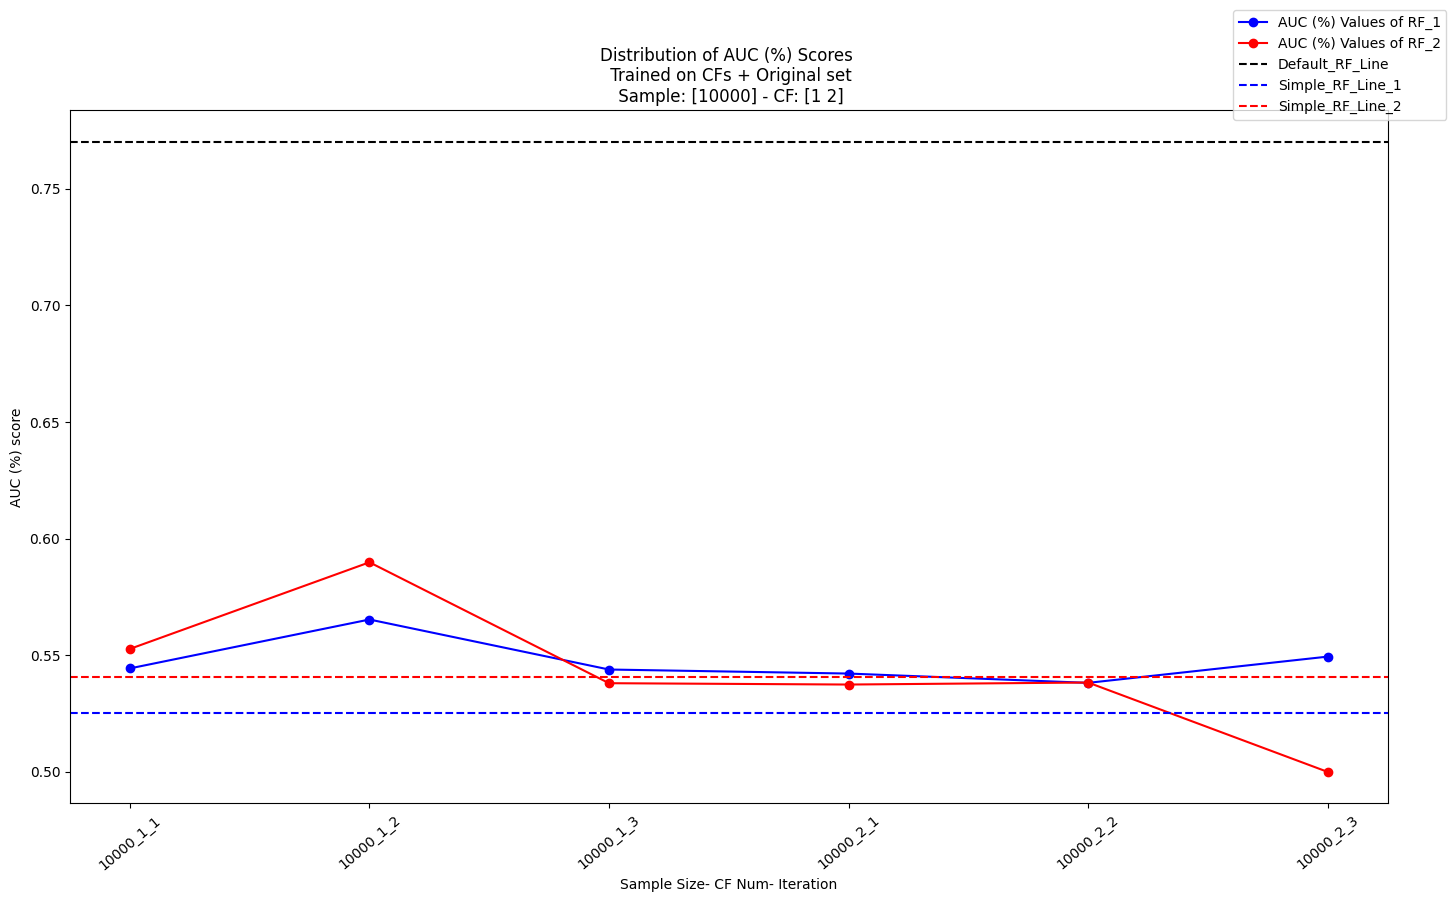

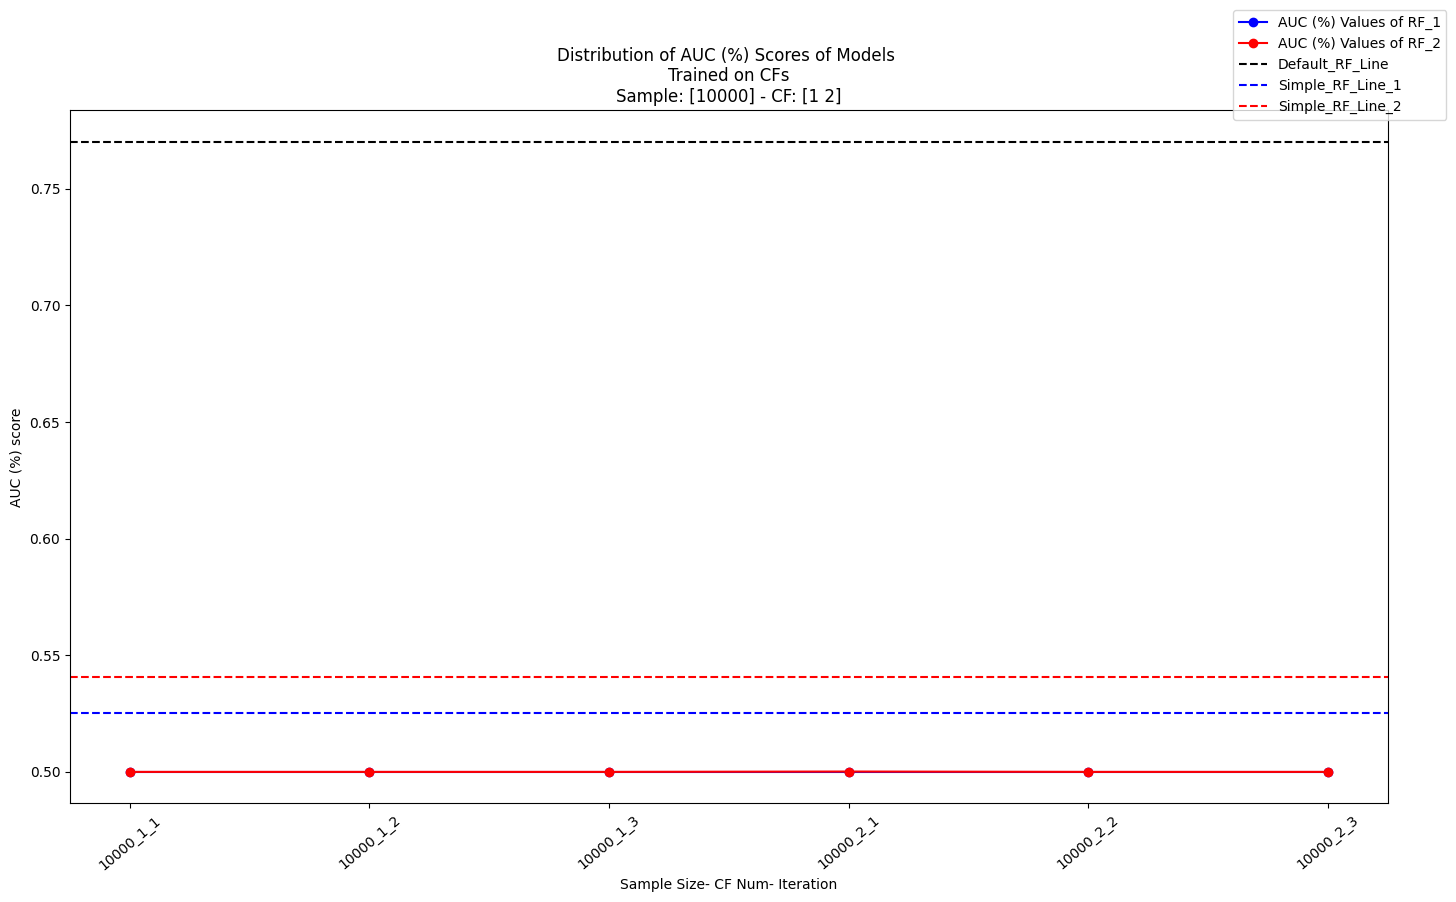

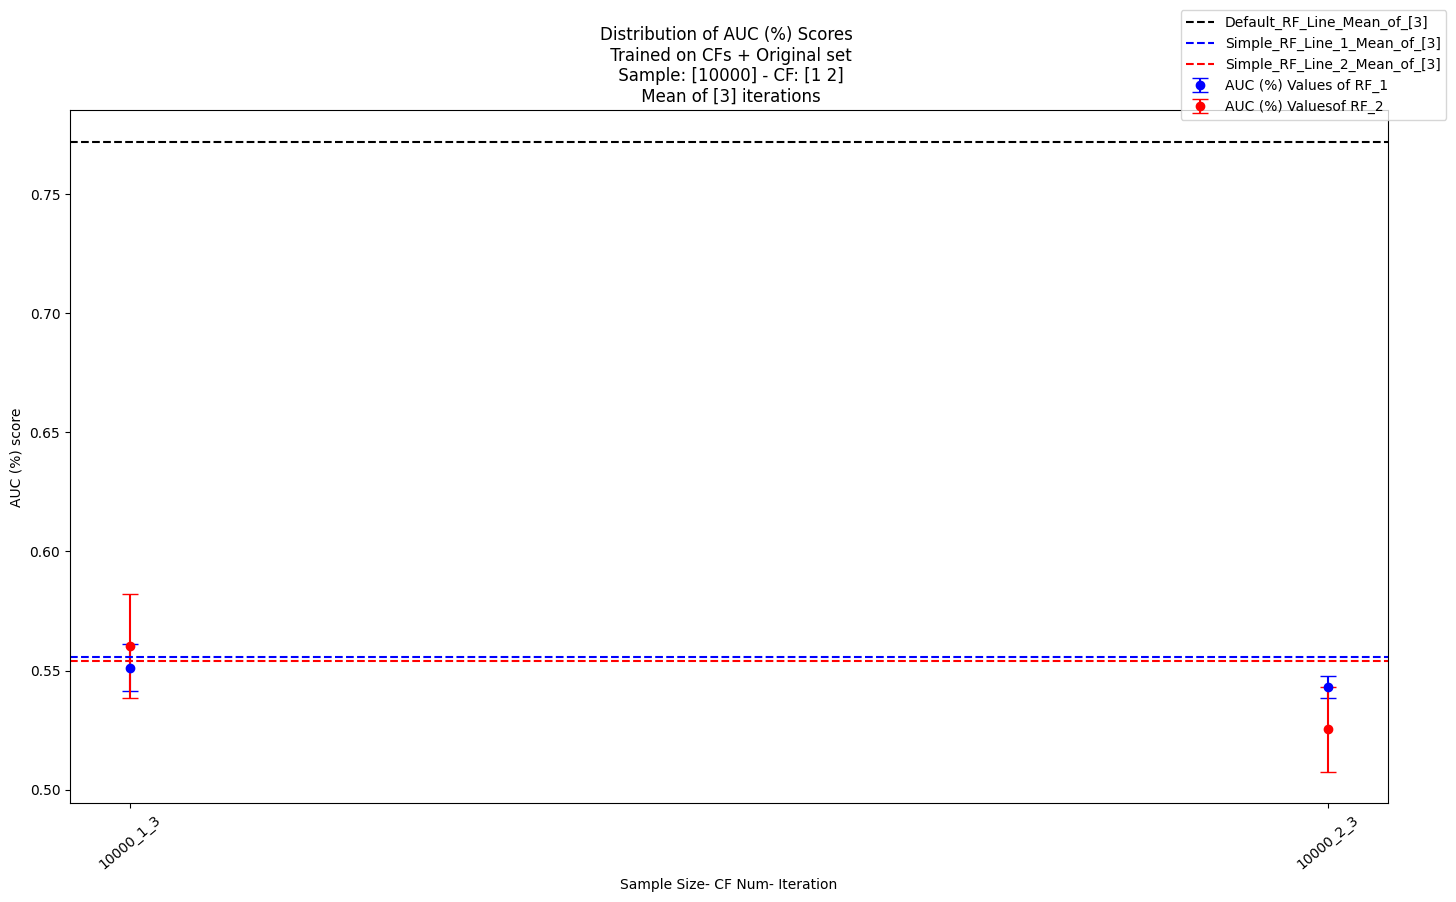

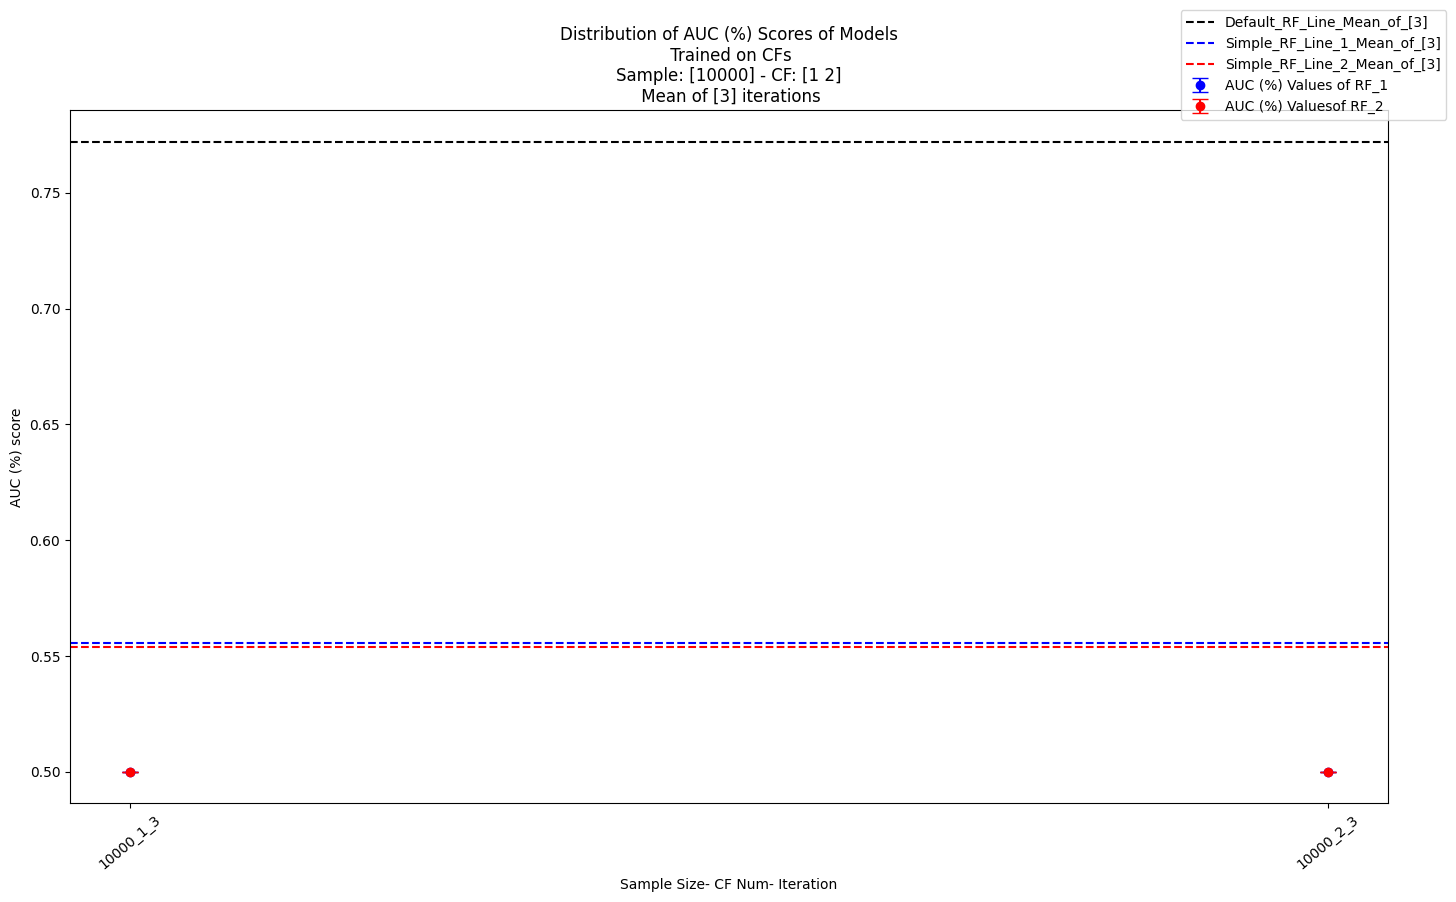

In [38]:
estimator = 10
depth = 2
estimator_2 = 10
depth_2 = 2
fea_to_vary = ['education-num', 'sex']
sample_size_list = [10000]                                          
total_CFs_list = [1,2]
iteration_num = 3
list_of_plots = ['AUC (%)'] 
model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, neww = running_exp(X_fit, y_fit, X_test, y_test,  sample_size_list, total_CFs_list, iteration_num, fea_to_vary, '12000__1_2_3 ', list_of_plots)

# Interpreting the results 

In [ ]:
the_list = [1, 2, 3, 4, 5]
the_list_2 = [3166, 6331, 9495]
the_list_3 = [1, 2]

Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:
Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:
Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:
Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:
Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:
Length of feature_names: 34
Length of importances_original: 33
Length of importances_expanded: 34
Top 10 Most Significant Shifts in Feature Importance:


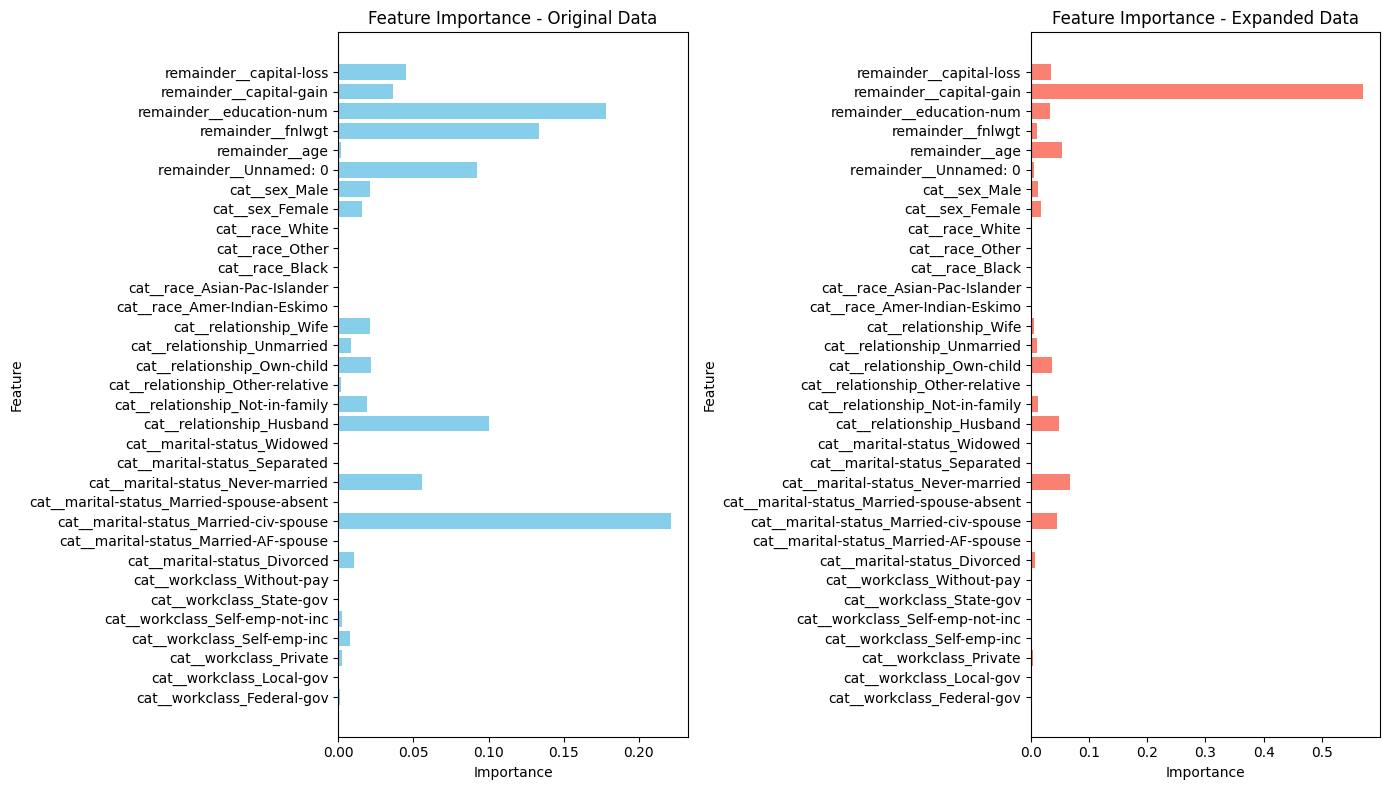

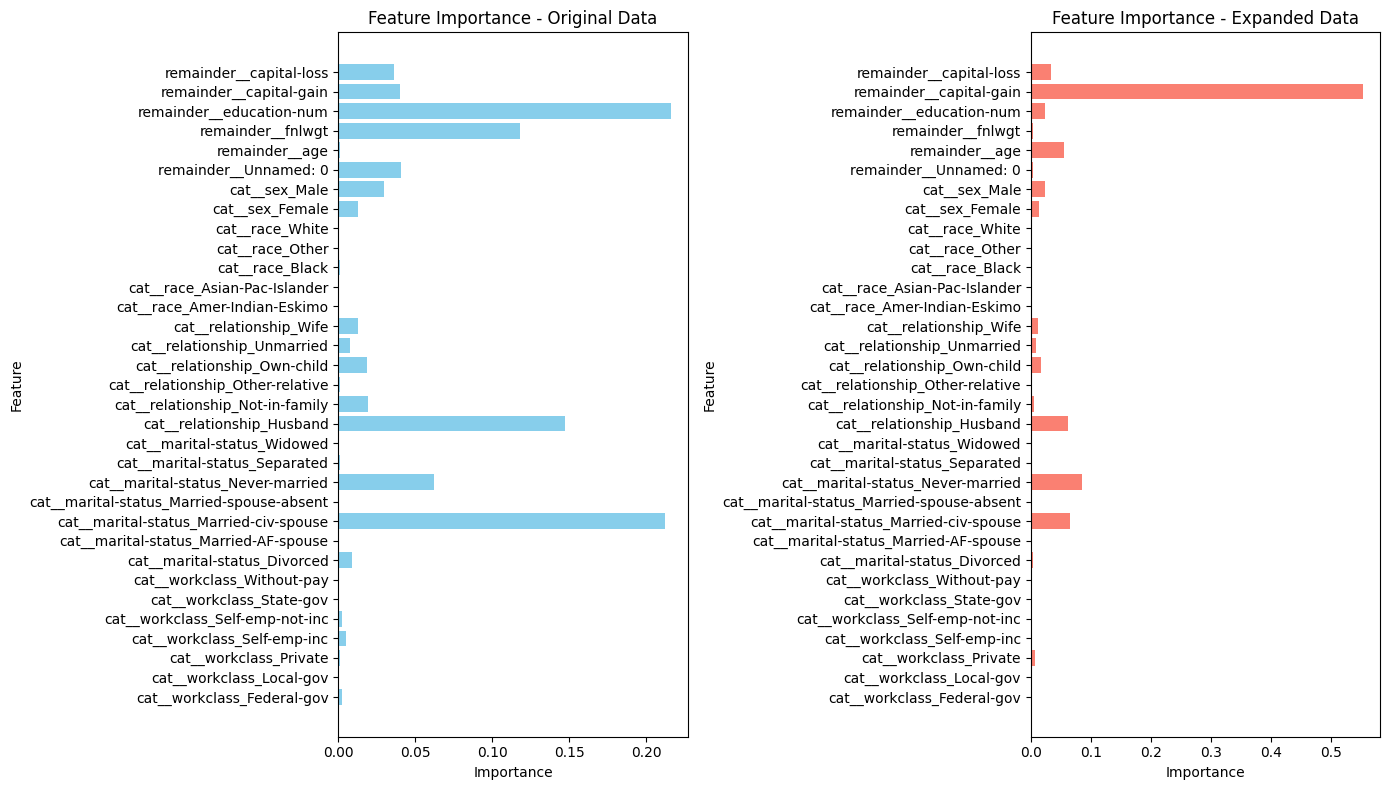

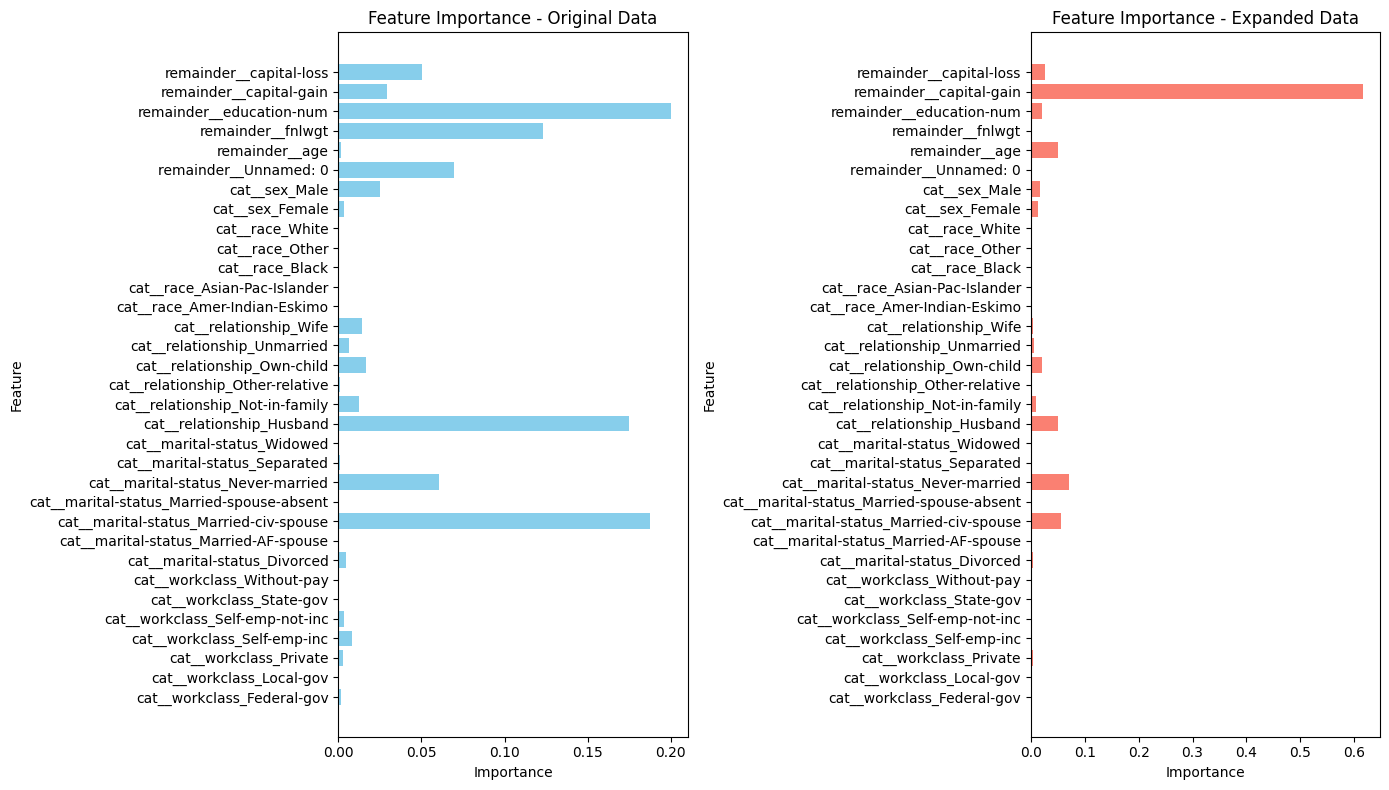

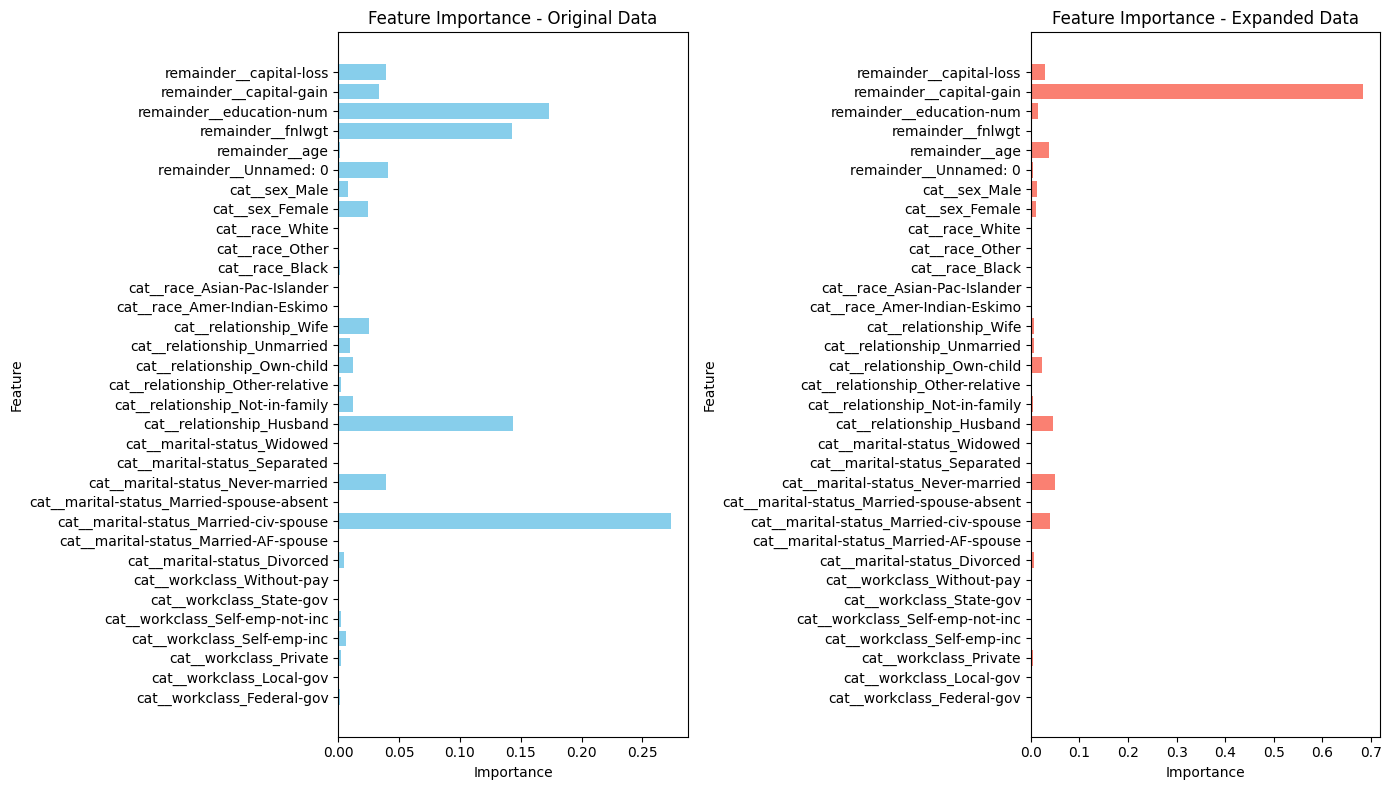

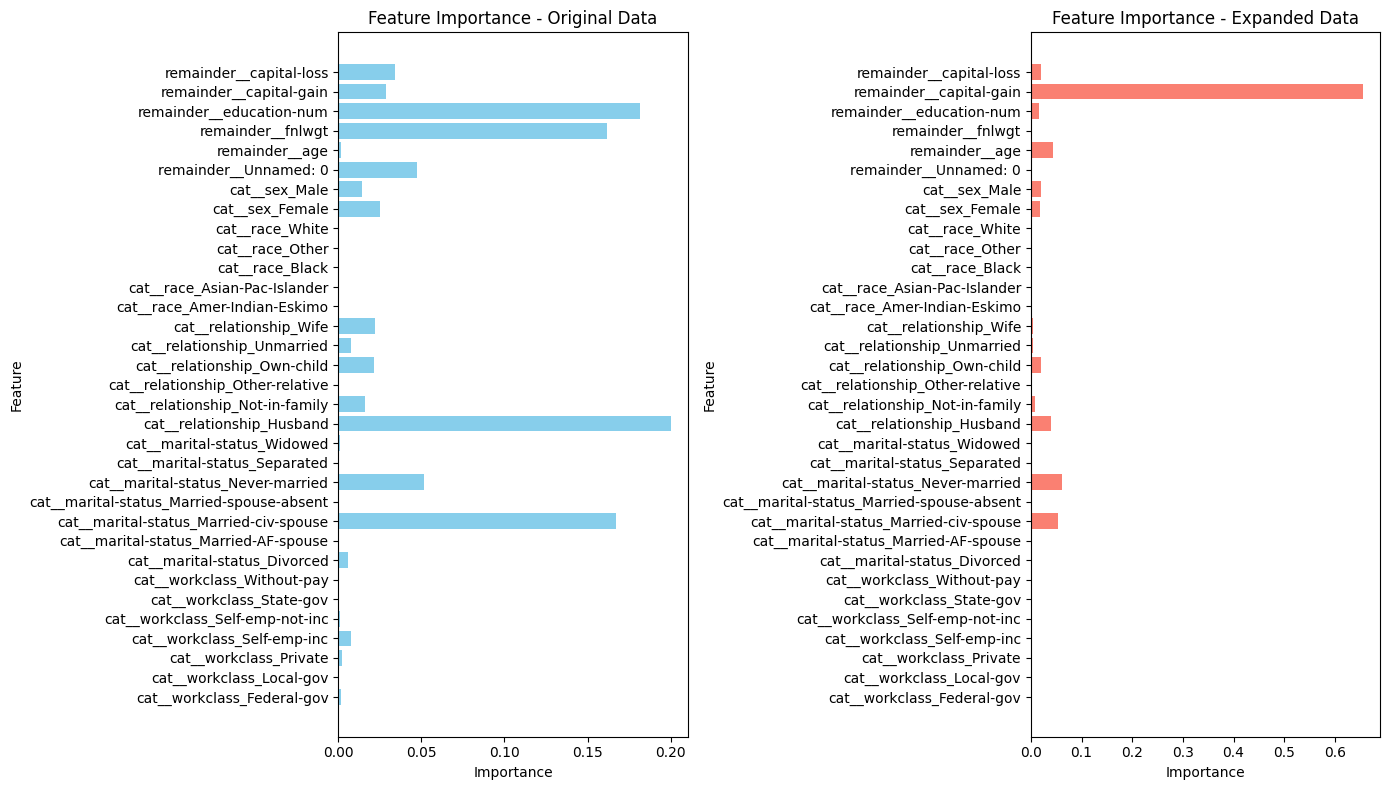

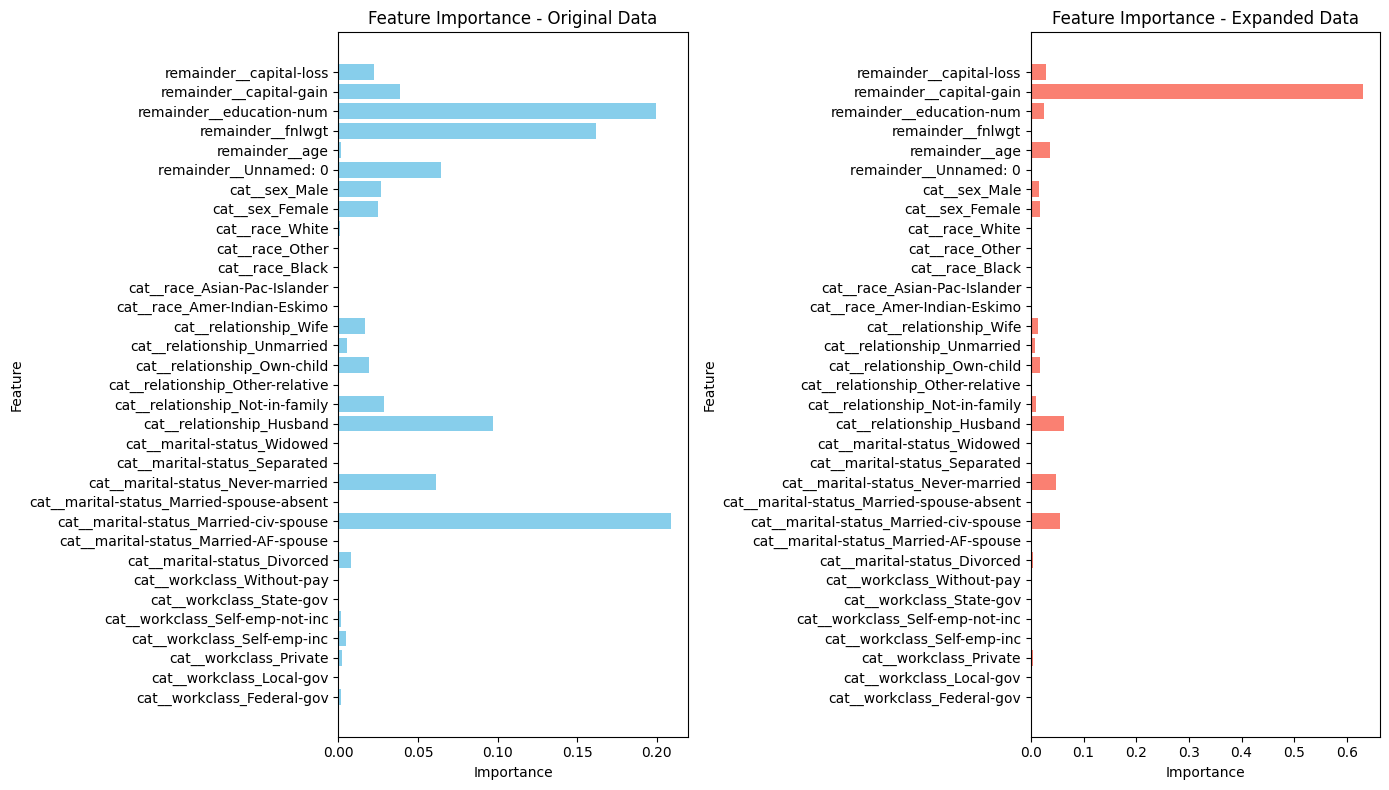

In [ ]:
    # Assuming you have your datasets ready
    # original_data: original dataset (X_original, y_original)
X_original = X_fit.copy()
y_original = y_fit.copy()    # expanded_data: expanded dataset with counterfactuals (X_expanded, y_expanded)
for t in the_list_3:    
        for i in the_list_2:
            # Split datasets into features (X) and target (y)
                xxdxd = pd.read_csv('Generated_CFs/cf_df_{}_{}_1.csv'.format(i, t))
                X_expanded = xxdxd.drop(columns=outcome_name)
                y_expanded = xxdxd[outcome_name]

                    # Preprocessing for cataegorical data - OneHotEncoding
                categorical_transformer = Pipeline(steps=[
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

                    # Bundle preprocessing for data
                transformations = ColumnTransformer(
                transformers=[            
                            ('cat', categorical_transformer, categorical)],
                        remainder='passthrough')
                # Define the Random Forest model
                simple_rf = Pipeline(steps=[('preprocessor', transformations), 
                                            ('classifier', RandomForestClassifier(n_estimators=50, max_depth=5))])

                # Train on the original dataset
                simple_rf.fit(X_original, y_original)
                importances_original = simple_rf.named_steps['classifier'].feature_importances_

                # Train on the expanded dataset
                simple_rf.fit(X_expanded, y_expanded)
                importances_expanded = simple_rf.named_steps['classifier'].feature_importances_

                # Get the feature names after preprocessing
                feature_names = simple_rf.named_steps['preprocessor'].get_feature_names_out()

                # Debugging: Print lengths to identify the issue
                print("Length of feature_names:", len(feature_names))
                print("Length of importances_original:", len(importances_original))
                print("Length of importances_expanded:", len(importances_expanded))

                # Ensure all arrays have the same length before creating the DataFrame
                min_length = min(len(feature_names), len(importances_original), len(importances_expanded))

                feature_names = feature_names[:min_length]
                importances_original = importances_original[:min_length]
                importances_expanded = importances_expanded[:min_length]

                # Create a DataFrame to compare feature importances
                importance_df = pd.DataFrame({
                    'Feature': feature_names,
                    'Importance_Original': importances_original,
                    'Importance_Expanded': importances_expanded
                })

                # Add a new column for the difference in importance
                importance_df['Importance_Difference'] = importance_df['Importance_Expanded'] - importance_df['Importance_Original']
                # Sort by the absolute value of the importance difference
                importance_df_sorted = importance_df.reindex(importance_df['Importance_Difference'].abs().sort_values(ascending=False).index)
                importance_df_sorted.to_excel('Feature_importance_diff_50_5_{}_{}.xlsx'.format(i,t))
                # Display the top 10 most significant shifts
                top_shifts = importance_df_sorted.head(10)
                print("Top 10 Most Significant Shifts in Feature Importance:")
                top_shifts

                # Plotting the feature importances
                plt.figure(figsize=(14, 8))
                plt.subplot(1, 2, 1)
                plt.barh(feature_names, importances_original, color='skyblue')
                plt.title('Feature Importance - Original Data')
                plt.xlabel('Importance')
                plt.ylabel('Feature')

                plt.subplot(1, 2, 2)
                plt.barh(feature_names, importances_expanded, color='salmon')
                plt.title('Feature Importance - Expanded Data')
                plt.xlabel('Importance')
                plt.ylabel('Feature')

                plt.tight_layout()
                #plt.show()

- The addition of counterfactuals has caused a dramatic shift in feature importance, particularly elevating remainder__capital-gain to a disproportionately high level.
- This shift suggests that the counterfactuals might have introduced a strong correlation with capital-gain, causing the model to overly rely on this feature
- The significant emphasis on capital-gain might indicate that the expanded dataset has led to overfitting on this particular feature.
- This could result in poor generalization, explaining why the model's performance worsened on the expanded dataset.